# Unsupervised Algorithms in Machine Learning Final Project

### Goal: Customer Segmentation
For my final project, I want to examine an unsupervised machine learning approach to customer segmentation. Customer segmentation is the process of dividing customers into groups based on common, shared characteristics. This is extremely useful for marketing and branding purposes. It allows organizations to better target potential consumers, focus on the most profitable customers, and much more. 
<br><br>
For this project, we will acheive this goal by generating an unsupervised model, comparing that model to two alternatives, finetune hyper paramaters, and discuss/analyze our results.

## Gather Data

The dataset we will be utilizing will be:
<br>
<br>
*Customer Segmentation* https://www.kaggle.com/datasets/vetrirah/customer/data, 
<br>
<br>
This is a JanataHack dataset from Analytics Vidhya. This is similar to a Kaggle competition dataset, so as a result, we will not require any specialized means of data collection. We will simply upload the given csv files into the jupyter notebook. 
<br>

## Identify Unsupervised Learning Problem

<br>
The problem statement for this dataset is as follows:   
<br><br><i>
"An automobile company has plans to enter new markets with their existing products (P1, P2, P3, P4 and P5). After intensive market research, they’ve deduced that the behavior of new market is similar to their existing market. 
In their existing market, the sales team has classified all customers into 4 segments (A, B, C, D ). Then, they performed segmented outreach and communication for different segment of customers. This strategy has work exceptionally well for them. They plan to use the same strategy on new markets and have identified 2627 new potential customers.
You are required to help the manager to predict the right group of the new customers."</i>
<br><br>
This problem is an unsupervised learning problem because our goal is to segment our customers into four distinct segments, all while not having labeled data for our testing dataset. So for this project we will perform an EDA, make our unsupervied (and alternative) models, analyze the results, and discuss our findings. Performance of our testing dataset will be determined by uploading our predicted labels to Analytics Vidhya and obtaining the accuracy score.<br><br>
Because we are using a Analytics Vidhya competition for this project, we will be more focused on model creation and analysis in the coming sections. For our unsupervised model we will be using k-means clustering. For our alternative models we will be using a support vector machine (SVM) and a Naive Bayes classifier.

## Exploratory Data Analysis- Inspect, Visualize, and Clean Data

There are three csv files in this dataset: "Test.csv", "Train.csv", and "sample_submission.csv". The training csv contains the following columns:
- **ID:** Unique ID
- **Gender:** Gender of the customer
- **Ever_Married:** Marital status of the customer
- **Age:** Age of the customer
- **Graduated:** Is the customer a graduate?
- **Profession:** Profession of the customer
- **Work_Experience:** Work Experience in years
- **Spending_Score:** Spending score of the customer
- **Family_Size:** Number of family members for the customer (including the customer)
- **Var_1:** Anonymised Category for the customer
- **Segmentation:** (target) Customer Segment of the customer

<br>

The file "Test.csv" contains all the aforementioned columns, with the exception of the "segmentation" column. The "sample_solution.csv" file is a sample file that demonstrates how submission files should be formatted in order to submit it to the competition. It's important to note that we will NOT be using the segmentation column for our k-means model.<br>
The first course of action we will do for our EDA is import the libraries we will be using for our project, upload our csv files into dataframes, and examine the contents using dataframe.info().

In [131]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn import cluster
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold

train_data = pd.read_csv('Train.csv')
print(train_data.head(10))
print(train_data.info())

test_data = pd.read_csv('Test.csv')
print(test_data.head(10))
print(test_data.info())

       ID  Gender Ever_Married  Age Graduated     Profession  Work_Experience  \
0  462809    Male           No   22        No     Healthcare              1.0   
1  462643  Female          Yes   38       Yes       Engineer              NaN   
2  466315  Female          Yes   67       Yes       Engineer              1.0   
3  461735    Male          Yes   67       Yes         Lawyer              0.0   
4  462669  Female          Yes   40       Yes  Entertainment              NaN   
5  461319    Male          Yes   56        No         Artist              0.0   
6  460156    Male           No   32       Yes     Healthcare              1.0   
7  464347  Female           No   33       Yes     Healthcare              1.0   
8  465015  Female          Yes   61       Yes       Engineer              0.0   
9  465176  Female          Yes   55       Yes         Artist              1.0   

  Spending_Score  Family_Size  Var_1 Segmentation  
0            Low          4.0  Cat_4            D  
1   

It appears that we have some null values in both the train and test set. We will decide what to do with these values once we get to our cleaning step. Next, let's plot each factor and look at the distributions of both data sets.

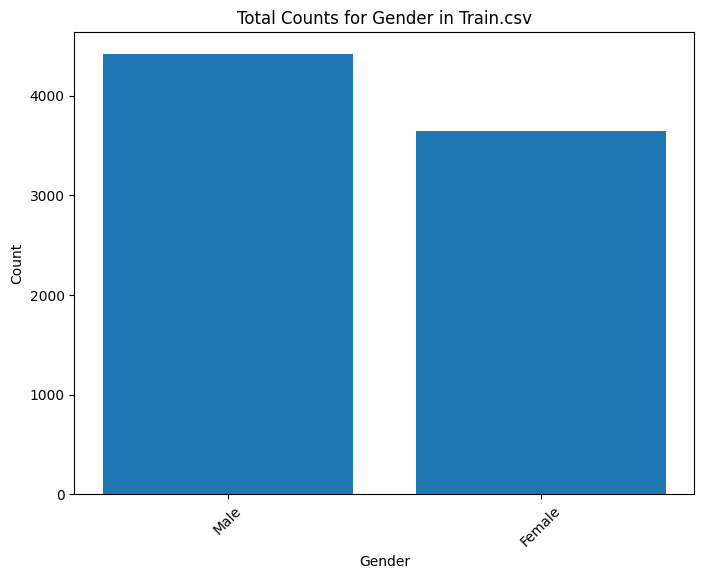

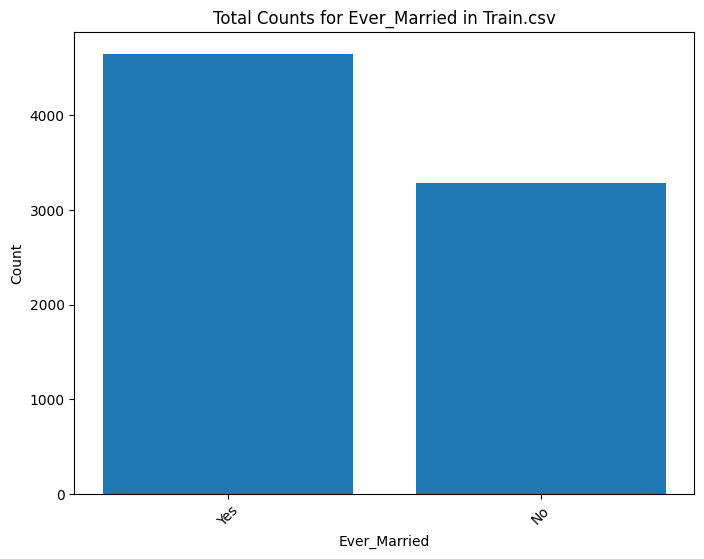

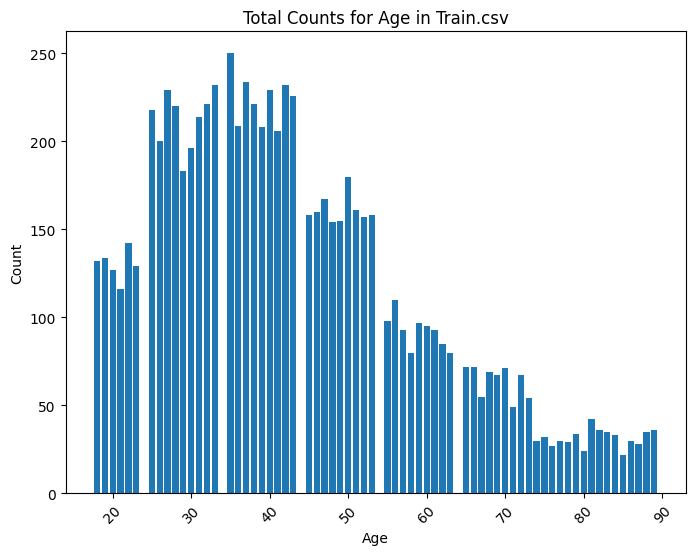

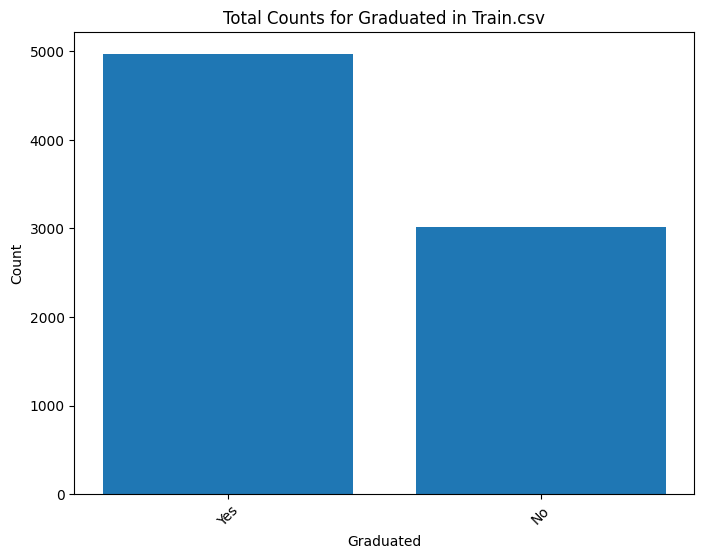

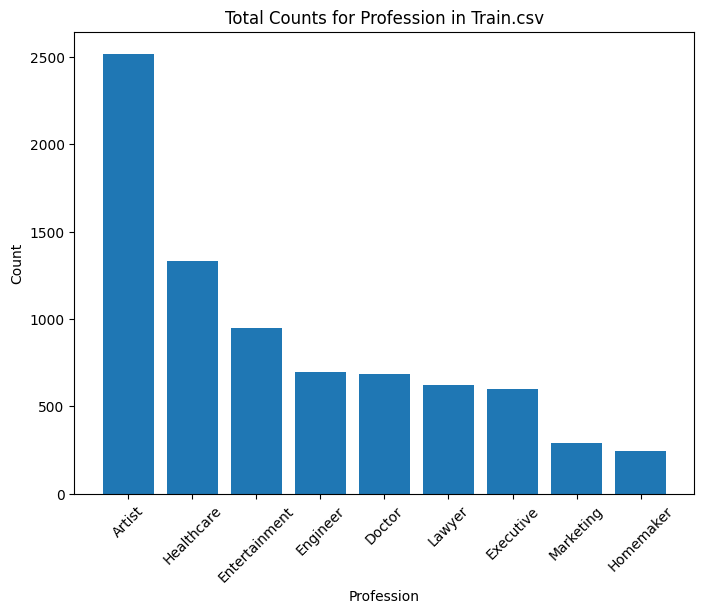

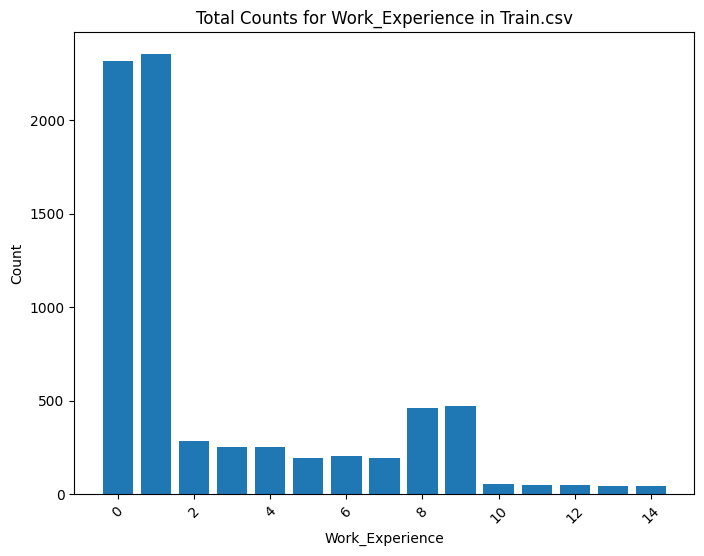

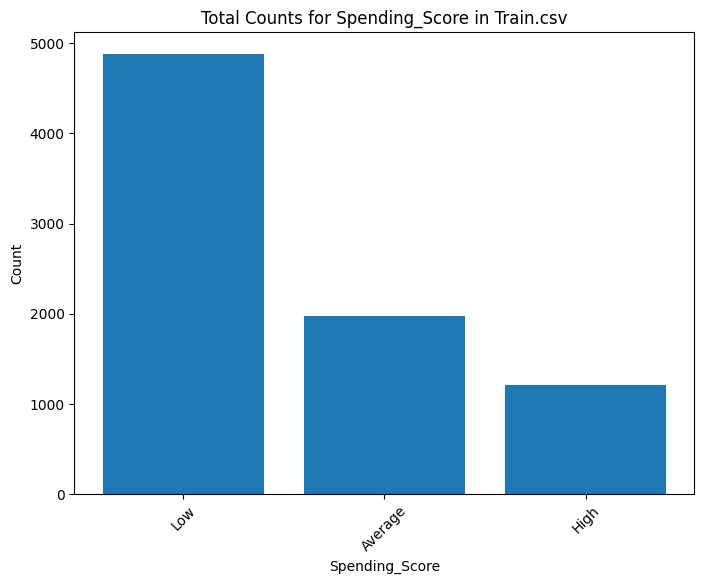

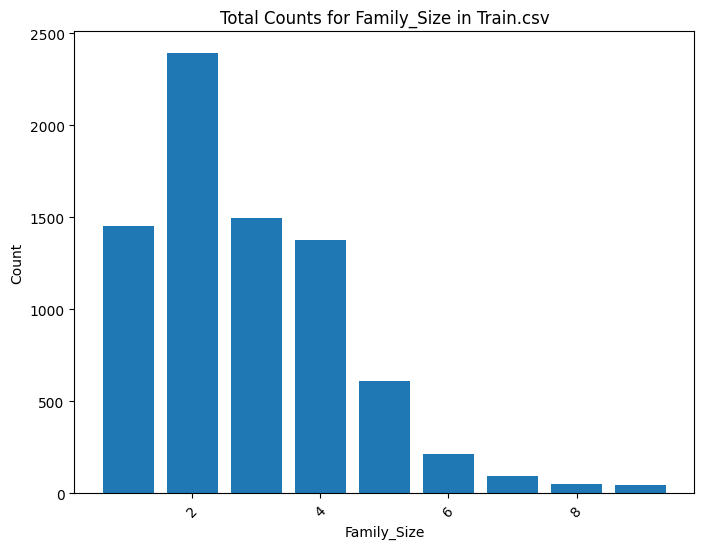

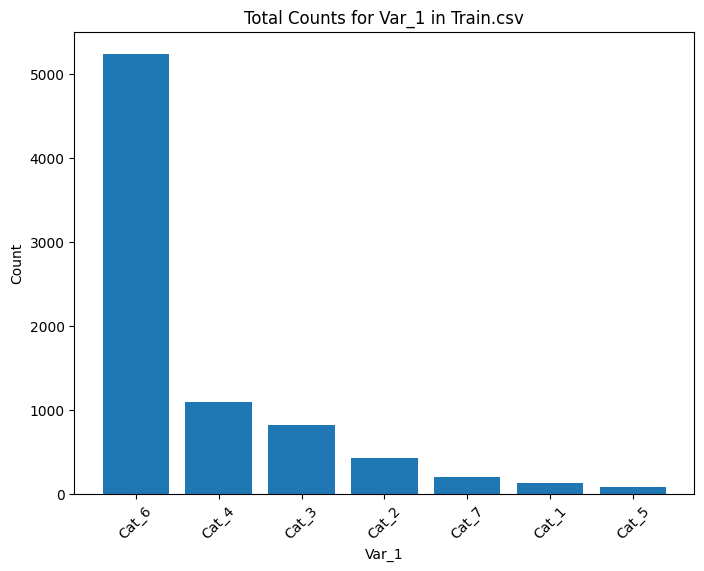

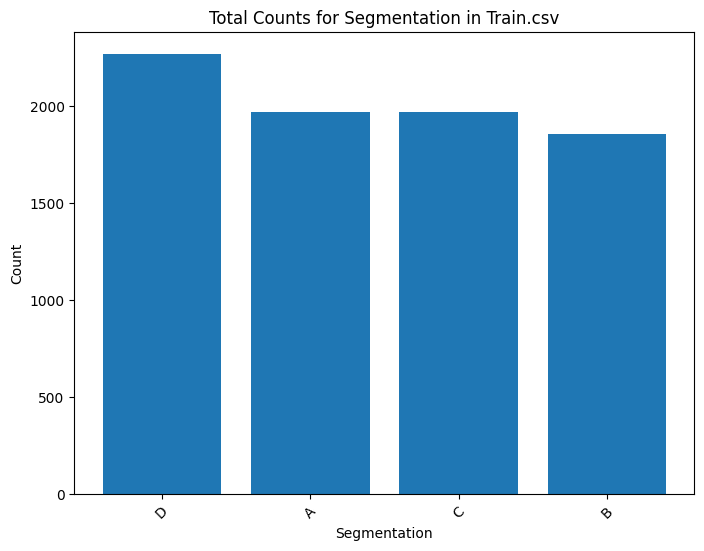

In [2]:
columns_to_plot = train_data.columns[1:]

for column in columns_to_plot:
    value_counts = train_data[column].value_counts()
    plt.figure(figsize=(8, 6))
    plt.bar(value_counts.index, value_counts.values)
    plt.title(f"Total Counts for {column} in Train.csv")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.xticks(rotation=45)  
    plt.show()

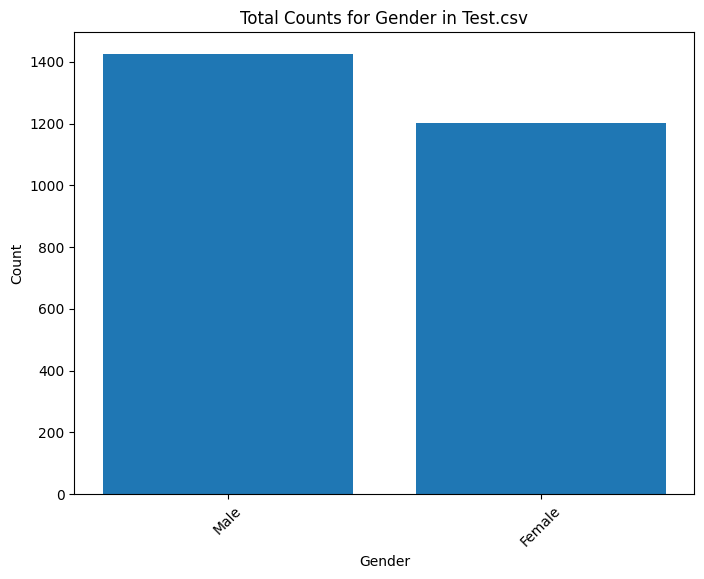

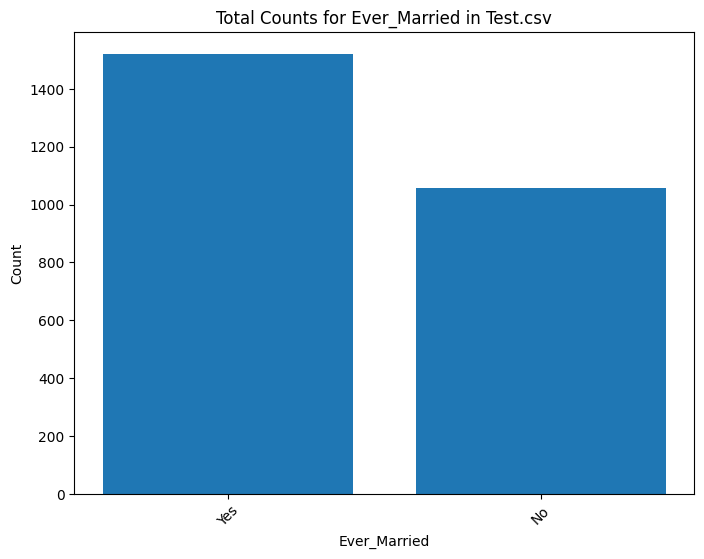

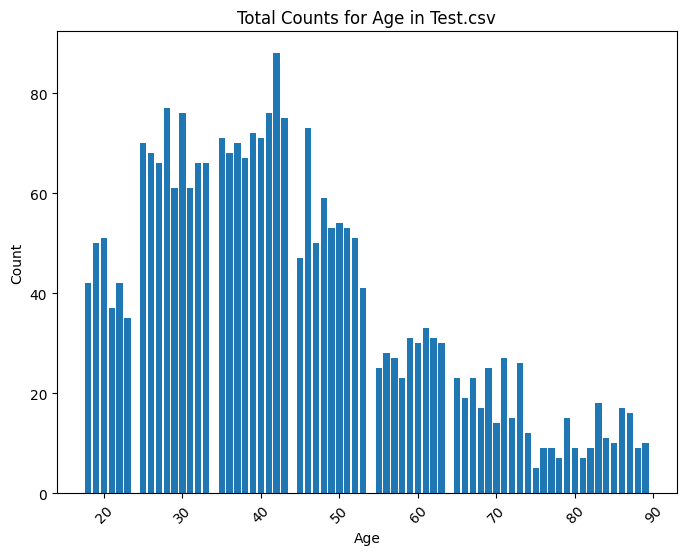

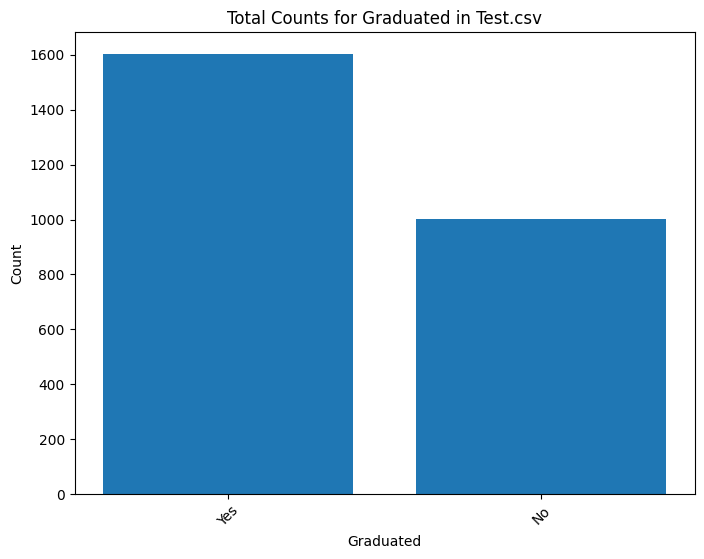

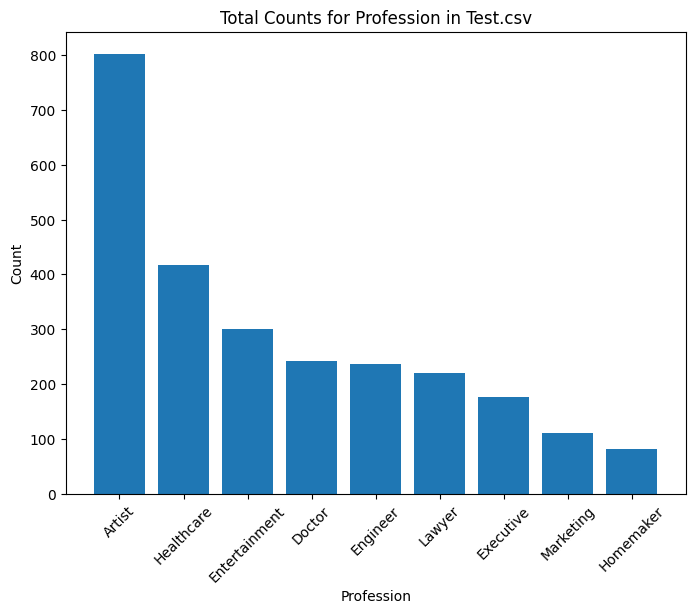

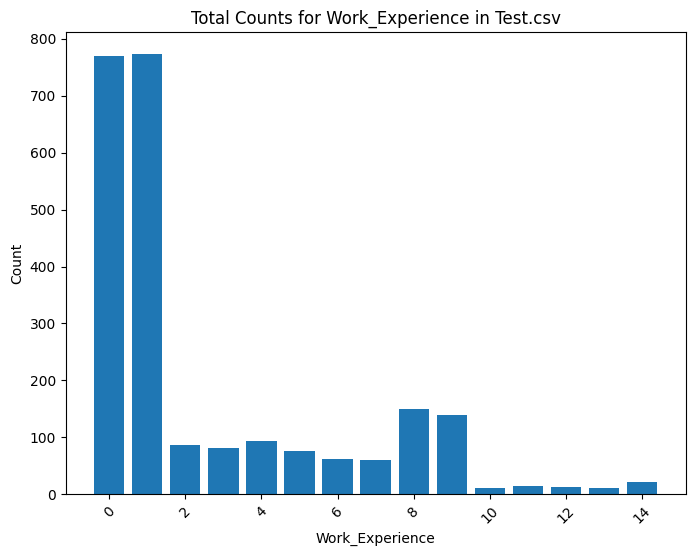

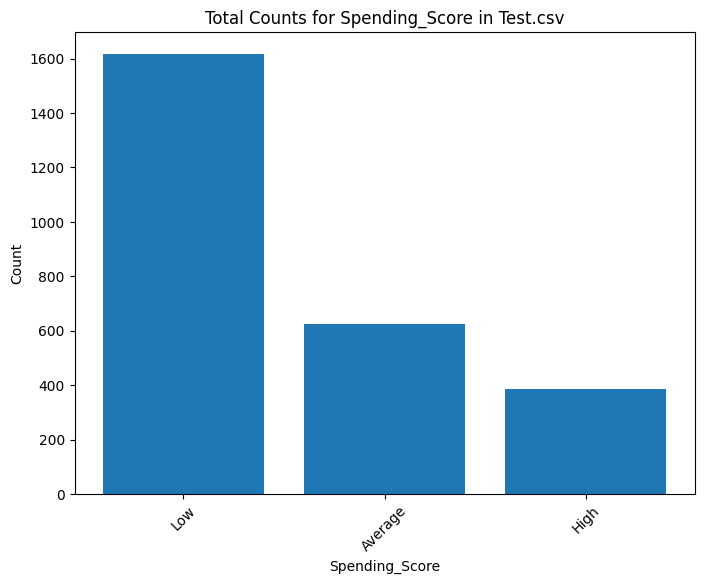

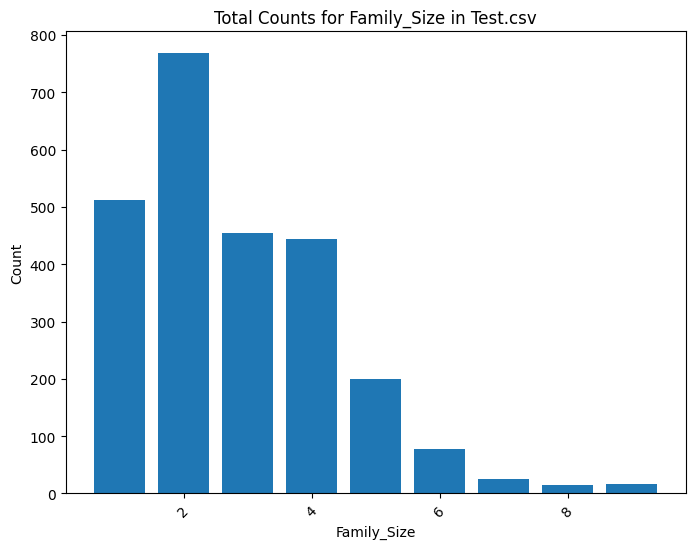

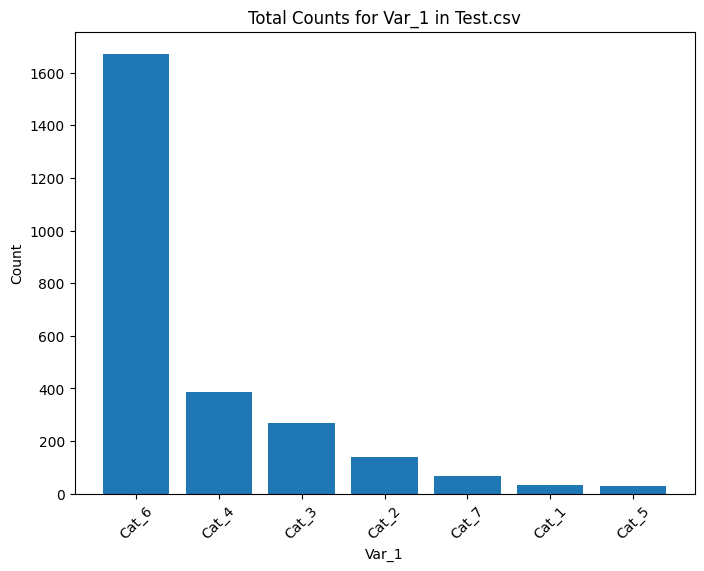

In [3]:
columns_to_plot = test_data.columns[1:]

for column in columns_to_plot:
    value_counts = test_data[column].value_counts()
    plt.figure(figsize=(8, 6))
    plt.bar(value_counts.index, value_counts.values)
    plt.title(f"Total Counts for {column} in Test.csv")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.xticks(rotation=45)  
    plt.show()

From visually inspecting our bar charts, it appears that both the train and the test set have the same proportionality between all of the factors. For example, the distribution for age for train and test is the same with the most common buckets being people in their 30's and 40's. This is a good sign, because balanced datasets will help with the performance of our models. <br><br>
Next, let's construct a correlational heatmap in order to determine if there are interactions amongst our factors. We will make a heatmap for each dataset, just to see if there are any differences. Categorical variables will need to be encoded in order to include them on the heatmap.

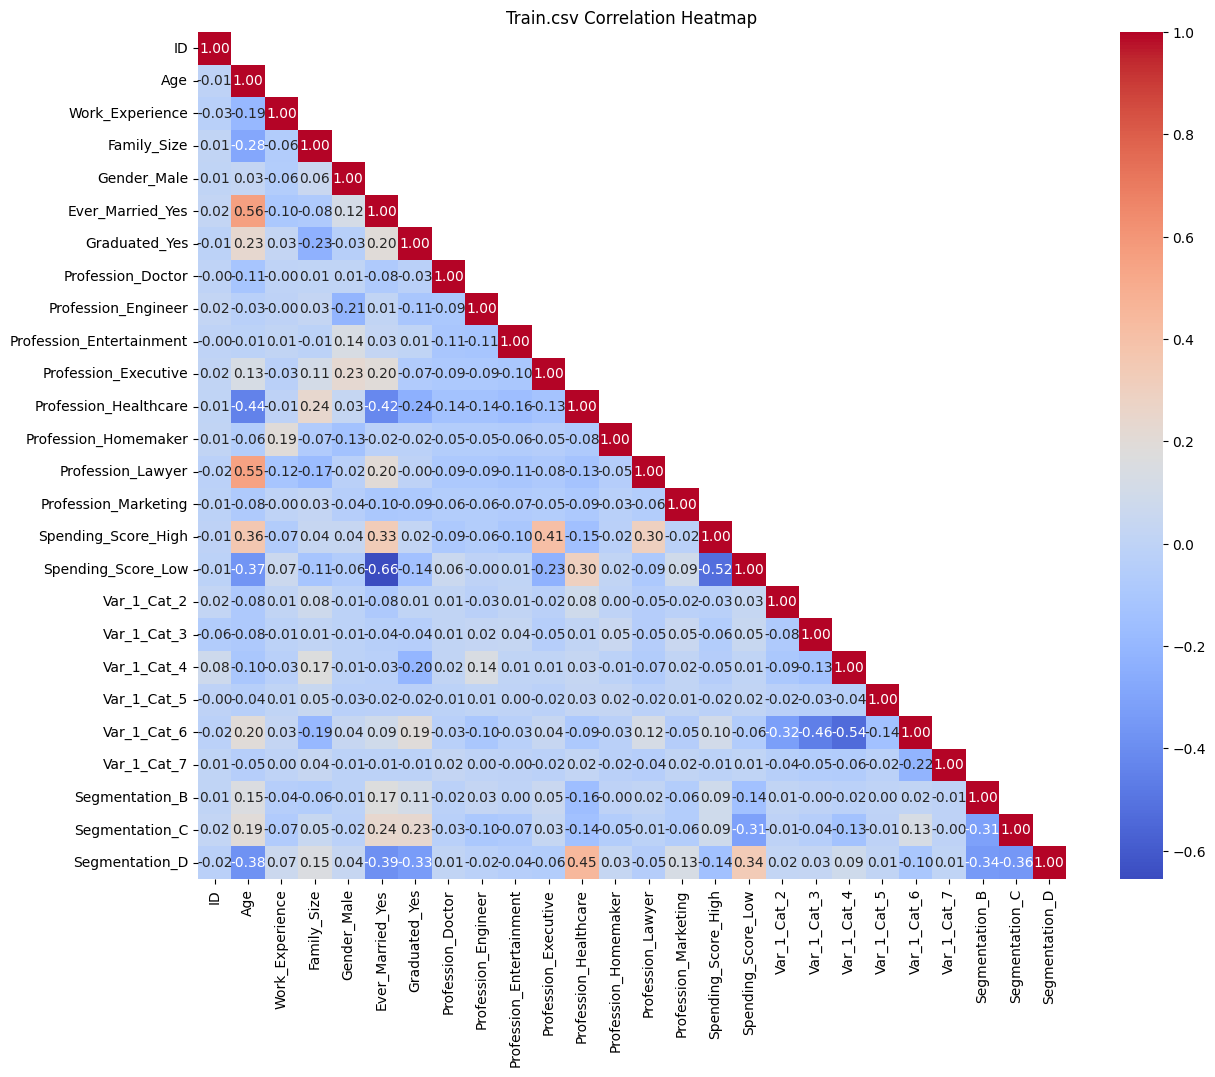

In [4]:
categorical_columns = train_data.select_dtypes(include=['object']).columns.tolist()

df_encoded = pd.get_dummies(train_data, columns=categorical_columns, drop_first=True)
correlation_matrix = df_encoded.corr()

plt.figure(figsize=(14, 11))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", mask=np.triu(correlation_matrix, 1))
plt.title('Train.csv Correlation Heatmap')
plt.show()

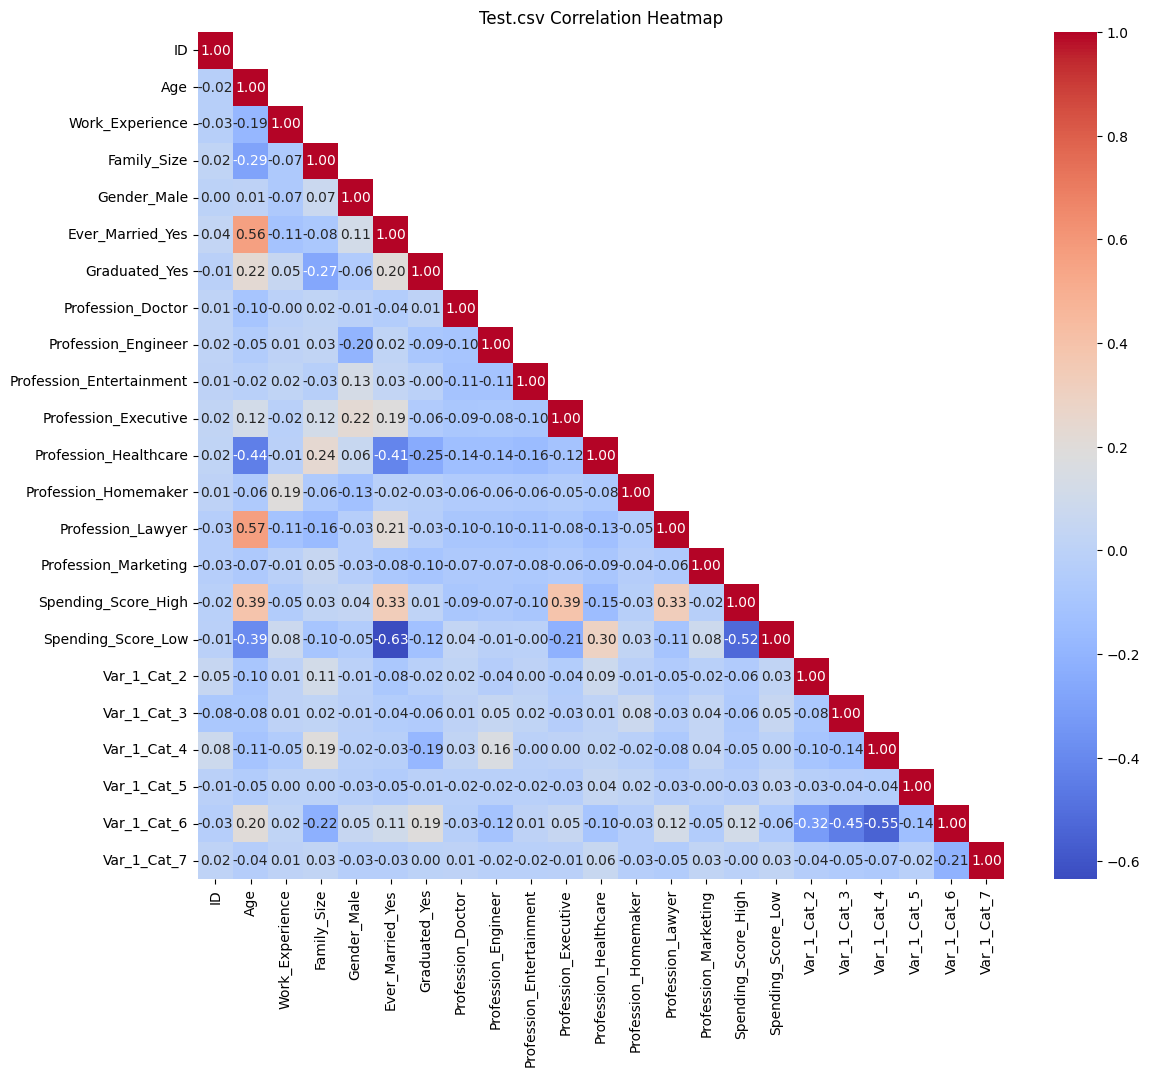

In [5]:
categorical_columns = test_data.select_dtypes(include=['object']).columns.tolist()

df_encoded = pd.get_dummies(test_data, columns=categorical_columns, drop_first=True)
correlation_matrix = df_encoded.corr()

plt.figure(figsize=(13, 11))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", mask=np.triu(correlation_matrix, 1))
plt.title('Test.csv Correlation Heatmap')
plt.show()

From our correlational heatmaps above, we can see that there are some factors that are negatively and positively correlated to one another. And a lot of these relationships make intuitive sense. For example, we can see that Ever_Married_Yes and Spending_Score_Low are strongly negatively correlated. We can also see that Profession_Lawyer and Age are strongly positively correlated to one another. Additionally, we can see that the correlational relationships hold true for both sets of data. This is good, because it indicates that our training and testing sets are similar, which may yield a better performing model. <br>

### Transformation Discussion and Cleaning
<br>
Next, let's prepare our data for our models by discussing the transformation/normalization of our data and our cleaning procedures. Our datasets have both numerical and categorical values. Because of this, we will need to encode our categorical data into a numerical representation in a process called one-hot encoding. This will be done for each dataset.
<br><br>
There are some crucial decisions we must make in the data cleaning step that may impact the performance of all of our models. For our training data, we have null values in features "Ever_Married", "Graduated", "Profession", "Work_Experience", "Family_Size", and "Var_1". There are two paths that we can take. Option 1 is that we fill our missing values with the mode for our categorical features and fill the mean value for our missing continuous values. Option 2 is that if we encounter a missing value in our training data, we remove the entire row.  
<br><br>
For this project we will be using BOTH options. Each model will be ran twice, once with the option 1 cleaning method and again with the option 2 cleaning method. This way, we can gain insight on the effectiveness on our cleaning method in addition to our model selection.
<br><br>
In the code block below, we will first create our "option_1" training set. We will fill our missing values using the appropriate methods. We will also determine if there are any duplicates in our training set and remove them. Then, we will create our "option_2" training data by simply removing all the rows that contain missing values. Finally, we will encode our categorical data for each dataset, with the exception of segmentation. Testing data will also be encoded.

In [132]:
print("Rows before duplicate removal:", train_data.shape[0])
train_data.drop_duplicates(keep="first", inplace=True)
print("Rows after duplicate removal:", train_data.shape[0])
print("")

train_option_1 = train_data.copy()
train_option_2 = train_data.copy()
categorical_columns = ['Ever_Married', 'Graduated', 'Profession', 'Var_1']
continuous_columns = ['Work_Experience', 'Family_Size']

for col in categorical_columns:
    train_option_1[col].fillna(train_option_1[col].mode()[0], inplace=True)
    test_data[col].fillna(test_data[col].mode()[0], inplace=True)

for col in continuous_columns:
    train_option_1[col].fillna(train_option_1[col].mean(), inplace=True)
    test_data[col].fillna(test_data[col].mean(), inplace=True)
    
train_option_2.dropna(inplace=True)

encoder = LabelEncoder()
cat_cols = ["Gender","Ever_Married","Graduated","Profession","Spending_Score", "Var_1"]
for col in cat_cols:
    train_option_1[col+"_encoded"] = encoder.fit_transform(train_option_1[col])
    train_option_2[col+"_encoded"] = encoder.fit_transform(train_option_2[col])
    test_data[col+"_encoded"] = encoder.fit_transform(test_data[col])
train_option_1.drop(cat_cols,axis = 'columns',inplace=True)
train_option_2.drop(cat_cols,axis = 'columns',inplace=True)
test_data.drop(cat_cols,axis = 'columns',inplace=True)

train_option_1.info()
train_option_2.info()

Rows before duplicate removal: 8068
Rows after duplicate removal: 8068

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      8068 non-null   int64  
 1   Age                     8068 non-null   int64  
 2   Work_Experience         8068 non-null   float64
 3   Family_Size             8068 non-null   float64
 4   Segmentation            8068 non-null   object 
 5   Gender_encoded          8068 non-null   int32  
 6   Ever_Married_encoded    8068 non-null   int32  
 7   Graduated_encoded       8068 non-null   int32  
 8   Profession_encoded      8068 non-null   int32  
 9   Spending_Score_encoded  8068 non-null   int32  
 10  Var_1_encoded           8068 non-null   int32  
dtypes: float64(2), int32(6), int64(2), object(1)
memory usage: 567.3+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6665 ent

### EDA Summary and Next Steps

<br>
In this EDA we examined the features of our datasets, identified areas for data cleaning, prepared the datasets for our models, and showed dataset stat visualizations. We have created two training datasets with different cleaning techniques in order to understand how they may impact our models' performance. Because we do not know exactly how our customers are segmented in this dataset, we can not determine specific factors that may be more or less important than others. As a result, all factors are considered equally important. However, once our models are ran, we may get clues on which ones carry more weight than others. 
<br><br>
Let's move onto model construction!

# Building and Training our Unsupervised Model

<br>
In the code segments below, we will be constructing our K-means clustering model. We will be utilizing "Kmeans" from the sklearn Python library. We will start be taking a copy of each of our cleaned datasets and removing the "ID" and "Segmentation" columns. These are removed because we do not want to train the model on this data. Next, we have to build our model and fit it to each dataset. For our base models we will simply initialize the number of clusters to 4, centroid initialization to k-means++, and algorithm to auto. More hyperparameters and adjustments will be made later on. After the model is constructed, we will add our segmentation column as well as a predicted column. We will then observe the prediction accuracy of the training set. Full model performance will be evaluated in the next section.

In [35]:
clustering_copy_1 = train_option_1.copy()
clustering_data_1 = clustering_copy_1.drop(["ID", "Segmentation"], axis='columns')

km_model_1 = KMeans(n_clusters=4, init="k-means++", algorithm="auto")
km_model_1.fit(clustering_data_1)
y_pred_train_1 = km_model_1.predict(clustering_data_1)
y_pred_train_1 = pd.Series(y_pred_train_1, index=clustering_copy_1.index)

label_encoder = LabelEncoder()
clustering_copy_1['Segmentation'] = label_encoder.fit_transform(clustering_copy_1['Segmentation'])

clustering_copy_1['Predicted'] = y_pred_train_1

correct_predictions = (clustering_copy_1['Segmentation'] == clustering_copy_1['Predicted']).sum()
total_predictions = len(clustering_copy_1)
accuracy = (correct_predictions / total_predictions) * 100

print(f"Percentage correctly predicted: {accuracy:.2f}%")

Percentage correctly predicted: 42.18%


In [39]:
clustering_copy_2 = train_option_2.copy()
clustering_data_2 = clustering_copy_2.drop(["ID", "Segmentation"], axis='columns')

km_model_2 = KMeans(n_clusters=4, init="k-means++", algorithm="auto")
km_model_2.fit(clustering_data_2)
y_pred_train_2 = km_model_2.predict(clustering_data_2)
y_pred_train_2 = pd.Series(y_pred_train_2, index=clustering_copy_2.index)

label_encoder = LabelEncoder()
clustering_copy_2['Segmentation'] = label_encoder.fit_transform(clustering_copy_2['Segmentation'])

clustering_copy_2['Predicted'] = y_pred_train_2

correct_predictions = (clustering_copy_2['Segmentation'] == clustering_copy_2['Predicted']).sum()
total_predictions = len(clustering_copy_2)
accuracy = (correct_predictions / total_predictions) * 100

print(f"Percentage correctly predicted: {accuracy:.2f}%")

Percentage correctly predicted: 42.19%


## Alternative Model Construction

Next, let's build some alternative models to compare against our k-means model. We will be constructing 2 models on each dataset, for a total of 4 models. The first model we will make is a Support Vector Machine. This is a supervised machine learning model that seperates data via a hyperplane. Typically, this kind of model is for binary classification, however we can use SVC in sklearn for multiclass support. This is handled by using what is known as a "one-vs-one" scheme. Additionally, because this is a supervised model, it will require us to utilize a test-train split on our training data. Once our model is built and fitted, it will then give us our prediction accuracy and we will go onto the next alternative model. <br><br>
The other model we will consider will the Naive Bayes model. As the name suggests, this is a probabilistic model that applies Bayes' theorem on our classifiers in order to make predictions. We will use the "MultinomialNB" in sklearn. This is a Naive Bayes classifier that is suitable for multiclass problems (ie problems that have more than two discrete possibilities). As with the other models, we will build, fit, and displat the classification report for our model. After that we will move onto Model Analysis.

In [16]:
X = train_option_1.drop(['ID', 'Segmentation'], axis=1)
y = train_option_1['Segmentation'] 

X_train_svm_1, X_test_svm_1, y_train_svm_1, y_test_svm_1 = train_test_split(X, y, test_size=0.4, random_state=42)

svm_model_1 = SVC(kernel='linear')  
svm_model_1.fit(X_train_svm_1, y_train_svm_1)
predictions_svm_1 = svm_model_1.predict(X_test_svm_1)

accuracy = accuracy_score(y_test_svm_1, predictions_svm_1)
print(f"Accuracy of the SVM model: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test_svm_1, predictions_svm_1))

Accuracy of the SVM model: 0.49
Classification Report:
              precision    recall  f1-score   support

           A       0.38      0.53      0.45       797
           B       0.31      0.07      0.11       729
           C       0.47      0.57      0.51       772
           D       0.65      0.71      0.67       930

    accuracy                           0.49      3228
   macro avg       0.45      0.47      0.44      3228
weighted avg       0.46      0.49      0.45      3228



In [17]:
X = train_option_2.drop(['ID', 'Segmentation'], axis=1)
y = train_option_2['Segmentation'] 

X_train_svm_2, X_test_svm_2, y_train_svm_2, y_test_svm_2 = train_test_split(X, y, test_size=0.4, random_state=42)

svm_model_2 = SVC(kernel='linear')  
svm_model_2.fit(X_train_svm_2, y_train_svm_2)
predictions_svm_2 = svm_model_2.predict(X_test_svm_2)

accuracy = accuracy_score(y_test_svm_2, predictions_svm_2)
print(f"Accuracy of the SVM model: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test_svm_2, predictions_svm_2))

Accuracy of the SVM model: 0.49
Classification Report:
              precision    recall  f1-score   support

           A       0.40      0.53      0.46       671
           B       0.31      0.10      0.15       612
           C       0.51      0.59      0.55       676
           D       0.63      0.70      0.66       707

    accuracy                           0.49      2666
   macro avg       0.46      0.48      0.45      2666
weighted avg       0.47      0.49      0.46      2666



In [18]:
X = train_option_1.drop(['ID', 'Segmentation'], axis=1)
y = train_option_1['Segmentation']

X_train_nb_1, X_test_nb_1, y_train_nb_1, y_test_nb_1 = train_test_split(X, y, test_size=0.4, random_state=42)

naive_bayes_1 = MultinomialNB()
naive_bayes_1.fit(X_train_nb_1, y_train_nb_1)

predictions_nb_1 = naive_bayes_1.predict(X_test_nb_1)

accuracy = accuracy_score(y_test_nb_1, predictions_nb_1)
print(f"Accuracy of Multinomial Naive Bayes model: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test_nb_1, predictions_nb_1))

Accuracy of Multinomial Naive Bayes model: 0.47
Classification Report:
              precision    recall  f1-score   support

           A       0.37      0.27      0.31       797
           B       0.35      0.20      0.26       729
           C       0.44      0.60      0.50       772
           D       0.60      0.75      0.66       930

    accuracy                           0.47      3228
   macro avg       0.44      0.46      0.43      3228
weighted avg       0.45      0.47      0.45      3228



In [19]:
X = train_option_2.drop(['ID', 'Segmentation'], axis=1)
y = train_option_2['Segmentation']

X_train_nb_2, X_test_nb_2, y_train_nb_2, y_test_nb_2 = train_test_split(X, y, test_size=0.4, random_state=42)

naive_bayes_2 = MultinomialNB()
naive_bayes_2.fit(X_train_nb_2, y_train_nb_2)

predictions_nb_2 = naive_bayes_2.predict(X_test_nb_2)

accuracy = accuracy_score(y_test_nb_2, predictions_nb_2)
print(f"Accuracy of Multinomial Naive Bayes model: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test_nb_2, predictions_nb_2))

Accuracy of Multinomial Naive Bayes model: 0.45
Classification Report:
              precision    recall  f1-score   support

           A       0.37      0.26      0.31       671
           B       0.27      0.15      0.19       612
           C       0.43      0.61      0.51       676
           D       0.59      0.74      0.66       707

    accuracy                           0.45      2666
   macro avg       0.41      0.44      0.42      2666
weighted avg       0.42      0.45      0.42      2666



## Model Analysis

Now that our models are built, let's analyze! We already got a preview of the training accuracy when we built our models above. On our training sets, our k-means model scored an apporximate 42% accuracy, our SVMs both scored approximately 49%, and our Naive Bayes model got a 47% for option 1 and a 45% for option 2. Not the best scores, but these are just our base and alternative models. To see if we can gain some insight, let's build a confusion matrix for each model. This way we can see how our models are misclassifiying. Also, let's generate submission CSVs and get our testing accuracy for each model. 

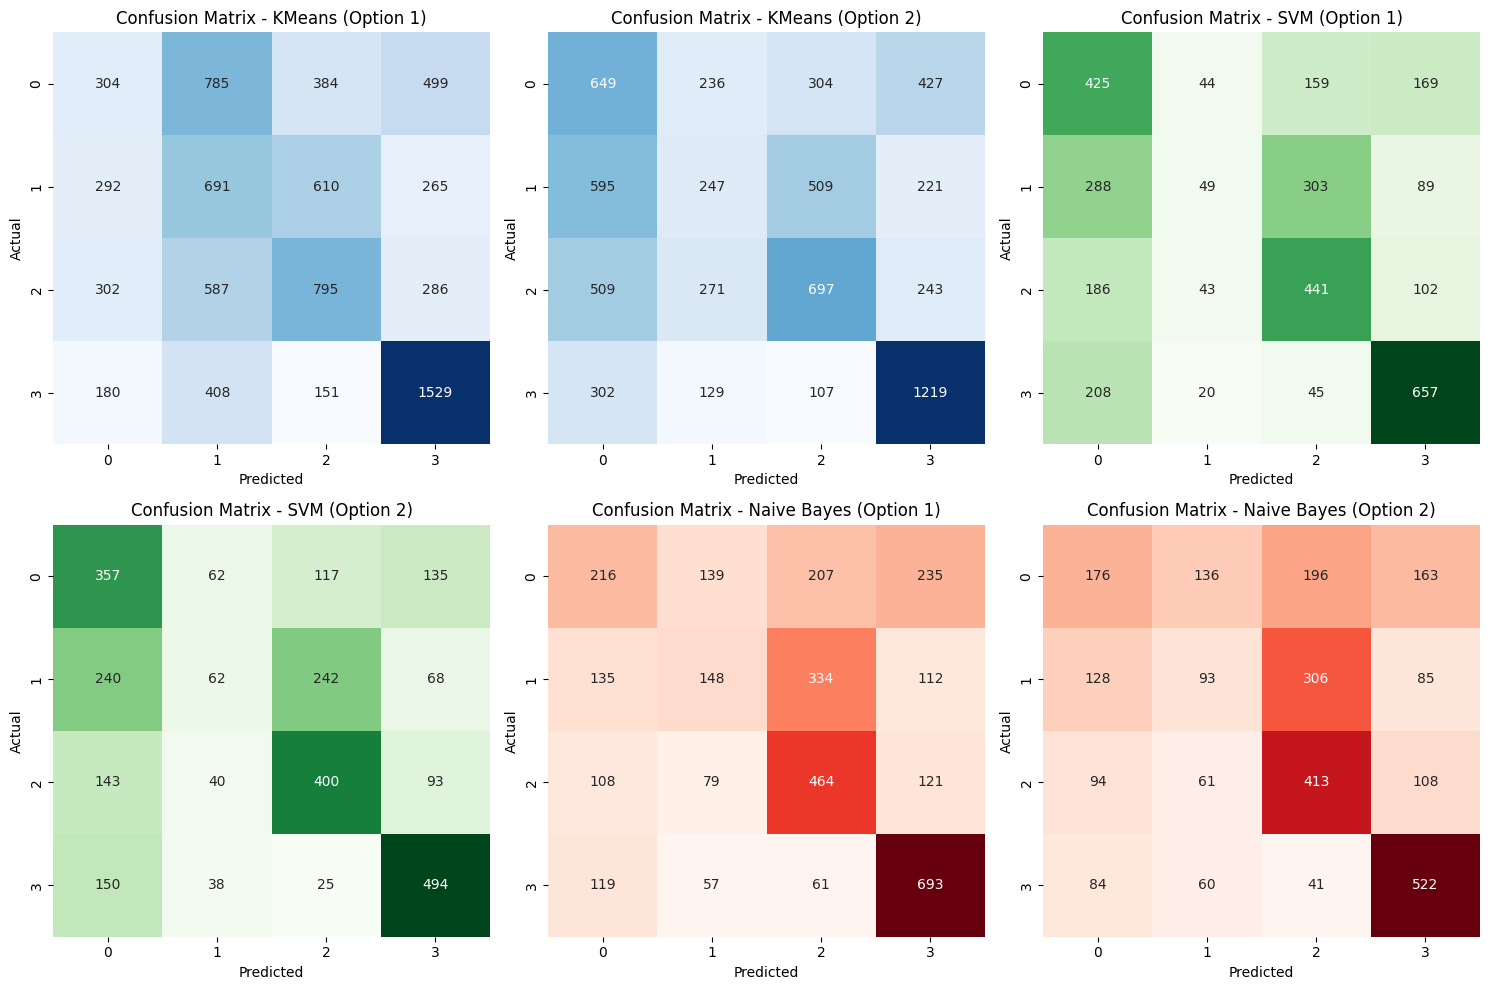

In [20]:
conf_matrix_kmeans_1 = confusion_matrix(clustering_copy_1["Segmentation"], clustering_copy_1['Predicted'])
conf_matrix_kmeans_2 = confusion_matrix(clustering_copy_2["Segmentation"], clustering_copy_2['Predicted'])
conf_matrix_svm_1 = confusion_matrix(y_test_svm_1, predictions_svm_1)
conf_matrix_svm_2 = confusion_matrix(y_test_svm_2, predictions_svm_2)
conf_matrix_nb_1 = confusion_matrix(y_test_nb_1, predictions_nb_1)
conf_matrix_nb_2 = confusion_matrix(y_test_nb_2, predictions_nb_2)

plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.heatmap(conf_matrix_kmeans_1, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title("Confusion Matrix - KMeans (Option 1)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(2, 3, 2)
sns.heatmap(conf_matrix_kmeans_2, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title("Confusion Matrix - KMeans (Option 2)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(2, 3, 3)
sns.heatmap(conf_matrix_svm_1, annot=True, cmap='Greens', fmt='d', cbar=False)
plt.title("Confusion Matrix - SVM (Option 1)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(2, 3, 4)
sns.heatmap(conf_matrix_svm_2, annot=True, cmap='Greens', fmt='d', cbar=False)
plt.title("Confusion Matrix - SVM (Option 2)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(2, 3, 5)
sns.heatmap(conf_matrix_nb_1, annot=True, cmap='Reds', fmt='d', cbar=False)
plt.title("Confusion Matrix - Naive Bayes (Option 1)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(2, 3, 6)
sns.heatmap(conf_matrix_nb_2, annot=True, cmap='Reds', fmt='d', cbar=False)
plt.title("Confusion Matrix - Naive Bayes (Option 2)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()

From the confusion matrices above, we can see that there was the most trouble classifying segment "B". For our unsupervised model, we can see that our k-means model for cleaning option 1 over classified segment "B", while the model for option 2 under classified segment "B". Across all of the models we can see that segment "C" was the most common missclassification for segment "B". This may indicate that these segments have some strong, underlying similarity that our models are having trouble distinguishing. <br><br>Next, let's examine the testing accuracy for our models. This will be done by creating submission CSVs for each model and uploading them to AnalyticsVidhya. We will then look at the solution checker to analyze our scores.

In [25]:
test_km_predictions_1 = km_model_1.predict(test_data.drop(['ID'], axis=1))
test_km_predictions_2 = km_model_2.predict(test_data.drop(['ID'], axis=1))

km_predictions_df_1 = pd.DataFrame({
    'ID': test_data['ID'],
    'Segmentation': test_km_predictions_1
})

km_predictions_df_2 = pd.DataFrame({
    'ID': test_data['ID'],
    'Segmentation': test_km_predictions_2
})

km_predictions_df_1['Segmentation'] = km_predictions_df_1['Segmentation'].map({
    0: 'A',
    1: 'B',
    2: 'C',
    3: 'D'
})

km_predictions_df_2['Segmentation'] = km_predictions_df_2['Segmentation'].map({
    0: 'A',
    1: 'B',
    2: 'C',
    3: 'D'
})

km_predictions_df_1.to_csv('kmeans_predictions_1.csv', index=False)
km_predictions_df_2.to_csv('kmeans_predictions_2.csv', index=False)

In [22]:
test_svm_predictions_1 = svm_model_1.predict(test_data.drop(['ID'], axis=1))
test_svm_predictions_2 = svm_model_2.predict(test_data.drop(['ID'], axis=1))

svm_predictions_df_1 = pd.DataFrame({
    'ID': test_data['ID'],
    'Segmentation': test_svm_predictions_1
})

svm_predictions_df_2 = pd.DataFrame({
    'ID': test_data['ID'],
    'Segmentation': test_svm_predictions_2
})

svm_predictions_df_1.to_csv('svm_predictions_1.csv', index=False)
svm_predictions_df_2.to_csv('svm_predictions_2.csv', index=False)

In [23]:
test_nb_predictions_1 = naive_bayes_1.predict(test_data.drop(['ID'], axis=1))
test_nb_predictions_2 = naive_bayes_2.predict(test_data.drop(['ID'], axis=1))

nb_predictions_df_1 = pd.DataFrame({
    'ID': test_data['ID'],
    'Segmentation': test_nb_predictions_1
})

nb_predictions_df_2 = pd.DataFrame({
    'ID': test_data['ID'],
    'Segmentation': test_nb_predictions_2
})

nb_predictions_df_1.to_csv('naive_bayes_predictions_1.csv', index=False)
nb_predictions_df_2.to_csv('naive_bayes_predictions_2.csv', index=False)

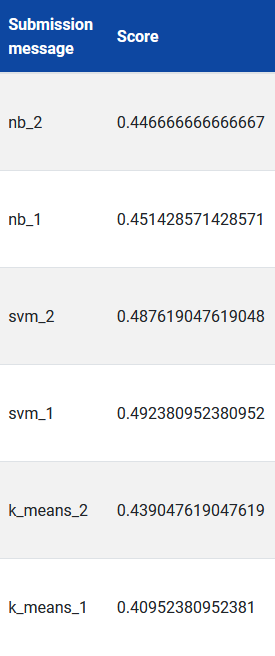

Unfortunately, our testing scores did not vary very much from our training scores. Our best performing model was our SVM: with 49.24% accuracy on option 1 and 48.76% accuracy on option 2. Our next best performing model was our Naive Bayes: with 45.14% accuracy on option 1 and 44.67% accuracy on option 2. And in dead last, our k-means model with 40.95% accuracy on option 1 and 43.9% accuracy on option 2. 

## Hyperparameter Tuning and Unsupervised Model Improvment Efforts

While our preliminary results are disappointing, there are several things we can do to help improve our scores. Namely in the form of hyper-parameter tuning. This is where we take our k-means model and find the most optimal hyper-parameters. There are also some hyper-parameters that we will include that were not previously included in our base model. <br> The first hyper-parameter we will include is the variance threshold. This allows us to identify features with low variance in our dataset and remove them. This, in turn, should help aid in clustering. Because we saw a lot of misclassification in segment "B" I think this will be an important parameter to examine and modify. <br> Another parameter we will look at is a scaler. Scalers normalize the data in our datasets. This helps ensures that all the features in our dataset our contributing equally to our dataset and may improve clustering. <br> We will also look at the model's hyper-parameters themselves. This includes "init" and "algorithm". "Init" is the method of centroid initialization and "algorithm" determines the type of k-means algorithm that is used. <br> All combinations of these hyper-parameters will be explored using "GridSearchCV". This implements a "fit" and a "score" method which determines the best combination of hyper-parameters. Once the grid search is complete, we will get a list of the best hyper-parameters along with the best accuracy score.

In [178]:
pipeline = Pipeline([
    ('variance_threshold', VarianceThreshold()),
    ('scaler', StandardScaler()),
    ('kmeans', KMeans())
])

param_grid = {
    'variance_threshold__threshold': [0.1, 0.2, 0.3],  
    'scaler': [StandardScaler(), MinMaxScaler(), RobustScaler()],
    'kmeans__n_clusters': [4],
    'kmeans__verbose': [0, 0.1, 1.0],
    'kmeans__init': ['k-means++', 'random'],
    'kmeans__algorithm': ['auto', 'full', 'elkan']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

grid_search.fit(clustering_data_1, y_pred_train_1)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_model_1 = grid_search.best_estimator_
print("Best parameters:", best_params)
print("Best score:", best_score)

Initialization complete
Iteration 0, inertia 2629.7625831988357
Iteration 1, inertia 2093.122069161602
Iteration 2, inertia 2076.82604523674
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 2952.4485356801356
Iteration 1, inertia 2325.7810267902323
Iteration 2, inertia 2185.1948243733023
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 2845.8528261329707
Iteration 1, inertia 2479.828376308304
Iteration 2, inertia 2468.9130138105384
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 3849.5258006192207
Iteration 1, inertia 2395.2545225364242
Iteration 2, inertia 2311.1643181305603
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 3152.108165662043
Iteration 1, inertia 2436.350229217503
Iteration 2, inertia 2314.419519262308
Iteration 3, inertia 2311.8178974462953
Converged at iteration 3: strict convergence.
Initialization co

Iteration 1, inertia 241.12441261126403
Iteration 2, inertia 239.0048038943016
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 312.890625
Iteration 1, inertia 266.2109300954239
Iteration 2, inertia 244.8765734327651
Iteration 3, inertia 244.6160586615193
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 304.015625
Iteration 1, inertia 244.8765734327651
Iteration 2, inertia 244.6160586615193
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 304.015625
Iteration 1, inertia 244.8765734327651
Iteration 2, inertia 244.6160586615193
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 345.390625
Iteration 1, inertia 271.13480364366904
Iteration 2, inertia 266.21093009542386
Iteration 3, inertia 244.8765734327651
Iteration 4, inertia 244.6160586615193
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0,

Iteration 1, inertia 705.6110457632254
Iteration 2, inertia 703.9437095865097
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 1531.1999999999978
Iteration 1, inertia 1182.159123921768
Iteration 2, inertia 1173.0383325748462
Iteration 3, inertia 1140.7822231240368
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 947.1599999999984
Iteration 1, inertia 711.1991307008378
Iteration 2, inertia 710.4731684384627
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 790.0399999999985
Iteration 1, inertia 677.7848135760685
Iteration 2, inertia 674.2911405553939
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 803.1599999999992
Iteration 1, inertia 693.6132099176749
Iteration 2, inertia 690.119536897
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 1591.6799999999953
Iteration 1, inertia 1364.

Iteration 4, inertia 248.29156307543153
Iteration 5, inertia 247.19650698143582
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 328.21875
Iteration 1, inertia 252.0359272794973
Iteration 2, inertia 247.62572020805024
Iteration 3, inertia 247.19650698143585
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 401.0625
Iteration 1, inertia 316.13958203795846
Iteration 2, inertia 301.24098987761295
Iteration 3, inertia 267.29009455485374
Iteration 4, inertia 248.29156307543153
Iteration 5, inertia 247.1965069814358
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 301.3125
Iteration 1, inertia 249.2351083898267
Iteration 2, inertia 247.1965069814358
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 418.234375
Iteration 1, inertia 281.4811368936032
Iteration 2, inertia 243.85235505267372
Iteration 3, inertia 242.8328105118287
Con

Initialization complete
Iteration 0, inertia 1061.559999999998
Iteration 1, inertia 713.5660687966474
Iteration 2, inertia 709.6756394579301
Iteration 3, inertia 708.8513759319245
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 924.5199999999978
Iteration 1, inertia 711.0661746896939
Iteration 2, inertia 709.0266564789075
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 809.0399999999984
Iteration 1, inertia 712.3902487884009
Iteration 2, inertia 708.8674649376615
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 933.399999999998
Iteration 1, inertia 709.67114370368
Iteration 2, inertia 708.8513759319245
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 946.8799999999983
Iteration 1, inertia 724.4504506058521
Iteration 2, inertia 723.6261870798464
Converged at iteration 2: strict convergence.
Initialization complete
Itera

Initialization complete
Iteration 0, inertia 1893.78125
Iteration 1, inertia 1097.6385998803412
Iteration 2, inertia 581.194164266845
Iteration 3, inertia 257.91515366079676
Iteration 4, inertia 240.22693114323897
Iteration 5, inertia 239.0048038943016
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 501.390625
Iteration 1, inertia 359.837464300682
Iteration 2, inertia 341.3914941671876
Iteration 3, inertia 286.3016822035335
Iteration 4, inertia 245.9886030652795
Iteration 5, inertia 245.2469480800431
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 349.921875
Iteration 1, inertia 271.13480364366904
Iteration 2, inertia 266.2109300954239
Iteration 3, inertia 244.8765734327651
Iteration 4, inertia 244.61605866151925
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 596.5
Iteration 1, inertia 483.3664966259475
Iteration 2, inertia 430.5585445053074
Iteration 3, ine

Iteration 1, inertia 1062.3607456920656
Iteration 2, inertia 1054.7326207766
Iteration 3, inertia 907.4167215147829
Iteration 4, inertia 793.1483800089337
Iteration 5, inertia 721.6786290942739
Iteration 6, inertia 720.7151636724269
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 4306.559999999999
Iteration 1, inertia 1272.1482937726503
Iteration 2, inertia 1066.0209449051122
Iteration 3, inertia 1049.5222224004528
Iteration 4, inertia 909.2680553780875
Iteration 5, inertia 789.501662187311
Iteration 6, inertia 716.9521808560004
Iteration 7, inertia 716.099476977953
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 1286.359999999996
Iteration 1, inertia 693.6132099176748
Iteration 2, inertia 690.1195368969998
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 2377.2799999999997
Iteration 1, inertia 1201.589442685203
Iteration 2, inertia 1066.0209449051122
Iteratio

Iteration 1, inertia 266.00202682807105
Iteration 2, inertia 264.8967606138821
Iteration 3, inertia 242.26877099392988
Iteration 4, inertia 241.96485175018614
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 691.671875
Iteration 1, inertia 372.3405409362845
Iteration 2, inertia 346.1287349880068
Iteration 3, inertia 289.6757383213525
Iteration 4, inertia 248.56135523986563
Iteration 5, inertia 247.74188818178504
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 808.21875
Iteration 1, inertia 622.1592835535153
Iteration 2, inertia 491.7436952144381
Iteration 3, inertia 491.1349695733884
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 456.9375
Iteration 1, inertia 323.32092578755
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 1097.3125
Iteration 1, inertia 404.68767834371016
Iteration 2, inertia 291.12384103231255
Iterat

Iteration 4, inertia 788.1954985413662
Iteration 5, inertia 782.8782723916067
Iteration 6, inertia 690.0456671888938
Iteration 7, inertia 688.1330449019222
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 1579.039999999996
Iteration 1, inertia 1412.677438316775
Iteration 2, inertia 1379.6685196212798
Iteration 3, inertia 1374.7053802499809
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 2693.3599999999997
Iteration 1, inertia 1390.5120282758826
Iteration 2, inertia 1269.945194331964
Iteration 3, inertia 1259.0677089783624
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 2922.0399999999977
Iteration 1, inertia 2100.8487970959973
Iteration 2, inertia 1582.3200502959098
Iteration 3, inertia 1380.847533328793
Iteration 4, inertia 1369.1262782044414
Iteration 5, inertia 1328.3327904989176
Converged at iteration 5: strict convergence.
Initialization complete
Iteratio

Iteration 0, inertia 463.28125.
Iteration 1, inertia 375.94553025311416.
Iteration 2, inertia 271.32950219252245.
Iteration 3, inertia 270.4401712162415.
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 423.125.
Iteration 1, inertia 307.5173229066003.
Iteration 2, inertia 289.9169394591795.
Iteration 3, inertia 266.01401986529766.
Iteration 4, inertia 244.32195742037058.
Iteration 5, inertia 241.5212983025244.
Iteration 6, inertia 240.99111505022017.
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 358.0625.
Iteration 1, inertia 286.5793460901858.
Iteration 2, inertia 286.4355626737312.
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 352.640625.
Iteration 1, inertia 260.62354809975335.
Iteration 2, inertia 256.2918535543733.
Iteration 3, inertia 254.78332025334288.
Iteration 4, inertia 235.59566577278616.
Iteration 5, inertia 235.34834047905935.
Converged at it

Initialization complete
Iteration 0, inertia 3402.9816588702506.
Iteration 1, inertia 2329.4924424708383.
Iteration 2, inertia 2256.185744374049.
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 2832.643463493876.
Iteration 1, inertia 2463.919398062188.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 2956.0742973384995.
Iteration 1, inertia 2064.0941097918885.
Iteration 2, inertia 2044.6217153097514.
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 3694.9534759717303.
Iteration 1, inertia 2026.8803047860526.
Iteration 2, inertia 2006.5694396895674.
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 4752.009947155397.
Iteration 1, inertia 2409.415574006629.
Iteration 2, inertia 2391.742509218739.
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 2625.8627720324657.
Iteration 1, iner

Iteration 2, inertia 704.0740158793503.
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 812.519999999999.
Iteration 1, inertia 707.8980457228134.
Iteration 2, inertia 704.0250643686493.
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 993.1999999999972.
Iteration 1, inertia 710.0508378600772.
Iteration 2, inertia 707.5525846101899.
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 1378.5199999999966.
Iteration 1, inertia 750.0089535051719.
Iteration 2, inertia 722.4859711527357.
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 885.5599999999982.
Iteration 1, inertia 707.8980457228134.
Iteration 2, inertia 704.0250643686495.
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 884.1999999999977.
Iteration 1, inertia 704.75291360259.
Iteration 2, inertia 704.11293401742.
Converged at i

Iteration 4, inertia 740.3271870201164.
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 7474.80000000001.
Iteration 1, inertia 3792.424287857419.
Iteration 2, inertia 1131.763007220782.
Iteration 3, inertia 813.665764932105.
Iteration 4, inertia 739.7332680638601.
Iteration 5, inertia 738.7433456431131.
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 953.6399999999975.
Iteration 1, inertia 703.6590702338269.
Iteration 2, inertia 702.950521552281.
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 2397.3999999999983.
Iteration 1, inertia 985.24122096831.
Iteration 2, inertia 740.325182954409.
Iteration 3, inertia 728.1192294911937.
Iteration 4, inertia 725.5379737552227.
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 2727.5200000000013.
Iteration 1, inertia 1237.2531704236524.
Iteration 2, inertia 1177.3848835429885.
It

Initialization complete
Iteration 0, inertia 1878.484375.
Iteration 1, inertia 1060.3100557195926.
Iteration 2, inertia 921.7783229039863.
Iteration 3, inertia 401.91628674940443.
Iteration 4, inertia 343.5491345985206.
Iteration 5, inertia 298.13597294246955.
Iteration 6, inertia 291.85195478212114.
Iteration 7, inertia 267.2591426564394.
Iteration 8, inertia 243.24374999998884.
Iteration 9, inertia 242.27256088272114.
Converged at iteration 9: strict convergence.
Initialization complete
Iteration 0, inertia 1176.703125.
Iteration 1, inertia 558.7299839533393.
Iteration 2, inertia 468.1006199423344.
Iteration 3, inertia 410.82421515726463.
Iteration 4, inertia 313.0106410838482.
Iteration 5, inertia 312.31512821069396.
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 1571.578125.
Iteration 1, inertia 411.94810168254855.
Iteration 2, inertia 260.3084942600131.
Iteration 3, inertia 243.32460272439891.
Iteration 4, inertia 242.27256088272114.
Con

Initialization complete
Iteration 0, inertia 3449.1983930689266
Iteration 1, inertia 2404.876863117396
Iteration 2, inertia 2312.192694905876
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 3183.9289071711373
Iteration 1, inertia 2447.211209255407
Iteration 2, inertia 2433.306463775112
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 4433.705926699992
Iteration 1, inertia 2572.4622604820397
Iteration 2, inertia 2562.2877393040612
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 3056.406024648869
Iteration 1, inertia 2396.3502014017645
Iteration 2, inertia 2317.7119984936508
Iteration 3, inertia 2313.5247420498554
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 3127.2159199376983
Iteration 1, inertia 2506.411118861257
Iteration 2, inertia 2492.339478140188
Iteration 3, inertia 2486.5964464151807
Converged at iteration 3

Iteration 3, inertia 236.70809936186012
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 295.046875
Iteration 1, inertia 243.84145199919266
Iteration 2, inertia 242.27256088272114
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 407.9375
Iteration 1, inertia 329.0905937671532
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 292.703125
Iteration 1, inertia 243.85235505267372
Iteration 2, inertia 242.83281051182868
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 391.640625
Iteration 1, inertia 238.83106456569357
Iteration 2, inertia 236.7080993618601
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 447.828125
Iteration 1, inertia 243.57184157039387
Iteration 2, inertia 240.1134208512446
Iteration 3, inertia 239.7506438478232
Converged at iteration 3: strict convergence.
Initializa

Initialization complete
Iteration 0, inertia 1324.039999999997
Iteration 1, inertia 699.1541604346942
Iteration 2, inertia 694.2518453309855
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 1052.0799999999977
Iteration 1, inertia 730.6538628573092
Iteration 2, inertia 708.8674649376615
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 906.1999999999985
Iteration 1, inertia 709.422544036189
Iteration 2, inertia 709.0266564789076
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 1183.8399999999972
Iteration 1, inertia 697.5238781847453
Iteration 2, inertia 694.2518453309855
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 973.9999999999978
Iteration 1, inertia 734.1766467080487
Iteration 2, inertia 708.8674649376615
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 739.159999999999
It

Initialization complete
Iteration 0, inertia 356.671875
Iteration 1, inertia 266.00202682807105
Iteration 2, inertia 264.8967606138821
Iteration 3, inertia 242.26877099392988
Iteration 4, inertia 241.96485175018609
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 322.578125
Iteration 1, inertia 249.17737375099466
Iteration 2, inertia 247.74188818178507
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 298.546875
Iteration 1, inertia 273.77470642946076
Iteration 2, inertia 269.7345432253032
Iteration 3, inertia 247.4916758841809
Iteration 4, inertia 247.19650698143582
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 448.625
Iteration 1, inertia 331.2585440871881
Iteration 2, inertia 330.67796047366386
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 303.421875
Iteration 1, inertia 248.04580742552878
Iteration 2, inertia 24

Initialization complete
Iteration 0, inertia 1057.7999999999975
Iteration 1, inertia 690.3716714571174
Iteration 2, inertia 688.3609842018856
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 1208.319999999997
Iteration 1, inertia 749.3597715307444
Iteration 2, inertia 725.1713080214813
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 1243.6399999999976
Iteration 1, inertia 693.2589271042314
Iteration 2, inertia 688.3609842018853
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 860.2799999999977
Iteration 1, inertia 693.2589271042323
Iteration 2, inertia 688.3609842018853
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 1087.119999999998
Iteration 1, inertia 798.5853620794996
Iteration 2, inertia 705.9745246457528
Iteration 3, inertia 704.1129340174205
Converged at iteration 3: strict convergence.
Initialization complete


Initialization complete
Iteration 0, inertia 1195.53125
Iteration 1, inertia 523.1966328637734
Iteration 2, inertia 499.90645304694584
Iteration 3, inertia 497.82363105130105
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 812.921875
Iteration 1, inertia 388.66153261210115
Iteration 2, inertia 350.1703146330531
Iteration 3, inertia 349.9310328711644
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 789.71875
Iteration 1, inertia 372.79849648487766
Iteration 2, inertia 341.444115035835
Iteration 3, inertia 333.76170013102694
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 931.984375
Iteration 1, inertia 529.6465138064923
Iteration 2, inertia 433.7271233064086
Iteration 3, inertia 392.59092502609894
Iteration 4, inertia 285.6770589239765
Iteration 5, inertia 284.6502913281036
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inert

Initialization complete
Iteration 0, inertia 1855.5599999999968
Iteration 1, inertia 1224.686668392835
Iteration 2, inertia 1100.805194236354
Iteration 3, inertia 1095.7141448298669
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 7477.600000000008
Iteration 1, inertia 3353.6819292911564
Iteration 2, inertia 1139.6728579599087
Iteration 3, inertia 1051.7247969368357
Iteration 4, inertia 1050.5973257421808
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 1610.4399999999973
Iteration 1, inertia 1179.7590927468493
Iteration 2, inertia 1099.4232291128594
Iteration 3, inertia 1095.7141448298667
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 1629.3199999999968
Iteration 1, inertia 1091.8322512071634
Iteration 2, inertia 1085.5929495410696
Iteration 3, inertia 1084.09153150513
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 

Iteration 3, inertia 451.0786402777324
Iteration 4, inertia 410.1227425129738
Iteration 5, inertia 313.0106410838482
Iteration 6, inertia 312.31512821069384
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 678.890625
Iteration 1, inertia 368.47391814877193
Iteration 2, inertia 338.3184190242976
Iteration 3, inertia 285.19841611895674
Iteration 4, inertia 242.87984236999242
Iteration 5, inertia 242.27256088272114
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 710.515625
Iteration 1, inertia 325.83515533145163
Iteration 2, inertia 303.0790275379217
Iteration 3, inertia 290.4701236840454
Iteration 4, inertia 267.2591426564393
Iteration 5, inertia 243.24374999998884
Iteration 6, inertia 242.27256088272114
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 513.703125
Iteration 1, inertia 404.25663145895874
Iteration 2, inertia 390.3539362537327
Iteration 3, inertia 2

Iteration 5, inertia 1095.7774324219902
Iteration 6, inertia 1094.8232565546007
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 3186.8
Iteration 1, inertia 1228.6746973513916
Iteration 2, inertia 886.9024275933126
Iteration 3, inertia 730.0984410515879
Iteration 4, inertia 724.4504506058521
Iteration 5, inertia 723.6261870798464
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 5063.5999999999985
Iteration 1, inertia 1840.10350201502
Iteration 2, inertia 1483.852675132537
Iteration 3, inertia 1428.794135900878
Iteration 4, inertia 1309.8732658984595
Iteration 5, inertia 1267.6284108678708
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 3558.52
Iteration 1, inertia 1228.2046784185782
Iteration 2, inertia 1182.0845583019156
Iteration 3, inertia 970.8707858086361
Iteration 4, inertia 700.4915829369572
Iteration 5, inertia 694.0926537897393
Converged at iteration 5

C:\Users\Nero\PycharmProjects\Test\venv\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
540 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Nero\PycharmProjects\Test\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Nero\PycharmProjects\Test\venv\lib\site-packages\sklearn\pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\Nero\PycharmProjects\Test\venv\lib\site-packages\sklearn\pipeline.py", line 355, in _fit
    **fit_params_step

In [179]:
pipeline = Pipeline([
    ('variance_threshold', VarianceThreshold()),
    ('scaler', StandardScaler()),
    ('kmeans', KMeans())
])

param_grid = {
    'variance_threshold__threshold': [0.1, 0.2, 0.3],  
    'scaler': [StandardScaler(), MinMaxScaler(), RobustScaler()],
    'kmeans__n_clusters': [4],
    'kmeans__verbose': [0, 0.1, 1.0],
    'kmeans__init': ['k-means++', 'random'],
    'kmeans__algorithm': ['auto', 'full', 'elkan']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

grid_search.fit(clustering_data_2, y_pred_train_2)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_model_1 = grid_search.best_estimator_
print("Best parameters:", best_params)
print("Best score:", best_score)

Initialization complete
Iteration 0, inertia 44032.720671597745
Iteration 1, inertia 33270.696652391496
Iteration 2, inertia 32429.806215209657
Iteration 3, inertia 31894.230005252382
Iteration 4, inertia 31790.006475272825
Iteration 5, inertia 31750.421707902842
Iteration 6, inertia 31692.310194827005
Iteration 7, inertia 31495.81990186483
Iteration 8, inertia 31186.597351527875
Iteration 9, inertia 30898.658489232897
Iteration 10, inertia 30762.064883591243
Iteration 11, inertia 30699.88904176456
Iteration 12, inertia 30648.17860014003
Iteration 13, inertia 30594.858184456796
Iteration 14, inertia 30535.690789295095
Iteration 15, inertia 30511.657571720203
Iteration 16, inertia 30500.928554341735
Iteration 17, inertia 30495.566547081144
Iteration 18, inertia 30492.841112898594
Iteration 19, inertia 30491.485942518695
Iteration 20, inertia 30491.00620724727
Converged at iteration 20: center shift 1.2258768267014124e-05 within tolerance 9.999999999999861e-05.
Initialization complete
It

Iteration 5, inertia 30611.253340607203
Iteration 6, inertia 30600.800284906178
Iteration 7, inertia 30592.552288770345
Iteration 8, inertia 30587.628947221758
Iteration 9, inertia 30586.141407427363
Iteration 10, inertia 30583.41194219811
Iteration 11, inertia 30581.321816516378
Iteration 12, inertia 30579.478197754346
Iteration 13, inertia 30578.614553685944
Iteration 14, inertia 30578.314666102586
Iteration 15, inertia 30577.698460290274
Iteration 16, inertia 30577.307764714325
Iteration 17, inertia 30577.11618325947
Converged at iteration 17: center shift 5.0021525088757435e-05 within tolerance 0.0001000000000000008.
Initialization complete
Iteration 0, inertia 46509.58041211284
Iteration 1, inertia 32790.54510766471
Iteration 2, inertia 31611.194150625255
Iteration 3, inertia 30912.459424546145
Iteration 4, inertia 30695.70965765867
Iteration 5, inertia 30618.498287425442
Iteration 6, inertia 30595.31103864354
Iteration 7, inertia 30583.309477093935
Iteration 8, inertia 30579.1301

Iteration 9, inertia 30626.602123962177
Iteration 10, inertia 30624.782979908465
Iteration 11, inertia 30623.700524351625
Iteration 12, inertia 30623.49433817552
Converged at iteration 12: center shift 1.3075975483753513e-05 within tolerance 9.999999999999902e-05.
Initialization complete
Iteration 0, inertia 48100.145013599555
Iteration 1, inertia 33072.937258754
Iteration 2, inertia 32444.38096992862
Iteration 3, inertia 32195.981790873004
Iteration 4, inertia 32024.839439804866
Iteration 5, inertia 31905.016598567952
Iteration 6, inertia 31763.67255594393
Iteration 7, inertia 31504.222731314094
Iteration 8, inertia 31160.86712154461
Iteration 9, inertia 30885.443645808627
Iteration 10, inertia 30767.788580395616
Iteration 11, inertia 30719.270095015887
Iteration 12, inertia 30674.96789307526
Iteration 13, inertia 30635.716331595122
Iteration 14, inertia 30620.513201405243
Iteration 15, inertia 30615.751090613947
Iteration 16, inertia 30612.991042584094
Iteration 17, inertia 30611.330

Iteration 32, inertia 30664.021329887808
Iteration 33, inertia 30663.18814209771
Iteration 34, inertia 30662.920617350253
Converged at iteration 34: center shift 7.13250913164067e-05 within tolerance 0.00010000000000000047.
Initialization complete
Iteration 0, inertia 48050.45396373957
Iteration 1, inertia 34909.72569812316
Iteration 2, inertia 34304.6335722464
Iteration 3, inertia 34110.33158382795
Iteration 4, inertia 33989.527723031926
Iteration 5, inertia 33848.22420477733
Iteration 6, inertia 33677.345607508796
Iteration 7, inertia 33390.141077950924
Iteration 8, inertia 33174.93780762833
Iteration 9, inertia 32811.80337339085
Iteration 10, inertia 32438.619897197343
Iteration 11, inertia 32350.098500487587
Iteration 12, inertia 32325.706124301767
Iteration 13, inertia 32314.67382458415
Iteration 14, inertia 32310.350686611837
Iteration 15, inertia 32308.71495388828
Iteration 16, inertia 32307.70944087783
Iteration 17, inertia 32307.502957781937
Converged at iteration 17: center s

Iteration 7, inertia 30493.549477387143
Iteration 8, inertia 30491.53570070606
Iteration 9, inertia 30490.929223560837
Iteration 10, inertia 30490.76561777893
Iteration 11, inertia 30490.611787136295
Converged at iteration 11: center shift 4.193178765363972e-05 within tolerance 9.999999999999861e-05.
Initialization complete
Iteration 0, inertia 42488.437749204655
Iteration 1, inertia 30904.699147435414
Iteration 2, inertia 30675.181660077484
Iteration 3, inertia 30590.92697479266
Iteration 4, inertia 30527.484502801894
Iteration 5, inertia 30506.132681343068
Iteration 6, inertia 30498.04191509032
Iteration 7, inertia 30493.643219919766
Iteration 8, inertia 30491.827429181016
Iteration 9, inertia 30491.184103382624
Iteration 10, inertia 30491.006207247272
Converged at iteration 10: center shift 1.2258768267014754e-05 within tolerance 9.999999999999861e-05.
Initialization complete
Iteration 0, inertia 47554.66167265083
Iteration 1, inertia 31852.876299432246
Iteration 2, inertia 31153.99

Iteration 0, inertia 45795.97602611498
Iteration 1, inertia 33320.050559108655
Iteration 2, inertia 32487.580924972408
Iteration 3, inertia 32350.493281218725
Iteration 4, inertia 32318.255006666623
Iteration 5, inertia 32308.550369921297
Iteration 6, inertia 32304.839862147393
Iteration 7, inertia 32301.51783168752
Iteration 8, inertia 32295.997620307135
Iteration 9, inertia 32281.443372733833
Iteration 10, inertia 32252.851343122205
Iteration 11, inertia 32209.165490704134
Iteration 12, inertia 32164.818220573346
Iteration 13, inertia 32121.38839587105
Iteration 14, inertia 32080.1848411302
Iteration 15, inertia 32036.21429311131
Iteration 16, inertia 31988.99932877221
Iteration 17, inertia 31949.618431934985
Iteration 18, inertia 31916.808876817744
Iteration 19, inertia 31895.134408562997
Iteration 20, inertia 31884.352429187642
Iteration 21, inertia 31880.530272870204
Iteration 22, inertia 31878.92440915356
Iteration 23, inertia 31878.39965380091
Converged at iteration 23: center s

Iteration 12, inertia 30638.369693343244
Iteration 13, inertia 30634.899153981805
Iteration 14, inertia 30631.120331547078
Iteration 15, inertia 30627.798864219145
Iteration 16, inertia 30625.8083038735
Iteration 17, inertia 30624.622997424456
Iteration 18, inertia 30623.896498006034
Iteration 19, inertia 30623.643569228137
Converged at iteration 19: center shift 2.0540441411329353e-05 within tolerance 9.999999999999902e-05.
Initialization complete
Iteration 0, inertia 50996.07720009241
Iteration 1, inertia 35148.66401584367
Iteration 2, inertia 34032.244331492526
Iteration 3, inertia 33152.61402957382
Iteration 4, inertia 32542.972157299577
Iteration 5, inertia 32222.740035350416
Iteration 6, inertia 32066.254232792617
Iteration 7, inertia 31971.094233314136
Iteration 8, inertia 31928.736315177863
Iteration 9, inertia 31904.557928850685
Iteration 10, inertia 31887.60475407542
Iteration 11, inertia 31871.487412551873
Iteration 12, inertia 31860.140744838114
Iteration 13, inertia 31854.

Iteration 17, inertia 30536.407458442907
Iteration 18, inertia 30528.612875992992
Iteration 19, inertia 30526.2876546374
Iteration 20, inertia 30524.389353167724
Iteration 21, inertia 30520.134818469716
Iteration 22, inertia 30515.204913545054
Iteration 23, inertia 30507.006893363356
Iteration 24, inertia 30497.818928892284
Iteration 25, inertia 30490.6048818767
Iteration 26, inertia 30484.048705670688
Iteration 27, inertia 30480.02285383125
Iteration 28, inertia 30475.03267200922
Iteration 29, inertia 30470.508037751362
Iteration 30, inertia 30466.437876681895
Iteration 31, inertia 30462.885339913304
Iteration 32, inertia 30460.98763469646
Iteration 33, inertia 30460.29556732579
Converged at iteration 33: center shift 9.26809040674214e-05 within tolerance 0.0001000000000000008.
Initialization complete
Iteration 0, inertia 53041.06744167035
Iteration 1, inertia 32157.79231768332
Iteration 2, inertia 30851.348870620124
Iteration 3, inertia 30635.86017564173
Iteration 4, inertia 30579.57

Iteration 3, inertia 30702.667627111106
Iteration 4, inertia 30538.303841405577
Iteration 5, inertia 30503.450493060594
Iteration 6, inertia 30493.89377953667
Iteration 7, inertia 30491.91115943274
Iteration 8, inertia 30491.322569034746
Converged at iteration 8: center shift 8.949999400407075e-05 within tolerance 9.999999999999861e-05.
Initialization complete
Iteration 0, inertia 47943.56743096125
Iteration 1, inertia 33436.11730397155
Iteration 2, inertia 32034.311265318203
Iteration 3, inertia 31005.869137747424
Iteration 4, inertia 30676.894398042106
Iteration 5, inertia 30603.60098983668
Iteration 6, inertia 30583.352124175948
Iteration 7, inertia 30574.265878330556
Iteration 8, inertia 30559.098871982977
Iteration 9, inertia 30541.288818844194
Iteration 10, inertia 30527.56005672571
Iteration 11, inertia 30517.974818709554
Iteration 12, inertia 30509.329674761953
Iteration 13, inertia 30502.204439839374
Iteration 14, inertia 30496.329160385776
Iteration 15, inertia 30492.71688239

Iteration 7, inertia 32374.785335350578
Iteration 8, inertia 32109.767665836658
Iteration 9, inertia 32023.225889098103
Iteration 10, inertia 31983.12807049622
Iteration 11, inertia 31955.980166917263
Iteration 12, inertia 31928.497088583434
Iteration 13, inertia 31881.05874370875
Iteration 14, inertia 31822.644248952354
Iteration 15, inertia 31798.08506398848
Iteration 16, inertia 31795.938328894317
Iteration 17, inertia 31795.65180115762
Converged at iteration 17: center shift 3.7929443347165426e-05 within tolerance 0.0001000000000000008.
Initialization complete
Iteration 0, inertia 44594.55092636149
Iteration 1, inertia 32493.84782908492
Iteration 2, inertia 31065.146361420266
Iteration 3, inertia 30659.431957224904
Iteration 4, inertia 30598.350257665898
Iteration 5, inertia 30583.021125633026
Iteration 6, inertia 30579.50705123855
Iteration 7, inertia 30578.304520118778
Iteration 8, inertia 30578.03508701212
Iteration 9, inertia 30577.712818717944
Iteration 10, inertia 30577.53581

Iteration 6, inertia 32129.082639214947
Iteration 7, inertia 31373.929125270926
Iteration 8, inertia 30909.285850923072
Iteration 9, inertia 30702.34293217269
Iteration 10, inertia 30636.43093121175
Iteration 11, inertia 30619.425577504462
Iteration 12, inertia 30613.948039155002
Iteration 13, inertia 30610.563857622445
Iteration 14, inertia 30607.688231736644
Iteration 15, inertia 30606.484642382125
Iteration 16, inertia 30605.982154059173
Iteration 17, inertia 30605.326881972323
Iteration 18, inertia 30605.111210894658
Converged at iteration 18: center shift 2.891328633187662e-05 within tolerance 9.999999999999902e-05.
Initialization complete
Iteration 0, inertia 46482.35277959537
Iteration 1, inertia 32046.815393467175
Iteration 2, inertia 31207.458993687134
Iteration 3, inertia 30831.019839956632
Iteration 4, inertia 30740.645092409246
Iteration 5, inertia 30701.23229186912
Iteration 6, inertia 30659.332100830867
Iteration 7, inertia 30625.99195286706
Iteration 8, inertia 30615.085

Iteration 13, inertia 30663.592336137957
Iteration 14, inertia 30662.942465306594
Iteration 15, inertia 30662.747564459918
Converged at iteration 15: center shift 4.052625302467651e-05 within tolerance 0.00010000000000000047.
Initialization complete
Iteration 0, inertia 51864.447520209804
Iteration 1, inertia 34693.62489698602
Iteration 2, inertia 33007.08691181014
Iteration 3, inertia 32295.255023528287
Iteration 4, inertia 31406.56124371589
Iteration 5, inertia 30901.678717349358
Iteration 6, inertia 30731.62774517646
Iteration 7, inertia 30682.77973429723
Iteration 8, inertia 30667.174107381696
Iteration 9, inertia 30663.651082051754
Iteration 10, inertia 30662.15265945738
Iteration 11, inertia 30661.565569280494
Iteration 12, inertia 30661.259259779312
Iteration 13, inertia 30661.038123496608
Converged at iteration 13: center shift 2.32797727347116e-05 within tolerance 0.00010000000000000047.
Initialization complete
Iteration 0, inertia 49830.27811726882
Iteration 1, inertia 34285.

Iteration 10, inertia 3421.95461948662
Iteration 11, inertia 3421.8874745367393
Converged at iteration 11: center shift 8.87862585455365e-06 within tolerance 1.3396086733581292e-05.
Initialization complete
Iteration 0, inertia 4696.653198337127
Iteration 1, inertia 3432.5112498666826
Iteration 2, inertia 3259.394749180933
Iteration 3, inertia 3210.4762919223817
Converged at iteration 3: center shift 1.7962423206491936e-06 within tolerance 1.3396086733581292e-05.
Initialization complete
Iteration 0, inertia 6090.87199375552
Iteration 1, inertia 3744.7136172767287
Iteration 2, inertia 3588.847655386977
Iteration 3, inertia 3509.005582918602
Iteration 4, inertia 3388.7579757263293
Iteration 5, inertia 3215.463103963063
Iteration 6, inertia 3210.474106254205
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 4862.186537561783
Iteration 1, inertia 3469.6019944766954
Iteration 2, inertia 3454.176902742761
Converged at iteration 2: strict convergence.
I

Iteration 3, inertia 3315.6143014312374
Iteration 4, inertia 3307.096458581731
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 5536.195978492242
Iteration 1, inertia 3560.4031649114436
Iteration 2, inertia 3414.13589107764
Iteration 3, inertia 3382.741442582018
Iteration 4, inertia 3364.3355204001778
Iteration 5, inertia 3361.1665709967315
Iteration 6, inertia 3361.1433633471115
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 5143.9400724644665
Iteration 1, inertia 3687.5626175180373
Iteration 2, inertia 3577.075172387113
Iteration 3, inertia 3562.953837240301
Iteration 4, inertia 3560.1062058874913
Iteration 5, inertia 3559.215441911344
Iteration 6, inertia 3558.575613917254
Iteration 7, inertia 3558.3270463047534
Iteration 8, inertia 3558.036700957481
Iteration 9, inertia 3557.5386765512976
Iteration 10, inertia 3556.631804077394
Iteration 11, inertia 3554.6407804296496
Iteration 12, inertia 3545.55

Iteration 9, inertia 3628.4498583051945
Iteration 10, inertia 3628.240246154099
Iteration 11, inertia 3627.839170742369
Iteration 12, inertia 3627.3342608131256
Iteration 13, inertia 3627.1007474657163
Iteration 14, inertia 3626.7540541272037
Iteration 15, inertia 3625.407665096729
Iteration 16, inertia 3622.3141369415553
Iteration 17, inertia 3618.686771023082
Iteration 18, inertia 3615.525590657732
Iteration 19, inertia 3613.3069945622465
Iteration 20, inertia 3612.8321657681036
Converged at iteration 20: center shift 1.2424686245303803e-06 within tolerance 1.3403328491666032e-05.
Initialization complete
Iteration 0, inertia 5507.377739476488
Iteration 1, inertia 3530.4101219706545
Iteration 2, inertia 3440.522377833871
Iteration 3, inertia 3372.246150064519
Iteration 4, inertia 3356.6397094828153
Iteration 5, inertia 3320.6148421949715
Iteration 6, inertia 3313.2415651738675
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 5442.229760683208


Iteration 6, inertia 3470.1225989014874
Iteration 7, inertia 3470.052557108702
Converged at iteration 7: center shift 7.921016922130598e-06 within tolerance 1.340255454260416e-05.
Initialization complete
Iteration 0, inertia 5348.301024681512
Iteration 1, inertia 3453.917757016233
Iteration 2, inertia 3382.000508743208
Iteration 3, inertia 3313.555571955995
Iteration 4, inertia 3236.3729876489547
Iteration 5, inertia 3214.751708857051
Iteration 6, inertia 3209.7314780526913
Iteration 7, inertia 3209.7040687889057
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 5470.950466464114
Iteration 1, inertia 3781.475723332222
Iteration 2, inertia 3545.2896344121905
Iteration 3, inertia 3514.73888999096
Iteration 4, inertia 3494.9050123589886
Iteration 5, inertia 3321.670209560935
Iteration 6, inertia 3261.550320472419
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 6232.228426548
Iteration 1, inertia 3641.14887

Iteration 0, inertia 5445.3080001147655
Iteration 1, inertia 3564.9075409529187
Iteration 2, inertia 3362.2230062432077
Iteration 3, inertia 3333.5479677557164
Iteration 4, inertia 3306.771323421373
Iteration 5, inertia 3306.7073290538165
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 5604.355552742741
Iteration 1, inertia 4038.1585794045504
Iteration 2, inertia 3774.763244079256
Iteration 3, inertia 3609.8067141838646
Iteration 4, inertia 3470.835237323562
Iteration 5, inertia 3412.647713818707
Iteration 6, inertia 3399.760135635775
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 5488.882039758395
Iteration 1, inertia 3736.3307387868567
Iteration 2, inertia 3674.215903474672
Iteration 3, inertia 3655.4062039589135
Iteration 4, inertia 3642.0897093088092
Iteration 5, inertia 3618.5134225663505
Iteration 6, inertia 3603.5802353551203
Iteration 7, inertia 3591.479581221497
Iteration 8, inertia 3568.472

Iteration 24, inertia 12647.660550413111
Iteration 25, inertia 12647.062189944509
Iteration 26, inertia 12646.81644846278
Iteration 27, inertia 12646.733249167677
Converged at iteration 27: center shift 1.1471121566608743e-05 within tolerance 4.5439166809314635e-05.
Initialization complete
Iteration 0, inertia 18729.66783057852
Iteration 1, inertia 13172.504216836674
Iteration 2, inertia 12912.643432146519
Iteration 3, inertia 12809.606624824119
Iteration 4, inertia 12771.893658898438
Iteration 5, inertia 12759.327835149632
Iteration 6, inertia 12753.920719314305
Iteration 7, inertia 12750.173606410504
Iteration 8, inertia 12748.691118343817
Iteration 9, inertia 12748.45795494054
Converged at iteration 9: center shift 2.77449040428147e-05 within tolerance 4.5439166809314635e-05.
Initialization complete
Iteration 0, inertia 21329.90047520661
Iteration 1, inertia 13365.091504278058
Iteration 2, inertia 12795.691452223204
Iteration 3, inertia 12728.5876067852
Iteration 4, inertia 12714.94

Iteration 13, inertia 11579.739552184865
Iteration 14, inertia 11579.373213556451
Iteration 15, inertia 11578.927849526892
Iteration 16, inertia 11578.440646092236
Converged at iteration 16: center shift 3.464131394832256e-05 within tolerance 3.913229387491685e-05.
Initialization complete
Iteration 0, inertia 18018.447520661157
Iteration 1, inertia 11903.84923031947
Iteration 2, inertia 11706.280572854273
Iteration 3, inertia 11651.986847862298
Iteration 4, inertia 11634.82112863431
Iteration 5, inertia 11628.79944892612
Iteration 6, inertia 11625.144409197015
Iteration 7, inertia 11621.385027867142
Iteration 8, inertia 11616.145557419986
Iteration 9, inertia 11606.1340317766
Iteration 10, inertia 11592.034557835801
Iteration 11, inertia 11576.084018191092
Iteration 12, inertia 11556.070969334953
Iteration 13, inertia 11540.549122126615
Iteration 14, inertia 11524.115389565271
Iteration 15, inertia 11507.674017287567
Iteration 16, inertia 11498.45349723536
Iteration 17, inertia 11494.0

Iteration 15, inertia 11430.745014577333
Iteration 16, inertia 11430.155373276188
Iteration 17, inertia 11429.926245794126
Iteration 18, inertia 11429.848575778455
Converged at iteration 18: center shift 6.264331510550121e-06 within tolerance 3.848680823047979e-05.
Initialization complete
Iteration 0, inertia 16784.912996219282
Iteration 1, inertia 11653.547457137596
Iteration 2, inertia 11446.969521974737
Iteration 3, inertia 11411.715952686653
Iteration 4, inertia 11400.337622823503
Iteration 5, inertia 11393.03937720675
Iteration 6, inertia 11383.589976987842
Iteration 7, inertia 11371.64461881822
Iteration 8, inertia 11365.832060875666
Iteration 9, inertia 11363.001970824718
Iteration 10, inertia 11361.2153912808
Iteration 11, inertia 11360.161787514162
Iteration 12, inertia 11359.413860745264
Iteration 13, inertia 11358.730390359853
Iteration 14, inertia 11358.148393338277
Iteration 15, inertia 11357.956638672498
Iteration 16, inertia 11357.870676773891
Converged at iteration 16: 

Iteration 11, inertia 12360.774211594031
Converged at iteration 11: center shift 3.154637274725422e-05 within tolerance 4.461729719645001e-05.
Initialization complete
Iteration 0, inertia 22104.806242911156
Iteration 1, inertia 13262.672893536655
Iteration 2, inertia 12624.02725160442
Iteration 3, inertia 12496.299827872586
Iteration 4, inertia 12472.609443593768
Iteration 5, inertia 12467.492404571405
Iteration 6, inertia 12464.916769366853
Iteration 7, inertia 12462.90437209125
Iteration 8, inertia 12462.389415650501
Iteration 9, inertia 12462.309848650773
Converged at iteration 9: center shift 1.5569045027664302e-05 within tolerance 4.461729719645001e-05.
Initialization complete
Iteration 0, inertia 21007.158062381845
Iteration 1, inertia 14297.50592923104
Iteration 2, inertia 14067.885101430951
Iteration 3, inertia 14039.988951019968
Iteration 4, inertia 13993.558994854451
Iteration 5, inertia 13857.921164554282
Iteration 6, inertia 13696.106438331251
Iteration 7, inertia 13644.310

Iteration 10, inertia 13917.240833211152
Iteration 11, inertia 13906.878835652227
Iteration 12, inertia 13901.84455917979
Iteration 13, inertia 13900.154454683356
Iteration 14, inertia 13899.471423099652
Iteration 15, inertia 13899.05419791721
Iteration 16, inertia 13898.6313806146
Iteration 17, inertia 13898.380383868536
Iteration 18, inertia 13898.265538954633
Iteration 19, inertia 13898.174663791418
Iteration 20, inertia 13898.082869456579
Converged at iteration 20: center shift 3.1461658021040735e-05 within tolerance 4.5439166809314635e-05.
Initialization complete
Iteration 0, inertia 20401.50349173554
Iteration 1, inertia 13861.288287984999
Iteration 2, inertia 13276.581039880646
Iteration 3, inertia 12793.393419895347
Iteration 4, inertia 12669.459508476333
Iteration 5, inertia 12652.81029201228
Iteration 6, inertia 12648.7244800826
Iteration 7, inertia 12647.536245031335
Iteration 8, inertia 12647.04573672557
Iteration 9, inertia 12646.883327818266
Iteration 10, inertia 12646.75

Iteration 18, inertia 12457.224627793683
Iteration 19, inertia 12455.676421730232
Iteration 20, inertia 12454.951013751976
Iteration 21, inertia 12454.687756454243
Converged at iteration 21: center shift 3.778635203734766e-05 within tolerance 4.497176979048795e-05.
Initialization complete
Iteration 0, inertia 20436.748057851237
Iteration 1, inertia 12760.584837024482
Iteration 2, inertia 12553.669969890474
Iteration 3, inertia 12484.90291079911
Iteration 4, inertia 12462.90593351029
Iteration 5, inertia 12458.05057317796
Iteration 6, inertia 12455.85458186011
Iteration 7, inertia 12455.079880992373
Iteration 8, inertia 12454.773122811026
Iteration 9, inertia 12454.666330475788
Converged at iteration 9: center shift 1.3391876186550595e-05 within tolerance 4.497176979048795e-05.
Initialization complete
Iteration 0, inertia 23019.163161157034
Iteration 1, inertia 13738.144979738394
Iteration 2, inertia 12633.854883938107
Iteration 3, inertia 12502.04702440289
Iteration 4, inertia 12483.37

Iteration 16, inertia 11470.787755900968
Iteration 17, inertia 11466.82967585638
Iteration 18, inertia 11463.728268656323
Iteration 19, inertia 11462.135491273333
Iteration 20, inertia 11461.06295718434
Iteration 21, inertia 11460.271345660718
Iteration 22, inertia 11459.546120661209
Iteration 23, inertia 11459.134467234371
Iteration 24, inertia 11458.753316904476
Iteration 25, inertia 11458.5271396703
Iteration 26, inertia 11458.307455187927
Iteration 27, inertia 11458.040492419175
Iteration 28, inertia 11457.954272839226
Converged at iteration 28: center shift 1.6255578351322745e-05 within tolerance 3.848680823047979e-05.
Initialization complete
Iteration 0, inertia 18714.029952741017
Iteration 1, inertia 13108.093096759425
Iteration 2, inertia 12809.423218422515
Iteration 3, inertia 12449.87119670076
Iteration 4, inertia 12098.902748345725
Iteration 5, inertia 11845.542785195392
Iteration 6, inertia 11595.610273531469
Iteration 7, inertia 11490.701253273408
Iteration 8, inertia 1147

Iteration 4, inertia 12362.559320589187
Iteration 5, inertia 12361.237682786643
Iteration 6, inertia 12360.957862159805
Converged at iteration 6: center shift 4.150968750714217e-05 within tolerance 4.461729719645001e-05.
Initialization complete
Iteration 0, inertia 20709.882603969752
Iteration 1, inertia 14118.470899818201
Iteration 2, inertia 13683.36318571048
Iteration 3, inertia 13612.34527403491
Iteration 4, inertia 13596.148948313174
Iteration 5, inertia 13588.114063556211
Iteration 6, inertia 13581.424275028749
Iteration 7, inertia 13571.020019444888
Iteration 8, inertia 13554.753352946125
Iteration 9, inertia 13513.655666722518
Iteration 10, inertia 13406.164697286506
Iteration 11, inertia 13187.699745343209
Iteration 12, inertia 12992.307945959321
Iteration 13, inertia 12917.579970908375
Iteration 14, inertia 12886.575690615864
Iteration 15, inertia 12870.793522171247
Iteration 16, inertia 12852.903416600531
Iteration 17, inertia 12829.416444853485
Iteration 18, inertia 12790.6

Iteration 6, inertia 11474.83754414318
Iteration 7, inertia 11454.97212257112
Iteration 8, inertia 11449.009264401793
Iteration 9, inertia 11446.404089022131
Iteration 10, inertia 11445.208607406483
Iteration 11, inertia 11443.821264000106
Iteration 12, inertia 11442.401090954561
Iteration 13, inertia 11441.109273320355
Iteration 14, inertia 11440.247279578283
Iteration 15, inertia 11440.03990513162
Iteration 16, inertia 11439.981751860361
Converged at iteration 16: center shift 7.59876779872127e-06 within tolerance 3.913229387491685e-05.
Initialization complete
Iteration 0, inertia 21921.285413223155
Iteration 1, inertia 13699.761100659875
Iteration 2, inertia 12804.519580485203
Iteration 3, inertia 11878.699300885864
Iteration 4, inertia 11677.352910164469
Iteration 5, inertia 11631.606746656296
Iteration 6, inertia 11618.920392464946
Iteration 7, inertia 11613.891873334576
Iteration 8, inertia 11609.506837870676
Iteration 9, inertia 11607.088747093369
Iteration 10, inertia 11604.964

Iteration 11, inertia 12472.46919079281
Iteration 12, inertia 12464.272732524763
Iteration 13, inertia 12460.026895395531
Iteration 14, inertia 12457.665178510508
Iteration 15, inertia 12456.164194207568
Iteration 16, inertia 12455.155089140879
Iteration 17, inertia 12454.643096187681
Iteration 18, inertia 12454.519548953203
Converged at iteration 18: center shift 2.6291502518797176e-06 within tolerance 4.497176979048795e-05.
Initialization complete
Iteration 0, inertia 22072.65070247934
Iteration 1, inertia 14351.948721643214
Iteration 2, inertia 13001.85416340421
Iteration 3, inertia 12614.973530214784
Iteration 4, inertia 12549.168187616182
Iteration 5, inertia 12523.250319098403
Iteration 6, inertia 12507.262689120726
Iteration 7, inertia 12495.469672789215
Iteration 8, inertia 12485.188332667616
Iteration 9, inertia 12475.989349019368
Iteration 10, inertia 12467.629148344635
Iteration 11, inertia 12461.518720923274
Iteration 12, inertia 12458.581999254184
Iteration 13, inertia 124

Iteration 7, inertia 11633.752653598574
Iteration 8, inertia 11608.79204662054
Iteration 9, inertia 11591.826840258045
Iteration 10, inertia 11577.90255922208
Iteration 11, inertia 11551.408308094053
Iteration 12, inertia 11511.625639287293
Iteration 13, inertia 11487.16009223559
Iteration 14, inertia 11456.879300506393
Iteration 15, inertia 11402.894032785973
Iteration 16, inertia 11320.54367178513
Iteration 17, inertia 11295.437742632801
Iteration 18, inertia 11290.682883387492
Iteration 19, inertia 11288.433222713871
Iteration 20, inertia 11286.629603701285
Iteration 21, inertia 11285.972259174825
Iteration 22, inertia 11285.790440711093
Iteration 23, inertia 11285.607686178259
Iteration 24, inertia 11285.454662914957
Converged at iteration 24: center shift 3.4826673382340484e-05 within tolerance 3.848680823047979e-05.
Initialization complete
Iteration 0, inertia 19438.527268430997
Iteration 1, inertia 14002.80138635173
Iteration 2, inertia 13267.857573843796
Iteration 3, inertia 13

Iteration 40, inertia 12361.522246929588
Iteration 41, inertia 12361.411060497889
Iteration 42, inertia 12361.244582670848
Iteration 43, inertia 12360.982442992208
Iteration 44, inertia 12360.884490963661
Iteration 45, inertia 12360.76931814462
Converged at iteration 45: center shift 2.72635977066568e-05 within tolerance 4.461729719645001e-05.
Initialization complete
Iteration 0, inertia 49241.622389519725
Iteration 1, inertia 33937.35566170161
Iteration 2, inertia 32944.20116897588
Iteration 3, inertia 32074.963830187156
Iteration 4, inertia 31399.760300066468
Iteration 5, inertia 30891.764964845825
Iteration 6, inertia 30737.747336182314
Iteration 7, inertia 30684.716434181217
Iteration 8, inertia 30651.39912433391
Iteration 9, inertia 30620.455896263007
Iteration 10, inertia 30599.697265492592
Iteration 11, inertia 30586.929680846522
Iteration 12, inertia 30579.415243320953
Iteration 13, inertia 30569.952664556728
Iteration 14, inertia 30555.19821859215
Iteration 15, inertia 30538.8

Iteration 22, inertia 30580.552821295998
Iteration 23, inertia 30579.16397064834
Iteration 24, inertia 30578.546185647552
Iteration 25, inertia 30578.247435600908
Iteration 26, inertia 30577.67040495455
Iteration 27, inertia 30577.258722841838
Converged at iteration 27: center shift 8.67030391124268e-05 within tolerance 0.0001000000000000008.
Initialization complete
Iteration 0, inertia 49054.48453425327
Iteration 1, inertia 33578.83153007341
Iteration 2, inertia 33007.82890702523
Iteration 3, inertia 32781.0953848444
Iteration 4, inertia 32600.38212126562
Iteration 5, inertia 32488.19640750946
Iteration 6, inertia 32436.121375709667
Iteration 7, inertia 32414.599834536188
Iteration 8, inertia 32410.027715540804
Iteration 9, inertia 32409.545358709787
Iteration 10, inertia 32409.384370688247
Converged at iteration 10: strict convergence.
Initialization complete
Iteration 0, inertia 50487.514449944276
Iteration 1, inertia 32672.384410512164
Iteration 2, inertia 31457.259007974382
Iterat

Iteration 9, inertia 30610.727603209823
Iteration 10, inertia 30610.286755974277
Iteration 11, inertia 30609.98438834936
Converged at iteration 11: center shift 9.396801633747081e-05 within tolerance 9.999999999999902e-05.
Initialization complete
Iteration 0, inertia 49469.35281400227
Iteration 1, inertia 33690.02711817251
Iteration 2, inertia 32974.338482885905
Iteration 3, inertia 32743.485751926026
Iteration 4, inertia 32633.662757897284
Iteration 5, inertia 32561.364822960848
Iteration 6, inertia 32511.787357183483
Iteration 7, inertia 32471.98848670247
Iteration 8, inertia 32436.735454387457
Iteration 9, inertia 32404.482392679456
Iteration 10, inertia 32365.438751967748
Iteration 11, inertia 32299.745700940395
Iteration 12, inertia 32207.933159246277
Iteration 13, inertia 32128.18002168545
Iteration 14, inertia 32069.5155871528
Iteration 15, inertia 32019.256532389314
Iteration 16, inertia 31980.149670057286
Iteration 17, inertia 31923.344251217295
Iteration 18, inertia 31878.440

Iteration 11, inertia 30661.728183256713
Iteration 12, inertia 30661.503255249845
Converged at iteration 12: center shift 8.18429111438654e-05 within tolerance 0.00010000000000000047.
Initialization complete
Iteration 0, inertia 56131.213749429226
Iteration 1, inertia 36363.245330723905
Iteration 2, inertia 34136.516923680785
Iteration 3, inertia 32805.38947411929
Iteration 4, inertia 32531.663309773918
Iteration 5, inertia 32193.693736788195
Iteration 6, inertia 31638.30806833425
Iteration 7, inertia 31095.404438766258
Iteration 8, inertia 30800.77965831602
Iteration 9, inertia 30709.445675885858
Iteration 10, inertia 30682.755333476896
Iteration 11, inertia 30670.520124387087
Iteration 12, inertia 30665.466098877398
Iteration 13, inertia 30662.501309610703
Iteration 14, inertia 30661.3688382198
Iteration 15, inertia 30661.157117597322
Converged at iteration 15: center shift 3.909178351563988e-05 within tolerance 0.00010000000000000047.
Initialization complete
Iteration 0, inertia 494

Iteration 11, inertia 32176.013594876975
Iteration 12, inertia 32049.391649580157
Iteration 13, inertia 31976.581324373146
Iteration 14, inertia 31926.732632200663
Iteration 15, inertia 31890.817549051415
Iteration 16, inertia 31866.5556002473
Iteration 17, inertia 31851.781810124543
Iteration 18, inertia 31846.085988182396
Iteration 19, inertia 31844.482535139538
Iteration 20, inertia 31843.372582936627
Iteration 21, inertia 31842.6653849692
Iteration 22, inertia 31842.21366356375
Converged at iteration 22: center shift 6.971841520280409e-05 within tolerance 0.0001000000000000008.
Initialization complete
Iteration 0, inertia 52373.548520436736
Iteration 1, inertia 34508.71981104449
Iteration 2, inertia 33393.07858163693
Iteration 3, inertia 32862.2946500142
Iteration 4, inertia 32633.647192278546
Iteration 5, inertia 32503.471899393993
Iteration 6, inertia 32405.950534440188
Iteration 7, inertia 32197.86047283617
Iteration 8, inertia 31814.372601050054
Iteration 9, inertia 31141.58971

Iteration 0, inertia 45456.74108552264
Iteration 1, inertia 33600.71014784144
Iteration 2, inertia 32668.12482387926
Iteration 3, inertia 32342.43895650798
Iteration 4, inertia 32293.221348226274
Iteration 5, inertia 32281.338483235613
Iteration 6, inertia 32279.065353063936
Iteration 7, inertia 32276.940505902345
Iteration 8, inertia 32275.986700838275
Iteration 9, inertia 32275.802628955567
Converged at iteration 9: center shift 6.455630220402038e-05 within tolerance 9.999999999999861e-05.
Initialization complete
Iteration 0, inertia 48199.11178976248
Iteration 1, inertia 30912.616874773885
Iteration 2, inertia 30546.266571631208
Iteration 3, inertia 30503.682318970743
Iteration 4, inertia 30494.582274305543
Iteration 5, inertia 30491.874665157105
Iteration 6, inertia 30490.959371087185
Iteration 7, inertia 30490.665802171614
Converged at iteration 7: center shift 4.78944253306473e-05 within tolerance 9.999999999999861e-05.
Initialization complete
Iteration 0, inertia 45340.915522016

Iteration 28, inertia 30580.101847557955
Iteration 29, inertia 30578.865836935143
Iteration 30, inertia 30578.51961930341
Converged at iteration 30: center shift 4.8339478446859536e-05 within tolerance 0.0001000000000000008.
Initialization complete
Iteration 0, inertia 45563.87504286467
Iteration 1, inertia 32153.705470113655
Iteration 2, inertia 31142.869203418024
Iteration 3, inertia 30863.167302284404
Iteration 4, inertia 30757.539665519795
Iteration 5, inertia 30705.661524429295
Iteration 6, inertia 30658.790836372358
Iteration 7, inertia 30626.779962625962
Iteration 8, inertia 30618.256553115305
Iteration 9, inertia 30613.669953077457
Iteration 10, inertia 30611.237849724865
Iteration 11, inertia 30610.275785375157
Iteration 12, inertia 30609.84494233546
Iteration 13, inertia 30609.570265122453
Iteration 14, inertia 30609.27923120397
Converged at iteration 14: center shift 2.4198770476244526e-05 within tolerance 9.999999999999902e-05.
Initialization complete
Iteration 0, inertia 4

Iteration 0, inertia 50872.61499987524
Iteration 1, inertia 33622.38147362255
Iteration 2, inertia 32762.574833448787
Iteration 3, inertia 32529.93932094899
Iteration 4, inertia 32471.4060052477
Iteration 5, inertia 32365.1336208769
Iteration 6, inertia 32156.400728979836
Iteration 7, inertia 31893.899797509126
Iteration 8, inertia 31715.455329289725
Iteration 9, inertia 31656.25311006595
Iteration 10, inertia 31640.566466993776
Iteration 11, inertia 31636.137699416013
Iteration 12, inertia 31634.98989665354
Iteration 13, inertia 31634.387438196212
Converged at iteration 13: center shift 2.5499162084614936e-05 within tolerance 0.00010000000000000047.
Initialization complete
Iteration 0, inertia 44287.88071895355
Iteration 1, inertia 33207.312397105365
Iteration 2, inertia 32679.956182728645
Iteration 3, inertia 32462.220650842642
Iteration 4, inertia 32264.712206165306
Iteration 5, inertia 31945.236019985892
Iteration 6, inertia 31128.670678899503
Iteration 7, inertia 30805.59020301876

Iteration 36, inertia 32538.7437513188
Iteration 37, inertia 32388.820555183072
Iteration 38, inertia 32320.0445191175
Iteration 39, inertia 32309.6091971756
Iteration 40, inertia 32307.751806975495
Iteration 41, inertia 32306.873847623952
Iteration 42, inertia 32306.715528253386
Converged at iteration 42: center shift 5.6975991075757705e-05 within tolerance 0.00010000000000000047.
Initialization complete
Iteration 0, inertia 45572.96005299473
Iteration 1, inertia 34063.84421824324
Iteration 2, inertia 32881.06037615139
Iteration 3, inertia 31563.763211012436
Iteration 4, inertia 30763.71748313767
Iteration 5, inertia 30599.418564358566
Iteration 6, inertia 30557.911538907978
Iteration 7, inertia 30537.842543605006
Iteration 8, inertia 30529.35871597789
Iteration 9, inertia 30527.032428893075
Iteration 10, inertia 30525.281771290658
Iteration 11, inertia 30521.95580351707
Iteration 12, inertia 30517.191424061482
Iteration 13, inertia 30511.038239592268
Iteration 14, inertia 30501.90308

Iteration 9, inertia 31876.51621086788
Iteration 10, inertia 31778.460962078967
Iteration 11, inertia 31750.945673371105
Iteration 12, inertia 31748.717253663875
Iteration 13, inertia 31748.469202560547
Converged at iteration 13: center shift 7.064633763024577e-05 within tolerance 0.0001000000000000008.
Initialization complete
Iteration 0, inertia 48709.592870407905
Iteration 1, inertia 32333.84890708743
Iteration 2, inertia 31424.665448001622
Iteration 3, inertia 31026.319796533662
Iteration 4, inertia 30775.218252342947
Iteration 5, inertia 30681.424843297886
Iteration 6, inertia 30640.16175599178
Iteration 7, inertia 30613.128168610638
Iteration 8, inertia 30593.581553631982
Iteration 9, inertia 30583.83759686937
Iteration 10, inertia 30576.549383852172
Iteration 11, inertia 30566.6650045632
Iteration 12, inertia 30551.749474840883
Iteration 13, inertia 30535.780737362133
Iteration 14, inertia 30523.494915214214
Iteration 15, inertia 30513.844107442063
Iteration 16, inertia 30505.76

Initialization complete
Iteration 0, inertia 45784.63768315034
Iteration 1, inertia 33621.9322536265
Iteration 2, inertia 32886.84992623786
Iteration 3, inertia 32637.570783593288
Iteration 4, inertia 32567.64699843101
Iteration 5, inertia 32538.28423720665
Iteration 6, inertia 32500.985272971877
Iteration 7, inertia 32424.668017351454
Iteration 8, inertia 32323.416780156826
Iteration 9, inertia 32210.211112976547
Iteration 10, inertia 32092.97320185804
Iteration 11, inertia 32016.27304872521
Iteration 12, inertia 31954.79882985606
Iteration 13, inertia 31911.48861916219
Iteration 14, inertia 31889.166911690343
Iteration 15, inertia 31882.19521703066
Iteration 16, inertia 31880.23239274395
Iteration 17, inertia 31879.256377662114
Iteration 18, inertia 31878.577857647033
Iteration 19, inertia 31878.415041396933
Converged at iteration 19: center shift 4.42578540960709e-05 within tolerance 0.0001000000000000008.
Initialization complete
Iteration 0, inertia 49130.39155061168
Iteration 1, i

Iteration 6, inertia 31791.249342771087
Iteration 7, inertia 31788.219325265574
Iteration 8, inertia 31787.407916864046
Converged at iteration 8: center shift 7.748674784574201e-05 within tolerance 9.999999999999902e-05.
Initialization complete
Iteration 0, inertia 46543.630399524955
Iteration 1, inertia 33223.288179831514
Iteration 2, inertia 32783.164507404115
Iteration 3, inertia 32589.653381205495
Iteration 4, inertia 32242.835194664418
Iteration 5, inertia 32036.31395561829
Iteration 6, inertia 31984.025790452346
Iteration 7, inertia 31922.05075401192
Iteration 8, inertia 31875.074763642147
Iteration 9, inertia 31848.794442928862
Iteration 10, inertia 31833.363141852304
Iteration 11, inertia 31823.663520264858
Iteration 12, inertia 31818.568336788583
Iteration 13, inertia 31816.750106219915
Iteration 14, inertia 31816.1874744295
Converged at iteration 14: center shift 5.883490807642905e-05 within tolerance 9.999999999999902e-05.
Initialization complete
Iteration 0, inertia 50476.0

Iteration 15, inertia 30677.73373954936
Iteration 16, inertia 30674.930118794215
Iteration 17, inertia 30672.497654006762
Iteration 18, inertia 30671.187244025787
Iteration 19, inertia 30669.713393952134
Iteration 20, inertia 30666.607734047593
Iteration 21, inertia 30664.862701629423
Iteration 22, inertia 30663.71312381995
Iteration 23, inertia 30663.249491848484
Iteration 24, inertia 30662.978955663162
Iteration 25, inertia 30662.77770487331
Converged at iteration 25: center shift 2.3330048000709204e-05 within tolerance 0.00010000000000000047.
Initialization complete
Iteration 0, inertia 50378.34235168381
Iteration 1, inertia 32370.974343962866
Iteration 2, inertia 31293.01219306821
Iteration 3, inertia 30924.012861991807
Iteration 4, inertia 30797.680288007195
Iteration 5, inertia 30738.167078125505
Iteration 6, inertia 30694.550434886227
Iteration 7, inertia 30678.47977072903
Iteration 8, inertia 30672.98581899806
Iteration 9, inertia 30667.555308434523
Iteration 10, inertia 30664.

Iteration 3, inertia 30818.482225641197
Iteration 4, inertia 30553.280453833057
Iteration 5, inertia 30489.256461868237
Iteration 6, inertia 30469.096626891187
Iteration 7, inertia 30463.13748688178
Iteration 8, inertia 30461.15554644878
Iteration 9, inertia 30460.32085046111
Iteration 10, inertia 30459.74464609835
Iteration 11, inertia 30459.58756611599
Converged at iteration 11: center shift 5.272565350742027e-06 within tolerance 0.0001000000000000008.
Initialization complete
Iteration 0, inertia 49859.807395680284
Iteration 1, inertia 33081.79482003271
Iteration 2, inertia 31909.50751854833
Iteration 3, inertia 31156.243003017004
Iteration 4, inertia 30803.88683838277
Iteration 5, inertia 30663.706674015702
Iteration 6, inertia 30597.932694161314
Iteration 7, inertia 30561.607618957
Iteration 8, inertia 30527.48857183474
Iteration 9, inertia 30497.283505694773
Iteration 10, inertia 30484.97717560404
Iteration 11, inertia 30476.746743289412
Iteration 12, inertia 30471.54798958682
Ite

Iteration 14, inertia 3368.1976849513194
Iteration 15, inertia 3367.593267335691
Iteration 16, inertia 3367.104968132036
Iteration 17, inertia 3366.8231940558853
Iteration 18, inertia 3366.6973074150637
Iteration 19, inertia 3366.666561353415
Converged at iteration 19: strict convergence.
Initialization complete
Iteration 0, inertia 5384.424179459445
Iteration 1, inertia 3847.016653035013
Iteration 2, inertia 3268.7076568373222
Iteration 3, inertia 3198.566985462736
Iteration 4, inertia 3198.544605693538
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 5931.01890713553
Iteration 1, inertia 3756.2341566499567
Iteration 2, inertia 3411.886304053501
Iteration 3, inertia 3359.621054301457
Iteration 4, inertia 3357.617450425957
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 6025.07918454445
Iteration 1, inertia 3399.565941916615
Iteration 2, inertia 3284.6297049858263
Iteration 3, inertia 3266.544021160521

Iteration 3, inertia 3210.5578112771746
Iteration 4, inertia 3210.4741062542043
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 5392.918498534527
Iteration 1, inertia 3549.023727165983
Iteration 2, inertia 3295.5519597439425
Iteration 3, inertia 3211.0486491222587
Iteration 4, inertia 3210.4741062542043
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 5847.903208099764
Iteration 1, inertia 3601.262227447651
Iteration 2, inertia 3446.1319853090913
Iteration 3, inertia 3215.624173334912
Iteration 4, inertia 3205.9786439376953
Converged at iteration 4: center shift 6.427518848922569e-06 within tolerance 1.3403328491666032e-05.
Initialization complete
Iteration 0, inertia 5532.292292241324
Iteration 1, inertia 3603.7798123864973
Iteration 2, inertia 3418.2114853401613
Iteration 3, inertia 3266.7345055163673
Iteration 4, inertia 3205.985013746533
Converged at iteration 4: center shift 5.900768016693679e-06 

Iteration 5, inertia 3316.202248275101
Iteration 6, inertia 3304.7976736840083
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 6381.683676315948
Iteration 1, inertia 3776.5537506947885
Iteration 2, inertia 3549.100091121379
Iteration 3, inertia 3528.295021822294
Iteration 4, inertia 3510.046817592325
Iteration 5, inertia 3492.3114359930732
Iteration 6, inertia 3490.3726035701766
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 6690.528571186795
Iteration 1, inertia 3678.8844292623885
Iteration 2, inertia 3582.569582068879
Iteration 3, inertia 3577.0557271762323
Iteration 4, inertia 3574.1364056308144
Iteration 5, inertia 3571.1322764381316
Iteration 6, inertia 3568.970828610823
Iteration 7, inertia 3568.4949772037803
Iteration 8, inertia 3567.215907381248
Iteration 9, inertia 3563.5794880594194
Iteration 10, inertia 3563.5425323980203
Converged at iteration 10: strict convergence.
Initialization comple

Initialization complete
Iteration 0, inertia 5174.154159018219
Iteration 1, inertia 3297.290642644525
Iteration 2, inertia 3211.255341342743
Iteration 3, inertia 3198.9283186992693
Iteration 4, inertia 3198.5473844670737
Converged at iteration 4: center shift 2.4663315327347376e-06 within tolerance 1.3366689976435675e-05.
Initialization complete
Iteration 0, inertia 5820.603594312074
Iteration 1, inertia 3328.627937471146
Iteration 2, inertia 3306.707329053817
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 5313.195602219682
Iteration 1, inertia 3509.872296048134
Iteration 2, inertia 3484.636152555075
Iteration 3, inertia 3467.8239639448884
Iteration 4, inertia 3467.6676739714944
Converged at iteration 4: center shift 4.146604954265991e-06 within tolerance 1.3366689976435675e-05.
Initialization complete
Iteration 0, inertia 5314.783631021265
Iteration 1, inertia 3596.383491453951
Iteration 2, inertia 3501.63682690872
Iteration 3, inertia 3394.

Iteration 3, inertia 12647.46114883797
Iteration 4, inertia 12646.768250718658
Converged at iteration 4: center shift 3.225687750615602e-05 within tolerance 4.5439166809314635e-05.
Initialization complete
Iteration 0, inertia 19317.817561983476
Iteration 1, inertia 14028.055463574425
Iteration 2, inertia 13743.093448411371
Iteration 3, inertia 13592.860985366082
Iteration 4, inertia 13293.31146233
Iteration 5, inertia 12928.64947110215
Iteration 6, inertia 12763.042757588466
Iteration 7, inertia 12717.477097898714
Iteration 8, inertia 12706.684550454129
Iteration 9, inertia 12701.55008022483
Iteration 10, inertia 12696.378445264982
Iteration 11, inertia 12693.638304524035
Iteration 12, inertia 12691.168785743788
Iteration 13, inertia 12685.887417354777
Iteration 14, inertia 12678.87915458782
Iteration 15, inertia 12672.88391102856
Iteration 16, inertia 12667.710022187435
Iteration 17, inertia 12661.962958378359
Iteration 18, inertia 12655.95330909607
Iteration 19, inertia 12653.0566289

Iteration 6, inertia 11550.265454000491
Iteration 7, inertia 11545.500200612812
Iteration 8, inertia 11542.452437086084
Iteration 9, inertia 11537.84823553504
Iteration 10, inertia 11528.159581359552
Iteration 11, inertia 11519.386242063509
Iteration 12, inertia 11513.647590028186
Iteration 13, inertia 11510.716724713762
Iteration 14, inertia 11509.7800583121
Iteration 15, inertia 11509.515681836287
Iteration 16, inertia 11509.321512896251
Iteration 17, inertia 11509.24708136859
Converged at iteration 17: center shift 7.402155300677163e-06 within tolerance 3.913229387491685e-05.
Initialization complete
Iteration 0, inertia 17881.823057851245
Iteration 1, inertia 11990.340343000642
Iteration 2, inertia 11670.823034113071
Iteration 3, inertia 11600.210562212129
Iteration 4, inertia 11557.97780511692
Iteration 5, inertia 11525.282845839192
Iteration 6, inertia 11508.37569209018
Iteration 7, inertia 11499.941084244996
Iteration 8, inertia 11493.802522574728
Iteration 9, inertia 11491.49036

Iteration 6, inertia 11361.83525400506
Iteration 7, inertia 11361.63255965491
Iteration 8, inertia 11361.570868156547
Converged at iteration 8: center shift 2.424399347795625e-06 within tolerance 3.848680823047979e-05.
Initialization complete
Iteration 0, inertia 17367.128624763707
Iteration 1, inertia 12261.926957399584
Iteration 2, inertia 11720.946574534531
Iteration 3, inertia 11439.036171592978
Iteration 4, inertia 11313.647179084266
Iteration 5, inertia 11295.267842193556
Iteration 6, inertia 11291.840626995681
Iteration 7, inertia 11290.706338275524
Iteration 8, inertia 11289.743653209229
Iteration 9, inertia 11288.550160309655
Iteration 10, inertia 11287.685826229495
Iteration 11, inertia 11286.937562243562
Iteration 12, inertia 11286.471693927802
Iteration 13, inertia 11286.189178543575
Iteration 14, inertia 11285.938778023536
Iteration 15, inertia 11285.80085967222
Iteration 16, inertia 11285.733449659401
Iteration 17, inertia 11285.587193118788
Iteration 18, inertia 11285.53

Iteration 16, inertia 12364.322247910452
Iteration 17, inertia 12362.304624403261
Iteration 18, inertia 12361.568734209835
Iteration 19, inertia 12361.434297053584
Iteration 20, inertia 12361.272912153512
Iteration 21, inertia 12361.043906795376
Iteration 22, inertia 12360.913061477579
Iteration 23, inertia 12360.774211594031
Converged at iteration 23: center shift 3.154637274725304e-05 within tolerance 4.461729719645001e-05.
Initialization complete
Iteration 0, inertia 22454.61346408317
Iteration 1, inertia 13897.925370913163
Iteration 2, inertia 12997.14446000753
Iteration 3, inertia 12596.407748976593
Iteration 4, inertia 12495.223915850274
Iteration 5, inertia 12464.629551907583
Iteration 6, inertia 12448.652349007858
Iteration 7, inertia 12429.205117416444
Iteration 8, inertia 12412.882684148903
Iteration 9, inertia 12398.69427251524
Iteration 10, inertia 12385.543325404211
Iteration 11, inertia 12374.642325895073
Iteration 12, inertia 12368.150617241501
Iteration 13, inertia 1236

Iteration 0, inertia 18316.99338842976
Iteration 1, inertia 14042.657149182385
Iteration 2, inertia 13513.466175674497
Iteration 3, inertia 13256.841725090475
Iteration 4, inertia 13142.81803639913
Iteration 5, inertia 13114.08186051278
Iteration 6, inertia 13102.69308270346
Iteration 7, inertia 13095.407243546633
Iteration 8, inertia 13088.23033135585
Iteration 9, inertia 13081.980324022494
Iteration 10, inertia 13074.737911288199
Iteration 11, inertia 13068.238302389953
Iteration 12, inertia 13062.589014385401
Iteration 13, inertia 13054.263397021954
Iteration 14, inertia 13037.14071034002
Iteration 15, inertia 13003.729840018088
Iteration 16, inertia 12945.757763402211
Iteration 17, inertia 12816.009057797886
Iteration 18, inertia 12692.4826044516
Iteration 19, inertia 12660.39179550717
Iteration 20, inertia 12653.118501635434
Iteration 21, inertia 12651.146390058455
Iteration 22, inertia 12649.679792561128
Iteration 23, inertia 12648.84388496415
Iteration 24, inertia 12647.79114186

Iteration 7, inertia 12454.800522244854
Iteration 8, inertia 12454.647813644748
Converged at iteration 8: center shift 2.6304302274906963e-06 within tolerance 4.497176979048795e-05.
Initialization complete
Iteration 0, inertia 20622.428264462804
Iteration 1, inertia 14667.872437588434
Iteration 2, inertia 13869.886397375774
Iteration 3, inertia 13267.005099733355
Iteration 4, inertia 13030.9573193141
Iteration 5, inertia 12975.183588360545
Iteration 6, inertia 12946.08758022562
Iteration 7, inertia 12929.843508960823
Iteration 8, inertia 12915.816849947454
Iteration 9, inertia 12899.10738896886
Iteration 10, inertia 12875.737941510295
Iteration 11, inertia 12830.231885416091
Iteration 12, inertia 12762.28339243136
Iteration 13, inertia 12616.980623529738
Iteration 14, inertia 12499.089836706005
Iteration 15, inertia 12470.160511950522
Iteration 16, inertia 12461.983436464254
Iteration 17, inertia 12459.15474024758
Iteration 18, inertia 12457.217763973249
Iteration 19, inertia 12455.676

Iteration 13, inertia 11446.680076743327
Iteration 14, inertia 11446.218926852702
Iteration 15, inertia 11446.00629927012
Converged at iteration 15: center shift 1.3421497369429343e-05 within tolerance 3.848680823047979e-05.
Initialization complete
Iteration 0, inertia 19014.135241020795
Iteration 1, inertia 13651.16125142638
Iteration 2, inertia 12687.527203751619
Iteration 3, inertia 11911.16623836227
Iteration 4, inertia 11479.511127498721
Iteration 5, inertia 11385.80831519439
Iteration 6, inertia 11367.923116040956
Iteration 7, inertia 11361.784391084
Iteration 8, inertia 11359.140900941762
Iteration 9, inertia 11358.245468243651
Iteration 10, inertia 11357.817401849701
Iteration 11, inertia 11357.72757270535
Converged at iteration 11: center shift 1.951725204977685e-05 within tolerance 3.848680823047979e-05.
Initialization complete
Iteration 0, inertia 17579.420524574667
Iteration 1, inertia 12382.157547219313
Iteration 2, inertia 11591.209115278829
Iteration 3, inertia 11347.849

Iteration 2, inertia 14696.36340862338
Iteration 3, inertia 14148.745168170833
Iteration 4, inertia 13616.847688163303
Iteration 5, inertia 13509.294060215369
Iteration 6, inertia 13491.215326297079
Iteration 7, inertia 13481.53241037219
Iteration 8, inertia 13470.786091499618
Iteration 9, inertia 13459.030119893016
Iteration 10, inertia 13435.310632608294
Iteration 11, inertia 13399.434282946126
Iteration 12, inertia 13355.435222995715
Iteration 13, inertia 13311.473575061118
Iteration 14, inertia 13265.694665104931
Iteration 15, inertia 13207.89199990165
Iteration 16, inertia 13120.242051455925
Iteration 17, inertia 12980.756108377076
Iteration 18, inertia 12855.139730129502
Iteration 19, inertia 12690.945264671422
Iteration 20, inertia 12537.486484439478
Iteration 21, inertia 12477.600629234967
Iteration 22, inertia 12465.769923514617
Iteration 23, inertia 12463.843027994897
Iteration 24, inertia 12462.83930144414
Iteration 25, inertia 12462.440459022577
Iteration 26, inertia 12462.

Iteration 8, inertia 11598.823129804545
Iteration 9, inertia 11598.48732251672
Iteration 10, inertia 11598.35997867092
Converged at iteration 10: center shift 3.449877648862415e-05 within tolerance 3.913229387491685e-05.
Initialization complete
Iteration 0, inertia 17434.766466942154
Iteration 1, inertia 11878.817418197963
Iteration 2, inertia 11672.928546264717
Iteration 3, inertia 11617.848253324819
Iteration 4, inertia 11587.536659160514
Iteration 5, inertia 11559.486306184024
Iteration 6, inertia 11533.596045761278
Iteration 7, inertia 11514.727222565632
Iteration 8, inertia 11502.137695115154
Iteration 9, inertia 11495.314367556934
Iteration 10, inertia 11492.194768646796
Iteration 11, inertia 11490.898819547954
Iteration 12, inertia 11490.551041925017
Iteration 13, inertia 11490.44525645287
Converged at iteration 13: center shift 2.27874058405396e-05 within tolerance 3.913229387491685e-05.
Initialization complete
Iteration 0, inertia 16947.10665289257
Iteration 1, inertia 13451.5

Iteration 6, inertia 12513.678972752092
Iteration 7, inertia 12501.956625052086
Iteration 8, inertia 12489.671911009695
Iteration 9, inertia 12480.519578130657
Iteration 10, inertia 12472.457272186111
Iteration 11, inertia 12464.634786163528
Iteration 12, inertia 12460.277908292466
Iteration 13, inertia 12458.104870088024
Iteration 14, inertia 12456.390864326986
Iteration 15, inertia 12455.38123719589
Iteration 16, inertia 12454.736924201037
Iteration 17, inertia 12454.659450366704
Converged at iteration 17: strict convergence.
Initialization complete
Iteration 0, inertia 21417.465578512405
Iteration 1, inertia 13629.70518379084
Iteration 2, inertia 13050.359542213333
Iteration 3, inertia 12647.83960780231
Iteration 4, inertia 12527.004072931857
Iteration 5, inertia 12495.484064492111
Iteration 6, inertia 12482.831398432547
Iteration 7, inertia 12473.258738268323
Iteration 8, inertia 12464.534715459828
Iteration 9, inertia 12460.01305789859
Iteration 10, inertia 12458.041829390397
Iter

Iteration 15, inertia 11447.409848285817
Iteration 16, inertia 11419.51770363762
Iteration 17, inertia 11401.671222368897
Iteration 18, inertia 11393.227183119578
Iteration 19, inertia 11387.580647672761
Iteration 20, inertia 11378.50326652826
Iteration 21, inertia 11368.261773399452
Iteration 22, inertia 11362.647326214019
Iteration 23, inertia 11360.155555717467
Iteration 24, inertia 11359.01706270715
Iteration 25, inertia 11358.240861669574
Iteration 26, inertia 11357.997541233537
Iteration 27, inertia 11357.865735796631
Converged at iteration 27: center shift 1.7629754067122183e-05 within tolerance 3.848680823047979e-05.
Initialization complete
Iteration 0, inertia 19040.889447069938
Iteration 1, inertia 14107.01005135249
Iteration 2, inertia 13542.767124919545
Iteration 3, inertia 13049.43278130456
Iteration 4, inertia 12711.66467711583
Iteration 5, inertia 12575.589389247174
Iteration 6, inertia 12501.973501876106
Iteration 7, inertia 12474.995776727876
Iteration 8, inertia 12466

Initialization complete
Iteration 0, inertia 58290.95252809401
Iteration 1, inertia 35149.932229868515
Iteration 2, inertia 33382.01794921415
Iteration 3, inertia 32566.110030661865
Iteration 4, inertia 32280.255248872483
Iteration 5, inertia 32219.09882889654
Iteration 6, inertia 32206.7583551446
Iteration 7, inertia 32202.623903488595
Iteration 8, inertia 32200.584235299924
Iteration 9, inertia 32199.804849302418
Iteration 10, inertia 32199.268198477304
Converged at iteration 10: center shift 8.682977484329813e-05 within tolerance 9.999999999999861e-05.
Initialization complete
Iteration 0, inertia 64495.20422846728
Iteration 1, inertia 35581.507927094004
Iteration 2, inertia 32991.33301435588
Iteration 3, inertia 31368.363735763563
Iteration 4, inertia 30688.437209359312
Iteration 5, inertia 30557.72842992981
Iteration 6, inertia 30526.466002099445
Iteration 7, inertia 30514.53811699876
Iteration 8, inertia 30506.222027303367
Iteration 9, inertia 30498.50031260672
Iteration 10, inert

Iteration 2, inertia 31387.258068380983
Iteration 3, inertia 31092.59154298622
Iteration 4, inertia 30900.146168094223
Iteration 5, inertia 30797.744230794975
Iteration 6, inertia 30729.78478126176
Iteration 7, inertia 30680.54995055838
Iteration 8, inertia 30634.092850810746
Iteration 9, inertia 30594.5660260881
Iteration 10, inertia 30584.551258241663
Iteration 11, inertia 30581.248771081267
Iteration 12, inertia 30579.52067330243
Iteration 13, inertia 30578.74624167451
Iteration 14, inertia 30578.415021592686
Iteration 15, inertia 30577.91700819398
Iteration 16, inertia 30577.476355155217
Iteration 17, inertia 30577.215738252016
Converged at iteration 17: center shift 3.837344969421556e-05 within tolerance 0.0001000000000000008.
Initialization complete
Iteration 0, inertia 53948.911999448486
Iteration 1, inertia 35629.573466758215
Iteration 2, inertia 33801.44626647108
Iteration 3, inertia 32992.59469848557
Iteration 4, inertia 32573.2209793194
Iteration 5, inertia 32384.60242078553

Iteration 2, inertia 34643.18294774108
Iteration 3, inertia 33629.19708364829
Iteration 4, inertia 32391.890406559465
Iteration 5, inertia 31420.4639799683
Iteration 6, inertia 31081.51466472514
Iteration 7, inertia 30921.20846258951
Iteration 8, inertia 30826.852743843578
Iteration 9, inertia 30764.771161175377
Iteration 10, inertia 30719.307090473223
Iteration 11, inertia 30673.609879393716
Iteration 12, inertia 30635.185519882987
Iteration 13, inertia 30619.77669738872
Iteration 14, inertia 30614.612533326457
Iteration 15, inertia 30612.131052668385
Iteration 16, inertia 30610.80749530147
Iteration 17, inertia 30610.17356644504
Iteration 18, inertia 30609.711900137347
Iteration 19, inertia 30609.45681832331
Converged at iteration 19: center shift 9.537247832146453e-05 within tolerance 9.999999999999902e-05.
Initialization complete
Iteration 0, inertia 64987.86559942113
Iteration 1, inertia 34391.91624498479
Iteration 2, inertia 32953.76830703905
Iteration 3, inertia 31581.0491805647

Iteration 1, inertia 35200.75021046812
Iteration 2, inertia 33008.25291614142
Iteration 3, inertia 32567.759614807546
Iteration 4, inertia 32239.52810668182
Iteration 5, inertia 31770.812362821984
Iteration 6, inertia 31358.27621466556
Iteration 7, inertia 31074.695264601396
Iteration 8, inertia 30932.290698668792
Iteration 9, inertia 30852.979751877156
Iteration 10, inertia 30804.899002078753
Iteration 11, inertia 30767.670647557647
Iteration 12, inertia 30725.806940984934
Iteration 13, inertia 30688.73478106987
Iteration 14, inertia 30675.602778769422
Iteration 15, inertia 30667.987478208965
Iteration 16, inertia 30664.944146463335
Iteration 17, inertia 30663.583537129234
Iteration 18, inertia 30662.87938468179
Iteration 19, inertia 30662.582451357215
Iteration 20, inertia 30662.354916250617
Converged at iteration 20: center shift 2.3583601171093484e-05 within tolerance 0.00010000000000000047.
Initialization complete
Iteration 0, inertia 68906.99535542984
Iteration 1, inertia 37017.2

Iteration 7, inertia 30722.761898170564
Iteration 8, inertia 30652.58476475399
Iteration 9, inertia 30618.37281731621
Iteration 10, inertia 30597.45631922849
Iteration 11, inertia 30575.60280672198
Iteration 12, inertia 30560.145890917902
Iteration 13, inertia 30544.951195239588
Iteration 14, inertia 30533.57550758637
Iteration 15, inertia 30528.33576820143
Iteration 16, inertia 30526.1860881604
Iteration 17, inertia 30523.025057111365
Iteration 18, inertia 30517.719669880065
Iteration 19, inertia 30511.63933819554
Iteration 20, inertia 30502.502682652543
Iteration 21, inertia 30494.95180895856
Iteration 22, inertia 30488.544848571575
Iteration 23, inertia 30483.232128404015
Iteration 24, inertia 30479.649402778527
Iteration 25, inertia 30474.94103890949
Iteration 26, inertia 30470.508037751366
Iteration 27, inertia 30466.437876681895
Iteration 28, inertia 30462.885339913297
Iteration 29, inertia 30460.98763469646
Iteration 30, inertia 30460.29556732579
Converged at iteration 30: cente

Iteration 11, inertia 31545.098377846756
Converged at iteration 11: center shift 6.566982908528404e-05 within tolerance 9.999999999999861e-05.
Initialization complete
Iteration 0, inertia 57072.81610921879
Iteration 1, inertia 35513.7815458579
Iteration 2, inertia 34098.20372969902
Iteration 3, inertia 33141.78635716452
Iteration 4, inertia 32538.259556258665
Iteration 5, inertia 32216.52059406334
Iteration 6, inertia 32091.489948396316
Iteration 7, inertia 32043.567291359246
Iteration 8, inertia 32030.90665191065
Iteration 9, inertia 32023.82099535853
Iteration 10, inertia 32017.674579184048
Iteration 11, inertia 32010.980999388295
Iteration 12, inertia 32002.82257848687
Iteration 13, inertia 31996.9499582432
Iteration 14, inertia 31992.919943683784
Iteration 15, inertia 31988.17996700695
Iteration 16, inertia 31980.93264394846
Iteration 17, inertia 31961.099681511558
Iteration 18, inertia 31918.278394222798
Iteration 19, inertia 31867.524353424997
Iteration 20, inertia 31857.26755383

Iteration 0, inertia 60200.82921183356
Iteration 1, inertia 35177.2026284714
Iteration 2, inertia 33491.302256560106
Iteration 3, inertia 32713.33324936538
Iteration 4, inertia 32569.544625094277
Iteration 5, inertia 32540.420508099796
Iteration 6, inertia 32517.020695299456
Iteration 7, inertia 32507.65340869164
Iteration 8, inertia 32500.80064272569
Iteration 9, inertia 32494.063046474723
Iteration 10, inertia 32483.789750020576
Iteration 11, inertia 32452.783930730595
Iteration 12, inertia 32349.541256331173
Iteration 13, inertia 32142.874487616693
Iteration 14, inertia 31913.12140585646
Iteration 15, inertia 31797.04948323833
Iteration 16, inertia 31736.594893899404
Iteration 17, inertia 31705.103283771936
Iteration 18, inertia 31691.665084967502
Iteration 19, inertia 31688.50802232502
Iteration 20, inertia 31687.978927373628
Iteration 21, inertia 31687.636073842987
Iteration 22, inertia 31687.284788463272
Iteration 23, inertia 31686.98164755043
Iteration 24, inertia 31686.78210280

Iteration 10, inertia 32576.0798902026
Iteration 11, inertia 32567.915523814634
Iteration 12, inertia 32560.719637167087
Iteration 13, inertia 32542.017347991314
Iteration 14, inertia 32512.22865675451
Iteration 15, inertia 32465.577271244583
Iteration 16, inertia 32414.45385022646
Iteration 17, inertia 32355.57745577011
Iteration 18, inertia 32290.744904011844
Iteration 19, inertia 32209.43972707123
Iteration 20, inertia 32012.51477754581
Iteration 21, inertia 31855.714780188955
Iteration 22, inertia 31799.682841959042
Iteration 23, inertia 31777.62673024915
Iteration 24, inertia 31755.12943160937
Iteration 25, inertia 31732.21724214039
Iteration 26, inertia 31683.669436081436
Iteration 27, inertia 31474.745287521404
Iteration 28, inertia 31138.865208899744
Iteration 29, inertia 30836.245081539928
Iteration 30, inertia 30710.287252573606
Iteration 31, inertia 30677.64470197226
Iteration 32, inertia 30667.24159597256
Iteration 33, inertia 30659.17800274346
Iteration 34, inertia 30650.3

Iteration 3, inertia 32188.610188882765
Iteration 4, inertia 32161.707069761007
Iteration 5, inertia 32150.751438670693
Iteration 6, inertia 32147.8711467276
Iteration 7, inertia 32146.981874715566
Iteration 8, inertia 32146.69869567966
Converged at iteration 8: center shift 5.333163388510494e-05 within tolerance 0.00010000000000000047.
Initialization complete
Iteration 0, inertia 53851.97226590594
Iteration 1, inertia 34563.0162680368
Iteration 2, inertia 32668.31965426731
Iteration 3, inertia 32404.653769963097
Iteration 4, inertia 32375.549838121984
Iteration 5, inertia 32372.680850862434
Iteration 6, inertia 32372.276883933413
Iteration 7, inertia 32372.13675577449
Converged at iteration 7: center shift 6.0452435029692875e-05 within tolerance 0.0001000000000000008.
Initialization complete
Iteration 0, inertia 54124.725024522224
Iteration 1, inertia 33374.44993145829
Iteration 2, inertia 32789.16829297037
Iteration 3, inertia 32418.562084836925
Iteration 4, inertia 32196.90540660491

Iteration 18, inertia 30670.28731123103
Iteration 19, inertia 30623.199173944795
Iteration 20, inertia 30596.869630350826
Iteration 21, inertia 30583.022964318214
Iteration 22, inertia 30575.5913331695
Iteration 23, inertia 30565.62482796988
Iteration 24, inertia 30549.636657035648
Iteration 25, inertia 30533.170144808362
Iteration 26, inertia 30520.815977804617
Iteration 27, inertia 30512.168717842025
Iteration 28, inertia 30504.08414811804
Iteration 29, inertia 30497.290451005825
Iteration 30, inertia 30493.06796023462
Iteration 31, inertia 30491.83161579999
Iteration 32, inertia 30491.051298369806
Iteration 33, inertia 30490.851750739217
Converged at iteration 33: center shift 2.102862556390843e-05 within tolerance 9.999999999999861e-05.
Initialization complete
Iteration 0, inertia 49973.42146412818
Iteration 1, inertia 33239.672701542986
Iteration 2, inertia 32272.060873397077
Iteration 3, inertia 32022.539361119096
Iteration 4, inertia 31919.03299487339
Iteration 5, inertia 31810.

Iteration 4, inertia 33138.63050776481
Iteration 5, inertia 33114.86527550392
Iteration 6, inertia 33070.09355309005
Iteration 7, inertia 32950.20260057173
Iteration 8, inertia 32807.030282812535
Iteration 9, inertia 32526.35985832199
Iteration 10, inertia 32059.525432037874
Iteration 11, inertia 31881.431010302316
Iteration 12, inertia 31829.97000101488
Iteration 13, inertia 31814.15567862346
Iteration 14, inertia 31808.77530240849
Iteration 15, inertia 31806.399286899163
Iteration 16, inertia 31803.46963932257
Iteration 17, inertia 31798.612905574213
Iteration 18, inertia 31788.316352171314
Iteration 19, inertia 31741.579935315956
Iteration 20, inertia 31572.35431764514
Iteration 21, inertia 31542.214536853084
Iteration 22, inertia 31540.521569310353
Iteration 23, inertia 31539.923857552592
Iteration 24, inertia 31539.77130064107
Converged at iteration 24: center shift 1.8423293784874876e-05 within tolerance 0.0001000000000000008.
Initialization complete
Iteration 0, inertia 62598.18

Iteration 22, inertia 32495.70112343399
Iteration 23, inertia 32483.080346065373
Iteration 24, inertia 32476.667648374118
Iteration 25, inertia 32473.57869163955
Iteration 26, inertia 32471.590017983428
Iteration 27, inertia 32470.62492047307
Iteration 28, inertia 32470.497103521906
Converged at iteration 28: center shift 3.4101816216794454e-05 within tolerance 9.999999999999902e-05.
Initialization complete
Iteration 0, inertia 44710.48787262882
Iteration 1, inertia 33797.14981721443
Iteration 2, inertia 33230.8844872059
Iteration 3, inertia 32965.36412801227
Iteration 4, inertia 32806.053931746996
Iteration 5, inertia 32676.5871470758
Iteration 6, inertia 32620.591475561163
Iteration 7, inertia 32610.702136848493
Iteration 8, inertia 32608.476226838608
Iteration 9, inertia 32607.545309460143
Iteration 10, inertia 32607.231495962693
Iteration 11, inertia 32606.88587741323
Iteration 12, inertia 32606.582792706155
Converged at iteration 12: center shift 5.059658384457234e-05 within toler

Iteration 5, inertia 32044.772683573243
Iteration 6, inertia 32028.494879695176
Iteration 7, inertia 32022.29442839021
Iteration 8, inertia 32020.64805443248
Iteration 9, inertia 32019.83368096568
Converged at iteration 9: center shift 9.641834125664048e-05 within tolerance 0.00010000000000000047.
Initialization complete
Iteration 0, inertia 46675.0976949562
Iteration 1, inertia 32385.69294768129
Iteration 2, inertia 31151.26415337839
Iteration 3, inertia 30968.541054217483
Iteration 4, inertia 30865.547750854912
Iteration 5, inertia 30806.47167685472
Iteration 6, inertia 30766.869202666978
Iteration 7, inertia 30725.767263272875
Iteration 8, inertia 30691.319086159518
Iteration 9, inertia 30673.377397001634
Iteration 10, inertia 30665.58938391261
Iteration 11, inertia 30663.568642951166
Iteration 12, inertia 30663.177987475516
Converged at iteration 12: center shift 5.554963481244973e-05 within tolerance 0.00010000000000000047.
Initialization complete
Iteration 0, inertia 57961.988093

Iteration 2, inertia 34786.03398179115
Iteration 3, inertia 34229.23347437126
Iteration 4, inertia 33868.33373703475
Iteration 5, inertia 33539.35489416386
Iteration 6, inertia 33109.2623810551
Iteration 7, inertia 32556.181505064353
Iteration 8, inertia 32203.129012426507
Iteration 9, inertia 31832.17309569991
Iteration 10, inertia 31194.471461033776
Iteration 11, inertia 30652.475218489006
Iteration 12, inertia 30512.408704070884
Iteration 13, inertia 30475.19145136248
Iteration 14, inertia 30465.004581885645
Iteration 15, inertia 30461.098701876796
Iteration 16, inertia 30459.992377665236
Iteration 17, inertia 30459.47572282896
Converged at iteration 17: center shift 1.985482625786947e-05 within tolerance 0.0001000000000000008.
Initialization complete
Iteration 0, inertia 50971.53654758571
Iteration 1, inertia 33850.76837774267
Iteration 2, inertia 32709.328076627564
Iteration 3, inertia 32561.8470123047
Iteration 4, inertia 32539.653182021408
Iteration 5, inertia 32533.539894379566

Iteration 1, inertia 3470.835187997976
Iteration 2, inertia 3223.0499004250655
Iteration 3, inertia 3206.880388702087
Iteration 4, inertia 3205.985013746533
Converged at iteration 4: center shift 5.900768016694069e-06 within tolerance 1.3403328491666032e-05.
Initialization complete
Iteration 0, inertia 5157.973624372552
Iteration 1, inertia 3445.7732938666923
Iteration 2, inertia 3216.070315997438
Iteration 3, inertia 3206.074422494268
Iteration 4, inertia 3205.9744654612455
Converged at iteration 4: center shift 2.7729579724371986e-06 within tolerance 1.3403328491666032e-05.
Initialization complete
Iteration 0, inertia 6522.3716937987765
Iteration 1, inertia 3518.012115931172
Iteration 2, inertia 3433.326763688526
Iteration 3, inertia 3206.185776185297
Iteration 4, inertia 3205.9713055792404
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 7857.2383606003905
Iteration 1, inertia 4368.800047979964
Iteration 2, inertia 3825.526113584096
Iteratio

Iteration 4, inertia 3479.393064026041
Iteration 5, inertia 3469.1397496868185
Iteration 6, inertia 3462.396649805708
Iteration 7, inertia 3460.610929405344
Iteration 8, inertia 3460.1787748871834
Iteration 9, inertia 3460.1134811508077
Converged at iteration 9: center shift 6.190039048083946e-06 within tolerance 1.3403021347630488e-05.
Initialization complete
Iteration 0, inertia 7522.4332233410005
Iteration 1, inertia 4059.2010042206334
Iteration 2, inertia 3606.4081679401115
Iteration 3, inertia 3524.9069443810363
Iteration 4, inertia 3481.130374578697
Iteration 5, inertia 3477.5636563379794
Iteration 6, inertia 3470.3554132906847
Iteration 7, inertia 3445.1585801442775
Iteration 8, inertia 3433.5271098427734
Iteration 9, inertia 3433.358579164841
Converged at iteration 9: center shift 1.1959254002724353e-05 within tolerance 1.3403021347630488e-05.
Initialization complete
Iteration 0, inertia 5790.297062296374
Iteration 1, inertia 3796.1734932654663
Iteration 2, inertia 3647.7924629

Iteration 2, inertia 3734.9370914304013
Iteration 3, inertia 3685.6000827871267
Iteration 4, inertia 3664.7583440840162
Iteration 5, inertia 3651.5454611984305
Iteration 6, inertia 3649.5372083968314
Iteration 7, inertia 3649.3776924213016
Converged at iteration 7: center shift 9.63209582515354e-06 within tolerance 1.3403328491666032e-05.
Initialization complete
Iteration 0, inertia 6097.919927189451
Iteration 1, inertia 3604.774009783879
Iteration 2, inertia 3418.2954803951543
Iteration 3, inertia 3379.8894107283813
Iteration 4, inertia 3361.6823781054377
Iteration 5, inertia 3358.394186619797
Iteration 6, inertia 3358.351548440322
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 7097.621011792026
Iteration 1, inertia 3593.131480932113
Iteration 2, inertia 3494.1805197439676
Iteration 3, inertia 3479.9977285923537
Iteration 4, inertia 3478.386755768218
Iteration 5, inertia 3478.3247148067835
Converged at iteration 5: center shift 7.20990693462

Iteration 5, inertia 3610.882793340162
Iteration 6, inertia 3604.45696216569
Iteration 7, inertia 3593.908790463171
Iteration 8, inertia 3590.5391949042323
Iteration 9, inertia 3589.6041887667843
Iteration 10, inertia 3589.552406455893
Converged at iteration 10: center shift 1.452397546554068e-06 within tolerance 1.340255454260416e-05.
Initialization complete
Iteration 0, inertia 6126.7788989203
Iteration 1, inertia 3779.6165523996583
Iteration 2, inertia 3708.7772664802055
Iteration 3, inertia 3692.0373491111645
Iteration 4, inertia 3643.9036136418927
Iteration 5, inertia 3549.5675402810098
Iteration 6, inertia 3420.89590661737
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 8381.052489983216
Iteration 1, inertia 3910.3413070965066
Iteration 2, inertia 3575.999083320776
Iteration 3, inertia 3475.9291492133448
Iteration 4, inertia 3452.5926143573156
Iteration 5, inertia 3451.8137866406546
Converged at iteration 5: strict convergence.
Initializ

Iteration 0, inertia 6769.28705144319
Iteration 1, inertia 4015.646869972579
Iteration 2, inertia 3758.1375985855984
Iteration 3, inertia 3588.858713282776
Iteration 4, inertia 3584.3664226340543
Converged at iteration 4: center shift 8.952401029721795e-06 within tolerance 1.3366689976435675e-05.
Initialization complete
Iteration 0, inertia 6702.199456140491
Iteration 1, inertia 4034.548450662655
Iteration 2, inertia 3753.964767319953
Iteration 3, inertia 3743.5089555786617
Iteration 4, inertia 3743.0610297718517
Iteration 5, inertia 3742.638401757371
Iteration 6, inertia 3741.336591800127
Iteration 7, inertia 3725.9560063777453
Iteration 8, inertia 3648.40751224768
Iteration 9, inertia 3575.63691681087
Iteration 10, inertia 3560.2567817073545
Converged at iteration 10: strict convergence.
Initialization complete
Iteration 0, inertia 7487.44618380274
Iteration 1, inertia 4281.042141586602
Iteration 2, inertia 3926.2419799420486
Iteration 3, inertia 3692.7367992302657
Iteration 4, inert

Iteration 0, inertia 5623.964869799505
Iteration 1, inertia 3526.469781817747
Iteration 2, inertia 3272.482149523772
Iteration 3, inertia 3209.798707861839
Iteration 4, inertia 3209.7040687889057
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 6743.788759693195
Iteration 1, inertia 3922.2709360856184
Iteration 2, inertia 3870.7720213771677
Iteration 3, inertia 3828.23822389657
Iteration 4, inertia 3608.8666210770994
Iteration 5, inertia 3565.5546231690923
Iteration 6, inertia 3550.4266242618614
Iteration 7, inertia 3543.62023551003
Iteration 8, inertia 3527.883205549038
Iteration 9, inertia 3500.4369769628597
Iteration 10, inertia 3493.7575781658215
Converged at iteration 10: center shift 1.339822017908439e-06 within tolerance 1.340255454260416e-05.
Initialization complete
Iteration 0, inertia 6252.035907809368
Iteration 1, inertia 3565.8673504092058
Iteration 2, inertia 3421.181826411255
Iteration 3, inertia 3402.017139022191
Iteration 4, ine

Iteration 0, inertia 23267.23293388429
Iteration 1, inertia 15731.95766966148
Iteration 2, inertia 15378.54225507436
Iteration 3, inertia 15228.458563331602
Iteration 4, inertia 15111.29114931611
Iteration 5, inertia 14959.679356636501
Iteration 6, inertia 14735.36427253048
Iteration 7, inertia 14418.337251551146
Iteration 8, inertia 14114.567268813806
Iteration 9, inertia 13935.998119108515
Iteration 10, inertia 13871.594173924828
Iteration 11, inertia 13819.464031626867
Iteration 12, inertia 13715.591014888974
Iteration 13, inertia 13481.737235815459
Iteration 14, inertia 13219.356699526761
Iteration 15, inertia 13107.826334193574
Iteration 16, inertia 13079.392650719186
Iteration 17, inertia 13068.173655115908
Iteration 18, inertia 13061.859613930585
Iteration 19, inertia 13053.238591805979
Iteration 20, inertia 13033.974951160853
Iteration 21, inertia 12998.043825947017
Iteration 22, inertia 12931.766458298755
Iteration 23, inertia 12794.30439744685
Iteration 24, inertia 12685.6292

Iteration 2, inertia 13929.817724792503
Iteration 3, inertia 13769.877588854586
Iteration 4, inertia 13752.15226050909
Iteration 5, inertia 13732.570586148484
Iteration 6, inertia 13705.960800811046
Iteration 7, inertia 13680.53661089801
Iteration 8, inertia 13662.583682798608
Iteration 9, inertia 13654.422957598354
Iteration 10, inertia 13647.797013170439
Iteration 11, inertia 13645.275108757245
Iteration 12, inertia 13644.317321254486
Iteration 13, inertia 13643.344332102992
Iteration 14, inertia 13642.62806388557
Iteration 15, inertia 13642.223707958492
Iteration 16, inertia 13641.959744724187
Iteration 17, inertia 13641.804125066765
Converged at iteration 17: center shift 3.459758303102284e-05 within tolerance 4.497176979048795e-05.
Initialization complete
Iteration 0, inertia 22503.70735537191
Iteration 1, inertia 13983.86117748502
Iteration 2, inertia 13221.950152768737
Iteration 3, inertia 12890.403331630436
Iteration 4, inertia 12640.410201328203
Iteration 5, inertia 12568.7898

Iteration 8, inertia 11482.073871254803
Iteration 9, inertia 11477.206360880582
Iteration 10, inertia 11473.185204516236
Iteration 11, inertia 11470.26963964806
Iteration 12, inertia 11466.427560095
Iteration 13, inertia 11463.663619650122
Iteration 14, inertia 11462.055171684216
Iteration 15, inertia 11461.06295718434
Iteration 16, inertia 11460.271345660718
Iteration 17, inertia 11459.546120661209
Iteration 18, inertia 11459.134467234371
Iteration 19, inertia 11458.753316904476
Iteration 20, inertia 11458.527139670297
Iteration 21, inertia 11458.307455187929
Iteration 22, inertia 11458.040492419175
Iteration 23, inertia 11457.954272839226
Converged at iteration 23: center shift 1.625557835132342e-05 within tolerance 3.848680823047979e-05.
Initialization complete
Iteration 0, inertia 24920.4127221172
Iteration 1, inertia 13771.383301479396
Iteration 2, inertia 12012.799104450427
Iteration 3, inertia 11560.80082593089
Iteration 4, inertia 11365.198143419646
Iteration 5, inertia 11311.2

Iteration 19, inertia 12361.272912153512
Iteration 20, inertia 12361.043906795374
Iteration 21, inertia 12360.913061477579
Iteration 22, inertia 12360.774211594031
Converged at iteration 22: center shift 3.15463727472551e-05 within tolerance 4.461729719645001e-05.
Initialization complete
Iteration 0, inertia 23495.04020661157
Iteration 1, inertia 14995.297243956631
Iteration 2, inertia 14613.15320370365
Iteration 3, inertia 14379.211228174701
Iteration 4, inertia 14216.093372796891
Iteration 5, inertia 14080.028961185113
Iteration 6, inertia 13942.616668579634
Iteration 7, inertia 13901.190652657382
Iteration 8, inertia 13894.379049634805
Iteration 9, inertia 13892.906220873014
Iteration 10, inertia 13891.99934244717
Iteration 11, inertia 13891.062041121762
Iteration 12, inertia 13890.475106238864
Iteration 13, inertia 13890.13295321435
Iteration 14, inertia 13889.46782925359
Iteration 15, inertia 13889.040334737343
Iteration 16, inertia 13888.919562818563
Iteration 17, inertia 13888.8

Iteration 11, inertia 13187.126175133702
Iteration 12, inertia 12946.986141986976
Iteration 13, inertia 12809.157471141121
Iteration 14, inertia 12763.368691039122
Iteration 15, inertia 12752.09718224372
Iteration 16, inertia 12749.52177824231
Iteration 17, inertia 12748.586647414766
Iteration 18, inertia 12748.46296946758
Converged at iteration 18: center shift 1.9941784193047295e-05 within tolerance 4.5439166809314635e-05.
Initialization complete
Iteration 0, inertia 19628.617396694226
Iteration 1, inertia 13455.6641574081
Iteration 2, inertia 13120.152777994152
Iteration 3, inertia 12954.394014675398
Iteration 4, inertia 12672.012242569457
Iteration 5, inertia 12146.820663302175
Iteration 6, inertia 11850.139820503073
Iteration 7, inertia 11735.538529166839
Iteration 8, inertia 11659.374800514526
Iteration 9, inertia 11620.179313946992
Iteration 10, inertia 11601.249670913578
Iteration 11, inertia 11589.901954320612
Iteration 12, inertia 11583.09859735479
Iteration 13, inertia 11581

Iteration 6, inertia 12456.857031185655
Iteration 7, inertia 12455.508548793025
Iteration 8, inertia 12454.967794000871
Iteration 9, inertia 12454.714813426936
Converged at iteration 9: center shift 3.871247079479933e-05 within tolerance 4.497176979048795e-05.
Initialization complete
Iteration 0, inertia 21729.92867768596
Iteration 1, inertia 14351.870659853907
Iteration 2, inertia 13304.777839581693
Iteration 3, inertia 13080.225748440085
Iteration 4, inertia 13009.170703047615
Iteration 5, inertia 12979.29646590377
Iteration 6, inertia 12959.243113924096
Iteration 7, inertia 12941.594218783644
Iteration 8, inertia 12928.130931945005
Iteration 9, inertia 12912.099615253414
Iteration 10, inertia 12895.818153257049
Iteration 11, inertia 12869.578233041124
Iteration 12, inertia 12824.108124559336
Iteration 13, inertia 12748.222516535874
Iteration 14, inertia 12591.656961523557
Iteration 15, inertia 12490.0356163016
Iteration 16, inertia 12467.925861965501
Iteration 17, inertia 12461.5617

Iteration 25, inertia 11360.799751969016
Iteration 26, inertia 11359.511928215232
Iteration 27, inertia 11358.689196533864
Iteration 28, inertia 11358.00946574701
Iteration 29, inertia 11357.860814180935
Iteration 30, inertia 11357.80913214588
Converged at iteration 30: center shift 2.0693649704475403e-06 within tolerance 3.848680823047979e-05.
Initialization complete
Iteration 0, inertia 26482.498894139888
Iteration 1, inertia 12302.097175678005
Iteration 2, inertia 11779.986490493277
Iteration 3, inertia 11693.951095789638
Iteration 4, inertia 11642.414812471541
Iteration 5, inertia 11580.207157474908
Iteration 6, inertia 11527.348326427318
Iteration 7, inertia 11504.08432405222
Iteration 8, inertia 11494.89175567421
Iteration 9, inertia 11490.366017418248
Iteration 10, inertia 11481.96944745661
Iteration 11, inertia 11470.309875982979
Iteration 12, inertia 11457.000627862044
Iteration 13, inertia 11446.029047896012
Iteration 14, inertia 11438.497767614543
Iteration 15, inertia 11434

Iteration 4, inertia 13664.97513602122
Iteration 5, inertia 13615.46883425005
Iteration 6, inertia 13601.399956612906
Iteration 7, inertia 13596.275481617526
Iteration 8, inertia 13593.37987657539
Iteration 9, inertia 13592.126134467773
Iteration 10, inertia 13591.846636409495
Converged at iteration 10: center shift 3.729415699450456e-05 within tolerance 4.461729719645001e-05.
Initialization complete
Iteration 0, inertia 21852.29747933884
Iteration 1, inertia 14928.248222016045
Iteration 2, inertia 14009.107450218984
Iteration 3, inertia 13589.995319428412
Iteration 4, inertia 13061.463047345816
Iteration 5, inertia 12695.101581725196
Iteration 6, inertia 12675.146769074947
Iteration 7, inertia 12665.21525690056
Iteration 8, inertia 12659.835250606873
Iteration 9, inertia 12655.292393199406
Iteration 10, inertia 12651.385473378863
Iteration 11, inertia 12648.459304927903
Iteration 12, inertia 12647.280193443376
Iteration 13, inertia 12646.94194901555
Iteration 14, inertia 12646.8152627

Iteration 5, inertia 11454.896998843162
Iteration 6, inertia 11445.881791921447
Iteration 7, inertia 11443.302507451055
Iteration 8, inertia 11442.455841703888
Iteration 9, inertia 11442.146269716097
Iteration 10, inertia 11441.990265671702
Converged at iteration 10: center shift 2.5330508206560923e-05 within tolerance 3.913229387491685e-05.
Initialization complete
Iteration 0, inertia 17469.36667355372
Iteration 1, inertia 12927.702287263848
Iteration 2, inertia 12288.30047855863
Iteration 3, inertia 11725.386840080097
Iteration 4, inertia 11607.33092667913
Iteration 5, inertia 11594.727081661109
Iteration 6, inertia 11588.470047101631
Iteration 7, inertia 11583.413887926912
Iteration 8, inertia 11579.751705161381
Iteration 9, inertia 11577.607811665956
Iteration 10, inertia 11576.371410459658
Iteration 11, inertia 11575.801514658064
Iteration 12, inertia 11575.58076146225
Iteration 13, inertia 11575.474468177956
Iteration 14, inertia 11575.37052135205
Converged at iteration 14: cente

Iteration 4, inertia 13975.398116460894
Iteration 5, inertia 13952.264183002984
Iteration 6, inertia 13941.240979442779
Iteration 7, inertia 13932.553583850824
Iteration 8, inertia 13915.697113656253
Iteration 9, inertia 13884.898742961921
Iteration 10, inertia 13826.383735337877
Iteration 11, inertia 13631.100053051441
Iteration 12, inertia 13140.139330555792
Iteration 13, inertia 12711.740620743392
Iteration 14, inertia 12590.276896325486
Iteration 15, inertia 12563.355568190958
Iteration 16, inertia 12555.4533765985
Iteration 17, inertia 12551.750695950794
Iteration 18, inertia 12550.360268457425
Iteration 19, inertia 12549.906972537343
Iteration 20, inertia 12549.803968427343
Converged at iteration 20: center shift 1.1803549695252331e-05 within tolerance 4.497176979048795e-05.
Initialization complete
Iteration 0, inertia 26794.340826446285
Iteration 1, inertia 15694.377656777933
Iteration 2, inertia 14012.706828524615
Iteration 3, inertia 13277.880691171491
Iteration 4, inertia 128

Iteration 2, inertia 13846.58398713514
Iteration 3, inertia 13367.628618645353
Iteration 4, inertia 12628.180540635112
Iteration 5, inertia 12147.15481597231
Iteration 6, inertia 11838.410840260005
Iteration 7, inertia 11609.81015397747
Iteration 8, inertia 11491.119430721079
Iteration 9, inertia 11459.620125682188
Iteration 10, inertia 11450.253263732453
Iteration 11, inertia 11444.748826471112
Iteration 12, inertia 11440.855557549448
Iteration 13, inertia 11436.47852328738
Iteration 14, inertia 11433.84159767247
Iteration 15, inertia 11432.13564276617
Iteration 16, inertia 11431.288882676483
Iteration 17, inertia 11430.51076205434
Iteration 18, inertia 11430.11789088523
Iteration 19, inertia 11429.970537794818
Iteration 20, inertia 11429.871873061427
Converged at iteration 20: center shift 2.0439072844682887e-05 within tolerance 3.848680823047979e-05.
Initialization complete
Iteration 0, inertia 19567.877485822297
Iteration 1, inertia 14864.521794584633
Iteration 2, inertia 13823.263

Iteration 24, inertia 32639.605570511932
Iteration 25, inertia 32639.021188995503
Iteration 26, inertia 32638.426623113177
Iteration 27, inertia 32637.95174290386
Iteration 28, inertia 32637.082636822895
Iteration 29, inertia 32636.031458724225
Iteration 30, inertia 32633.512441480616
Iteration 31, inertia 32630.83073965682
Iteration 32, inertia 32627.692987579405
Iteration 33, inertia 32625.568933194365
Iteration 34, inertia 32623.7271404726
Iteration 35, inertia 32620.77764030264
Iteration 36, inertia 32615.897502105632
Iteration 37, inertia 32606.683554787276
Iteration 38, inertia 32599.212584344594
Iteration 39, inertia 32584.476219079806
Iteration 40, inertia 32541.090684296538
Iteration 41, inertia 32438.779304691652
Iteration 42, inertia 32333.02781025403
Iteration 43, inertia 32285.721122333925
Iteration 44, inertia 32278.946527809134
Iteration 45, inertia 32276.949222633728
Iteration 46, inertia 32276.114973605447
Iteration 47, inertia 32275.838099289023
Converged at iteration

Iteration 12, inertia 30602.57201162933
Iteration 13, inertia 30596.358576077313
Iteration 14, inertia 30589.485675185944
Iteration 15, inertia 30586.76880587096
Iteration 16, inertia 30584.985652504645
Iteration 17, inertia 30581.684353038683
Iteration 18, inertia 30579.560453100043
Iteration 19, inertia 30578.647417885706
Iteration 20, inertia 30578.4059937145
Iteration 21, inertia 30577.896558489614
Iteration 22, inertia 30577.481358853303
Converged at iteration 22: center shift 9.821704539709041e-05 within tolerance 0.0001000000000000008.
Initialization complete
Iteration 0, inertia 53777.75989793049
Iteration 1, inertia 34275.20311838447
Iteration 2, inertia 33370.426310754716
Iteration 3, inertia 33267.30486854753
Iteration 4, inertia 33260.16996229613
Iteration 5, inertia 33257.470053154444
Iteration 6, inertia 33255.63927419346
Iteration 7, inertia 33253.96288509543
Iteration 8, inertia 33253.14832881837
Iteration 9, inertia 33252.228543772355
Iteration 10, inertia 33251.015552

Iteration 13, inertia 30623.67221077789
Converged at iteration 13: center shift 2.4586347420426688e-05 within tolerance 9.999999999999902e-05.
Initialization complete
Iteration 0, inertia 61481.146874244274
Iteration 1, inertia 34534.853795384886
Iteration 2, inertia 32855.47584171711
Iteration 3, inertia 31904.592469772357
Iteration 4, inertia 31270.97108312991
Iteration 5, inertia 30950.630546747074
Iteration 6, inertia 30814.21067929394
Iteration 7, inertia 30745.443003817298
Iteration 8, inertia 30703.668695265365
Iteration 9, inertia 30662.104028739606
Iteration 10, inertia 30627.532010841365
Iteration 11, inertia 30616.619205149214
Iteration 12, inertia 30612.618639559878
Iteration 13, inertia 30610.758703401716
Iteration 14, inertia 30609.959984488058
Iteration 15, inertia 30609.721785182595
Iteration 16, inertia 30609.453398575664
Iteration 17, inertia 30609.29350034623
Converged at iteration 17: strict convergence.
Initialization complete
Iteration 0, inertia 57205.06254663785

Iteration 5, inertia 31395.96448460741
Iteration 6, inertia 31073.379439795575
Iteration 7, inertia 30857.70894670602
Iteration 8, inertia 30770.814565910943
Iteration 9, inertia 30738.592461644217
Iteration 10, inertia 30720.07087098629
Iteration 11, inertia 30711.323137388248
Iteration 12, inertia 30702.13113833724
Iteration 13, inertia 30694.268674234332
Iteration 14, inertia 30686.69152865752
Iteration 15, inertia 30679.93156486175
Iteration 16, inertia 30675.65506997235
Iteration 17, inertia 30672.995046986965
Iteration 18, inertia 30671.875716123628
Iteration 19, inertia 30670.648921848915
Iteration 20, inertia 30668.949678234385
Iteration 21, inertia 30665.684225750712
Iteration 22, inertia 30664.146756821294
Iteration 23, inertia 30663.272454644775
Iteration 24, inertia 30662.944241121277
Converged at iteration 24: center shift 6.8993865204746e-05 within tolerance 0.00010000000000000047.
Initialization complete
Iteration 0, inertia 51831.93398239132
Iteration 1, inertia 34073.7

Iteration 5, inertia 32022.724684705932
Iteration 6, inertia 32011.95360733847
Iteration 7, inertia 32006.84406757282
Iteration 8, inertia 32004.848316926546
Iteration 9, inertia 32004.255063304056
Iteration 10, inertia 32003.719176032046
Iteration 11, inertia 32003.458734376167
Iteration 12, inertia 32003.162460965148
Iteration 13, inertia 32002.566742894556
Iteration 14, inertia 32002.132401985033
Iteration 15, inertia 32001.92034081112
Iteration 16, inertia 32001.740266586894
Converged at iteration 16: center shift 7.694817807157e-06 within tolerance 0.0001000000000000008.
Initialization complete
Iteration 0, inertia 53950.61927441974
Iteration 1, inertia 34104.089789232734
Iteration 2, inertia 32839.193277972096
Iteration 3, inertia 32332.032189466994
Iteration 4, inertia 32116.026028405206
Iteration 5, inertia 32031.878835076783
Iteration 6, inertia 31987.9940946134
Iteration 7, inertia 31954.204158206965
Iteration 8, inertia 31932.983899601863
Iteration 9, inertia 31924.380537185

Iteration 21, inertia 32285.554916858982
Iteration 22, inertia 32284.026266617704
Iteration 23, inertia 32283.65675874378
Converged at iteration 23: center shift 6.420204517068881e-05 within tolerance 9.999999999999861e-05.
Initialization complete
Iteration 0, inertia 54069.9980662518
Iteration 1, inertia 34743.06973233505
Iteration 2, inertia 33595.80333818225
Iteration 3, inertia 32799.460182086696
Iteration 4, inertia 32319.258737803637
Iteration 5, inertia 32082.7604354669
Iteration 6, inertia 31965.84259170966
Iteration 7, inertia 31907.89097470024
Iteration 8, inertia 31877.75672238285
Iteration 9, inertia 31866.123274021837
Iteration 10, inertia 31863.51173798189
Iteration 11, inertia 31861.966668808356
Iteration 12, inertia 31861.304050276598
Iteration 13, inertia 31861.058983609626
Converged at iteration 13: center shift 4.715729313822521e-05 within tolerance 9.999999999999861e-05.
Initialization complete
Iteration 0, inertia 53300.36782316742
Iteration 1, inertia 35179.623680

Iteration 10, inertia 31720.895440897857
Iteration 11, inertia 31255.007515583224
Iteration 12, inertia 30920.519582200144
Iteration 13, inertia 30771.56145372887
Iteration 14, inertia 30722.19949548865
Iteration 15, inertia 30699.74161358921
Iteration 16, inertia 30677.130475918944
Iteration 17, inertia 30659.535890537474
Iteration 18, inertia 30644.820391880152
Iteration 19, inertia 30634.364899969125
Iteration 20, inertia 30629.11267794782
Iteration 21, inertia 30625.403032084418
Iteration 22, inertia 30620.929565603237
Iteration 23, inertia 30612.223531831452
Iteration 24, inertia 30602.58659899465
Iteration 25, inertia 30596.358576077313
Iteration 26, inertia 30589.48567518594
Iteration 27, inertia 30586.76880587096
Iteration 28, inertia 30584.985652504645
Iteration 29, inertia 30581.684353038683
Iteration 30, inertia 30579.560453100043
Iteration 31, inertia 30578.647417885706
Iteration 32, inertia 30578.4059937145
Iteration 33, inertia 30577.896558489614
Iteration 34, inertia 305

Iteration 30, inertia 31706.990648617386
Iteration 31, inertia 31705.41118920584
Iteration 32, inertia 31704.87787552092
Iteration 33, inertia 31704.15742333186
Iteration 34, inertia 31703.710839070878
Converged at iteration 34: center shift 8.067505376973665e-05 within tolerance 9.999999999999902e-05.
Initialization complete
Iteration 0, inertia 56084.23263401003
Iteration 1, inertia 35333.30720437045
Iteration 2, inertia 33025.84387943559
Iteration 3, inertia 31921.67543522131
Iteration 4, inertia 31157.146095927958
Iteration 5, inertia 30785.175206202548
Iteration 6, inertia 30663.87852032564
Iteration 7, inertia 30624.30694108304
Iteration 8, inertia 30615.002330123694
Iteration 9, inertia 30610.849719284215
Iteration 10, inertia 30607.99824889818
Iteration 11, inertia 30606.695008963856
Iteration 12, inertia 30606.02803416535
Iteration 13, inertia 30605.429948021607
Iteration 14, inertia 30605.16455807985
Converged at iteration 14: center shift 6.0135287014184466e-05 within tolera

Iteration 24, inertia 30665.33456472525
Iteration 25, inertia 30663.860966982713
Iteration 26, inertia 30662.945663313323
Iteration 27, inertia 30662.63666408737
Iteration 28, inertia 30662.383628014664
Converged at iteration 28: center shift 4.969616784796398e-05 within tolerance 0.00010000000000000047.
Initialization complete
Iteration 0, inertia 55926.63618152781
Iteration 1, inertia 35151.00099362394
Iteration 2, inertia 32824.67769518209
Iteration 3, inertia 32094.142670876154
Iteration 4, inertia 31827.18380737553
Iteration 5, inertia 31755.408303241235
Iteration 6, inertia 31732.693859804967
Iteration 7, inertia 31723.029893672283
Iteration 8, inertia 31718.35368304204
Iteration 9, inertia 31715.653175004136
Iteration 10, inertia 31714.6282030485
Iteration 11, inertia 31714.241423391035
Iteration 12, inertia 31713.902205365383
Converged at iteration 12: center shift 5.518622057483169e-05 within tolerance 0.00010000000000000047.
Initialization complete
Iteration 0, inertia 60538.

Iteration 18, inertia 31842.19416966986
Converged at iteration 18: center shift 4.560710128584589e-05 within tolerance 0.0001000000000000008.
Initialization complete
Iteration 0, inertia 56530.363040917
Iteration 1, inertia 35923.39459683102
Iteration 2, inertia 34795.309452836955
Iteration 3, inertia 34001.7966489286
Iteration 4, inertia 32773.39264289495
Iteration 5, inertia 31977.674887072993
Iteration 6, inertia 31760.664869525674
Iteration 7, inertia 31548.50236646301
Iteration 8, inertia 31223.12886877108
Iteration 9, inertia 30872.915815973993
Iteration 10, inertia 30707.45751843909
Iteration 11, inertia 30651.18521704925
Iteration 12, inertia 30619.0702530739
Iteration 13, inertia 30598.48230853149
Iteration 14, inertia 30586.701818437374
Iteration 15, inertia 30579.711716849215
Iteration 16, inertia 30572.102642095088
Iteration 17, inertia 30557.151032365233
Iteration 18, inertia 30539.643236821215
Iteration 19, inertia 30525.63637497174
Iteration 20, inertia 30515.98046511110

Initialization complete
Iteration 0, inertia 57683.06599883718
Iteration 1, inertia 33878.44634092224
Iteration 2, inertia 31769.234545258583
Iteration 3, inertia 31106.685478848143
Iteration 4, inertia 30790.455436543514
Iteration 5, inertia 30674.876157556453
Iteration 6, inertia 30614.55197555504
Iteration 7, inertia 30594.463984950024
Iteration 8, inertia 30586.155388286978
Iteration 9, inertia 30581.79930140824
Iteration 10, inertia 30580.047833850935
Iteration 11, inertia 30579.33811934095
Iteration 12, inertia 30578.774989041594
Iteration 13, inertia 30578.219818509187
Iteration 14, inertia 30577.73454180898
Iteration 15, inertia 30577.313086162667
Converged at iteration 15: center shift 9.014037528503703e-05 within tolerance 0.0001000000000000008.
Initialization complete
Iteration 0, inertia 62839.79283354772
Iteration 1, inertia 37096.389673354075
Iteration 2, inertia 34614.90916600934
Iteration 3, inertia 33632.91404788963
Iteration 4, inertia 33013.77641611556
Iteration 5, i

Iteration 6, inertia 30667.050616054185
Iteration 7, inertia 30650.512509271506
Iteration 8, inertia 30640.120424678855
Iteration 9, inertia 30631.62294227372
Iteration 10, inertia 30626.71075061163
Iteration 11, inertia 30622.877508283913
Iteration 12, inertia 30614.920903168593
Iteration 13, inertia 30604.61163246698
Iteration 14, inertia 30597.5864489116
Iteration 15, inertia 30590.73567545121
Iteration 16, inertia 30587.309864996525
Iteration 17, inertia 30585.79040551577
Iteration 18, inertia 30583.063369098585
Iteration 19, inertia 30580.844140716043
Iteration 20, inertia 30579.270904545763
Iteration 21, inertia 30578.533364835286
Converged at iteration 21: center shift 9.487369835821354e-05 within tolerance 0.0001000000000000008.
Initialization complete
Iteration 0, inertia 54069.70157377978
Iteration 1, inertia 33682.18172032345
Iteration 2, inertia 31309.373954003124
Iteration 3, inertia 30761.32481344266
Iteration 4, inertia 30622.898646996357
Iteration 5, inertia 30588.54087

Iteration 3, inertia 33254.55159861523
Iteration 4, inertia 32940.76702721294
Iteration 5, inertia 32841.403663254234
Iteration 6, inertia 32809.441401793156
Iteration 7, inertia 32796.41462986842
Iteration 8, inertia 32784.645162432884
Iteration 9, inertia 32775.41368781503
Iteration 10, inertia 32766.170664781883
Iteration 11, inertia 32757.84185245337
Iteration 12, inertia 32746.61685720439
Iteration 13, inertia 32731.929590388656
Iteration 14, inertia 32708.579307030464
Iteration 15, inertia 32673.451174078335
Iteration 16, inertia 32563.322857074127
Iteration 17, inertia 32409.216600287113
Iteration 18, inertia 32328.081119533177
Iteration 19, inertia 32314.047626591426
Iteration 20, inertia 32308.934765565507
Iteration 21, inertia 32307.73958098657
Iteration 22, inertia 32306.871815238697
Iteration 23, inertia 32306.715528253386
Converged at iteration 23: center shift 5.697599107575504e-05 within tolerance 0.00010000000000000047.
Initialization complete
Iteration 0, inertia 67368

Iteration 12, inertia 30679.784534201062
Iteration 13, inertia 30594.16989150641
Iteration 14, inertia 30549.634695195648
Iteration 15, inertia 30512.85405371701
Iteration 16, inertia 30487.66037412881
Iteration 17, inertia 30476.177669829645
Iteration 18, inertia 30468.189070898803
Iteration 19, inertia 30464.38709159951
Iteration 20, inertia 30461.764347335175
Iteration 21, inertia 30460.069594028337
Iteration 22, inertia 30459.806134690283
Converged at iteration 22: center shift 9.366360743958544e-05 within tolerance 0.0001000000000000008.
Initialization complete
Iteration 0, inertia 59742.22369101583
Iteration 1, inertia 34694.562392053915
Iteration 2, inertia 32948.7617424332
Iteration 3, inertia 32217.33575996517
Iteration 4, inertia 31799.225563697888
Iteration 5, inertia 31130.55536985272
Iteration 6, inertia 30676.07183327427
Iteration 7, inertia 30580.76785188084
Iteration 8, inertia 30555.964238274868
Iteration 9, inertia 30538.97423503742
Iteration 10, inertia 30530.5588707

Iteration 6, inertia 3495.3466011546675
Converged at iteration 6: center shift 3.786459417268335e-06 within tolerance 1.3396086733581292e-05.
Initialization complete
Iteration 0, inertia 7539.9500388902825
Iteration 1, inertia 4043.7448384839727
Iteration 2, inertia 3527.8762167876193
Iteration 3, inertia 3246.182689409644
Iteration 4, inertia 3217.3348565606125
Iteration 5, inertia 3210.5578112771746
Iteration 6, inertia 3210.4741062542043
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 7366.289259126749
Iteration 1, inertia 4516.360294257652
Iteration 2, inertia 4029.6616699363763
Iteration 3, inertia 3617.1081891523963
Iteration 4, inertia 3555.426272408102
Iteration 5, inertia 3551.3474905479634
Iteration 6, inertia 3547.7912210992517
Iteration 7, inertia 3527.7496282044744
Iteration 8, inertia 3494.589592365706
Iteration 9, inertia 3460.5730012608187
Iteration 10, inertia 3214.1378490802167
Iteration 11, inertia 3210.4741062542043
Converg

Iteration 2, inertia 3521.5314612823568
Iteration 3, inertia 3518.2395294439866
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 7003.363729169678
Iteration 1, inertia 3824.0760118045473
Iteration 2, inertia 3719.980400459742
Iteration 3, inertia 3656.788462891415
Iteration 4, inertia 3637.2369159091827
Iteration 5, inertia 3637.0217381482785
Converged at iteration 5: center shift 5.222135758810293e-06 within tolerance 1.3403021347630488e-05.
Initialization complete
Iteration 0, inertia 6301.201665595241
Iteration 1, inertia 3798.531023236022
Iteration 2, inertia 3657.893125791831
Iteration 3, inertia 3614.071908455049
Iteration 4, inertia 3600.130109286982
Iteration 5, inertia 3599.9313111930946
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 6297.587576831717
Iteration 1, inertia 3882.4733185962136
Iteration 2, inertia 3697.5886275625717
Iteration 3, inertia 3647.4777567140854
Iteration 4, inertia 36

Iteration 0, inertia 5799.6674422021215
Iteration 1, inertia 3716.2141345945042
Iteration 2, inertia 3382.4020831814278
Iteration 3, inertia 3375.159340195665
Iteration 4, inertia 3358.270637189132
Iteration 5, inertia 3319.94492268601
Iteration 6, inertia 3317.3807364693644
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 7965.781396622244
Iteration 1, inertia 3714.2973318418326
Iteration 2, inertia 3685.725214871728
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 7222.646025655106
Iteration 1, inertia 4088.89059136947
Iteration 2, inertia 3750.325847755391
Iteration 3, inertia 3376.533986954769
Iteration 4, inertia 3287.650567131458
Iteration 5, inertia 3267.8117592368776
Iteration 6, inertia 3258.509908921971
Iteration 7, inertia 3258.415904507956
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 6024.437788190979
Iteration 1, inertia 3681.1796516199306
Itera

Iteration 2, inertia 3844.5872917929782
Iteration 3, inertia 3606.655296101929
Iteration 4, inertia 3582.1746297484683
Iteration 5, inertia 3581.884912758449
Iteration 6, inertia 3581.834330049801
Converged at iteration 6: center shift 8.326406789116002e-06 within tolerance 1.3403021347630488e-05.
Initialization complete
Iteration 0, inertia 6788.40713528601
Iteration 1, inertia 3715.504110936327
Iteration 2, inertia 3565.153664695165
Iteration 3, inertia 3563.654732025685
Converged at iteration 3: center shift 6.312543252731382e-06 within tolerance 1.340255454260416e-05.
Initialization complete
Iteration 0, inertia 6587.813900484565
Iteration 1, inertia 3864.643366375064
Iteration 2, inertia 3754.7589846976766
Iteration 3, inertia 3684.4812492663373
Iteration 4, inertia 3677.2726689202273
Iteration 5, inertia 3675.9175799553655
Iteration 6, inertia 3675.2404118137324
Converged at iteration 6: center shift 7.5625840201951025e-06 within tolerance 1.340255454260416e-05.
Initialization co

Iteration 7, inertia 3566.232223506331
Iteration 8, inertia 3560.6548377013087
Iteration 9, inertia 3559.821752918358
Converged at iteration 9: center shift 5.715538859210049e-06 within tolerance 1.3403328491666032e-05.
Initialization complete
Iteration 0, inertia 6489.04781657051
Iteration 1, inertia 3955.916638412386
Iteration 2, inertia 3852.5229713821313
Iteration 3, inertia 3794.077482852713
Iteration 4, inertia 3769.055069833632
Iteration 5, inertia 3761.414988475937
Iteration 6, inertia 3742.1201742241847
Iteration 7, inertia 3689.2819842711983
Iteration 8, inertia 3629.599105914801
Iteration 9, inertia 3595.6030383055313
Converged at iteration 9: strict convergence.
Initialization complete
Iteration 0, inertia 5916.08969887259
Iteration 1, inertia 3659.2173245842664
Iteration 2, inertia 3417.2630699930496
Iteration 3, inertia 3270.4256036044208
Iteration 4, inertia 3258.7419629302503
Iteration 5, inertia 3258.4159045079564
Converged at iteration 5: strict convergence.
Initializ

Iteration 5, inertia 3236.386729212935
Iteration 6, inertia 3209.716019892425
Converged at iteration 6: center shift 1.0432219335930702e-05 within tolerance 1.340255454260416e-05.
Initialization complete
Iteration 0, inertia 7452.745285442254
Iteration 1, inertia 3768.939703735035
Iteration 2, inertia 3561.205677885775
Iteration 3, inertia 3548.414884245399
Iteration 4, inertia 3534.500949795513
Iteration 5, inertia 3531.766809092021
Iteration 6, inertia 3530.9413849265493
Iteration 7, inertia 3530.8062736709453
Iteration 8, inertia 3530.772305655684
Converged at iteration 8: center shift 6.449577009661606e-06 within tolerance 1.340255454260416e-05.
Initialization complete
Iteration 0, inertia 6607.699838844155
Iteration 1, inertia 3569.4362261629276
Iteration 2, inertia 3362.502608767432
Iteration 3, inertia 3356.5924349544666
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 6510.842216626949
Iteration 1, inertia 3888.797111455578
Iteration 2,

Iteration 23, inertia 13524.124090701604
Iteration 24, inertia 13514.58192876215
Iteration 25, inertia 13504.250280677066
Iteration 26, inertia 13491.959651973366
Iteration 27, inertia 13477.788455946096
Iteration 28, inertia 13458.1047659751
Iteration 29, inertia 13403.080946723474
Iteration 30, inertia 13273.604396511959
Iteration 31, inertia 13127.718449403383
Iteration 32, inertia 13038.26306105081
Iteration 33, inertia 12968.967429971099
Iteration 34, inertia 12869.29069378704
Iteration 35, inertia 12716.04323978142
Iteration 36, inertia 12663.966338891818
Iteration 37, inertia 12653.287975805448
Iteration 38, inertia 12650.915745856288
Iteration 39, inertia 12649.651112133233
Iteration 40, inertia 12648.99578201436
Iteration 41, inertia 12648.419844974636
Iteration 42, inertia 12647.509040982834
Iteration 43, inertia 12646.926135434656
Iteration 44, inertia 12646.78959234471
Converged at iteration 44: center shift 3.5241622208376575e-05 within tolerance 4.5439166809314635e-05.
In

Iteration 11, inertia 12126.980099040327
Iteration 12, inertia 12126.677192464986
Iteration 13, inertia 12126.372890995643
Iteration 14, inertia 12126.162214291919
Iteration 15, inertia 12126.030741894834
Iteration 16, inertia 12125.958146298144
Iteration 17, inertia 12125.870610521906
Iteration 18, inertia 12125.773058290244
Iteration 19, inertia 12125.732214505864
Converged at iteration 19: center shift 9.752201546187807e-06 within tolerance 3.913229387491685e-05.
Initialization complete
Iteration 0, inertia 26604.060537190082
Iteration 1, inertia 14752.821642214407
Iteration 2, inertia 13435.597403097196
Iteration 3, inertia 13157.507371129683
Iteration 4, inertia 12781.84593630269
Iteration 5, inertia 12536.972784766871
Iteration 6, inertia 12469.260998583444
Iteration 7, inertia 12457.653668113615
Iteration 8, inertia 12455.269478232518
Iteration 9, inertia 12454.866646332535
Converged at iteration 9: center shift 3.992684714363627e-05 within tolerance 4.497176979048795e-05.
Initi

Iteration 2, inertia 12081.178939644697
Iteration 3, inertia 12012.829069090529
Iteration 4, inertia 11988.521582228132
Iteration 5, inertia 11974.66429673512
Iteration 6, inertia 11960.140538751994
Iteration 7, inertia 11943.380206431602
Iteration 8, inertia 11929.459374535829
Iteration 9, inertia 11902.460856703698
Iteration 10, inertia 11866.31918005229
Iteration 11, inertia 11816.902240912863
Iteration 12, inertia 11750.23262541341
Iteration 13, inertia 11690.693787672948
Iteration 14, inertia 11620.496923712657
Iteration 15, inertia 11579.406528570293
Iteration 16, inertia 11549.403553857643
Iteration 17, inertia 11527.555665146167
Iteration 18, inertia 11511.554411276746
Iteration 19, inertia 11493.413124319928
Iteration 20, inertia 11480.553955904526
Iteration 21, inertia 11468.819423993198
Iteration 22, inertia 11462.075399330077
Iteration 23, inertia 11458.025176970848
Iteration 24, inertia 11454.290595769786
Iteration 25, inertia 11448.094476734572
Iteration 26, inertia 11441

Iteration 11, inertia 12501.264766163991
Iteration 12, inertia 12416.624748631648
Iteration 13, inertia 12387.300266396089
Iteration 14, inertia 12377.327742184596
Iteration 15, inertia 12371.704013326798
Iteration 16, inertia 12368.130308276837
Iteration 17, inertia 12365.573108753933
Iteration 18, inertia 12363.490829353019
Iteration 19, inertia 12361.651363927862
Iteration 20, inertia 12361.15976855601
Iteration 21, inertia 12361.049947095518
Iteration 22, inertia 12360.931277707688
Iteration 23, inertia 12360.84533628667
Converged at iteration 23: center shift 3.515827753322472e-05 within tolerance 4.461729719645001e-05.
Initialization complete
Iteration 0, inertia 22452.938931947065
Iteration 1, inertia 13055.77656950463
Iteration 2, inertia 12501.240911775543
Iteration 3, inertia 12451.843016208764
Iteration 4, inertia 12432.205718055762
Iteration 5, inertia 12416.532465008986
Iteration 6, inertia 12400.86170257543
Iteration 7, inertia 12388.280144512373
Iteration 8, inertia 1237

Iteration 25, inertia 12646.795327797212
Converged at iteration 25: center shift 3.5025934807703e-05 within tolerance 4.5439166809314635e-05.
Initialization complete
Iteration 0, inertia 20100.018037190075
Iteration 1, inertia 14312.989944989677
Iteration 2, inertia 13228.674290327262
Iteration 3, inertia 12538.833150561612
Iteration 4, inertia 12179.48948192409
Iteration 5, inertia 11791.773206431968
Iteration 6, inertia 11552.386918485618
Iteration 7, inertia 11491.708987509775
Iteration 8, inertia 11460.189859317574
Iteration 9, inertia 11449.434472622544
Iteration 10, inertia 11445.843829748563
Iteration 11, inertia 11443.186251207915
Iteration 12, inertia 11441.540290617284
Iteration 13, inertia 11440.393179474511
Iteration 14, inertia 11440.08954669564
Converged at iteration 14: center shift 3.505700111531466e-05 within tolerance 3.913229387491685e-05.
Initialization complete
Iteration 0, inertia 19660.776632231402
Iteration 1, inertia 12516.514509077611
Iteration 2, inertia 1192

Initialization complete
Iteration 0, inertia 18861.72473140497
Iteration 1, inertia 12553.448008037043
Iteration 2, inertia 12469.49458083817
Iteration 3, inertia 12459.403441298717
Iteration 4, inertia 12456.57485619256
Iteration 5, inertia 12455.383837648214
Iteration 6, inertia 12454.831164062101
Iteration 7, inertia 12454.653500483895
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 26632.835000000006
Iteration 1, inertia 14543.451824929667
Iteration 2, inertia 13975.562921022854
Iteration 3, inertia 13696.916147778153
Iteration 4, inertia 13479.2855338788
Iteration 5, inertia 13373.957552492
Iteration 6, inertia 13349.580488843872
Iteration 7, inertia 13333.674356698035
Iteration 8, inertia 13306.326950451656
Iteration 9, inertia 13232.487944544046
Iteration 10, inertia 13090.692898935447
Iteration 11, inertia 12952.804052192656
Iteration 12, inertia 12863.18053979885
Iteration 13, inertia 12777.117798669435
Iteration 14, inertia 12647.561

Iteration 8, inertia 11430.573956831433
Iteration 9, inertia 11381.67724291257
Iteration 10, inertia 11336.047239754052
Iteration 11, inertia 11313.655250575806
Iteration 12, inertia 11297.256921528804
Iteration 13, inertia 11290.155926200043
Iteration 14, inertia 11289.14708747344
Iteration 15, inertia 11288.693841442735
Iteration 16, inertia 11288.29741054594
Iteration 17, inertia 11288.077388069541
Iteration 18, inertia 11287.656001879146
Iteration 19, inertia 11286.986669693983
Iteration 20, inertia 11286.400355423179
Iteration 21, inertia 11286.016706752001
Iteration 22, inertia 11285.741703878166
Iteration 23, inertia 11285.537661833629
Iteration 24, inertia 11285.410456279751
Iteration 25, inertia 11285.323310093145
Converged at iteration 25: center shift 2.9584101944848444e-05 within tolerance 3.848680823047979e-05.
Initialization complete
Iteration 0, inertia 26435.313534971636
Iteration 1, inertia 13900.570687713976
Iteration 2, inertia 12375.515967627523
Iteration 3, inertia

Initialization complete
Iteration 0, inertia 28580.51875236295
Iteration 1, inertia 14286.865147049275
Iteration 2, inertia 13298.755352166503
Iteration 3, inertia 12790.99962834958
Iteration 4, inertia 12519.528987912105
Iteration 5, inertia 12475.86565045368
Iteration 6, inertia 12467.968863884254
Iteration 7, inertia 12465.064778010852
Iteration 8, inertia 12463.388752585777
Iteration 9, inertia 12462.590658404351
Iteration 10, inertia 12462.368852203177
Converged at iteration 10: center shift 4.0118635718368935e-05 within tolerance 4.461729719645001e-05.
Initialization complete
Iteration 0, inertia 22805.0957231405
Iteration 1, inertia 15036.758827164276
Iteration 2, inertia 14044.110597749961
Iteration 3, inertia 13141.942364656337
Iteration 4, inertia 12860.93199029657
Iteration 5, inertia 12781.879858022929
Iteration 6, inertia 12750.830630762577
Iteration 7, inertia 12731.519427680252
Iteration 8, inertia 12718.571541002782
Iteration 9, inertia 12711.172577654186
Iteration 10, 

Iteration 7, inertia 11519.501489581979
Iteration 8, inertia 11451.269787405827
Iteration 9, inertia 11441.45682629528
Iteration 10, inertia 11440.09175615909
Iteration 11, inertia 11440.02969590591
Converged at iteration 11: center shift 1.530344666111991e-05 within tolerance 3.913229387491685e-05.
Initialization complete
Iteration 0, inertia 24311.367892561993
Iteration 1, inertia 14035.877711835543
Iteration 2, inertia 12357.675451263423
Iteration 3, inertia 11802.897516549194
Iteration 4, inertia 11676.090000318985
Iteration 5, inertia 11645.210422573591
Iteration 6, inertia 11626.31551887367
Iteration 7, inertia 11615.40752178217
Iteration 8, inertia 11603.488083401446
Iteration 9, inertia 11595.16650998749
Iteration 10, inertia 11590.674075676718
Iteration 11, inertia 11588.619069516059
Iteration 12, inertia 11587.29739950732
Iteration 13, inertia 11586.453057289837
Iteration 14, inertia 11585.9246446922
Iteration 15, inertia 11585.391933842488
Iteration 16, inertia 11584.7668909

Iteration 8, inertia 12668.951127280054
Iteration 9, inertia 12576.82748707961
Iteration 10, inertia 12555.177244741273
Iteration 11, inertia 12551.267508447821
Iteration 12, inertia 12549.884718490694
Converged at iteration 12: center shift 3.5847533392254e-05 within tolerance 4.497176979048795e-05.
Initialization complete
Iteration 0, inertia 25048.566136363635
Iteration 1, inertia 14178.904462170785
Iteration 2, inertia 13421.175490498972
Iteration 3, inertia 12785.146005946954
Iteration 4, inertia 12629.022248421179
Iteration 5, inertia 12570.963775148854
Iteration 6, inertia 12543.881620563914
Iteration 7, inertia 12525.486690224612
Iteration 8, inertia 12509.703016528152
Iteration 9, inertia 12499.327238335156
Iteration 10, inertia 12488.09582243544
Iteration 11, inertia 12479.869282231559
Iteration 12, inertia 12472.741211680423
Iteration 13, inertia 12464.63439650397
Iteration 14, inertia 12460.216842131365
Iteration 15, inertia 12458.085597191279
Iteration 16, inertia 12456.39

Iteration 20, inertia 11362.048831699944
Iteration 21, inertia 11361.889112410638
Iteration 22, inertia 11361.79706868841
Iteration 23, inertia 11361.729164948902
Converged at iteration 23: center shift 1.228674390691663e-05 within tolerance 3.848680823047979e-05.
Initialization complete
Iteration 0, inertia 19318.20076559546
Iteration 1, inertia 13235.049339357665
Iteration 2, inertia 12688.770468271294
Iteration 3, inertia 12312.456413034442
Iteration 4, inertia 11901.136483174434
Iteration 5, inertia 11668.87132204535
Iteration 6, inertia 11619.861192851642
Iteration 7, inertia 11591.430374241745
Iteration 8, inertia 11563.194646902137
Iteration 9, inertia 11538.397369715984
Iteration 10, inertia 11514.471238455262
Iteration 11, inertia 11484.046452957185
Iteration 12, inertia 11454.594836565699
Iteration 13, inertia 11424.26178470378
Iteration 14, inertia 11416.892375973655
Iteration 15, inertia 11412.22568219344
Iteration 16, inertia 11403.476685294025
Iteration 17, inertia 11396.

Initialization complete
Iteration 0, inertia 45438.12767407736.
Iteration 1, inertia 31225.08409273319.
Iteration 2, inertia 30648.500485217395.
Iteration 3, inertia 30542.65657842288.
Iteration 4, inertia 30505.2809107166.
Iteration 5, inertia 30495.226876837507.
Iteration 6, inertia 30492.162660419697.
Iteration 7, inertia 30491.20291418584.
Iteration 8, inertia 30490.67958793438.
Converged at iteration 8: center shift 7.257974225274519e-05 within tolerance 9.999999999999861e-05.
Initialization complete
Iteration 0, inertia 45632.50011769891.
Iteration 1, inertia 33783.9693570644.
Iteration 2, inertia 32948.96181905611.
Iteration 3, inertia 32581.829259460166.
Iteration 4, inertia 32283.518031855747.
Iteration 5, inertia 31818.29749073318.
Iteration 6, inertia 31599.2672570375.
Iteration 7, inertia 31571.422947985775.
Iteration 8, inertia 31561.621589418686.
Iteration 9, inertia 31555.408673071208.
Iteration 10, inertia 31551.746315952445.
Iteration 11, inertia 31549.45914344207.
Ite

Iteration 13, inertia 32385.67521474667.
Iteration 14, inertia 32212.315733313975.
Iteration 15, inertia 32022.651762075515.
Iteration 16, inertia 31916.179026987546.
Iteration 17, inertia 31857.25631172588.
Iteration 18, inertia 31835.54619317027.
Iteration 19, inertia 31825.316554556954.
Iteration 20, inertia 31817.778023721898.
Iteration 21, inertia 31811.52053833848.
Iteration 22, inertia 31807.961590131184.
Iteration 23, inertia 31806.29588943758.
Iteration 24, inertia 31803.061441449616.
Iteration 25, inertia 31798.088769947768.
Iteration 26, inertia 31790.38405851917.
Iteration 27, inertia 31757.746452251668.
Iteration 28, inertia 31599.493471085167.
Iteration 29, inertia 31542.03184188725.
Iteration 30, inertia 31540.336124504873.
Iteration 31, inertia 31539.818998821764.
Converged at iteration 31: center shift 5.016408617305504e-05 within tolerance 0.0001000000000000008.
Initialization complete
Iteration 0, inertia 49215.9089195483.
Iteration 1, inertia 34797.57388202616.
Iter

Iteration 4, inertia 32975.24131003005.
Iteration 5, inertia 32685.11181198727.
Iteration 6, inertia 32405.08011515766.
Iteration 7, inertia 32133.955780915017.
Iteration 8, inertia 31938.69069876706.
Iteration 9, inertia 31886.296110231382.
Iteration 10, inertia 31865.37661373586.
Iteration 11, inertia 31854.49862930411.
Iteration 12, inertia 31851.053514638574.
Iteration 13, inertia 31850.12567118611.
Iteration 14, inertia 31849.351859829043.
Iteration 15, inertia 31848.783624990192.
Iteration 16, inertia 31848.373759038164.
Iteration 17, inertia 31847.62931401508.
Iteration 18, inertia 31846.357384740833.
Iteration 19, inertia 31843.713163173223.
Iteration 20, inertia 31838.98096967148.
Iteration 21, inertia 31831.72496419899.
Iteration 22, inertia 31814.847201440607.
Iteration 23, inertia 31777.78317224852.
Iteration 24, inertia 31731.44884466027.
Iteration 25, inertia 31711.59092762005.
Iteration 26, inertia 31706.98000029867.
Iteration 27, inertia 31705.41118920583.
Iteration 28,

Iteration 2, inertia 32244.196175483303.
Iteration 3, inertia 31972.16687984953.
Iteration 4, inertia 31697.071083480627.
Iteration 5, inertia 31380.442183806812.
Iteration 6, inertia 31114.981799827907.
Iteration 7, inertia 30929.930816460605.
Iteration 8, inertia 30822.057889093863.
Iteration 9, inertia 30765.730482048766.
Iteration 10, inertia 30717.71528504496.
Iteration 11, inertia 30685.79125445984.
Iteration 12, inertia 30674.13787747901.
Iteration 13, inertia 30666.89041356591.
Iteration 14, inertia 30664.288805919598.
Iteration 15, inertia 30663.20823544771.
Iteration 16, inertia 30662.637250248765.
Iteration 17, inertia 30662.360841912243.
Converged at iteration 17: center shift 4.634610868308844e-05 within tolerance 0.00010000000000000047.
Initialization complete
Iteration 0, inertia 47369.01523484238.
Iteration 1, inertia 34001.6628934445.
Iteration 2, inertia 33240.92071390385.
Iteration 3, inertia 32473.045480420456.
Iteration 4, inertia 31770.358859080778.
Iteration 5, i

Iteration 7, inertia 31427.602335427906.
Iteration 8, inertia 31397.243170059544.
Iteration 9, inertia 31353.387023688687.
Iteration 10, inertia 31234.417675130015.
Iteration 11, inertia 31026.856862454424.
Iteration 12, inertia 30824.987886147894.
Iteration 13, inertia 30694.449828097902.
Iteration 14, inertia 30616.04673249614.
Iteration 15, inertia 30578.7605298847.
Iteration 16, inertia 30555.86736211546.
Iteration 17, inertia 30541.248804883584.
Iteration 18, inertia 30530.902530078136.
Iteration 19, inertia 30526.81538571551.
Iteration 20, inertia 30524.83208856953.
Iteration 21, inertia 30521.137778616066.
Iteration 22, inertia 30516.042386921345.
Iteration 23, inertia 30508.17828903383.
Iteration 24, inertia 30497.73758107614.
Iteration 25, inertia 30491.274950080988.
Iteration 26, inertia 30484.518460743173.
Iteration 27, inertia 30481.19106323867.
Iteration 28, inertia 30475.748144452213.
Iteration 29, inertia 30470.542300529305.
Iteration 30, inertia 30466.820420685763.
Iter

Iteration 11, inertia 31854.617766000443.
Converged at iteration 11: center shift 5.045048646688034e-05 within tolerance 9.999999999999861e-05.
Initialization complete
Iteration 0, inertia 51505.46319607859.
Iteration 1, inertia 34032.15481870505.
Iteration 2, inertia 32579.315556562662.
Iteration 3, inertia 31884.47083108397.
Iteration 4, inertia 31658.56456467435.
Iteration 5, inertia 31517.636449913956.
Iteration 6, inertia 31320.988978632653.
Iteration 7, inertia 31066.594977910165.
Iteration 8, inertia 30844.389387029954.
Iteration 9, inertia 30715.78007540206.
Iteration 10, inertia 30651.120827153598.
Iteration 11, inertia 30611.299473902498.
Iteration 12, inertia 30594.946806210904.
Iteration 13, inertia 30588.498008596467.
Iteration 14, inertia 30584.538864862476.
Iteration 15, inertia 30581.472878603654.
Iteration 16, inertia 30579.814536850557.
Iteration 17, inertia 30578.69716092771.
Iteration 18, inertia 30578.4764975606.
Iteration 19, inertia 30578.019741940585.
Iteration 

Iteration 0, inertia 46553.33450819809.
Iteration 1, inertia 33085.1886223767.
Iteration 2, inertia 32388.402825002115.
Iteration 3, inertia 32203.495911218546.
Iteration 4, inertia 32160.578116070414.
Iteration 5, inertia 32130.980694739195.
Iteration 6, inertia 32106.6223442268.
Iteration 7, inertia 32090.024678088408.
Iteration 8, inertia 32082.39716396618.
Iteration 9, inertia 32078.36318522596.
Iteration 10, inertia 32075.64858100922.
Iteration 11, inertia 32073.664230926202.
Iteration 12, inertia 32072.39275232386.
Iteration 13, inertia 32071.83087524539.
Iteration 14, inertia 32071.540415370895.
Iteration 15, inertia 32071.29315781065.
Converged at iteration 15: center shift 5.069592780880001e-05 within tolerance 9.999999999999902e-05.
Initialization complete
Iteration 0, inertia 48399.6352076368.
Iteration 1, inertia 34720.06833787664.
Iteration 2, inertia 33340.115760012566.
Iteration 3, inertia 32710.336271434193.
Iteration 4, inertia 32340.369364265574.
Iteration 5, inertia 

Iteration 18, inertia 30707.832981638065.
Iteration 19, inertia 30704.199211820825.
Iteration 20, inertia 30697.825158589996.
Iteration 21, inertia 30691.378205173703.
Iteration 22, inertia 30685.20980198363.
Iteration 23, inertia 30679.242526031565.
Iteration 24, inertia 30676.256613157337.
Iteration 25, inertia 30673.33645403258.
Iteration 26, inertia 30672.180822385097.
Iteration 27, inertia 30671.22043543337.
Iteration 28, inertia 30669.875951623028.
Iteration 29, inertia 30667.13175928404.
Iteration 30, inertia 30665.107826307983.
Iteration 31, inertia 30664.053263321057.
Iteration 32, inertia 30663.328138388788.
Iteration 33, inertia 30663.031747460547.
Converged at iteration 33: center shift 8.763208647599526e-05 within tolerance 0.00010000000000000047.
Initialization complete
Iteration 0, inertia 54854.652357048835.
Iteration 1, inertia 35233.83698091405.
Iteration 2, inertia 33594.52464663472.
Iteration 3, inertia 32405.53520101416.
Iteration 4, inertia 31736.05551915797.
Iter

Iteration 6, inertia 30981.459247889026.
Iteration 7, inertia 30672.403591114446.
Iteration 8, inertia 30537.888405290272.
Iteration 9, inertia 30488.633567824167.
Iteration 10, inertia 30470.552584583256.
Iteration 11, inertia 30464.359048907914.
Iteration 12, inertia 30461.242281849507.
Iteration 13, inertia 30460.332767644995.
Iteration 14, inertia 30459.934290755464.
Iteration 15, inertia 30459.626929302845.
Iteration 16, inertia 30459.47572282896.
Converged at iteration 16: center shift 1.9854826257872228e-05 within tolerance 0.0001000000000000008.
Initialization complete
Iteration 0, inertia 53334.89124693627.
Iteration 1, inertia 35730.17645106847.
Iteration 2, inertia 34143.155019951606.
Iteration 3, inertia 33875.05441099269.
Iteration 4, inertia 33588.09784421649.
Iteration 5, inertia 33342.07559889331.
Iteration 6, inertia 33166.39335218457.
Iteration 7, inertia 33068.61812525084.
Iteration 8, inertia 32894.51364730237.
Iteration 9, inertia 32637.921019813835.
Iteration 10, 

Iteration 23, inertia 31884.352429187642.
Iteration 24, inertia 31880.530272870197.
Iteration 25, inertia 31878.92440915356.
Iteration 26, inertia 31878.39965380091.
Converged at iteration 26: center shift 3.3218549827252696e-05 within tolerance 0.0001000000000000008.
Initialization complete
Iteration 0, inertia 47359.74729530891.
Iteration 1, inertia 33883.39624608359.
Iteration 2, inertia 32747.242125675308.
Iteration 3, inertia 32271.909221284877.
Iteration 4, inertia 32077.277299220485.
Iteration 5, inertia 32014.44169867187.
Iteration 6, inertia 31989.2935383815.
Iteration 7, inertia 31976.79887473223.
Iteration 8, inertia 31971.449257962966.
Iteration 9, inertia 31968.520448951676.
Iteration 10, inertia 31967.267946844622.
Iteration 11, inertia 31966.630978767054.
Iteration 12, inertia 31966.38764778923.
Converged at iteration 12: center shift 7.557369485793523e-05 within tolerance 0.0001000000000000008.
Initialization complete
Iteration 0, inertia 45178.9061500162.
Iteration 1, 

Iteration 7, inertia 30649.47533298928.
Iteration 8, inertia 30643.22748483817.
Iteration 9, inertia 30638.45136830422.
Iteration 10, inertia 30635.372732805303.
Iteration 11, inertia 30632.005355029378.
Iteration 12, inertia 30628.82927146519.
Iteration 13, inertia 30626.438128317528.
Iteration 14, inertia 30625.25427143622.
Iteration 15, inertia 30624.337151259.
Iteration 16, inertia 30623.703402859468.
Converged at iteration 16: center shift 4.8063901387478225e-05 within tolerance 9.999999999999902e-05.
Initialization complete
Iteration 0, inertia 44320.243612271915.
Iteration 1, inertia 32332.864165204293.
Iteration 2, inertia 32073.952300953322.
Iteration 3, inertia 32015.618792577312.
Iteration 4, inertia 31991.956498026957.
Iteration 5, inertia 31981.389456008455.
Iteration 6, inertia 31977.810452104764.
Iteration 7, inertia 31976.515770732425.
Iteration 8, inertia 31975.796582308307.
Iteration 9, inertia 31975.264876588488.
Converged at iteration 9: center shift 8.5078766618778

Iteration 26, inertia 32105.34990028056.
Iteration 27, inertia 32104.291727985837.
Iteration 28, inertia 32102.48026381502.
Iteration 29, inertia 32100.850827842587.
Iteration 30, inertia 32100.041616354218.
Iteration 31, inertia 32099.178621053125.
Iteration 32, inertia 32098.950459921347.
Converged at iteration 32: center shift 6.227489596086088e-05 within tolerance 0.00010000000000000047.
Initialization complete
Iteration 0, inertia 46872.38590839506.
Iteration 1, inertia 33715.68584389775.
Iteration 2, inertia 33027.780898685916.
Iteration 3, inertia 32659.644229637182.
Iteration 4, inertia 32388.930515987762.
Iteration 5, inertia 32255.93671151284.
Iteration 6, inertia 32178.866055674796.
Iteration 7, inertia 32112.772139687728.
Iteration 8, inertia 32054.46489604509.
Iteration 9, inertia 31990.98197255258.
Iteration 10, inertia 31960.47933880069.
Iteration 11, inertia 31938.245183873278.
Iteration 12, inertia 31925.71044734642.
Iteration 13, inertia 31920.832455805932.
Iteration 

Iteration 2, inertia 33042.70767070617.
Iteration 3, inertia 32722.392761509007.
Iteration 4, inertia 32295.966938715243.
Iteration 5, inertia 32007.31530467769.
Iteration 6, inertia 31964.553605874084.
Iteration 7, inertia 31952.688023907675.
Iteration 8, inertia 31946.481032313797.
Iteration 9, inertia 31941.06133848282.
Iteration 10, inertia 31933.718612661287.
Iteration 11, inertia 31911.526409730235.
Iteration 12, inertia 31857.944617800946.
Iteration 13, inertia 31788.962079947683.
Iteration 14, inertia 31769.165590272.
Iteration 15, inertia 31765.5827981189.
Iteration 16, inertia 31760.903052609843.
Iteration 17, inertia 31756.096445964773.
Iteration 18, inertia 31752.74758073153.
Iteration 19, inertia 31750.461662559075.
Iteration 20, inertia 31748.7131345551.
Iteration 21, inertia 31748.38895392121.
Iteration 22, inertia 31748.261588744008.
Converged at iteration 22: center shift 1.2862200200964222e-05 within tolerance 0.0001000000000000008.
Initialization complete
Iteration 0

Iteration 5, inertia 3596.5574529443143.
Iteration 6, inertia 3596.2897130976835.
Iteration 7, inertia 3596.245245047109.
Converged at iteration 7: center shift 1.3782730147639747e-06 within tolerance 1.3366689976435675e-05.
Initialization complete
Iteration 0, inertia 5682.137322748814.
Iteration 1, inertia 3488.318976758409.
Iteration 2, inertia 3201.891320096095.
Iteration 3, inertia 3198.544605693538.
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 6040.812998836135.
Iteration 1, inertia 3871.889788142243.
Iteration 2, inertia 3783.1254301656786.
Iteration 3, inertia 3699.8203995018166.
Iteration 4, inertia 3688.9858666798723.
Iteration 5, inertia 3675.2436277771862.
Iteration 6, inertia 3672.718099963271.
Iteration 7, inertia 3672.3245694156376.
Iteration 8, inertia 3672.3071829817263.
Converged at iteration 8: center shift 3.435085088728013e-06 within tolerance 1.3366689976435675e-05.
Initialization complete
Iteration 0, inertia 4705.018

Iteration 2, inertia 3671.0573545073657.
Iteration 3, inertia 3507.5974832233987.
Iteration 4, inertia 3385.678189152096.
Iteration 5, inertia 3372.545267220637.
Iteration 6, inertia 3372.443230930575.
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 5084.764251765065.
Iteration 1, inertia 3495.6398379649527.
Iteration 2, inertia 3391.550230149996.
Iteration 3, inertia 3356.826387319396.
Iteration 4, inertia 3320.2757980784954.
Iteration 5, inertia 3313.2415651738675.
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 5758.966387182645.
Iteration 1, inertia 3444.391499928691.
Iteration 2, inertia 3250.712781053997.
Iteration 3, inertia 3226.767826817272.
Iteration 4, inertia 3208.241617211481.
Iteration 5, inertia 3205.99335169739.
Converged at iteration 5: center shift 1.2888061218773172e-05 within tolerance 1.3403328491666032e-05.
Initialization complete
Iteration 0, inertia 5635.998189737862.
Iteration

Iteration 1, inertia 3646.831162549074.
Iteration 2, inertia 3417.93409066666.
Iteration 3, inertia 3220.580673950916.
Iteration 4, inertia 3215.8630912131007.
Iteration 5, inertia 3215.8389495499036.
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 5784.989188392992.
Iteration 1, inertia 3754.3491491415753.
Iteration 2, inertia 3476.6481072724055.
Iteration 3, inertia 3433.591761460736.
Iteration 4, inertia 3431.1346439858876.
Converged at iteration 4: center shift 6.593214293446998e-06 within tolerance 1.3403021347630488e-05.
Initialization complete
Iteration 0, inertia 5385.082691375171.
Iteration 1, inertia 3461.136512433333.
Iteration 2, inertia 3372.0281102901317.
Iteration 3, inertia 3368.2913687205155.
Iteration 4, inertia 3366.043783902983.
Iteration 5, inertia 3362.738203858844.
Iteration 6, inertia 3361.1627021125664.
Iteration 7, inertia 3361.1433633471115.
Converged at iteration 7: strict convergence.
Initialization complete
Iterat

Iteration 1, inertia 3903.513666151802.
Iteration 2, inertia 3681.596746213666.
Iteration 3, inertia 3619.447450487858.
Iteration 4, inertia 3601.6522264758487.
Iteration 5, inertia 3598.808968746559.
Iteration 6, inertia 3598.6265026531755.
Converged at iteration 6: center shift 2.1661944000967216e-06 within tolerance 1.3396086733581292e-05.
Initialization complete
Iteration 0, inertia 5889.317383263648.
Iteration 1, inertia 3831.7449710435535.
Iteration 2, inertia 3550.047516549362.
Iteration 3, inertia 3509.9200102314094.
Iteration 4, inertia 3502.167717765144.
Iteration 5, inertia 3490.7620660556145.
Iteration 6, inertia 3482.3051330731837.
Iteration 7, inertia 3479.3469651855316.
Iteration 8, inertia 3478.072898022616.
Iteration 9, inertia 3477.7803764179916.
Converged at iteration 9: center shift 9.610723077386686e-06 within tolerance 1.3396086733581292e-05.
Initialization complete
Iteration 0, inertia 4844.811755460385.
Iteration 1, inertia 3549.657090003109.
Iteration 2, inerti

Iteration 9, inertia 3576.96510836913.
Iteration 10, inertia 3567.2124182549123.
Iteration 11, inertia 3561.148326598957.
Iteration 12, inertia 3543.5486395949856.
Iteration 13, inertia 3504.585592887236.
Iteration 14, inertia 3501.832699633618.
Converged at iteration 14: strict convergence.
Initialization complete
Iteration 0, inertia 5485.843204909091.
Iteration 1, inertia 3596.2804196759866.
Iteration 2, inertia 3258.6971054143496.
Iteration 3, inertia 3218.300453419055.
Iteration 4, inertia 3200.5753830212107.
Iteration 5, inertia 3198.5514051056616.
Converged at iteration 5: center shift 6.010373902011441e-06 within tolerance 1.3366689976435675e-05.
Initialization complete
Iteration 0, inertia 5678.392136619744.
Iteration 1, inertia 3738.194927843816.
Iteration 2, inertia 3591.492419846221.
Iteration 3, inertia 3508.6259030661927.
Iteration 4, inertia 3453.8773421742085.
Iteration 5, inertia 3453.8526020995996.
Converged at iteration 5: strict convergence.
Initialization complete


Initialization complete
Iteration 0, inertia 20069.735723140497.
Iteration 1, inertia 13844.815918110455.
Iteration 2, inertia 13492.878994458659.
Iteration 3, inertia 13295.625595616157.
Iteration 4, inertia 12928.89972934898.
Iteration 5, inertia 12774.728952476671.
Iteration 6, inertia 12752.62020860913.
Iteration 7, inertia 12749.876297086275.
Iteration 8, inertia 12749.187800745613.
Iteration 9, inertia 12748.88648394289.
Iteration 10, inertia 12748.59715589345.
Iteration 11, inertia 12748.429275744027.
Converged at iteration 11: center shift 5.5711798071390144e-06 within tolerance 4.5439166809314635e-05.
Initialization complete
Iteration 0, inertia 21715.290392561987.
Iteration 1, inertia 13458.287229962694.
Iteration 2, inertia 12843.0346779195.
Iteration 3, inertia 12680.628617513736.
Iteration 4, inertia 12654.61844089992.
Iteration 5, inertia 12647.956369811904.
Iteration 6, inertia 12646.983975907995.
Iteration 7, inertia 12646.817150783329.
Iteration 8, inertia 12646.735047

Iteration 8, inertia 11509.658120051901.
Iteration 9, inertia 11509.247931311511.
Converged at iteration 9: center shift 1.7850952169008214e-05 within tolerance 3.913229387491685e-05.
Initialization complete
Iteration 0, inertia 18464.44969008265.
Iteration 1, inertia 13260.729757461926.
Iteration 2, inertia 12804.558809463626.
Iteration 3, inertia 12406.579643616573.
Iteration 4, inertia 12038.424120538393.
Iteration 5, inertia 11734.580953169658.
Iteration 6, inertia 11558.800293219047.
Iteration 7, inertia 11520.954498918494.
Iteration 8, inertia 11504.462689853606.
Iteration 9, inertia 11495.894188718965.
Iteration 10, inertia 11492.639301610156.
Iteration 11, inertia 11490.96290817014.
Iteration 12, inertia 11490.578308443513.
Iteration 13, inertia 11490.459032581024.
Converged at iteration 13: center shift 1.854390342397626e-05 within tolerance 3.913229387491685e-05.
Initialization complete
Iteration 0, inertia 17657.932561983478.
Iteration 1, inertia 11672.320062190169.
Iteratio

Iteration 23, inertia 11463.824328784875.
Iteration 24, inertia 11462.135491273335.
Iteration 25, inertia 11461.06295718434.
Iteration 26, inertia 11460.271345660718.
Iteration 27, inertia 11459.546120661209.
Iteration 28, inertia 11459.134467234371.
Iteration 29, inertia 11458.753316904476.
Iteration 30, inertia 11458.5271396703.
Iteration 31, inertia 11458.307455187929.
Iteration 32, inertia 11458.040492419175.
Iteration 33, inertia 11457.954272839226.
Converged at iteration 33: center shift 1.62555783513223e-05 within tolerance 3.848680823047979e-05.
Initialization complete
Iteration 0, inertia 18649.07444234405.
Iteration 1, inertia 12856.079841320783.
Iteration 2, inertia 12438.129768296174.
Iteration 3, inertia 12240.099808179913.
Iteration 4, inertia 12148.22893477074.
Iteration 5, inertia 12067.765727217695.
Iteration 6, inertia 12002.4425878881.
Iteration 7, inertia 11966.880014720238.
Iteration 8, inertia 11940.522822313478.
Iteration 9, inertia 11907.820896143272.
Iteration 

Iteration 4, inertia 13287.910672576283.
Iteration 5, inertia 13284.525721282858.
Iteration 6, inertia 13282.835060105604.
Iteration 7, inertia 13280.185148151248.
Iteration 8, inertia 13273.35634672794.
Iteration 9, inertia 13255.837462706246.
Iteration 10, inertia 13226.560011588763.
Iteration 11, inertia 13148.117112911274.
Iteration 12, inertia 12999.577750406017.
Iteration 13, inertia 12874.090152533076.
Iteration 14, inertia 12781.823251002274.
Iteration 15, inertia 12678.12329834628.
Iteration 16, inertia 12503.45784220186.
Iteration 17, inertia 12390.519211063662.
Iteration 18, inertia 12368.169496054184.
Iteration 19, inertia 12363.92483296146.
Iteration 20, inertia 12361.983670325217.
Iteration 21, inertia 12361.56239142118.
Iteration 22, inertia 12361.39272563125.
Iteration 23, inertia 12361.16345044323.
Iteration 24, inertia 12361.000013842295.
Converged at iteration 24: center shift 4.101720499487027e-05 within tolerance 4.461729719645001e-05.
Initialization complete
Itera

Iteration 8, inertia 12748.932328593244.
Iteration 9, inertia 12748.60765128393.
Iteration 10, inertia 12748.429275744027.
Converged at iteration 10: center shift 5.571179807138938e-06 within tolerance 4.5439166809314635e-05.
Initialization complete
Iteration 0, inertia 20755.042830578517.
Iteration 1, inertia 14111.194318216534.
Iteration 2, inertia 13944.944247067502.
Iteration 3, inertia 13841.684891285931.
Iteration 4, inertia 13575.918733307555.
Iteration 5, inertia 13167.296494581395.
Iteration 6, inertia 12824.064021757851.
Iteration 7, inertia 12692.533444328876.
Iteration 8, inertia 12673.989561519664.
Iteration 9, inertia 12667.076144035327.
Iteration 10, inertia 12660.08537780732.
Iteration 11, inertia 12655.335609004815.
Iteration 12, inertia 12652.802384157025.
Iteration 13, inertia 12650.971168055057.
Iteration 14, inertia 12649.48210280833.
Iteration 15, inertia 12648.175411368038.
Iteration 16, inertia 12647.37634926503.
Iteration 17, inertia 12647.05780441866.
Iteratio

Iteration 8, inertia 12467.79464754724.
Iteration 9, inertia 12461.503411645506.
Iteration 10, inertia 12458.643319920977.
Iteration 11, inertia 12456.72883791563.
Iteration 12, inertia 12455.525842632802.
Iteration 13, inertia 12454.818471431108.
Iteration 14, inertia 12454.667714857387.
Converged at iteration 14: center shift 6.645945576758027e-06 within tolerance 4.497176979048795e-05.
Initialization complete
Iteration 0, inertia 19120.008181818186.
Iteration 1, inertia 13244.446081738117.
Iteration 2, inertia 12781.156795028588.
Iteration 3, inertia 12664.816593027257.
Iteration 4, inertia 12610.903053928518.
Iteration 5, inertia 12573.498071601913.
Iteration 6, inertia 12547.575731151961.
Iteration 7, inertia 12529.222452113334.
Iteration 8, inertia 12511.903292400584.
Iteration 9, inertia 12499.941728118889.
Iteration 10, inertia 12488.137833053632.
Iteration 11, inertia 12479.611733306021.
Iteration 12, inertia 12472.372346428216.
Iteration 13, inertia 12464.539054172941.
Iterat

Iteration 22, inertia 11285.200763999992.
Iteration 23, inertia 11285.129162142266.
Converged at iteration 23: center shift 2.3459369305125916e-05 within tolerance 3.848680823047979e-05.
Initialization complete
Iteration 0, inertia 16980.20353497164.
Iteration 1, inertia 11769.43770029085.
Iteration 2, inertia 11433.403140948345.
Iteration 3, inertia 11387.126905293013.
Iteration 4, inertia 11369.573133147394.
Iteration 5, inertia 11364.051552120234.
Iteration 6, inertia 11361.641583092709.
Iteration 7, inertia 11360.55167694973.
Iteration 8, inertia 11359.797139279612.
Iteration 9, inertia 11359.057324381709.
Iteration 10, inertia 11358.403870192285.
Iteration 11, inertia 11358.073866947158.
Iteration 12, inertia 11357.947365521926.
Iteration 13, inertia 11357.870676773891.
Converged at iteration 13: center shift 3.5077614286154824e-05 within tolerance 3.848680823047979e-05.
Initialization complete
Iteration 0, inertia 18317.28742438564.
Iteration 1, inertia 13247.37458573593.
Iterati

Iteration 0, inertia 19697.504979338853.
Iteration 1, inertia 13540.902942103537.
Iteration 2, inertia 13414.48130234892.
Iteration 3, inertia 13277.323384052572.
Iteration 4, inertia 13170.748990918859.
Iteration 5, inertia 13112.31498189252.
Iteration 6, inertia 13090.541591204315.
Iteration 7, inertia 13078.917162184414.
Iteration 8, inertia 13070.662515355025.
Iteration 9, inertia 13064.872003062745.
Iteration 10, inertia 13057.193509150706.
Iteration 11, inertia 13042.558989929932.
Iteration 12, inertia 13014.953129813957.
Iteration 13, inertia 12964.81397111428.
Iteration 14, inertia 12858.17352105503.
Iteration 15, inertia 12713.873216684622.
Iteration 16, inertia 12664.390804897535.
Iteration 17, inertia 12653.9143363884.
Iteration 18, inertia 12651.375903099444.
Iteration 19, inertia 12649.85122444035.
Iteration 20, inertia 12649.107172793596.
Iteration 21, inertia 12648.468694372785.
Iteration 22, inertia 12647.642310822444.
Iteration 23, inertia 12647.062189944509.
Iteration

Iteration 7, inertia 11583.847712999592.
Iteration 8, inertia 11552.315258381781.
Iteration 9, inertia 11478.823257830987.
Iteration 10, inertia 11446.26656770017.
Iteration 11, inertia 11442.977628853916.
Iteration 12, inertia 11442.14881347925.
Iteration 13, inertia 11441.951785167452.
Converged at iteration 13: center shift 4.935430884664108e-06 within tolerance 3.913229387491685e-05.
Initialization complete
Iteration 0, inertia 18733.63958677686.
Iteration 1, inertia 13239.487251885932.
Iteration 2, inertia 12370.537772866732.
Iteration 3, inertia 12039.856543082604.
Iteration 4, inertia 11871.100418273065.
Iteration 5, inertia 11773.575969894406.
Iteration 6, inertia 11709.386652687146.
Iteration 7, inertia 11673.761766254405.
Iteration 8, inertia 11653.233790888875.
Iteration 9, inertia 11638.384691740039.
Iteration 10, inertia 11629.039049853853.
Iteration 11, inertia 11622.051667310776.
Iteration 12, inertia 11617.164932108397.
Iteration 13, inertia 11613.822544069679.
Iteratio

Iteration 6, inertia 12557.507728170276.
Iteration 7, inertia 12538.446110257817.
Iteration 8, inertia 12519.591255045776.
Iteration 9, inertia 12505.37104543977.
Iteration 10, inertia 12494.29311294932.
Iteration 11, inertia 12484.78081462165.
Iteration 12, inertia 12475.96677871948.
Iteration 13, inertia 12467.603508137136.
Iteration 14, inertia 12461.503411645506.
Iteration 15, inertia 12458.64331992098.
Iteration 16, inertia 12456.72883791563.
Iteration 17, inertia 12455.525842632802.
Iteration 18, inertia 12454.818471431108.
Iteration 19, inertia 12454.667714857384.
Converged at iteration 19: center shift 6.645945576758944e-06 within tolerance 4.497176979048795e-05.
Initialization complete
Iteration 0, inertia 19316.4085123967.
Iteration 1, inertia 12627.799060013014.
Iteration 2, inertia 12485.263750953003.
Iteration 3, inertia 12465.306156896168.
Iteration 4, inertia 12458.683776720622.
Iteration 5, inertia 12456.64582927509.
Iteration 6, inertia 12455.426606816454.
Iteration 7,

Iteration 5, inertia 12477.214318437347.
Iteration 6, inertia 12467.530807964926.
Iteration 7, inertia 12464.352970106449.
Iteration 8, inertia 12463.060684485166.
Iteration 9, inertia 12462.503314184913.
Iteration 10, inertia 12462.330689277633.
Converged at iteration 10: center shift 1.5274414082399645e-05 within tolerance 4.461729719645001e-05.
Initialization complete
Iteration 0, inertia 19615.42664461247.
Iteration 1, inertia 12840.422705254956.
Iteration 2, inertia 12423.65371567976.
Iteration 3, inertia 12383.3692268638.
Iteration 4, inertia 12370.061844541344.
Iteration 5, inertia 12365.596191709688.
Iteration 6, inertia 12362.645033696597.
Iteration 7, inertia 12361.223043473066.
Iteration 8, inertia 12360.882936505592.
Iteration 9, inertia 12360.711720570518.
Converged at iteration 9: center shift 3.1113761068839716e-05 within tolerance 4.461729719645001e-05.
Initialization complete
Iteration 0, inertia 21306.19764650284.
Iteration 1, inertia 12922.558435594943.
Iteration 2, 

Iteration 6, inertia 31544.69636569403.
Converged at iteration 6: center shift 8.023141653179845e-06 within tolerance 9.999999999999861e-05.
Initialization complete
Iteration 0, inertia 50050.01303842244.
Iteration 1, inertia 33172.86157689009.
Iteration 2, inertia 32616.49605823382.
Iteration 3, inertia 32386.476957754367.
Iteration 4, inertia 32186.313073326306.
Iteration 5, inertia 31903.509701347557.
Iteration 6, inertia 31709.667942384473.
Iteration 7, inertia 31481.319479687252.
Iteration 8, inertia 31071.512715184865.
Iteration 9, inertia 30769.813941540713.
Iteration 10, inertia 30643.689428821854.
Iteration 11, inertia 30598.77387348578.
Iteration 12, inertia 30583.872200691294.
Iteration 13, inertia 30576.020585932954.
Iteration 14, inertia 30564.76749045175.
Iteration 15, inertia 30547.76058893704.
Iteration 16, inertia 30531.896872879046.
Iteration 17, inertia 30520.60745464554.
Iteration 18, inertia 30512.149630606236.
Iteration 19, inertia 30503.803329365048.
Iteration 20

Iteration 12, inertia 30577.851504986385.
Iteration 13, inertia 30577.417887433374.
Iteration 14, inertia 30577.215738252016.
Converged at iteration 14: center shift 3.83734496942116e-05 within tolerance 0.0001000000000000008.
Initialization complete
Iteration 0, inertia 45721.006704544234.
Iteration 1, inertia 32381.00175123438.
Iteration 2, inertia 31498.628171809218.
Iteration 3, inertia 31085.919724257852.
Iteration 4, inertia 30830.567778131972.
Iteration 5, inertia 30665.496065693358.
Iteration 6, inertia 30622.985203787724.
Iteration 7, inertia 30604.341041679243.
Iteration 8, inertia 30595.643391368525.
Iteration 9, inertia 30589.468119384375.
Iteration 10, inertia 30586.96080882741.
Iteration 11, inertia 30584.626194828288.
Iteration 12, inertia 30581.56610627235.
Iteration 13, inertia 30579.560453100043.
Iteration 14, inertia 30578.647417885706.
Iteration 15, inertia 30578.405993714503.
Iteration 16, inertia 30577.896558489614.
Iteration 17, inertia 30577.481358853303.
Conver

Iteration 8, inertia 30698.7494016194.
Iteration 9, inertia 30644.664969030942.
Iteration 10, inertia 30620.426978539555.
Iteration 11, inertia 30614.05863270964.
Iteration 12, inertia 30611.786542904865.
Iteration 13, inertia 30610.62645537012.
Iteration 14, inertia 30609.890433154225.
Iteration 15, inertia 30609.69450978154.
Converged at iteration 15: center shift 5.6176441077518163e-05 within tolerance 9.999999999999902e-05.
Initialization complete
Iteration 0, inertia 49234.107623417345.
Iteration 1, inertia 32688.95139069217.
Iteration 2, inertia 32061.171499108314.
Iteration 3, inertia 31793.678164729827.
Iteration 4, inertia 31753.53493046199.
Iteration 5, inertia 31737.898502390137.
Iteration 6, inertia 31729.808488807546.
Iteration 7, inertia 31723.954793063996.
Iteration 8, inertia 31701.958081514.
Iteration 9, inertia 31544.204326399176.
Iteration 10, inertia 31422.343494595512.
Iteration 11, inertia 31297.665493119857.
Iteration 12, inertia 31113.46292376543.
Iteration 13, 

Iteration 2, inertia 33838.900441348545.
Iteration 3, inertia 33414.51571196293.
Iteration 4, inertia 33259.56245016878.
Iteration 5, inertia 33210.157574094075.
Iteration 6, inertia 33187.52483135152.
Iteration 7, inertia 33179.33476961411.
Iteration 8, inertia 33176.81992166686.
Iteration 9, inertia 33175.42987408231.
Iteration 10, inertia 33174.752787242636.
Iteration 11, inertia 33174.38205955805.
Iteration 12, inertia 33174.16807531746.
Converged at iteration 12: center shift 6.102867100720018e-05 within tolerance 0.00010000000000000047.
Initialization complete
Iteration 0, inertia 50419.13214382823.
Iteration 1, inertia 35103.57763937085.
Iteration 2, inertia 34426.387063591574.
Iteration 3, inertia 34047.94606813083.
Iteration 4, inertia 32853.70509883505.
Iteration 5, inertia 31598.470629020416.
Iteration 6, inertia 31126.55560041267.
Iteration 7, inertia 30840.03880665153.
Iteration 8, inertia 30674.4130817011.
Iteration 9, inertia 30593.48734241601.
Iteration 10, inertia 3056

Iteration 6, inertia 30594.83177925286.
Iteration 7, inertia 30584.280554203375.
Iteration 8, inertia 30576.0810970452.
Iteration 9, inertia 30566.50333666618.
Iteration 10, inertia 30551.492918557415.
Iteration 11, inertia 30535.330040646648.
Iteration 12, inertia 30522.537002500037.
Iteration 13, inertia 30513.6115331447.
Iteration 14, inertia 30505.76665560611.
Iteration 15, inertia 30498.861779345498.
Iteration 16, inertia 30493.50310394735.
Iteration 17, inertia 30491.831615799998.
Iteration 18, inertia 30491.0512983698.
Iteration 19, inertia 30490.85175073922.
Converged at iteration 19: center shift 2.1028625563905387e-05 within tolerance 9.999999999999861e-05.
Initialization complete
Iteration 0, inertia 47156.42602437807.
Iteration 1, inertia 33257.58488875156.
Iteration 2, inertia 32984.04423188107.
Iteration 3, inertia 32938.27457484468.
Iteration 4, inertia 32913.019712513145.
Iteration 5, inertia 32871.026938773866.
Iteration 6, inertia 32752.99526521409.
Iteration 7, inert

Initialization complete
Iteration 0, inertia 49970.61738743284.
Iteration 1, inertia 33756.448231499235.
Iteration 2, inertia 32679.448491693285.
Iteration 3, inertia 32314.367666245576.
Iteration 4, inertia 32140.087109359636.
Iteration 5, inertia 32059.19161168197.
Iteration 6, inertia 31994.243124620847.
Iteration 7, inertia 31931.18122004117.
Iteration 8, inertia 31898.26014663661.
Iteration 9, inertia 31885.116043160044.
Iteration 10, inertia 31880.999966195133.
Iteration 11, inertia 31879.207183725277.
Iteration 12, inertia 31878.877584806716.
Converged at iteration 12: center shift 7.63487314813418e-05 within tolerance 0.0001000000000000008.
Initialization complete
Iteration 0, inertia 46848.78158700477.
Iteration 1, inertia 32585.450204283065.
Iteration 2, inertia 31840.53397611462.
Iteration 3, inertia 31007.179860315606.
Iteration 4, inertia 30724.440720944836.
Iteration 5, inertia 30672.822394429466.
Iteration 6, inertia 30653.05509347835.
Iteration 7, inertia 30639.93618296

Iteration 12, inertia 31841.37417727586.
Iteration 13, inertia 31774.720289631456.
Iteration 14, inertia 31630.90155214591.
Iteration 15, inertia 31211.411259746783.
Iteration 16, inertia 30792.70058599903.
Iteration 17, inertia 30664.495967875555.
Iteration 18, inertia 30642.802889077884.
Iteration 19, inertia 30635.47528509345.
Iteration 20, inertia 30631.402396831945.
Iteration 21, inertia 30627.654900362017.
Iteration 22, inertia 30625.705971224335.
Iteration 23, inertia 30624.622997424452.
Iteration 24, inertia 30623.896498006034.
Iteration 25, inertia 30623.643569228137.
Converged at iteration 25: center shift 2.0540441411331555e-05 within tolerance 9.999999999999902e-05.
Initialization complete
Iteration 0, inertia 46422.566651214096.
Iteration 1, inertia 33423.98270989396.
Iteration 2, inertia 32622.044393047898.
Iteration 3, inertia 32325.904803338817.
Iteration 4, inertia 32183.482819454795.
Iteration 5, inertia 32083.2385277042.
Iteration 6, inertia 31981.808547206987.
Itera

Iteration 10, inertia 30720.958561946718.
Iteration 11, inertia 30711.104756491608.
Iteration 12, inertia 30706.45829968743.
Iteration 13, inertia 30701.334195673247.
Iteration 14, inertia 30695.251138681586.
Iteration 15, inertia 30688.633212913945.
Iteration 16, inertia 30681.796187505766.
Iteration 17, inertia 30677.69584865017.
Iteration 18, inertia 30674.524893034108.
Iteration 19, inertia 30672.236612691915.
Iteration 20, inertia 30671.15632342113.
Iteration 21, inertia 30669.92556895502.
Iteration 22, inertia 30667.26378908915.
Iteration 23, inertia 30665.122847046943.
Iteration 24, inertia 30663.75851097612.
Iteration 25, inertia 30663.06692409993.
Iteration 26, inertia 30662.859667622815.
Iteration 27, inertia 30662.745030701055.
Converged at iteration 27: strict convergence.
Initialization complete
Iteration 0, inertia 50697.05024383114.
Iteration 1, inertia 33596.455221719734.
Iteration 2, inertia 32770.03958047063.
Iteration 3, inertia 32490.971488453244.
Iteration 4, inert

Iteration 20, inertia 30459.955460686873.
Iteration 21, inertia 30459.696513727336.
Iteration 22, inertia 30459.555915265726.
Converged at iteration 22: center shift 5.0196394681845506e-05 within tolerance 0.0001000000000000008.
Initialization complete
Iteration 0, inertia 44897.21767823031.
Iteration 1, inertia 31906.018744283996.
Iteration 2, inertia 30737.577603864458.
Iteration 3, inertia 30501.085428002873.
Iteration 4, inertia 30465.79652860182.
Iteration 5, inertia 30461.973937016443.
Iteration 6, inertia 30460.624529330384.
Iteration 7, inertia 30459.903459539943.
Iteration 8, inertia 30459.54578873897.
Converged at iteration 8: center shift 6.903088990476772e-05 within tolerance 0.0001000000000000008.
Initialization complete
Iteration 0, inertia 51614.007907093284.
Iteration 1, inertia 31322.931643388165.
Iteration 2, inertia 30601.212711874465.
Iteration 3, inertia 30481.33792997835.
Iteration 4, inertia 30464.35735247519.
Iteration 5, inertia 30460.973649729836.
Iteration 6,

Iteration 22, inertia 30579.163970648344.
Iteration 23, inertia 30578.546185647552.
Iteration 24, inertia 30578.247435600908.
Iteration 25, inertia 30577.670404954555.
Iteration 26, inertia 30577.258722841838.
Converged at iteration 26: center shift 8.670303911242435e-05 within tolerance 0.0001000000000000008.
Initialization complete
Iteration 0, inertia 45879.17032390698.
Iteration 1, inertia 34100.59155096636.
Iteration 2, inertia 32959.33251014912.
Iteration 3, inertia 32229.039138799264.
Iteration 4, inertia 31514.23721988212.
Iteration 5, inertia 31126.777300510163.
Iteration 6, inertia 30904.30988756381.
Iteration 7, inertia 30763.117708631635.
Iteration 8, inertia 30691.71133682126.
Iteration 9, inertia 30658.793049778382.
Iteration 10, inertia 30640.789157509447.
Iteration 11, inertia 30631.45919918121.
Iteration 12, inertia 30626.618352319125.
Iteration 13, inertia 30622.617557451027.
Iteration 14, inertia 30614.711706246395.
Iteration 15, inertia 30604.77362180132.
Iteration 

Initialization complete
Iteration 0, inertia 44572.49519752687.
Iteration 1, inertia 31784.87305404782.
Iteration 2, inertia 30950.722187979634.
Iteration 3, inertia 30755.283297174563.
Iteration 4, inertia 30704.214474203465.
Iteration 5, inertia 30682.61228240596.
Iteration 6, inertia 30671.17298370139.
Iteration 7, inertia 30663.07030973669.
Iteration 8, inertia 30657.032220235425.
Iteration 9, inertia 30650.264647765885.
Iteration 10, inertia 30644.293497510167.
Iteration 11, inertia 30640.562284608393.
Iteration 12, inertia 30636.97518811412.
Iteration 13, inertia 30633.786752475167.
Iteration 14, inertia 30629.683949200535.
Iteration 15, inertia 30626.8911427932.
Iteration 16, inertia 30625.37000455495.
Iteration 17, inertia 30624.337151259002.
Iteration 18, inertia 30623.703402859468.
Converged at iteration 18: center shift 4.806390138747951e-05 within tolerance 9.999999999999902e-05.
Initialization complete
Iteration 0, inertia 46482.708213767095.
Iteration 1, inertia 33880.651

Iteration 8, inertia 32590.928095900977.
Iteration 9, inertia 32572.996052131242.
Iteration 10, inertia 32534.903696633748.
Iteration 11, inertia 32466.51588862578.
Iteration 12, inertia 32414.940786090883.
Iteration 13, inertia 32389.27027133862.
Iteration 14, inertia 32381.054027418682.
Iteration 15, inertia 32378.284882736756.
Iteration 16, inertia 32375.608718116633.
Iteration 17, inertia 32373.693892975403.
Iteration 18, inertia 32371.87978935833.
Iteration 19, inertia 32371.31454652812.
Iteration 20, inertia 32370.550606907196.
Iteration 21, inertia 32370.012076562383.
Iteration 22, inertia 32369.670055356564.
Iteration 23, inertia 32369.22678632748.
Iteration 24, inertia 32368.65236846165.
Iteration 25, inertia 32368.379711465328.
Iteration 26, inertia 32368.1420907022.
Iteration 27, inertia 32367.95182721454.
Converged at iteration 27: center shift 6.656525624788388e-05 within tolerance 0.00010000000000000047.
Initialization complete
Iteration 0, inertia 46370.88359042721.
Iter

Initialization complete
Iteration 0, inertia 50668.724721467304.
Iteration 1, inertia 32768.209515758135.
Iteration 2, inertia 31394.635074938178.
Iteration 3, inertia 30841.81943031509.
Iteration 4, inertia 30633.974559354763.
Iteration 5, inertia 30545.01464787741.
Iteration 6, inertia 30520.647552291615.
Iteration 7, inertia 30504.612498622442.
Iteration 8, inertia 30494.760889321613.
Iteration 9, inertia 30488.223120963197.
Iteration 10, inertia 30483.43294569198.
Iteration 11, inertia 30479.244586051354.
Iteration 12, inertia 30474.210132540542.
Iteration 13, inertia 30470.400826027133.
Iteration 14, inertia 30466.29452638314.
Iteration 15, inertia 30462.980752094987.
Iteration 16, inertia 30461.145151281322.
Iteration 17, inertia 30460.29556732579.
Converged at iteration 17: center shift 9.268090406743117e-05 within tolerance 0.0001000000000000008.
Initialization complete
Iteration 0, inertia 47615.84844273773.
Iteration 1, inertia 35354.276478275235.
Iteration 2, inertia 33261.6

Iteration 1, inertia 3677.4450835254484.
Iteration 2, inertia 3608.452254147428.
Iteration 3, inertia 3592.9762270974757.
Iteration 4, inertia 3592.898412387361.
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 5775.975778203485.
Iteration 1, inertia 3627.610805069276.
Iteration 2, inertia 3343.7547285845803.
Iteration 3, inertia 3282.2872901530704.
Iteration 4, inertia 3262.6693689394633.
Iteration 5, inertia 3258.4182058225542.
Converged at iteration 5: center shift 1.8738036318818736e-06 within tolerance 1.3403328491666032e-05.
Initialization complete
Iteration 0, inertia 4794.946382576707.
Iteration 1, inertia 3460.252477181001.
Iteration 2, inertia 3354.883180713809.
Iteration 3, inertia 3313.998931808648.
Iteration 4, inertia 3313.2415651738675.
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 5439.810570927526.
Iteration 1, inertia 3536.534347258237.
Iteration 2, inertia 3374.1766198170735.
Itera

Iteration 3, inertia 3596.159555359825.
Iteration 4, inertia 3582.416193377504.
Iteration 5, inertia 3562.859466505617.
Iteration 6, inertia 3543.198987241062.
Iteration 7, inertia 3528.1962327696115.
Converged at iteration 7: center shift 1.2375864651406208e-05 within tolerance 1.340255454260416e-05.
Initialization complete
Iteration 0, inertia 5496.411036227711.
Iteration 1, inertia 3725.946335584951.
Iteration 2, inertia 3530.584225579845.
Iteration 3, inertia 3529.616772248879.
Iteration 4, inertia 3526.5527341671277.
Iteration 5, inertia 3513.5247798101655.
Iteration 6, inertia 3502.008466234218.
Iteration 7, inertia 3446.493798024761.
Iteration 8, inertia 3363.7939321947633.
Iteration 9, inertia 3356.5924349544666.
Converged at iteration 9: strict convergence.
Initialization complete
Iteration 0, inertia 5883.7724828739965.
Iteration 1, inertia 3450.741860006594.
Iteration 2, inertia 3310.7636957459736.
Iteration 3, inertia 3304.7976736840083.
Converged at iteration 3: strict con

Iteration 1, inertia 3589.3620765285527.
Iteration 2, inertia 3477.4694947314833.
Iteration 3, inertia 3446.347257501747.
Iteration 4, inertia 3442.4847828660086.
Iteration 5, inertia 3428.906776421138.
Iteration 6, inertia 3425.137758021438.
Converged at iteration 6: center shift 2.976665265465305e-06 within tolerance 1.3366689976435675e-05.
Initialization complete
Iteration 0, inertia 5739.696899876799.
Iteration 1, inertia 3746.875973871349.
Iteration 2, inertia 3506.2843044043047.
Iteration 3, inertia 3487.8309450362117.
Iteration 4, inertia 3477.0336440676306.
Iteration 5, inertia 3472.5712764044806.
Iteration 6, inertia 3472.263446985421.
Iteration 7, inertia 3471.5622368079894.
Iteration 8, inertia 3469.3484821106117.
Iteration 9, inertia 3469.0224385001643.
Iteration 10, inertia 3468.9335223470903.
Converged at iteration 10: center shift 9.331631106430383e-06 within tolerance 1.3366689976435675e-05.
Initialization complete
Iteration 0, inertia 5199.209128443254.
Iteration 1, in

Iteration 4, inertia 3491.7846457588985.
Iteration 5, inertia 3445.1069973253034.
Iteration 6, inertia 3440.5988878783237.
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 5561.273372468495.
Iteration 1, inertia 3555.5692525622144.
Iteration 2, inertia 3394.9716385125803.
Iteration 3, inertia 3305.1430913798763.
Iteration 4, inertia 3304.7976736840083.
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 4994.758244125778.
Iteration 1, inertia 3554.589226816857.
Iteration 2, inertia 3337.8738293008405.
Iteration 3, inertia 3212.5036104477554.
Iteration 4, inertia 3209.7441411310356.
Iteration 5, inertia 3209.7040687889053.
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 5451.569487086561.
Iteration 1, inertia 3484.483473295616.
Iteration 2, inertia 3297.132943621278.
Iteration 3, inertia 3271.8470272467694.
Iteration 4, inertia 3261.580622576144.
Iteration 5, inert

Iteration 8, inertia 3493.7842301052538.
Iteration 9, inertia 3485.6558793680006.
Iteration 10, inertia 3477.1845391288507.
Iteration 11, inertia 3474.3452963914897.
Iteration 12, inertia 3470.0328036757596.
Iteration 13, inertia 3467.8288013576316.
Iteration 14, inertia 3467.6661428095777.
Converged at iteration 14: strict convergence.
Initialization complete
Iteration 0, inertia 5327.431415637241.
Iteration 1, inertia 3352.5682418630995.
Iteration 2, inertia 3198.900148721789.
Iteration 3, inertia 3198.544605693538.
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 5767.837354645704.
Iteration 1, inertia 3947.5354756495117.
Iteration 2, inertia 3776.669951887881.
Iteration 3, inertia 3667.502770774593.
Iteration 4, inertia 3577.581621801734.
Iteration 5, inertia 3568.4426304752224.
Iteration 6, inertia 3568.411891194686.
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 5244.326020910005.
Iteration 1, i

Iteration 25, inertia 14119.956987796362.
Iteration 26, inertia 14119.817111093227.
Iteration 27, inertia 14119.720223268547.
Converged at iteration 27: center shift 3.727442813044939e-05 within tolerance 4.5439166809314635e-05.
Initialization complete
Iteration 0, inertia 21230.72603305786.
Iteration 1, inertia 13978.636755857191.
Iteration 2, inertia 13799.206372875506.
Iteration 3, inertia 13780.497442826625.
Iteration 4, inertia 13776.024969267666.
Iteration 5, inertia 13774.30840675271.
Iteration 6, inertia 13773.991943266363.
Iteration 7, inertia 13773.863229682047.
Converged at iteration 7: center shift 1.780774288538591e-05 within tolerance 4.5439166809314635e-05.
Initialization complete
Iteration 0, inertia 18251.48933884298.
Iteration 1, inertia 13609.416121436034.
Iteration 2, inertia 13240.333786926467.
Iteration 3, inertia 13150.24272800305.
Iteration 4, inertia 13122.86159598756.
Iteration 5, inertia 13111.52237504573.
Iteration 6, inertia 13104.33242202505.
Iteration 7, 

Iteration 7, inertia 11443.503759570067.
Iteration 8, inertia 11442.55899646204.
Iteration 9, inertia 11442.128299614747.
Iteration 10, inertia 11441.984338419206.
Converged at iteration 10: center shift 1.1493301666343144e-05 within tolerance 3.913229387491685e-05.
Initialization complete
Iteration 0, inertia 19671.564958677685.
Iteration 1, inertia 12154.749647458772.
Iteration 2, inertia 11771.597462001906.
Iteration 3, inertia 11682.950786142546.
Iteration 4, inertia 11666.807374022354.
Iteration 5, inertia 11655.493715335993.
Iteration 6, inertia 11644.523467805182.
Iteration 7, inertia 11632.686170207173.
Iteration 8, inertia 11617.221949944302.
Iteration 9, inertia 11608.10553351198.
Iteration 10, inertia 11602.447445110713.
Iteration 11, inertia 11600.451679227936.
Iteration 12, inertia 11599.618886037315.
Iteration 13, inertia 11599.188049429193.
Iteration 14, inertia 11598.907265845151.
Converged at iteration 14: center shift 2.916808830596828e-05 within tolerance 3.913229387

Iteration 5, inertia 12065.291328495123.
Iteration 6, inertia 11729.345637628729.
Iteration 7, inertia 11585.151043234999.
Iteration 8, inertia 11557.827284497002.
Iteration 9, inertia 11533.826218138774.
Iteration 10, inertia 11512.077764133386.
Iteration 11, inertia 11495.344257418932.
Iteration 12, inertia 11487.993795523653.
Iteration 13, inertia 11483.45596864174.
Iteration 14, inertia 11480.472291786868.
Iteration 15, inertia 11476.983079738216.
Iteration 16, inertia 11473.837763602023.
Iteration 17, inertia 11471.157486813596.
Iteration 18, inertia 11467.147442840163.
Iteration 19, inertia 11462.490013324466.
Iteration 20, inertia 11457.42778224897.
Iteration 21, inertia 11453.797786989524.
Iteration 22, inertia 11450.457169712337.
Iteration 23, inertia 11444.26777429432.
Iteration 24, inertia 11438.068753929203.
Iteration 25, inertia 11431.356740316514.
Iteration 26, inertia 11423.262537458219.
Iteration 27, inertia 11413.591721398514.
Iteration 28, inertia 11399.726089579111.


Iteration 11, inertia 12360.927764044316.
Iteration 12, inertia 12360.833137112755.
Converged at iteration 12: center shift 2.463926999070252e-05 within tolerance 4.461729719645001e-05.
Initialization complete
Iteration 0, inertia 18522.937150283546.
Iteration 1, inertia 13260.340165460819.
Iteration 2, inertia 12681.581286716604.
Iteration 3, inertia 12523.487668426607.
Iteration 4, inertia 12484.98969180408.
Iteration 5, inertia 12472.787530009757.
Iteration 6, inertia 12466.498294054929.
Iteration 7, inertia 12463.971921313081.
Iteration 8, inertia 12463.128735200324.
Iteration 9, inertia 12462.426296375745.
Converged at iteration 9: center shift 2.1851874111300965e-05 within tolerance 4.461729719645001e-05.
Initialization complete
Iteration 0, inertia 20312.02166824196.
Iteration 1, inertia 13542.390081584428.
Iteration 2, inertia 12551.752531758126.
Iteration 3, inertia 12436.056224117518.
Iteration 4, inertia 12389.875245492733.
Iteration 5, inertia 12371.819737973827.
Iteration 

Iteration 15, inertia 12679.183013654314.
Iteration 16, inertia 12673.117819555056.
Iteration 17, inertia 12667.755521798645.
Iteration 18, inertia 12661.724172584645.
Iteration 19, inertia 12655.552855069947.
Iteration 20, inertia 12652.500389769239.
Iteration 21, inertia 12650.19108904873.
Iteration 22, inertia 12648.755935944628.
Iteration 23, inertia 12647.706259625105.
Iteration 24, inertia 12647.242794246047.
Iteration 25, inertia 12646.959625783704.
Iteration 26, inertia 12646.795327797212.
Converged at iteration 26: center shift 3.5025934807701913e-05 within tolerance 4.5439166809314635e-05.
Initialization complete
Iteration 0, inertia 18857.857520661164.
Iteration 1, inertia 12890.412889677424.
Iteration 2, inertia 12789.80106381553.
Iteration 3, inertia 12757.237369111237.
Iteration 4, inertia 12735.235484245872.
Iteration 5, inertia 12720.908375998824.
Iteration 6, inertia 12711.625305145304.
Iteration 7, inertia 12706.434096398003.
Iteration 8, inertia 12701.845202478584.
I

Iteration 2, inertia 13084.519937613186.
Iteration 3, inertia 12976.01672771404.
Iteration 4, inertia 12945.23260404567.
Iteration 5, inertia 12927.942052256094.
Iteration 6, inertia 12911.499417379042.
Iteration 7, inertia 12896.689968962428.
Iteration 8, inertia 12869.968527171559.
Iteration 9, inertia 12824.684240141598.
Iteration 10, inertia 12749.089242665214.
Iteration 11, inertia 12591.656961523557.
Iteration 12, inertia 12490.0356163016.
Iteration 13, inertia 12467.925861965501.
Iteration 14, inertia 12461.561735985817.
Iteration 15, inertia 12458.729798784092.
Iteration 16, inertia 12456.893971299392.
Iteration 17, inertia 12455.486895174105.
Iteration 18, inertia 12454.87345366639.
Iteration 19, inertia 12454.648796598658.
Converged at iteration 19: center shift 3.274945576967474e-06 within tolerance 4.497176979048795e-05.
Initialization complete
Iteration 0, inertia 18229.753801652892.
Iteration 1, inertia 13943.383944159183.
Iteration 2, inertia 13447.315067085301.
Iteratio

Iteration 33, inertia 11361.091814464076.
Iteration 34, inertia 11360.660044991773.
Iteration 35, inertia 11360.578608106913.
Converged at iteration 35: center shift 1.801752683666521e-05 within tolerance 3.848680823047979e-05.
Initialization complete
Iteration 0, inertia 18798.730141776938.
Iteration 1, inertia 13013.94513692852.
Iteration 2, inertia 12083.230307273789.
Iteration 3, inertia 11505.918220379457.
Iteration 4, inertia 11395.941834554027.
Iteration 5, inertia 11370.429019755478.
Iteration 6, inertia 11364.10735502995.
Iteration 7, inertia 11362.531794448787.
Iteration 8, inertia 11361.905284308512.
Iteration 9, inertia 11361.758597534073.
Converged at iteration 9: center shift 5.13149160122518e-06 within tolerance 3.848680823047979e-05.
Initialization complete
Iteration 0, inertia 18407.70813799622.
Iteration 1, inertia 12409.531697138857.
Iteration 2, inertia 11569.270970843774.
Iteration 3, inertia 11468.0116341471.
Iteration 4, inertia 11453.800496709708.
Iteration 5, i

Iteration 1, inertia 13974.76286794802.
Iteration 2, inertia 13047.733080402835.
Iteration 3, inertia 12829.4089892422.
Iteration 4, inertia 12777.818939039578.
Iteration 5, inertia 12751.264887323678.
Iteration 6, inertia 12731.945401403678.
Iteration 7, inertia 12718.323067334904.
Iteration 8, inertia 12710.619389548077.
Iteration 9, inertia 12705.47768820434.
Iteration 10, inertia 12700.903414469134.
Iteration 11, inertia 12696.025071563403.
Iteration 12, inertia 12692.87121454957.
Iteration 13, inertia 12690.274432699882.
Iteration 14, inertia 12685.079384650537.
Iteration 15, inertia 12678.225536293126.
Iteration 16, inertia 12672.09416971191.
Iteration 17, inertia 12666.402381558943.
Iteration 18, inertia 12660.136097412036.
Iteration 19, inertia 12655.046690453375.
Iteration 20, inertia 12652.23088513856.
Iteration 21, inertia 12650.059253440097.
Iteration 22, inertia 12648.77152006823.
Iteration 23, inertia 12647.697036569403.
Iteration 24, inertia 12647.242794246047.
Iteration

Initialization complete
Iteration 0, inertia 17441.0480785124.
Iteration 1, inertia 13438.84919791399.
Iteration 2, inertia 12498.114631908546.
Iteration 3, inertia 12008.044909272954.
Iteration 4, inertia 11949.35254015826.
Iteration 5, inertia 11925.581855019509.
Iteration 6, inertia 11874.269676068347.
Iteration 7, inertia 11741.13677742404.
Iteration 8, inertia 11641.624119987931.
Iteration 9, inertia 11605.752187366013.
Iteration 10, inertia 11569.634474374248.
Iteration 11, inertia 11522.21086999452.
Iteration 12, inertia 11488.328735514291.
Iteration 13, inertia 11460.631469270682.
Iteration 14, inertia 11450.775334242044.
Iteration 15, inertia 11447.497411719885.
Iteration 16, inertia 11446.05593489429.
Iteration 17, inertia 11445.10145155152.
Iteration 18, inertia 11443.821264000106.
Iteration 19, inertia 11442.401090954561.
Iteration 20, inertia 11441.109273320355.
Iteration 21, inertia 11440.247279578283.
Iteration 22, inertia 11440.03990513162.
Iteration 23, inertia 11439.9

Iteration 4, inertia 11418.184427364742.
Iteration 5, inertia 11338.365894149505.
Iteration 6, inertia 11300.413598983998.
Iteration 7, inertia 11289.375482858.
Iteration 8, inertia 11286.935123259042.
Iteration 9, inertia 11286.287696155543.
Iteration 10, inertia 11285.956674331897.
Iteration 11, inertia 11285.775039312557.
Iteration 12, inertia 11285.583659992975.
Iteration 13, inertia 11285.420621689453.
Converged at iteration 13: center shift 3.226066811357487e-05 within tolerance 3.848680823047979e-05.
Initialization complete
Iteration 0, inertia 16514.77745746692.
Iteration 1, inertia 11548.958323050125.
Iteration 2, inertia 11328.438124829336.
Iteration 3, inertia 11295.894114317554.
Iteration 4, inertia 11290.791087103527.
Iteration 5, inertia 11289.474947591754.
Iteration 6, inertia 11288.396338393391.
Iteration 7, inertia 11287.677703086541.
Iteration 8, inertia 11287.005785653246.
Iteration 9, inertia 11286.438680154353.
Iteration 10, inertia 11286.201619701178.
Iteration 11

Iteration 20, inertia 12404.087914716898.
Iteration 21, inertia 12390.45120210236.
Iteration 22, inertia 12378.264915997803.
Iteration 23, inertia 12370.816334518475.
Iteration 24, inertia 12366.361839756959.
Iteration 25, inertia 12363.5565316112.
Iteration 26, inertia 12361.699478652325.
Iteration 27, inertia 12360.934645626867.
Iteration 28, inertia 12360.76383981316.
Iteration 29, inertia 12360.687983048098.
Converged at iteration 29: center shift 1.0325391134868706e-05 within tolerance 4.461729719645001e-05.
Initialization complete
Iteration 0, inertia 19141.486247637044.
Iteration 1, inertia 12982.508913258433.
Iteration 2, inertia 12438.303590902678.
Iteration 3, inertia 12390.799266373182.
Iteration 4, inertia 12377.860617654298.
Iteration 5, inertia 12370.584802368505.
Iteration 6, inertia 12365.973302294637.
Iteration 7, inertia 12363.059759259424.
Iteration 8, inertia 12361.43695404821.
Iteration 9, inertia 12360.830261008914.
Iteration 10, inertia 12360.720008663711.
Conver

Iteration 13, inertia 30588.88097649502.
Iteration 14, inertia 30581.325732529018.
Iteration 15, inertia 30574.260137151115.
Iteration 16, inertia 30562.33263329945.
Iteration 17, inertia 30544.43871950639.
Iteration 18, inertia 30530.253727096453.
Iteration 19, inertia 30519.816409616695.
Iteration 20, inertia 30510.72687661736.
Iteration 21, inertia 30503.5939983659.
Iteration 22, inertia 30496.96328111179.
Iteration 23, inertia 30492.96794583367.
Iteration 24, inertia 30491.758658899606.
Iteration 25, inertia 30491.236478981922.
Iteration 26, inertia 30490.951545482523.
Converged at iteration 26: center shift 2.993259715907427e-05 within tolerance 9.999999999999861e-05.
Initialization complete
Iteration 0, inertia 51127.72734364222.
Iteration 1, inertia 33678.00313020898.
Iteration 2, inertia 32472.04917803393.
Iteration 3, inertia 32010.828367276456.
Iteration 4, inertia 31915.754511699208.
Iteration 5, inertia 31880.880172839774.
Iteration 6, inertia 31867.444049215246.
Iteration 

Iteration 15, inertia 30641.012453539726.
Iteration 16, inertia 30636.85131007153.
Iteration 17, inertia 30633.77750991326.
Iteration 18, inertia 30630.47366947966.
Iteration 19, inertia 30627.598058166084.
Iteration 20, inertia 30625.722805587557.
Iteration 21, inertia 30624.62299742445.
Iteration 22, inertia 30623.896498006034.
Iteration 23, inertia 30623.643569228137.
Converged at iteration 23: center shift 2.0540441411331135e-05 within tolerance 9.999999999999902e-05.
Initialization complete
Iteration 0, inertia 56457.95154832786.
Iteration 1, inertia 35166.3821351979.
Iteration 2, inertia 33445.16813383243.
Iteration 3, inertia 32540.17321839204.
Iteration 4, inertia 31844.30332661281.
Iteration 5, inertia 31123.912113744485.
Iteration 6, inertia 30768.150984321255.
Iteration 7, inertia 30702.01298908183.
Iteration 8, inertia 30680.06221227985.
Iteration 9, inertia 30667.30610883735.
Iteration 10, inertia 30658.080238951872.
Iteration 11, inertia 30648.863319076827.
Iteration 12, 

Iteration 7, inertia 30676.439515672577.
Iteration 8, inertia 30668.16230996865.
Iteration 9, inertia 30663.7967948967.
Iteration 10, inertia 30662.065682451954.
Iteration 11, inertia 30661.437777057043.
Iteration 12, inertia 30661.114866213975.
Converged at iteration 12: center shift 7.847089958736731e-05 within tolerance 0.00010000000000000047.
Initialization complete
Iteration 0, inertia 56917.4758990533.
Iteration 1, inertia 33971.80036932332.
Iteration 2, inertia 33694.45026933213.
Iteration 3, inertia 33623.82896796693.
Iteration 4, inertia 33576.20725781331.
Iteration 5, inertia 33542.99560254338.
Iteration 6, inertia 33516.8702554824.
Iteration 7, inertia 33490.102291935764.
Iteration 8, inertia 33451.41103063807.
Iteration 9, inertia 33408.94422141175.
Iteration 10, inertia 33360.92071508303.
Iteration 11, inertia 33314.654291848805.
Iteration 12, inertia 33275.193656787276.
Iteration 13, inertia 33228.29082914126.
Iteration 14, inertia 33148.3249347164.
Iteration 15, inertia 

Iteration 23, inertia 30479.600461341888.
Iteration 24, inertia 30474.501022549637.
Iteration 25, inertia 30470.258969241604.
Iteration 26, inertia 30466.778990858584.
Iteration 27, inertia 30463.172065777457.
Iteration 28, inertia 30461.3866438906.
Iteration 29, inertia 30460.387086347208.
Converged at iteration 29: center shift 8.576750221395328e-05 within tolerance 0.0001000000000000008.
Initialization complete
Iteration 0, inertia 61098.469436801344.
Iteration 1, inertia 35942.55705002994.
Iteration 2, inertia 34031.96559568147.
Iteration 3, inertia 32714.163041439413.
Iteration 4, inertia 32356.494384171412.
Iteration 5, inertia 32304.498599283106.
Iteration 6, inertia 32293.631860111956.
Iteration 7, inertia 32287.33561050674.
Iteration 8, inertia 32281.14235634973.
Iteration 9, inertia 32276.41092820413.
Iteration 10, inertia 32272.108218152644.
Iteration 11, inertia 32268.47809379028.
Iteration 12, inertia 32266.355687828298.
Iteration 13, inertia 32264.040843783976.
Iteration 

Iteration 17, inertia 30492.630981636248.
Iteration 18, inertia 30491.553536436666.
Iteration 19, inertia 30491.033359637135.
Iteration 20, inertia 30490.868252238586.
Converged at iteration 20: center shift 1.5418183287688538e-05 within tolerance 9.999999999999861e-05.
Initialization complete
Iteration 0, inertia 48482.65753842176.
Iteration 1, inertia 31585.20404414283.
Iteration 2, inertia 30719.421730527116.
Iteration 3, inertia 30560.35850435392.
Iteration 4, inertia 30514.540879858727.
Iteration 5, inertia 30498.85476060702.
Iteration 6, inertia 30494.234713689697.
Iteration 7, inertia 30492.87884930402.
Iteration 8, inertia 30491.71097741655.
Iteration 9, inertia 30491.10134298175.
Iteration 10, inertia 30490.881168911335.
Iteration 11, inertia 30490.640090712353.
Converged at iteration 11: center shift 3.64134822635215e-05 within tolerance 9.999999999999861e-05.
Initialization complete
Iteration 0, inertia 55767.50247049714.
Iteration 1, inertia 32776.40160325405.
Iteration 2, 

Iteration 9, inertia 31791.416341673983.
Converged at iteration 9: center shift 7.785473436458412e-05 within tolerance 0.0001000000000000008.
Initialization complete
Iteration 0, inertia 54847.112750209315.
Iteration 1, inertia 35278.936723786464.
Iteration 2, inertia 33959.44750020467.
Iteration 3, inertia 32981.84691924688.
Iteration 4, inertia 32085.067854185505.
Iteration 5, inertia 31711.634831965464.
Iteration 6, inertia 31574.98754040971.
Iteration 7, inertia 31513.905442582003.
Iteration 8, inertia 31476.63895592539.
Iteration 9, inertia 31455.106792229493.
Iteration 10, inertia 31443.233200437433.
Iteration 11, inertia 31420.44936456095.
Iteration 12, inertia 31349.32496665077.
Iteration 13, inertia 31206.81727002441.
Iteration 14, inertia 31010.469060062413.
Iteration 15, inertia 30840.90004484761.
Iteration 16, inertia 30735.11610399019.
Iteration 17, inertia 30677.186844954766.
Iteration 18, inertia 30649.97164662721.
Iteration 19, inertia 30636.785123195594.
Iteration 20, 

Iteration 3, inertia 31550.8913230779.
Iteration 4, inertia 31177.955756198673.
Iteration 5, inertia 30929.561423829335.
Iteration 6, inertia 30813.332800073986.
Iteration 7, inertia 30775.162092259747.
Iteration 8, inertia 30753.919347181618.
Iteration 9, inertia 30736.148021447163.
Iteration 10, inertia 30722.80098370507.
Iteration 11, inertia 30713.380473897865.
Iteration 12, inertia 30708.24371634504.
Iteration 13, inertia 30704.255657669863.
Iteration 14, inertia 30697.629182413133.
Iteration 15, inertia 30691.07056781355.
Iteration 16, inertia 30684.73034294996.
Iteration 17, inertia 30678.964006665195.
Iteration 18, inertia 30676.289842324775.
Iteration 19, inertia 30673.378558533903.
Iteration 20, inertia 30672.096827409412.
Iteration 21, inertia 30671.125164970497.
Iteration 22, inertia 30669.661617149417.
Iteration 23, inertia 30666.749463376975.
Iteration 24, inertia 30664.904794901366.
Iteration 25, inertia 30663.74229295029.
Iteration 26, inertia 30663.15671840621.
Iterati

Iteration 15, inertia 31651.978991438154.
Iteration 16, inertia 31522.689006817713.
Iteration 17, inertia 31252.861051473927.
Iteration 18, inertia 30924.02631503945.
Iteration 19, inertia 30734.08193267261.
Iteration 20, inertia 30641.146435416944.
Iteration 21, inertia 30593.81684848305.
Iteration 22, inertia 30558.377108704353.
Iteration 23, inertia 30521.96482739362.
Iteration 24, inertia 30492.954888008386.
Iteration 25, inertia 30481.020575944367.
Iteration 26, inertia 30473.161860184617.
Iteration 27, inertia 30467.633216614082.
Iteration 28, inertia 30463.815004004835.
Iteration 29, inertia 30461.43849839935.
Iteration 30, inertia 30460.318922196388.
Iteration 31, inertia 30459.955460686873.
Iteration 32, inertia 30459.69651372734.
Iteration 33, inertia 30459.555915265726.
Converged at iteration 33: center shift 5.0196394681846265e-05 within tolerance 0.0001000000000000008.
Initialization complete
Iteration 0, inertia 47140.348107369726.
Iteration 1, inertia 32471.655517349926.

Iteration 22, inertia 32233.34825851155.
Iteration 23, inertia 32227.64356556602.
Iteration 24, inertia 32209.39561099224.
Iteration 25, inertia 32173.89379666295.
Iteration 26, inertia 32142.371017080863.
Iteration 27, inertia 32125.603773586747.
Iteration 28, inertia 32123.368814583206.
Iteration 29, inertia 32123.20389664569.
Converged at iteration 29: center shift 2.5674904200148212e-05 within tolerance 9.999999999999861e-05.
Initialization complete
Iteration 0, inertia 51790.028653609465.
Iteration 1, inertia 33976.88417699288.
Iteration 2, inertia 32628.440606975168.
Iteration 3, inertia 32013.41744693194.
Iteration 4, inertia 31866.312386146703.
Iteration 5, inertia 31849.30545092729.
Iteration 6, inertia 31843.975165724503.
Iteration 7, inertia 31842.205368095245.
Iteration 8, inertia 31841.14815624165.
Iteration 9, inertia 31840.322570407545.
Iteration 10, inertia 31839.823173456116.
Iteration 11, inertia 31839.662546688043.
Converged at iteration 11: center shift 1.3163407976

Initialization complete
Iteration 0, inertia 56132.58421024343.
Iteration 1, inertia 35853.18547278897.
Iteration 2, inertia 33971.239218009956.
Iteration 3, inertia 33398.75802854516.
Iteration 4, inertia 33070.907018587066.
Iteration 5, inertia 32879.35219676497.
Iteration 6, inertia 32847.89057137547.
Iteration 7, inertia 32838.546430833434.
Iteration 8, inertia 32832.852176608925.
Iteration 9, inertia 32830.75621976549.
Iteration 10, inertia 32829.90892232189.
Iteration 11, inertia 32829.36674180936.
Iteration 12, inertia 32828.52767817079.
Iteration 13, inertia 32827.87548713334.
Iteration 14, inertia 32827.15918463594.
Iteration 15, inertia 32826.66339594442.
Iteration 16, inertia 32826.48438568098.
Iteration 17, inertia 32826.13733747134.
Converged at iteration 17: center shift 4.2042455765799465e-05 within tolerance 0.0001000000000000008.
Initialization complete
Iteration 0, inertia 62697.49945794037.
Iteration 1, inertia 35873.02961575939.
Iteration 2, inertia 34527.2026378607

Iteration 19, inertia 30623.64781370472.
Converged at iteration 19: center shift 2.053081745215815e-05 within tolerance 9.999999999999902e-05.
Initialization complete
Iteration 0, inertia 47872.99177461533.
Iteration 1, inertia 33297.7187086649.
Iteration 2, inertia 32495.506766373663.
Iteration 3, inertia 32230.327455138355.
Iteration 4, inertia 32085.39313016222.
Iteration 5, inertia 32027.15345468428.
Iteration 6, inertia 31981.971871346297.
Iteration 7, inertia 31922.90080445777.
Iteration 8, inertia 31876.042091023366.
Iteration 9, inertia 31850.494716118636.
Iteration 10, inertia 31833.619411955166.
Iteration 11, inertia 31821.71273382077.
Iteration 12, inertia 31817.443470163962.
Iteration 13, inertia 31816.338262718633.
Iteration 14, inertia 31816.035388939014.
Converged at iteration 14: center shift 3.9858109672208744e-05 within tolerance 9.999999999999902e-05.
Initialization complete
Iteration 0, inertia 45071.61147226783.
Iteration 1, inertia 32635.623469504197.
Iteration 2,

Iteration 27, inertia 30660.87455395736.
Converged at iteration 27: center shift 3.40192787087102e-05 within tolerance 0.00010000000000000047.
Initialization complete
Iteration 0, inertia 50012.237165851344.
Iteration 1, inertia 34962.34028357985.
Iteration 2, inertia 32894.98717319991.
Iteration 3, inertia 32094.3009825396.
Iteration 4, inertia 31768.232982499536.
Iteration 5, inertia 31612.286301564334.
Iteration 6, inertia 31571.199528347537.
Iteration 7, inertia 31554.53296696371.
Iteration 8, inertia 31547.39822136857.
Iteration 9, inertia 31544.994470254824.
Iteration 10, inertia 31543.242876416192.
Iteration 11, inertia 31542.513563658562.
Iteration 12, inertia 31542.007205359736.
Iteration 13, inertia 31541.336254818725.
Iteration 14, inertia 31540.96088624785.
Iteration 15, inertia 31540.77658612263.
Converged at iteration 15: center shift 5.2725084133226665e-05 within tolerance 0.0001000000000000008.
Initialization complete
Iteration 0, inertia 60442.36779868249.
Iteration 1,

Iteration 36, inertia 30460.387086347204.
Converged at iteration 36: center shift 8.576750221395493e-05 within tolerance 0.0001000000000000008.
Initialization complete
Iteration 0, inertia 6813.196707751821.
Iteration 1, inertia 3810.084984567062.
Iteration 2, inertia 3586.8687271287527.
Iteration 3, inertia 3498.8801483070756.
Iteration 4, inertia 3404.0925204395776.
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 9407.00296308929.
Iteration 1, inertia 4425.203877870025.
Iteration 2, inertia 4248.797411040261.
Iteration 3, inertia 4172.239424978531.
Iteration 4, inertia 4053.678038828261.
Iteration 5, inertia 3978.4025604240824.
Iteration 6, inertia 3949.3034345045453.
Iteration 7, inertia 3944.756591194494.
Iteration 8, inertia 3940.39940624973.
Iteration 9, inertia 3937.0911335680207.
Iteration 10, inertia 3933.6178060700868.
Iteration 11, inertia 3921.5189039887377.
Iteration 12, inertia 3842.921489588992.
Iteration 13, inertia 3669.420923

Initialization complete
Iteration 0, inertia 6586.614848808086.
Iteration 1, inertia 3759.6949565451246.
Iteration 2, inertia 3693.461756395099.
Iteration 3, inertia 3664.227620123927.
Iteration 4, inertia 3644.4741922674175.
Iteration 5, inertia 3612.8581156995238.
Iteration 6, inertia 3606.803689292928.
Iteration 7, inertia 3606.6798291513223.
Iteration 8, inertia 3606.54084581552.
Iteration 9, inertia 3606.3908418199107.
Iteration 10, inertia 3606.3436946070806.
Converged at iteration 10: center shift 4.498462667538278e-06 within tolerance 1.3403328491666032e-05.
Initialization complete
Iteration 0, inertia 5965.864795447459.
Iteration 1, inertia 3931.1139119854065.
Iteration 2, inertia 3667.8270867702613.
Iteration 3, inertia 3625.654386451846.
Iteration 4, inertia 3612.3097152983546.
Iteration 5, inertia 3550.7318885526965.
Iteration 6, inertia 3538.105521300168.
Converged at iteration 6: center shift 3.058303769743589e-06 within tolerance 1.3366689976435675e-05.
Initialization co

Initialization complete
Iteration 0, inertia 7010.352251911315.
Iteration 1, inertia 3917.526006959081.
Iteration 2, inertia 3772.316012330756.
Iteration 3, inertia 3755.2461178057615.
Iteration 4, inertia 3752.7915259597253.
Iteration 5, inertia 3750.319852648182.
Iteration 6, inertia 3725.7428567285306.
Iteration 7, inertia 3677.110132662842.
Iteration 8, inertia 3634.484364296653.
Iteration 9, inertia 3628.378912601666.
Iteration 10, inertia 3617.53186009103.
Iteration 11, inertia 3605.3958721143567.
Iteration 12, inertia 3574.4805303595444.
Iteration 13, inertia 3513.4007456009945.
Iteration 14, inertia 3503.8746963122217.
Converged at iteration 14: strict convergence.
Initialization complete
Iteration 0, inertia 6128.647249245534.
Iteration 1, inertia 3782.539902065545.
Iteration 2, inertia 3659.4190695117236.
Iteration 3, inertia 3535.1726449583834.
Iteration 4, inertia 3455.587073967534.
Iteration 5, inertia 3435.3585079511636.
Iteration 6, inertia 3433.4932330635156.
Iteration 

Iteration 2, inertia 3684.235691851827.
Iteration 3, inertia 3600.922188745639.
Iteration 4, inertia 3596.156388834913.
Iteration 5, inertia 3588.504635822361.
Iteration 6, inertia 3583.543491660501.
Iteration 7, inertia 3583.145595293658.
Iteration 8, inertia 3583.1081907339376.
Converged at iteration 8: center shift 1.6190846091349358e-06 within tolerance 1.3396086733581292e-05.
Initialization complete
Iteration 0, inertia 9198.791234271266.
Iteration 1, inertia 4492.92279260673.
Iteration 2, inertia 3928.2427504340276.
Iteration 3, inertia 3522.1867399402586.
Iteration 4, inertia 3446.4885271234693.
Iteration 5, inertia 3445.8478821651447.
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 7938.111961366905.
Iteration 1, inertia 4020.94430029337.
Iteration 2, inertia 3742.6577989804964.
Iteration 3, inertia 3613.5843411309716.
Iteration 4, inertia 3305.318835451411.
Iteration 5, inertia 3278.0767669392517.
Iteration 6, inertia 3265.78092022762

Iteration 2, inertia 3588.7480690945144.
Iteration 3, inertia 3586.6086525925857.
Iteration 4, inertia 3585.826867401872.
Iteration 5, inertia 3585.128494977248.
Iteration 6, inertia 3584.7345328041174.
Iteration 7, inertia 3584.6862458993196.
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 6465.601117428639.
Iteration 1, inertia 3659.76270787211.
Iteration 2, inertia 3509.38272597196.
Iteration 3, inertia 3474.5325963788096.
Iteration 4, inertia 3473.896506438981.
Iteration 5, inertia 3473.770677049317.
Converged at iteration 5: center shift 9.799375856370682e-06 within tolerance 1.3366689976435675e-05.
Initialization complete
Iteration 0, inertia 7575.918791279983.
Iteration 1, inertia 3912.0929246728674.
Iteration 2, inertia 3650.6818218169196.
Iteration 3, inertia 3627.8449909438723.
Iteration 4, inertia 3625.411243623107.
Iteration 5, inertia 3623.950700458393.
Iteration 6, inertia 3623.1774133169793.
Iteration 7, inertia 3623.13883264907

Iteration 10, inertia 3405.236514697301.
Iteration 11, inertia 3405.1864062437453.
Iteration 12, inertia 3405.0601496805725.
Iteration 13, inertia 3404.60798352749.
Iteration 14, inertia 3369.146701424868.
Iteration 15, inertia 3250.548038517798.
Iteration 16, inertia 3224.745800359867.
Iteration 17, inertia 3210.5787355628095.
Iteration 18, inertia 3209.706211977484.
Converged at iteration 18: center shift 1.680801911323507e-06 within tolerance 1.340255454260416e-05.
Initialization complete
Iteration 0, inertia 7480.959078997518.
Iteration 1, inertia 4170.281722450001.
Iteration 2, inertia 3783.4474188840964.
Iteration 3, inertia 3615.4475391768297.
Iteration 4, inertia 3533.2335185820684.
Iteration 5, inertia 3530.840050700185.
Iteration 6, inertia 3530.772305655684.
Converged at iteration 6: center shift 6.449577009661322e-06 within tolerance 1.340255454260416e-05.
Initialization complete
Iteration 0, inertia 7999.422211772197.
Iteration 1, inertia 4031.884003630175.
Iteration 2, in

Iteration 2, inertia 3520.9874178514265.
Iteration 3, inertia 3519.9485035434654.
Converged at iteration 3: center shift 8.067473672099727e-06 within tolerance 1.3403328491666032e-05.
Initialization complete
Iteration 0, inertia 6016.147552372141.
Iteration 1, inertia 3859.077103167122.
Iteration 2, inertia 3675.2575693054196.
Iteration 3, inertia 3648.6242018263747.
Iteration 4, inertia 3635.788371645222.
Iteration 5, inertia 3617.9578341535916.
Iteration 6, inertia 3601.408056451085.
Iteration 7, inertia 3589.469221093367.
Iteration 8, inertia 3588.5425298713235.
Iteration 9, inertia 3588.513028953964.
Converged at iteration 9: center shift 1.5010004912346145e-06 within tolerance 1.3403328491666032e-05.
Initialization complete
Iteration 0, inertia 6023.969656877666.
Iteration 1, inertia 3647.2850338990156.
Iteration 2, inertia 3316.4923513109434.
Iteration 3, inertia 3313.2415651738675.
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 5075.00

Iteration 2, inertia 3821.4688537712036.
Iteration 3, inertia 3650.798639897073.
Iteration 4, inertia 3606.4452213989357.
Iteration 5, inertia 3581.392535970463.
Iteration 6, inertia 3558.496411374746.
Iteration 7, inertia 3546.7251562451015.
Iteration 8, inertia 3537.766848930693.
Iteration 9, inertia 3518.8782654226775.
Iteration 10, inertia 3498.652968060447.
Iteration 11, inertia 3493.7557278152217.
Converged at iteration 11: strict convergence.
Initialization complete
Iteration 0, inertia 6668.682039454763.
Iteration 1, inertia 4160.827789429835.
Iteration 2, inertia 4063.780772367606.
Iteration 3, inertia 3924.859633459189.
Iteration 4, inertia 3774.338763145359.
Iteration 5, inertia 3751.936115157347.
Iteration 6, inertia 3750.1275122145526.
Iteration 7, inertia 3747.9921341570644.
Iteration 8, inertia 3745.861195012639.
Iteration 9, inertia 3744.598650042605.
Iteration 10, inertia 3743.9387456021946.
Iteration 11, inertia 3740.641853569863.
Iteration 12, inertia 3728.9248402047

Iteration 5, inertia 12729.91219882024.
Iteration 6, inertia 12716.003906487067.
Iteration 7, inertia 12709.187704196405.
Iteration 8, inertia 12704.1312479713.
Iteration 9, inertia 12699.727681125987.
Iteration 10, inertia 12695.117260212237.
Iteration 11, inertia 12692.649809915933.
Iteration 12, inertia 12689.986208658525.
Iteration 13, inertia 12684.680435809638.
Iteration 14, inertia 12677.789217877638.
Iteration 15, inertia 12671.96097803799.
Iteration 16, inertia 12666.402381558943.
Iteration 17, inertia 12660.136097412036.
Iteration 18, inertia 12655.046690453375.
Iteration 19, inertia 12652.23088513856.
Iteration 20, inertia 12650.059253440097.
Iteration 21, inertia 12648.77152006823.
Iteration 22, inertia 12647.697036569407.
Iteration 23, inertia 12647.242794246047.
Iteration 24, inertia 12646.959625783704.
Iteration 25, inertia 12646.79532779721.
Converged at iteration 25: center shift 3.502593480770321e-05 within tolerance 4.5439166809314635e-05.
Initialization complete
Ite

Iteration 14, inertia 11509.978792114525.
Iteration 15, inertia 11509.518921503251.
Iteration 16, inertia 11509.317599912752.
Iteration 17, inertia 11509.255250087077.
Converged at iteration 17: center shift 1.3196109275384303e-05 within tolerance 3.913229387491685e-05.
Initialization complete
Iteration 0, inertia 24295.401818181825.
Iteration 1, inertia 12943.162691873527.
Iteration 2, inertia 12384.21792670259.
Iteration 3, inertia 12062.23099456504.
Iteration 4, inertia 11781.375249063689.
Iteration 5, inertia 11662.293916929228.
Iteration 6, inertia 11614.722258233392.
Iteration 7, inertia 11597.558816354422.
Iteration 8, inertia 11591.453165808061.
Iteration 9, inertia 11587.084785679453.
Iteration 10, inertia 11584.516396394221.
Iteration 11, inertia 11582.018180331906.
Iteration 12, inertia 11580.357196646133.
Iteration 13, inertia 11579.594057768756.
Iteration 14, inertia 11578.936990527322.
Iteration 15, inertia 11578.471830202583.
Iteration 16, inertia 11578.082764808456.
Ite

Iteration 11, inertia 11289.668480194236.
Iteration 12, inertia 11288.632470776605.
Iteration 13, inertia 11287.70152166362.
Iteration 14, inertia 11286.924621951994.
Iteration 15, inertia 11286.504573681774.
Iteration 16, inertia 11286.243741257906.
Iteration 17, inertia 11285.956940553497.
Iteration 18, inertia 11285.800859672221.
Iteration 19, inertia 11285.733449659401.
Iteration 20, inertia 11285.587193118788.
Iteration 21, inertia 11285.532598746657.
Converged at iteration 21: center shift 6.753116081904387e-06 within tolerance 3.848680823047979e-05.
Initialization complete
Iteration 0, inertia 20434.18166824196.
Iteration 1, inertia 12205.23007103735.
Iteration 2, inertia 11568.47681288586.
Iteration 3, inertia 11426.43378996611.
Iteration 4, inertia 11385.172480010358.
Iteration 5, inertia 11370.014311188614.
Iteration 6, inertia 11366.057022239189.
Iteration 7, inertia 11364.040170025655.
Iteration 8, inertia 11362.557284805858.
Iteration 9, inertia 11361.856538520704.
Iterati

Iteration 12, inertia 12374.18293997349.
Iteration 13, inertia 12367.856176457944.
Iteration 14, inertia 12364.90518212668.
Iteration 15, inertia 12362.64098670062.
Iteration 16, inertia 12361.431970746016.
Iteration 17, inertia 12361.005234155662.
Iteration 18, inertia 12360.768927505149.
Iteration 19, inertia 12360.676289141888.
Converged at iteration 19: center shift 8.22442058914115e-06 within tolerance 4.461729719645001e-05.
Initialization complete
Iteration 0, inertia 28130.529924385624.
Iteration 1, inertia 15011.854860981606.
Iteration 2, inertia 14468.760824578278.
Iteration 3, inertia 13890.676003060555.
Iteration 4, inertia 13417.006671273068.
Iteration 5, inertia 13288.437709002506.
Iteration 6, inertia 13244.900599187691.
Iteration 7, inertia 13203.453696378598.
Iteration 8, inertia 13090.390335232534.
Iteration 9, inertia 12957.771465972464.
Iteration 10, inertia 12863.23742752915.
Iteration 11, inertia 12793.451488177194.
Iteration 12, inertia 12706.012308144405.
Iterati

Iteration 15, inertia 12657.992976563968.
Iteration 16, inertia 12652.52804766538.
Iteration 17, inertia 12650.620827917306.
Iteration 18, inertia 12649.438097284501.
Iteration 19, inertia 12648.57620826963.
Iteration 20, inertia 12647.660550413111.
Iteration 21, inertia 12647.062189944509.
Iteration 22, inertia 12646.81644846278.
Iteration 23, inertia 12646.733249167677.
Converged at iteration 23: center shift 1.1471121566608292e-05 within tolerance 4.5439166809314635e-05.
Initialization complete
Iteration 0, inertia 21276.489400826453.
Iteration 1, inertia 14174.21917036187.
Iteration 2, inertia 13231.157932979873.
Iteration 3, inertia 12854.37082759456.
Iteration 4, inertia 12774.200914542072.
Iteration 5, inertia 12754.04406122842.
Iteration 6, inertia 12750.11776703879.
Iteration 7, inertia 12749.36274396344.
Iteration 8, inertia 12748.77004250705.
Iteration 9, inertia 12748.497432198285.
Iteration 10, inertia 12748.426654001163.
Converged at iteration 10: center shift 9.408991296

Iteration 2, inertia 11934.270638582131.
Iteration 3, inertia 11757.5183309087.
Iteration 4, inertia 11668.061134508253.
Iteration 5, inertia 11637.267861791905.
Iteration 6, inertia 11627.664657074252.
Iteration 7, inertia 11622.16999500848.
Iteration 8, inertia 11619.112089607961.
Iteration 9, inertia 11616.234051406182.
Iteration 10, inertia 11614.823064893359.
Iteration 11, inertia 11613.707396644399.
Iteration 12, inertia 11612.528431456694.
Iteration 13, inertia 11611.985531965884.
Iteration 14, inertia 11611.332843446968.
Iteration 15, inertia 11610.09104923762.
Iteration 16, inertia 11608.11235806917.
Iteration 17, inertia 11604.854829847754.
Iteration 18, inertia 11603.00721522051.
Iteration 19, inertia 11601.933239484548.
Iteration 20, inertia 11601.175985862286.
Iteration 21, inertia 11600.722335694372.
Iteration 22, inertia 11600.475292014236.
Converged at iteration 22: center shift 3.506531163427142e-05 within tolerance 3.913229387491685e-05.
Initialization complete
Iterat

Iteration 11, inertia 13632.402561929477.
Iteration 12, inertia 13631.465789545326.
Iteration 13, inertia 13630.539993337094.
Iteration 14, inertia 13630.138187779417.
Iteration 15, inertia 13629.882923104711.
Iteration 16, inertia 13629.667583883698.
Converged at iteration 16: center shift 3.512674467712627e-05 within tolerance 4.497176979048795e-05.
Initialization complete
Iteration 0, inertia 18647.358544423438.
Iteration 1, inertia 13356.973974864157.
Iteration 2, inertia 12847.855626153681.
Iteration 3, inertia 12418.197421835026.
Iteration 4, inertia 12202.504437472797.
Iteration 5, inertia 12097.53538192873.
Iteration 6, inertia 12021.742997472018.
Iteration 7, inertia 11987.247289566261.
Iteration 8, inertia 11970.82976377143.
Iteration 9, inertia 11963.31396210674.
Iteration 10, inertia 11960.259242761422.
Iteration 11, inertia 11959.085420774094.
Iteration 12, inertia 11958.665627820947.
Iteration 13, inertia 11958.55679184326.
Iteration 14, inertia 11958.373759811911.
Iterat

Iteration 2, inertia 14453.275818236763.
Iteration 3, inertia 14081.55398632067.
Iteration 4, inertia 13772.12411181721.
Iteration 5, inertia 13706.328838440548.
Iteration 6, inertia 13623.639951121753.
Iteration 7, inertia 13567.084403925925.
Iteration 8, inertia 13559.491372800927.
Iteration 9, inertia 13558.656288160288.
Iteration 10, inertia 13558.332172549068.
Converged at iteration 10: center shift 4.023643431027998e-05 within tolerance 4.461729719645001e-05.
Initialization complete
Iteration 0, inertia 23709.000463137992.
Iteration 1, inertia 15325.812694198918.
Iteration 2, inertia 14054.95883653179.
Iteration 3, inertia 13775.781197321796.
Iteration 4, inertia 13575.236144371578.
Iteration 5, inertia 13305.228778349838.
Iteration 6, inertia 12845.702164642707.
Iteration 7, inertia 12501.546099005162.
Iteration 8, inertia 12407.588290272251.
Iteration 9, inertia 12382.171751722304.
Iteration 10, inertia 12374.215029536312.
Iteration 11, inertia 12371.400280423035.
Iteration 12,

Initialization complete
Iteration 0, inertia 26678.764483471074.
Iteration 1, inertia 15252.91823732373.
Iteration 2, inertia 14388.75423318308.
Iteration 3, inertia 14029.642694802607.
Iteration 4, inertia 13803.517569091082.
Iteration 5, inertia 13523.585784189965.
Iteration 6, inertia 13100.115818093736.
Iteration 7, inertia 12800.862969651982.
Iteration 8, inertia 12720.87099097687.
Iteration 9, inertia 12692.814014664507.
Iteration 10, inertia 12681.757921956922.
Iteration 11, inertia 12671.260538336728.
Iteration 12, inertia 12663.932177214032.
Iteration 13, inertia 12658.70721641147.
Iteration 14, inertia 12654.602310120867.
Iteration 15, inertia 12650.40451122013.
Iteration 16, inertia 12647.663199982893.
Iteration 17, inertia 12647.075213439828.
Iteration 18, inertia 12646.846647007935.
Iteration 19, inertia 12646.744493965409.
Converged at iteration 19: center shift 3.97545898810344e-05 within tolerance 4.5439166809314635e-05.
Initialization complete
Iteration 0, inertia 2473

Iteration 5, inertia 11591.40681131313.
Iteration 6, inertia 11536.89320458314.
Iteration 7, inertia 11513.833981586055.
Iteration 8, inertia 11500.426845213755.
Iteration 9, inertia 11494.178997585226.
Iteration 10, inertia 11491.634073050576.
Iteration 11, inertia 11490.676095735478.
Iteration 12, inertia 11490.459293017122.
Converged at iteration 12: center shift 2.1717276813146012e-05 within tolerance 3.913229387491685e-05.
Initialization complete
Iteration 0, inertia 19607.6593801653.
Iteration 1, inertia 13182.321519330355.
Iteration 2, inertia 12572.668401146664.
Iteration 3, inertia 11847.28834448414.
Iteration 4, inertia 11660.915903260053.
Iteration 5, inertia 11627.405771267086.
Iteration 6, inertia 11614.340707875692.
Iteration 7, inertia 11607.097852694744.
Iteration 8, inertia 11603.39173664536.
Iteration 9, inertia 11601.741306299715.
Iteration 10, inertia 11600.890677961917.
Iteration 11, inertia 11600.339489401254.
Iteration 12, inertia 11599.939524632808.
Iteration 13

Iteration 19, inertia 12454.646511829118.
Converged at iteration 19: center shift 1.601673977592318e-06 within tolerance 4.497176979048795e-05.
Initialization complete
Iteration 0, inertia 28434.977768595047.
Iteration 1, inertia 14662.426484161248.
Iteration 2, inertia 13559.140007392763.
Iteration 3, inertia 13291.938158238743.
Iteration 4, inertia 13132.478028404756.
Iteration 5, inertia 12995.584331578486.
Iteration 6, inertia 12923.160822833062.
Iteration 7, inertia 12871.24763174018.
Iteration 8, inertia 12809.191098773847.
Iteration 9, inertia 12715.131168403721.
Iteration 10, inertia 12557.632631484574.
Iteration 11, inertia 12478.804841467922.
Iteration 12, inertia 12463.964801456765.
Iteration 13, inertia 12459.643822926286.
Iteration 14, inertia 12457.600774573282.
Iteration 15, inertia 12455.9448405323.
Iteration 16, inertia 12455.061179017699.
Iteration 17, inertia 12454.687756454243.
Converged at iteration 17: center shift 3.778635203734688e-05 within tolerance 4.49717697

Initialization complete
Iteration 0, inertia 19815.845590737244.
Iteration 1, inertia 13490.86126861673.
Iteration 2, inertia 13112.3257006702.
Iteration 3, inertia 12798.883767482634.
Iteration 4, inertia 12367.980961219717.
Iteration 5, inertia 11740.326404552285.
Iteration 6, inertia 11454.238597480948.
Iteration 7, inertia 11380.73684129305.
Iteration 8, inertia 11365.050665473327.
Iteration 9, inertia 11362.134219045889.
Iteration 10, inertia 11361.667000641493.
Iteration 11, inertia 11361.571140267984.
Converged at iteration 11: center shift 1.981587843599022e-06 within tolerance 3.848680823047979e-05.
Initialization complete
Iteration 0, inertia 19387.87163988658.
Iteration 1, inertia 13430.164066937767.
Iteration 2, inertia 12950.262956276121.
Iteration 3, inertia 12732.577440986033.
Iteration 4, inertia 12523.438006598048.
Iteration 5, inertia 12332.497689655243.
Iteration 6, inertia 12147.39790182293.
Iteration 7, inertia 11979.957077512374.
Iteration 8, inertia 11824.7657153

Iteration 14, inertia 12462.379670380624.
Iteration 15, inertia 12462.30082967854.
Converged at iteration 15: center shift 1.2050848671290498e-05 within tolerance 4.461729719645001e-05.
Initialization complete
Iteration 0, inertia 59243.62440653184.
Iteration 1, inertia 35004.67124154624.
Iteration 2, inertia 32805.0068218282.
Iteration 3, inertia 32209.932812801955.
Iteration 4, inertia 31990.42098857217.
Iteration 5, inertia 31550.3619331521.
Iteration 6, inertia 30945.95104572942.
Iteration 7, inertia 30684.576362806158.
Iteration 8, inertia 30626.520229940812.
Iteration 9, inertia 30602.67099756366.
Iteration 10, inertia 30588.66527872513.
Iteration 11, inertia 30579.337481834806.
Iteration 12, inertia 30571.426564015914.
Iteration 13, inertia 30557.797295183183.
Iteration 14, inertia 30540.124699455093.
Iteration 15, inertia 30526.311735140356.
Iteration 16, inertia 30516.348117175126.
Iteration 17, inertia 30508.372390530873.
Iteration 18, inertia 30501.513928445875.
Iteration 19

Iteration 21, inertia 30589.48567518594.
Iteration 22, inertia 30586.768805870957.
Iteration 23, inertia 30584.985652504645.
Iteration 24, inertia 30581.684353038683.
Iteration 25, inertia 30579.560453100043.
Iteration 26, inertia 30578.647417885706.
Iteration 27, inertia 30578.4059937145.
Iteration 28, inertia 30577.896558489614.
Iteration 29, inertia 30577.481358853303.
Converged at iteration 29: center shift 9.821704539708599e-05 within tolerance 0.0001000000000000008.
Initialization complete
Iteration 0, inertia 48723.73166936932.
Iteration 1, inertia 33419.24495858589.
Iteration 2, inertia 32173.78197961534.
Iteration 3, inertia 32049.82023830872.
Iteration 4, inertia 32009.972689619113.
Iteration 5, inertia 31944.64459571803.
Iteration 6, inertia 31691.498955008665.
Iteration 7, inertia 31166.836423255136.
Iteration 8, inertia 30832.05696546991.
Iteration 9, inertia 30718.773450072535.
Iteration 10, inertia 30659.507611932364.
Iteration 11, inertia 30629.528822898865.
Iteration 1

Iteration 9, inertia 31808.08509142083.
Iteration 10, inertia 31709.80074012061.
Iteration 11, inertia 31443.936664339977.
Iteration 12, inertia 31087.269217591056.
Iteration 13, inertia 30798.861113826893.
Iteration 14, inertia 30692.65860995319.
Iteration 15, inertia 30667.1915067049.
Iteration 16, inertia 30655.598441528247.
Iteration 17, inertia 30647.23846832031.
Iteration 18, inertia 30642.417079352206.
Iteration 19, inertia 30637.97041495791.
Iteration 20, inertia 30634.787693067112.
Iteration 21, inertia 30631.06422059579.
Iteration 22, inertia 30627.80248380001.
Iteration 23, inertia 30625.75861877417.
Iteration 24, inertia 30624.622997424456.
Iteration 25, inertia 30623.896498006034.
Iteration 26, inertia 30623.643569228137.
Converged at iteration 26: center shift 2.0540441411330847e-05 within tolerance 9.999999999999902e-05.
Initialization complete
Iteration 0, inertia 67526.62025370542.
Iteration 1, inertia 33421.66630105811.
Iteration 2, inertia 31273.944018376336.
Iterati

Iteration 4, inertia 30773.623427433504.
Iteration 5, inertia 30738.116447376484.
Iteration 6, inertia 30719.506222053566.
Iteration 7, inertia 30711.454680548024.
Iteration 8, inertia 30707.15832341165.
Iteration 9, inertia 30702.130730075784.
Iteration 10, inertia 30695.052198561516.
Iteration 11, inertia 30689.57635973003.
Iteration 12, inertia 30682.95091814332.
Iteration 13, inertia 30678.267114941613.
Iteration 14, inertia 30674.60840265177.
Iteration 15, inertia 30672.467383414238.
Iteration 16, inertia 30671.608095850013.
Iteration 17, inertia 30670.56968195222.
Iteration 18, inertia 30668.81289091928.
Iteration 19, inertia 30665.823548248976.
Iteration 20, inertia 30664.55896021939.
Iteration 21, inertia 30663.596954451634.
Iteration 22, inertia 30662.99340360491.
Converged at iteration 22: center shift 9.915604681521093e-05 within tolerance 0.00010000000000000047.
Initialization complete
Iteration 0, inertia 65696.53630481017.
Iteration 1, inertia 38424.56655099372.
Iteration

Initialization complete
Iteration 0, inertia 63275.289482332155.
Iteration 1, inertia 35846.435646254096.
Iteration 2, inertia 34559.91904956636.
Iteration 3, inertia 33349.78403591995.
Iteration 4, inertia 32997.099395129386.
Iteration 5, inertia 32898.677245738625.
Iteration 6, inertia 32776.31675526333.
Iteration 7, inertia 32418.958278995266.
Iteration 8, inertia 31900.080075807622.
Iteration 9, inertia 31625.29349716118.
Iteration 10, inertia 31342.29852386493.
Iteration 11, inertia 30985.30707306973.
Iteration 12, inertia 30736.058503895536.
Iteration 13, inertia 30641.76298489482.
Iteration 14, inertia 30605.22479440251.
Iteration 15, inertia 30576.031021544444.
Iteration 16, inertia 30558.0011598292.
Iteration 17, inertia 30542.497649417994.
Iteration 18, inertia 30531.901210506716.
Iteration 19, inertia 30527.506362566404.
Iteration 20, inertia 30525.17503760779.
Iteration 21, inertia 30521.546359498752.
Iteration 22, inertia 30516.574626838163.
Iteration 23, inertia 30509.154

Iteration 23, inertia 30491.676764084288.
Iteration 24, inertia 30491.00093847962.
Iteration 25, inertia 30490.71531452287.
Converged at iteration 25: center shift 6.251430607073818e-05 within tolerance 9.999999999999861e-05.
Initialization complete
Iteration 0, inertia 45130.7588726588.
Iteration 1, inertia 33124.23784946849.
Iteration 2, inertia 32481.618366254625.
Iteration 3, inertia 32329.659737747796.
Iteration 4, inertia 32309.314972211614.
Iteration 5, inertia 32302.674959563832.
Iteration 6, inertia 32298.156304780263.
Iteration 7, inertia 32295.24037202925.
Iteration 8, inertia 32292.732010006748.
Iteration 9, inertia 32287.871711448322.
Iteration 10, inertia 32280.779565797966.
Iteration 11, inertia 32273.625992904876.
Iteration 12, inertia 32269.403859343947.
Iteration 13, inertia 32268.714562065223.
Converged at iteration 13: center shift 9.163670480373363e-05 within tolerance 0.0001000000000000008.
Initialization complete
Iteration 0, inertia 57062.05801508439.
Iteration 

Iteration 9, inertia 31987.42251578502.
Iteration 10, inertia 31980.92691887264.
Iteration 11, inertia 31975.928212541305.
Iteration 12, inertia 31974.33518484389.
Iteration 13, inertia 31974.059381747127.
Converged at iteration 13: center shift 3.359516153623115e-05 within tolerance 9.999999999999902e-05.
Initialization complete
Iteration 0, inertia 59583.39359457327.
Iteration 1, inertia 34097.554426291594.
Iteration 2, inertia 33217.915320142325.
Iteration 3, inertia 32777.391702850706.
Iteration 4, inertia 32408.689486773615.
Iteration 5, inertia 32155.852386709423.
Iteration 6, inertia 32051.615624066333.
Iteration 7, inertia 31981.980197567842.
Iteration 8, inertia 31932.11086337385.
Iteration 9, inertia 31878.983982874473.
Iteration 10, inertia 31733.089444552872.
Iteration 11, inertia 31448.442931570928.
Iteration 12, inertia 31054.623255306476.
Iteration 13, inertia 30781.914122527887.
Iteration 14, inertia 30696.553998674215.
Iteration 15, inertia 30653.46823668174.
Iteration

Iteration 0, inertia 59008.60207825307.
Iteration 1, inertia 34440.050119054846.
Iteration 2, inertia 33686.00673318071.
Iteration 3, inertia 33348.67848005163.
Iteration 4, inertia 33040.633768995765.
Iteration 5, inertia 32819.16797149148.
Iteration 6, inertia 32646.384439803973.
Iteration 7, inertia 32504.860688688957.
Iteration 8, inertia 32411.04689193112.
Iteration 9, inertia 32308.12400513835.
Iteration 10, inertia 32205.86588772696.
Iteration 11, inertia 32147.20907753516.
Iteration 12, inertia 32118.180221727584.
Iteration 13, inertia 32109.249106513646.
Iteration 14, inertia 32103.60124642818.
Iteration 15, inertia 32100.218893764017.
Iteration 16, inertia 32099.172684049085.
Converged at iteration 16: center shift 8.552409683573293e-05 within tolerance 0.00010000000000000047.
Initialization complete
Iteration 0, inertia 65292.19216394307.
Iteration 1, inertia 36599.91700535107.
Iteration 2, inertia 35009.04530841927.
Iteration 3, inertia 33081.871927648725.
Iteration 4, iner

Iteration 13, inertia 30501.77817578164.
Iteration 14, inertia 30490.9508640243.
Iteration 15, inertia 30485.21700026538.
Iteration 16, inertia 30481.761047630942.
Iteration 17, inertia 30477.13404163591.
Iteration 18, inertia 30471.81349220882.
Iteration 19, inertia 30468.306088572095.
Iteration 20, inertia 30464.443765134656.
Iteration 21, inertia 30462.465741106847.
Iteration 22, inertia 30460.969334639685.
Iteration 23, inertia 30460.266635049225.
Converged at iteration 23: center shift 4.486521686984593e-05 within tolerance 0.0001000000000000008.
Initialization complete
Iteration 0, inertia 50489.0183894942.
Iteration 1, inertia 34573.53800068873.
Iteration 2, inertia 32792.04146253603.
Iteration 3, inertia 32194.880129884332.
Iteration 4, inertia 31925.10588999385.
Iteration 5, inertia 31751.74821702368.
Iteration 6, inertia 31630.28447936227.
Iteration 7, inertia 31366.64094306963.
Iteration 8, inertia 30988.437819201965.
Iteration 9, inertia 30709.11951878612.
Iteration 10, ine

Iteration 0, inertia 55792.714428168176.
Iteration 1, inertia 33412.43227492251.
Iteration 2, inertia 31393.55503162588.
Iteration 3, inertia 30689.306980598933.
Iteration 4, inertia 30525.986143462687.
Iteration 5, inertia 30498.26005810379.
Iteration 6, inertia 30492.64498025677.
Iteration 7, inertia 30491.154952316218.
Iteration 8, inertia 30490.825796148627.
Iteration 9, inertia 30490.6908434804.
Converged at iteration 9: center shift 3.6485409946613474e-05 within tolerance 9.999999999999861e-05.
Initialization complete
Iteration 0, inertia 49872.41923333364.
Iteration 1, inertia 35954.177273278976.
Iteration 2, inertia 34464.8531227874.
Iteration 3, inertia 33520.63610027935.
Iteration 4, inertia 32985.14392953218.
Iteration 5, inertia 32669.21015685427.
Iteration 6, inertia 32456.387937255317.
Iteration 7, inertia 32197.71302616663.
Iteration 8, inertia 31965.79238566884.
Iteration 9, inertia 31693.32541190725.
Iteration 10, inertia 31418.151644306476.
Iteration 11, inertia 31145

Iteration 6, inertia 31200.25002736041.
Iteration 7, inertia 30826.13762915884.
Iteration 8, inertia 30681.071754185832.
Iteration 9, inertia 30634.422965512782.
Iteration 10, inertia 30616.0441528649.
Iteration 11, inertia 30610.349826644597.
Iteration 12, inertia 30606.810882329235.
Iteration 13, inertia 30605.96117267956.
Iteration 14, inertia 30605.40999107511.
Iteration 15, inertia 30605.18168815507.
Converged at iteration 15: center shift 2.2251327997204274e-05 within tolerance 9.999999999999902e-05.
Initialization complete
Iteration 0, inertia 63423.57526030281.
Iteration 1, inertia 37871.50904664717.
Iteration 2, inertia 35022.88356567076.
Iteration 3, inertia 33205.03536876041.
Iteration 4, inertia 32422.859287082407.
Iteration 5, inertia 32167.271063281816.
Iteration 6, inertia 32033.059166837113.
Iteration 7, inertia 31894.769078838908.
Iteration 8, inertia 31710.32576575181.
Iteration 9, inertia 31342.133994373617.
Iteration 10, inertia 30880.556562768656.
Iteration 11, ine

Iteration 5, inertia 33182.500059411155.
Iteration 6, inertia 32858.23319194384.
Iteration 7, inertia 32676.58549537378.
Iteration 8, inertia 32448.474700464198.
Iteration 9, inertia 32220.88829816377.
Iteration 10, inertia 32077.427148092895.
Iteration 11, inertia 32023.74997021017.
Iteration 12, inertia 32013.81776209206.
Iteration 13, inertia 32010.161697205545.
Iteration 14, inertia 32008.79495203926.
Iteration 15, inertia 32008.16774209773.
Iteration 16, inertia 32007.81949075617.
Iteration 17, inertia 32007.396331190608.
Iteration 18, inertia 32006.611534925127.
Iteration 19, inertia 32006.05325186657.
Converged at iteration 19: center shift 5.873336248386764e-05 within tolerance 0.00010000000000000047.
Initialization complete
Iteration 0, inertia 49421.8849026384.
Iteration 1, inertia 32859.75888034993.
Iteration 2, inertia 32078.61315206948.
Iteration 3, inertia 31909.659647567278.
Iteration 4, inertia 31850.93452840361.
Iteration 5, inertia 31821.04862913469.
Iteration 6, iner

Iteration 22, inertia 32631.0470246937.
Iteration 23, inertia 32605.507813430188.
Iteration 24, inertia 32529.516821809662.
Iteration 25, inertia 32412.4244486947.
Iteration 26, inertia 32335.576196063652.
Iteration 27, inertia 32310.96823374819.
Iteration 28, inertia 32302.2550011535.
Iteration 29, inertia 32298.432570757628.
Iteration 30, inertia 32296.446414781953.
Iteration 31, inertia 32295.60532549068.
Iteration 32, inertia 32295.234313439825.
Iteration 33, inertia 32294.843593906455.
Iteration 34, inertia 32294.552080869213.
Converged at iteration 34: center shift 7.857951268249744e-05 within tolerance 0.0001000000000000008.
Initialization complete
Iteration 0, inertia 53963.67248679857.
Iteration 1, inertia 34121.88249514887.
Iteration 2, inertia 33318.15577521854.
Iteration 3, inertia 32879.775974960685.
Iteration 4, inertia 32456.9877101293.
Iteration 5, inertia 32278.193207295753.
Iteration 6, inertia 32148.09788080208.
Iteration 7, inertia 32059.49038775209.
Iteration 8, in

Iteration 2, inertia 3206.9973173058374.
Iteration 3, inertia 3205.985013746533.
Converged at iteration 3: center shift 5.900768016694519e-06 within tolerance 1.3403328491666032e-05.
Initialization complete
Iteration 0, inertia 6088.501937316953.
Iteration 1, inertia 3696.0900345415475.
Iteration 2, inertia 3663.9914859666437.
Iteration 3, inertia 3585.089426092122.
Iteration 4, inertia 3482.1507886876047.
Iteration 5, inertia 3432.979057313608.
Iteration 6, inertia 3432.7940895183874.
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 5157.696108042176.
Iteration 1, inertia 3637.65046537906.
Iteration 2, inertia 3540.277186743881.
Iteration 3, inertia 3502.266689187907.
Iteration 4, inertia 3498.039004661511.
Iteration 5, inertia 3497.580695488615.
Iteration 6, inertia 3497.2324195676783.
Iteration 7, inertia 3497.18322621526.
Converged at iteration 7: center shift 1.1502813670830887e-06 within tolerance 1.3403328491666032e-05.
Initialization co

Iteration 8, inertia 3629.0897947156955.
Iteration 9, inertia 3617.101521599921.
Iteration 10, inertia 3601.131144707456.
Iteration 11, inertia 3591.174284054735.
Iteration 12, inertia 3589.013197892461.
Iteration 13, inertia 3588.878830330636.
Converged at iteration 13: center shift 7.043508800578647e-06 within tolerance 1.3403021347630488e-05.
Initialization complete
Iteration 0, inertia 6939.581308138627.
Iteration 1, inertia 3766.941576981805.
Iteration 2, inertia 3546.5542019979653.
Iteration 3, inertia 3458.544526915541.
Iteration 4, inertia 3409.4902688225598.
Iteration 5, inertia 3362.880878852007.
Iteration 6, inertia 3339.4552804862437.
Iteration 7, inertia 3307.4147529195.
Iteration 8, inertia 3307.096458581731.
Converged at iteration 8: strict convergence.
Initialization complete
Iteration 0, inertia 7025.161184839027.
Iteration 1, inertia 4337.091566081221.
Iteration 2, inertia 3837.0241281658427.
Iteration 3, inertia 3628.3244628191287.
Iteration 4, inertia 3607.179603936

Iteration 9, inertia 3373.826460656098.
Iteration 10, inertia 3373.7047191967217.
Iteration 11, inertia 3373.680884514574.
Converged at iteration 11: center shift 1.7591681379042589e-06 within tolerance 1.340255454260416e-05.
Initialization complete
Iteration 0, inertia 6168.563653797089.
Iteration 1, inertia 4101.596380284258.
Iteration 2, inertia 3719.854681220894.
Iteration 3, inertia 3656.413902068438.
Iteration 4, inertia 3651.0369192579637.
Iteration 5, inertia 3610.3388329151403.
Iteration 6, inertia 3574.117029652204.
Converged at iteration 6: center shift 1.8982612046802337e-06 within tolerance 1.3396086733581292e-05.
Initialization complete
Iteration 0, inertia 8821.394838669281.
Iteration 1, inertia 4369.10681531627.
Iteration 2, inertia 4165.630291815284.
Iteration 3, inertia 3708.2915648123912.
Iteration 4, inertia 3613.7657855626835.
Iteration 5, inertia 3575.902974046442.
Iteration 6, inertia 3547.6678358250597.
Iteration 7, inertia 3534.2618121670116.
Iteration 8, inert

Iteration 6, inertia 3490.4846211345575.
Iteration 7, inertia 3489.950305902308.
Converged at iteration 7: center shift 2.058000700492775e-06 within tolerance 1.3403328491666032e-05.
Initialization complete
Iteration 0, inertia 6201.595428041368.
Iteration 1, inertia 3975.325416144183.
Iteration 2, inertia 3735.0259439981965.
Iteration 3, inertia 3596.47379056434.
Iteration 4, inertia 3581.2374601806187.
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 6946.362190960994.
Iteration 1, inertia 3782.9279820580496.
Iteration 2, inertia 3471.487004007034.
Iteration 3, inertia 3373.106385523719.
Iteration 4, inertia 3352.140821873398.
Iteration 5, inertia 3312.023687302251.
Iteration 6, inertia 3306.7073290538165.
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 7250.0390991573195.
Iteration 1, inertia 3766.6593627361112.
Iteration 2, inertia 3711.026841313054.
Iteration 3, inertia 3685.968389874194.
Iteratio

Initialization complete
Iteration 0, inertia 8783.628205559653.
Iteration 1, inertia 4492.641088996683.
Iteration 2, inertia 4320.59271440718.
Iteration 3, inertia 4291.693620379084.
Iteration 4, inertia 4212.74546258395.
Iteration 5, inertia 3849.5855381544557.
Iteration 6, inertia 3619.968592305866.
Iteration 7, inertia 3567.5860486243205.
Iteration 8, inertia 3534.8327149177553.
Iteration 9, inertia 3519.714027833787.
Iteration 10, inertia 3500.6693103445277.
Iteration 11, inertia 3490.402905673901.
Iteration 12, inertia 3490.372603570175.
Converged at iteration 12: strict convergence.
Initialization complete
Iteration 0, inertia 12536.206739725743.
Iteration 1, inertia 5346.024083165134.
Iteration 2, inertia 4517.274881919237.
Iteration 3, inertia 3911.434230182136.
Iteration 4, inertia 3644.9101725035434.
Iteration 5, inertia 3519.2875403863677.
Iteration 6, inertia 3494.8581496190122.
Iteration 7, inertia 3411.5336075694013.
Iteration 8, inertia 3225.80941781214.
Iteration 9, ine

Iteration 2, inertia 3491.5770315190425.
Iteration 3, inertia 3475.0377582300803.
Iteration 4, inertia 3474.959068405965.
Iteration 5, inertia 3474.92274806995.
Converged at iteration 5: center shift 9.065238170735682e-06 within tolerance 1.3403328491666032e-05.
Initialization complete
Iteration 0, inertia 6092.731478653673.
Iteration 1, inertia 3668.104969345641.
Iteration 2, inertia 3583.259824505323.
Iteration 3, inertia 3565.343777607031.
Iteration 4, inertia 3564.0994952792794.
Iteration 5, inertia 3563.9547128270865.
Iteration 6, inertia 3563.7604131706444.
Iteration 7, inertia 3563.595641256957.
Converged at iteration 7: center shift 8.931330671017777e-06 within tolerance 1.3403328491666032e-05.
Initialization complete
Iteration 0, inertia 7869.563698062787.
Iteration 1, inertia 4093.83805280004.
Iteration 2, inertia 4009.730369992718.
Iteration 3, inertia 3945.824931755724.
Iteration 4, inertia 3800.3498038161906.
Iteration 5, inertia 3674.733396192515.
Iteration 6, inertia 367

Iteration 2, inertia 3533.596915193735.
Iteration 3, inertia 3513.2956612459543.
Iteration 4, inertia 3513.224218702787.
Iteration 5, inertia 3513.1538255944674.
Iteration 6, inertia 3512.9561824583475.
Iteration 7, inertia 3512.664990193502.
Iteration 8, inertia 3512.243144539342.
Iteration 9, inertia 3511.584605272387.
Iteration 10, inertia 3508.7430548892385.
Iteration 11, inertia 3501.0840339625747.
Iteration 12, inertia 3497.833952103484.
Iteration 13, inertia 3496.607556397397.
Iteration 14, inertia 3495.6205754576317.
Iteration 15, inertia 3490.5007829171254.
Iteration 16, inertia 3487.665914461759.
Iteration 17, inertia 3487.3519817749957.
Converged at iteration 17: strict convergence.
Initialization complete
Iteration 0, inertia 6719.283816771355.
Iteration 1, inertia 4195.393670669363.
Iteration 2, inertia 3961.1045659822553.
Iteration 3, inertia 3856.7494764350827.
Iteration 4, inertia 3788.3365510895574.
Iteration 5, inertia 3634.623037684656.
Iteration 6, inertia 3584.5657

Iteration 24, inertia 13744.42477090621.
Iteration 25, inertia 13740.746137911674.
Iteration 26, inertia 13735.71028557896.
Iteration 27, inertia 13730.615983154596.
Iteration 28, inertia 13722.28242611024.
Iteration 29, inertia 13705.509154989057.
Iteration 30, inertia 13682.9432190816.
Iteration 31, inertia 13621.564857874235.
Iteration 32, inertia 13441.822108561242.
Iteration 33, inertia 13043.578912756953.
Iteration 34, inertia 12787.330857435174.
Iteration 35, inertia 12720.768220726353.
Iteration 36, inertia 12708.66107525027.
Iteration 37, inertia 12702.839013812949.
Iteration 38, inertia 12698.048550519708.
Iteration 39, inertia 12694.00248519602.
Iteration 40, inertia 12691.721347569472.
Iteration 41, inertia 12688.30908412065.
Iteration 42, inertia 12681.90446701321.
Iteration 43, inertia 12675.1346124148.
Iteration 44, inertia 12668.392917138388.
Iteration 45, inertia 12662.171368368732.
Iteration 46, inertia 12656.280986497433.
Iteration 47, inertia 12653.073691824573.
Ite

Iteration 8, inertia 11585.47315187041.
Iteration 9, inertia 11584.332592301767.
Iteration 10, inertia 11583.458746461338.
Iteration 11, inertia 11583.257863091123.
Iteration 12, inertia 11583.0332337382.
Iteration 13, inertia 11582.72380747741.
Iteration 14, inertia 11582.044122563188.
Iteration 15, inertia 11581.356249788189.
Iteration 16, inertia 11580.84535671451.
Iteration 17, inertia 11580.603810081117.
Converged at iteration 17: center shift 3.355392595331953e-05 within tolerance 3.913229387491685e-05.
Initialization complete
Iteration 0, inertia 21211.52752066116.
Iteration 1, inertia 13549.0395025022.
Iteration 2, inertia 13248.587186392611.
Iteration 3, inertia 13135.286291933833.
Iteration 4, inertia 13032.201487426026.
Iteration 5, inertia 12897.300546652748.
Iteration 6, inertia 12740.102058476328.
Iteration 7, inertia 12358.660008299983.
Iteration 8, inertia 11959.384871743836.
Iteration 9, inertia 11705.361176661847.
Iteration 10, inertia 11498.014325764285.
Iteration 11

Iteration 17, inertia 12454.659450366704.
Converged at iteration 17: strict convergence.
Initialization complete
Iteration 0, inertia 30310.627768595037.
Iteration 1, inertia 15952.905591943638.
Iteration 2, inertia 14423.68375916177.
Iteration 3, inertia 13719.016065774735.
Iteration 4, inertia 13524.877172773808.
Iteration 5, inertia 13440.97097093599.
Iteration 6, inertia 13411.785922849693.
Iteration 7, inertia 13395.33717155902.
Iteration 8, inertia 13388.267179841601.
Iteration 9, inertia 13381.19575526486.
Iteration 10, inertia 13371.921004671804.
Iteration 11, inertia 13356.13670633304.
Iteration 12, inertia 13328.83420283555.
Iteration 13, inertia 13237.539852838918.
Iteration 14, inertia 13048.813760924653.
Iteration 15, inertia 12862.643893443725.
Iteration 16, inertia 12673.46546937831.
Iteration 17, inertia 12514.375186817042.
Iteration 18, inertia 12471.17322565122.
Iteration 19, inertia 12462.257327885703.
Iteration 20, inertia 12459.146264263096.
Iteration 21, inertia 1

Iteration 10, inertia 11461.05018748058.
Iteration 11, inertia 11459.57280778426.
Iteration 12, inertia 11458.831916700567.
Iteration 13, inertia 11458.350545174993.
Iteration 14, inertia 11458.178286483666.
Converged at iteration 14: center shift 2.769282446972145e-05 within tolerance 3.848680823047979e-05.
Initialization complete
Iteration 0, inertia 21783.171096408318.
Iteration 1, inertia 13400.487790390243.
Iteration 2, inertia 12677.891454670935.
Iteration 3, inertia 12612.123778982072.
Iteration 4, inertia 12595.833544609737.
Iteration 5, inertia 12586.196556702962.
Iteration 6, inertia 12577.12506054061.
Iteration 7, inertia 12562.335978923884.
Iteration 8, inertia 12545.542792740735.
Iteration 9, inertia 12524.761271842428.
Iteration 10, inertia 12504.504576949817.
Iteration 11, inertia 12473.221419759659.
Iteration 12, inertia 12445.322600152187.
Iteration 13, inertia 12420.437453486382.
Iteration 14, inertia 12399.679646288832.
Iteration 15, inertia 12374.832118674834.
Itera

Initialization complete
Iteration 0, inertia 20326.981363636376.
Iteration 1, inertia 14205.888409801793.
Iteration 2, inertia 13263.775436471788.
Iteration 3, inertia 12892.712422881867.
Iteration 4, inertia 12796.310687756533.
Iteration 5, inertia 12765.662222157192.
Iteration 6, inertia 12755.238732401289.
Iteration 7, inertia 12750.948594364243.
Iteration 8, inertia 12749.16069972448.
Iteration 9, inertia 12748.765058493898.
Iteration 10, inertia 12748.584595193122.
Iteration 11, inertia 12748.48928182463.
Converged at iteration 11: center shift 3.211039058382225e-05 within tolerance 4.5439166809314635e-05.
Initialization complete
Iteration 0, inertia 23724.72363636364.
Iteration 1, inertia 14501.062248887985.
Iteration 2, inertia 13571.18175403122.
Iteration 3, inertia 13343.982235479067.
Iteration 4, inertia 13208.900853631878.
Iteration 5, inertia 13157.103162450589.
Iteration 6, inertia 13131.333882875693.
Iteration 7, inertia 13119.725433136326.
Iteration 8, inertia 13110.8806

Iteration 15, inertia 11491.69970578684.
Iteration 16, inertia 11490.78716333219.
Iteration 17, inertia 11490.51844264986.
Iteration 18, inertia 11490.417671428586.
Converged at iteration 18: center shift 1.047424178377919e-05 within tolerance 3.913229387491685e-05.
Initialization complete
Iteration 0, inertia 20919.953842975206.
Iteration 1, inertia 12277.761383914067.
Iteration 2, inertia 11594.013900351645.
Iteration 3, inertia 11495.62312039308.
Iteration 4, inertia 11457.634042729027.
Iteration 5, inertia 11445.889688002595.
Iteration 6, inertia 11441.29568779767.
Iteration 7, inertia 11440.31101096853.
Iteration 8, inertia 11440.002936179153.
Converged at iteration 8: center shift 1.6442817888609093e-05 within tolerance 3.913229387491685e-05.
Initialization complete
Iteration 0, inertia 21562.08357438016.
Iteration 1, inertia 13456.287173079842.
Iteration 2, inertia 12611.09457180126.
Iteration 3, inertia 12339.410410037519.
Iteration 4, inertia 12048.425706174346.
Iteration 5, i

Iteration 7, inertia 13102.39009130433.
Iteration 8, inertia 12805.81643326538.
Iteration 9, inertia 12621.771093273657.
Iteration 10, inertia 12575.262588587999.
Iteration 11, inertia 12557.71285018068.
Iteration 12, inertia 12553.502820780262.
Iteration 13, inertia 12551.087945842048.
Iteration 14, inertia 12550.131663612474.
Iteration 15, inertia 12549.93679329284.
Converged at iteration 15: center shift 3.6808309278857655e-05 within tolerance 4.497176979048795e-05.
Initialization complete
Iteration 0, inertia 23840.48173553718.
Iteration 1, inertia 15295.305847035084.
Iteration 2, inertia 13660.52012506546.
Iteration 3, inertia 13273.974318047964.
Iteration 4, inertia 13004.651885641139.
Iteration 5, inertia 12724.342863983778.
Iteration 6, inertia 12584.390800658251.
Iteration 7, inertia 12561.13962231912.
Iteration 8, inertia 12554.916377592452.
Iteration 9, inertia 12552.054833203014.
Iteration 10, inertia 12550.547720953098.
Iteration 11, inertia 12550.073092684068.
Iteration 1

Iteration 9, inertia 11360.475718947344.
Iteration 10, inertia 11358.727223792712.
Iteration 11, inertia 11357.942375367937.
Iteration 12, inertia 11357.602263867715.
Iteration 13, inertia 11357.528781242101.
Converged at iteration 13: center shift 2.013009312855322e-06 within tolerance 3.848680823047979e-05.
Initialization complete
Iteration 0, inertia 20362.562107750473.
Iteration 1, inertia 13587.119220029754.
Iteration 2, inertia 13437.33088410258.
Iteration 3, inertia 13274.238735815721.
Iteration 4, inertia 12974.54840169011.
Iteration 5, inertia 12170.999618856406.
Iteration 6, inertia 11630.113267204202.
Iteration 7, inertia 11552.397988258477.
Iteration 8, inertia 11520.426325252276.
Iteration 9, inertia 11502.168656777001.
Iteration 10, inertia 11494.367865568702.
Iteration 11, inertia 11489.637432894453.
Iteration 12, inertia 11486.24487667294.
Iteration 13, inertia 11482.49428905046.
Iteration 14, inertia 11476.808695745745.
Iteration 15, inertia 11469.315069105.
Iteration 

Iteration 2, inertia 13608.02955991852.
Iteration 3, inertia 13535.709269691915.
Iteration 4, inertia 13505.294748500772.
Iteration 5, inertia 13476.026481908912.
Iteration 6, inertia 13419.050820425022.
Iteration 7, inertia 13285.762012001192.
Iteration 8, inertia 13121.202145957595.
Iteration 9, inertia 13014.13679314592.
Iteration 10, inertia 12912.3048164833.
Iteration 11, inertia 12761.864748203254.
Iteration 12, inertia 12675.078166836374.
Iteration 13, inertia 12655.777986631929.
Iteration 14, inertia 12651.250551366807.
Iteration 15, inertia 12649.785456493068.
Iteration 16, inertia 12649.053567824854.
Iteration 17, inertia 12648.547986933358.
Iteration 18, inertia 12647.684618203199.
Iteration 19, inertia 12646.991413452148.
Iteration 20, inertia 12646.809381393448.
Iteration 21, inertia 12646.720695387441.
Converged at iteration 21: center shift 1.009144997808825e-05 within tolerance 4.5439166809314635e-05.
Initialization complete
Iteration 0, inertia 22894.75415289256.
Itera

Iteration 5, inertia 11444.407402928346.
Iteration 6, inertia 11443.034279095593.
Iteration 7, inertia 11442.562231757474.
Iteration 8, inertia 11442.231316788933.
Iteration 9, inertia 11442.003425987918.
Converged at iteration 9: center shift 3.5659064065155143e-05 within tolerance 3.913229387491685e-05.
Initialization complete
Iteration 0, inertia 22112.69704545456.
Iteration 1, inertia 13043.065130639221.
Iteration 2, inertia 12866.149654986137.
Iteration 3, inertia 12796.63850445714.
Iteration 4, inertia 12698.5600406852.
Iteration 5, inertia 12585.885642636164.
Iteration 6, inertia 12486.625314749934.
Iteration 7, inertia 12318.525091966914.
Iteration 8, inertia 12112.161058655915.
Iteration 9, inertia 11923.865443649296.
Iteration 10, inertia 11718.364511840973.
Iteration 11, inertia 11599.318946701747.
Iteration 12, inertia 11574.090921261834.
Iteration 13, inertia 11551.901730934085.
Iteration 14, inertia 11525.511595916108.
Iteration 15, inertia 11510.4336781397.
Iteration 16,

Iteration 3, inertia 13169.69642764194.
Iteration 4, inertia 13026.616672572743.
Iteration 5, inertia 12949.218402159166.
Iteration 6, inertia 12912.90950689906.
Iteration 7, inertia 12882.583350121564.
Iteration 8, inertia 12835.062703738731.
Iteration 9, inertia 12768.363647447932.
Iteration 10, inertia 12629.822928112135.
Iteration 11, inertia 12500.131220479929.
Iteration 12, inertia 12470.448534436206.
Iteration 13, inertia 12462.11618107241.
Iteration 14, inertia 12459.288415445115.
Iteration 15, inertia 12457.332090622565.
Iteration 16, inertia 12455.778532171416.
Iteration 17, inertia 12455.00396115101.
Iteration 18, inertia 12454.687756454246.
Converged at iteration 18: center shift 3.778635203734592e-05 within tolerance 4.497176979048795e-05.
Initialization complete
Iteration 0, inertia 21911.28012396695.
Iteration 1, inertia 14750.111374813954.
Iteration 2, inertia 13777.209465925793.
Iteration 3, inertia 12896.732020491076.
Iteration 4, inertia 12573.21675557239.
Iteration 

Iteration 21, inertia 11372.309079701317.
Iteration 22, inertia 11367.627722789748.
Iteration 23, inertia 11365.61369041468.
Iteration 24, inertia 11363.655829877845.
Iteration 25, inertia 11362.338202705077.
Iteration 26, inertia 11361.849002001005.
Iteration 27, inertia 11361.757857333581.
Converged at iteration 27: center shift 1.4098005981819406e-05 within tolerance 3.848680823047979e-05.
Initialization complete
Iteration 0, inertia 21725.345430056706.
Iteration 1, inertia 12262.977400764981.
Iteration 2, inertia 11728.093233293304.
Iteration 3, inertia 11514.517376067246.
Iteration 4, inertia 11467.509771136469.
Iteration 5, inertia 11457.718475353959.
Iteration 6, inertia 11454.800977955512.
Iteration 7, inertia 11453.303447944892.
Iteration 8, inertia 11450.749025476669.
Iteration 9, inertia 11447.53601742073.
Iteration 10, inertia 11442.028545186597.
Iteration 11, inertia 11424.643247952428.
Iteration 12, inertia 11368.794734400093.
Iteration 13, inertia 11303.675605419508.
Ite

Initialization complete
Iteration 0, inertia 59125.51289001372
Iteration 1, inertia 32718.55272649182
Iteration 2, inertia 31643.97770314489
Iteration 3, inertia 31097.410763661126
Iteration 4, inertia 30762.133777386865
Iteration 5, inertia 30644.487933408775
Iteration 6, inertia 30604.010926097304
Iteration 7, inertia 30581.644347233054
Iteration 8, inertia 30562.363022107358
Iteration 9, inertia 30540.34953327077
Iteration 10, inertia 30525.655789379947
Iteration 11, inertia 30515.53953528148
Iteration 12, inertia 30507.373337599664
Iteration 13, inertia 30500.4357320743
Iteration 14, inertia 30494.90316440797
Iteration 15, inertia 30492.58599308852
Iteration 16, inertia 30491.539347709466
Iteration 17, inertia 30491.103107840932
Converged at iteration 17: center shift 9.538573092179281e-05 within tolerance 9.999999999999861e-05.
Initialization complete
Iteration 0, inertia 48543.64020887064
Iteration 1, inertia 34112.13287902468
Iteration 2, inertia 32764.880505992995
Iteration 3, 

Iteration 9, inertia 32483.103948496235
Iteration 10, inertia 32469.13625186043
Iteration 11, inertia 32461.78937931223
Iteration 12, inertia 32456.645328985618
Iteration 13, inertia 32450.461179350143
Iteration 14, inertia 32442.64174867284
Iteration 15, inertia 32428.25842391539
Iteration 16, inertia 32412.617196282667
Iteration 17, inertia 32399.697941012942
Iteration 18, inertia 32396.457963743615
Iteration 19, inertia 32394.932940237137
Iteration 20, inertia 32394.223096239744
Iteration 21, inertia 32394.037373741085
Converged at iteration 21: center shift 2.882431714376777e-05 within tolerance 0.0001000000000000008.
Initialization complete
Iteration 0, inertia 49924.66534720449
Iteration 1, inertia 33374.05171517224
Iteration 2, inertia 32908.37710431565
Iteration 3, inertia 32818.306478798
Iteration 4, inertia 32773.08842692463
Iteration 5, inertia 32741.78552359403
Iteration 6, inertia 32727.035847999177
Iteration 7, inertia 32713.077625449172
Iteration 8, inertia 32706.7271121

Iteration 12, inertia 30609.471926441798
Iteration 13, inertia 30609.17367806625
Converged at iteration 13: center shift 9.853763553234726e-05 within tolerance 9.999999999999902e-05.
Initialization complete
Iteration 0, inertia 44225.976261361335
Iteration 1, inertia 33099.18757515461
Iteration 2, inertia 32396.1885141902
Iteration 3, inertia 31985.735452567253
Iteration 4, inertia 31710.156198991976
Iteration 5, inertia 31323.93157775912
Iteration 6, inertia 30852.042750031145
Iteration 7, inertia 30685.357580020445
Iteration 8, inertia 30656.15685056112
Iteration 9, inertia 30645.108734973186
Iteration 10, inertia 30639.85398782904
Iteration 11, inertia 30635.452169470285
Iteration 12, inertia 30632.180270314988
Iteration 13, inertia 30628.996226431766
Iteration 14, inertia 30626.104654069655
Iteration 15, inertia 30624.763937129705
Iteration 16, inertia 30623.96652037912
Iteration 17, inertia 30623.643569228137
Converged at iteration 17: center shift 2.054044141133152e-05 within tol

Iteration 20, inertia 30662.733007539806
Iteration 21, inertia 30662.492375495545
Iteration 22, inertia 30662.347108202655
Iteration 23, inertia 30662.081278986872
Iteration 24, inertia 30661.84040382221
Iteration 25, inertia 30661.146247905068
Iteration 26, inertia 30660.87455395736
Converged at iteration 26: center shift 3.4019278708709256e-05 within tolerance 0.00010000000000000047.
Initialization complete
Iteration 0, inertia 45844.409568071715
Iteration 1, inertia 32915.04737351966
Iteration 2, inertia 31884.53991623938
Iteration 3, inertia 31637.122847965762
Iteration 4, inertia 31375.83391814917
Iteration 5, inertia 31077.718925986956
Iteration 6, inertia 30876.63198592091
Iteration 7, inertia 30809.12145535039
Iteration 8, inertia 30781.680362163388
Iteration 9, inertia 30758.886697969552
Iteration 10, inertia 30744.67362802951
Iteration 11, inertia 30731.68687555185
Iteration 12, inertia 30720.93151509889
Iteration 13, inertia 30712.327417728393
Iteration 14, inertia 30707.630

Initialization complete
Iteration 0, inertia 54619.91624665003
Iteration 1, inertia 36071.33500261719
Iteration 2, inertia 33512.5457545709
Iteration 3, inertia 32808.73423294095
Iteration 4, inertia 32396.522777503258
Iteration 5, inertia 32046.05152004945
Iteration 6, inertia 31844.303087346423
Iteration 7, inertia 31757.144025482074
Iteration 8, inertia 31702.47929305994
Iteration 9, inertia 31651.509619613265
Iteration 10, inertia 31603.87168614182
Iteration 11, inertia 31521.904189727567
Iteration 12, inertia 31274.347564986394
Iteration 13, inertia 30951.94190071663
Iteration 14, inertia 30718.972040757195
Iteration 15, inertia 30637.3889067354
Iteration 16, inertia 30604.00182065757
Iteration 17, inertia 30576.19941206799
Iteration 18, inertia 30560.821228032724
Iteration 19, inertia 30545.159037235808
Iteration 20, inertia 30534.03587113377
Iteration 21, inertia 30528.55141544305
Iteration 22, inertia 30526.078197258917
Iteration 23, inertia 30523.45811662048
Iteration 24, iner

Iteration 7, inertia 32328.320520264424
Iteration 8, inertia 32320.578571663926
Iteration 9, inertia 32315.681996734005
Iteration 10, inertia 32312.16896728331
Iteration 11, inertia 32308.436065017413
Iteration 12, inertia 32306.26537934049
Iteration 13, inertia 32304.089187767353
Iteration 14, inertia 32300.161651361686
Iteration 15, inertia 32293.588519720674
Iteration 16, inertia 32285.054591002423
Iteration 17, inertia 32272.529565229303
Iteration 18, inertia 32263.676663268798
Iteration 19, inertia 32259.119294038795
Iteration 20, inertia 32257.98215775543
Iteration 21, inertia 32256.670125892946
Iteration 22, inertia 32255.692865371682
Iteration 23, inertia 32253.520982048296
Iteration 24, inertia 32251.401227900817
Iteration 25, inertia 32248.985207484777
Iteration 26, inertia 32246.93533387177
Iteration 27, inertia 32244.197047238507
Iteration 28, inertia 32241.014479705063
Iteration 29, inertia 32238.823816398424
Iteration 30, inertia 32236.959257839517
Iteration 31, inertia 3

Iteration 6, inertia 31470.738710821486
Iteration 7, inertia 30950.390446217665
Iteration 8, inertia 30716.15880216748
Iteration 9, inertia 30636.87712823642
Iteration 10, inertia 30593.22871160996
Iteration 11, inertia 30585.708198959008
Iteration 12, inertia 30581.79281905762
Iteration 13, inertia 30579.87389456927
Iteration 14, inertia 30578.80178283197
Iteration 15, inertia 30578.450546677406
Iteration 16, inertia 30577.889822643792
Iteration 17, inertia 30577.430060760005
Iteration 18, inertia 30577.173079152755
Converged at iteration 18: center shift 4.335485562281535e-05 within tolerance 0.0001000000000000008.
Initialization complete
Iteration 0, inertia 50496.16762207414
Iteration 1, inertia 33564.55294003952
Iteration 2, inertia 32285.399541450803
Iteration 3, inertia 31712.294000610185
Iteration 4, inertia 31533.688851909108
Iteration 5, inertia 31482.847621593202
Iteration 6, inertia 31454.66533124482
Iteration 7, inertia 31428.622062602655
Iteration 8, inertia 31401.6383798

Iteration 18, inertia 31849.078236861867
Iteration 19, inertia 31848.651822334014
Iteration 20, inertia 31848.200175722544
Iteration 21, inertia 31847.058534311564
Iteration 22, inertia 31845.245166922134
Iteration 23, inertia 31840.218987288437
Iteration 24, inertia 31834.32350330925
Iteration 25, inertia 31819.266303317403
Iteration 26, inertia 31786.081112600223
Iteration 27, inertia 31737.836355191583
Iteration 28, inertia 31712.257315778348
Iteration 29, inertia 31706.990648617382
Iteration 30, inertia 31705.41118920584
Iteration 31, inertia 31704.87787552092
Iteration 32, inertia 31704.157423331857
Iteration 33, inertia 31703.71083907088
Converged at iteration 33: center shift 8.06750537697356e-05 within tolerance 9.999999999999902e-05.
Initialization complete
Iteration 0, inertia 45789.57788047382
Iteration 1, inertia 32819.39652441503
Iteration 2, inertia 32172.010393764947
Iteration 3, inertia 32053.98141555283
Iteration 4, inertia 32022.21691236021
Iteration 5, inertia 32000.

Iteration 7, inertia 30703.770961371047
Iteration 8, inertia 30697.41092804635
Iteration 9, inertia 30690.67156868497
Iteration 10, inertia 30684.867747208686
Iteration 11, inertia 30679.3322113589
Iteration 12, inertia 30676.642692261576
Iteration 13, inertia 30673.84556156343
Iteration 14, inertia 30672.05677944993
Iteration 15, inertia 30670.978395069338
Iteration 16, inertia 30669.58332591241
Iteration 17, inertia 30666.713759378188
Iteration 18, inertia 30664.749927840247
Iteration 19, inertia 30663.644314547855
Iteration 20, inertia 30663.010546591162
Converged at iteration 20: center shift 9.02769044424831e-05 within tolerance 0.00010000000000000047.
Initialization complete
Iteration 0, inertia 50302.882156176
Iteration 1, inertia 34770.33266011569
Iteration 2, inertia 33252.192858625196
Iteration 3, inertia 32631.90667146459
Iteration 4, inertia 32353.484611155414
Iteration 5, inertia 31975.86076307883
Iteration 6, inertia 31358.851380120563
Iteration 7, inertia 30748.600328531

Initialization complete
Iteration 0, inertia 45242.26428375599
Iteration 1, inertia 33280.029471054346
Iteration 2, inertia 32374.78587664925
Iteration 3, inertia 31227.489923375466
Iteration 4, inertia 30666.363974198575
Iteration 5, inertia 30538.723534116227
Iteration 6, inertia 30506.53290122831
Iteration 7, inertia 30495.672135756016
Iteration 8, inertia 30492.29132174089
Iteration 9, inertia 30491.631416267814
Iteration 10, inertia 30490.873338901463
Iteration 11, inertia 30490.569485357326
Converged at iteration 11: center shift 3.6587499691346054e-05 within tolerance 9.999999999999861e-05.
Initialization complete
Iteration 0, inertia 49970.52731921549
Iteration 1, inertia 33132.28991194783
Iteration 2, inertia 32259.454365216105
Iteration 3, inertia 31633.262343474184
Iteration 4, inertia 30939.21327978592
Iteration 5, inertia 30621.65776602969
Iteration 6, inertia 30529.270356684065
Iteration 7, inertia 30503.15386462435
Iteration 8, inertia 30495.984740505348
Iteration 9, ine

Iteration 7, inertia 31784.53888807077
Iteration 8, inertia 31756.732363443843
Iteration 9, inertia 31720.661623286273
Iteration 10, inertia 31585.568520143326
Iteration 11, inertia 31295.447893224016
Iteration 12, inertia 30965.761373403064
Iteration 13, inertia 30774.63768629254
Iteration 14, inertia 30715.158658903412
Iteration 15, inertia 30683.4765811186
Iteration 16, inertia 30662.33963740545
Iteration 17, inertia 30646.494353689915
Iteration 18, inertia 30635.650902313922
Iteration 19, inertia 30629.9514261431
Iteration 20, inertia 30626.391448594615
Iteration 21, inertia 30622.266037629204
Iteration 22, inertia 30613.876279891207
Iteration 23, inertia 30603.532424906094
Iteration 24, inertia 30597.307915833677
Iteration 25, inertia 30590.71851146044
Iteration 26, inertia 30587.254578267537
Iteration 27, inertia 30585.750168088256
Iteration 28, inertia 30582.777907093558
Iteration 29, inertia 30580.552821295998
Iteration 30, inertia 30579.16397064834
Iteration 31, inertia 30578.

Iteration 16, inertia 31848.723255914607
Iteration 17, inertia 31848.214349679507
Iteration 18, inertia 31847.1560204485
Iteration 19, inertia 31845.411264595434
Iteration 20, inertia 31840.60166573427
Iteration 21, inertia 31834.323503309246
Iteration 22, inertia 31819.266303317403
Iteration 23, inertia 31786.081112600223
Iteration 24, inertia 31737.836355191583
Iteration 25, inertia 31712.257315778348
Iteration 26, inertia 31706.990648617382
Iteration 27, inertia 31705.41118920584
Iteration 28, inertia 31704.87787552092
Iteration 29, inertia 31704.157423331857
Iteration 30, inertia 31703.71083907088
Converged at iteration 30: center shift 8.06750537697366e-05 within tolerance 9.999999999999902e-05.
Initialization complete
Iteration 0, inertia 52278.853386992814
Iteration 1, inertia 32121.047034062834
Iteration 2, inertia 31038.197087448927
Iteration 3, inertia 30706.37486508088
Iteration 4, inertia 30632.477778502893
Iteration 5, inertia 30615.923379914675
Iteration 6, inertia 30610.

Iteration 2, inertia 32372.76290132571
Iteration 3, inertia 32214.030640940084
Iteration 4, inertia 32145.66773439351
Iteration 5, inertia 32102.629212388914
Iteration 6, inertia 32077.70883572472
Iteration 7, inertia 32060.341488059094
Iteration 8, inertia 32048.206769544857
Iteration 9, inertia 32040.197141767785
Iteration 10, inertia 32033.822776116973
Iteration 11, inertia 32028.34588046534
Iteration 12, inertia 32021.319745763703
Iteration 13, inertia 32005.47892568531
Iteration 14, inertia 31984.00149631048
Iteration 15, inertia 31947.761529993633
Iteration 16, inertia 31926.488278563993
Iteration 17, inertia 31922.702197881157
Iteration 18, inertia 31920.807039627667
Iteration 19, inertia 31919.67050513335
Iteration 20, inertia 31919.5112503002
Converged at iteration 20: center shift 4.02805092480855e-05 within tolerance 0.00010000000000000047.
Initialization complete
Iteration 0, inertia 51001.838946967655
Iteration 1, inertia 34626.555187806596
Iteration 2, inertia 33014.32397

Iteration 12, inertia 31842.190423673983
Iteration 13, inertia 31842.03735289603
Converged at iteration 13: center shift 1.7286182087490153e-05 within tolerance 0.0001000000000000008.
Initialization complete
Iteration 0, inertia 46118.84343551508
Iteration 1, inertia 33774.334324792864
Iteration 2, inertia 32773.457605819916
Iteration 3, inertia 32386.765994184836
Iteration 4, inertia 32320.29366978929
Iteration 5, inertia 32294.084749342925
Iteration 6, inertia 32277.081358578784
Iteration 7, inertia 32254.88176937681
Iteration 8, inertia 32186.3750920376
Iteration 9, inertia 32059.161156472033
Iteration 10, inertia 31981.50320938747
Iteration 11, inertia 31935.138202845068
Iteration 12, inertia 31903.37150590999
Iteration 13, inertia 31878.51946835715
Iteration 14, inertia 31858.030174808977
Iteration 15, inertia 31848.20646062302
Iteration 16, inertia 31844.48919339605
Iteration 17, inertia 31842.33741036343
Iteration 18, inertia 31842.161673779527
Converged at iteration 18: center 

Iteration 1, inertia 3558.615907152352
Iteration 2, inertia 3237.7264186814787
Iteration 3, inertia 3208.700436778192
Iteration 4, inertia 3198.693494623233
Iteration 5, inertia 3198.544605693538
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 5832.920150155631
Iteration 1, inertia 3689.852773562536
Iteration 2, inertia 3491.6164801058712
Iteration 3, inertia 3428.2088957168307
Iteration 4, inertia 3419.410487624637
Iteration 5, inertia 3419.092034915965
Iteration 6, inertia 3419.0083310765963
Converged at iteration 6: center shift 6.85387716732834e-06 within tolerance 1.3366689976435675e-05.
Initialization complete
Iteration 0, inertia 6067.587558733244
Iteration 1, inertia 3604.270893263184
Iteration 2, inertia 3440.1003396500005
Iteration 3, inertia 3314.5572602180478
Iteration 4, inertia 3270.4022093244575
Iteration 5, inertia 3254.1912499828354
Iteration 6, inertia 3253.4374012751364
Converged at iteration 6: strict convergence.
Initializ

Initialization complete
Iteration 0, inertia 5569.982893581875
Iteration 1, inertia 3730.7304819998208
Iteration 2, inertia 3643.5318731186844
Iteration 3, inertia 3544.4238468569297
Iteration 4, inertia 3435.4509207496158
Iteration 5, inertia 3423.2086622039196
Iteration 6, inertia 3422.2521226123104
Iteration 7, inertia 3422.202223757107
Converged at iteration 7: center shift 3.891142633833911e-06 within tolerance 1.3396086733581292e-05.
Initialization complete
Iteration 0, inertia 6036.889055823599
Iteration 1, inertia 3560.3260700191827
Iteration 2, inertia 3470.813622521869
Iteration 3, inertia 3438.6945873312416
Iteration 4, inertia 3432.6786761079306
Iteration 5, inertia 3432.02937274485
Iteration 6, inertia 3431.969521286541
Converged at iteration 6: center shift 5.686858103342406e-06 within tolerance 1.3396086733581292e-05.
Initialization complete
Iteration 0, inertia 5531.515509865591
Iteration 1, inertia 3603.0461183788652
Iteration 2, inertia 3469.181841028512
Iteration 3, 

Initialization complete
Iteration 0, inertia 5377.8174994874835
Iteration 1, inertia 3816.436090434925
Iteration 2, inertia 3597.038878861092
Iteration 3, inertia 3441.4275208906015
Iteration 4, inertia 3368.2834726615547
Iteration 5, inertia 3364.8123709396687
Iteration 6, inertia 3351.2942021223244
Iteration 7, inertia 3312.371451367353
Iteration 8, inertia 3307.096458581731
Converged at iteration 8: strict convergence.
Initialization complete
Iteration 0, inertia 5900.174568411479
Iteration 1, inertia 3620.2988032751264
Iteration 2, inertia 3424.6690939005052
Iteration 3, inertia 3286.8602773542393
Iteration 4, inertia 3209.7072000156204
Converged at iteration 4: center shift 2.7368933092982125e-06 within tolerance 1.340255454260416e-05.
Initialization complete
Iteration 0, inertia 4854.292734750784
Iteration 1, inertia 3417.9285394887875
Iteration 2, inertia 3289.6498030295725
Iteration 3, inertia 3271.179224483122
Iteration 4, inertia 3261.5672433233954
Iteration 5, inertia 3261.5

Iteration 11, inertia 3321.0436874369125
Iteration 12, inertia 3313.2415651738675
Converged at iteration 12: strict convergence.
Initialization complete
Iteration 0, inertia 5401.8929005300015
Iteration 1, inertia 3758.47949237753
Iteration 2, inertia 3615.6556875376423
Iteration 3, inertia 3467.278063339723
Iteration 4, inertia 3427.8549131408863
Iteration 5, inertia 3412.26060106156
Iteration 6, inertia 3411.4331668213576
Iteration 7, inertia 3406.3910356338147
Iteration 8, inertia 3296.4588280538765
Iteration 9, inertia 3239.2280194885766
Iteration 10, inertia 3215.678875706573
Iteration 11, inertia 3206.22297777984
Iteration 12, inertia 3205.9786439376953
Converged at iteration 12: center shift 6.427518848922523e-06 within tolerance 1.3403328491666032e-05.
Initialization complete
Iteration 0, inertia 5189.026467525536
Iteration 1, inertia 3848.190555957962
Iteration 2, inertia 3504.8985966126124
Iteration 3, inertia 3297.0052618616523
Iteration 4, inertia 3282.6602483869833
Iterati

Initialization complete
Iteration 0, inertia 18719.849111570253
Iteration 1, inertia 13024.407133509576
Iteration 2, inertia 12745.392984649681
Iteration 3, inertia 12717.351976422004
Iteration 4, inertia 12710.225605492942
Iteration 5, inertia 12705.527336307387
Iteration 6, inertia 12701.1062081549
Iteration 7, inertia 12696.492582595878
Iteration 8, inertia 12693.637888511612
Iteration 9, inertia 12691.33516194131
Iteration 10, inertia 12686.158663690188
Iteration 11, inertia 12679.191543495164
Iteration 12, inertia 12673.13872657453
Iteration 13, inertia 12667.784461763189
Iteration 14, inertia 12661.962958378359
Iteration 15, inertia 12655.95330909607
Iteration 16, inertia 12653.05662898555
Iteration 17, inertia 12650.393002827757
Iteration 18, inertia 12649.04276806687
Iteration 19, inertia 12647.861063795952
Iteration 20, inertia 12647.284464078135
Iteration 21, inertia 12647.027269454
Iteration 22, inertia 12646.795327797212
Converged at iteration 22: center shift 3.50259348077

Iteration 4, inertia 11447.315591780409
Iteration 5, inertia 11444.02326589834
Iteration 6, inertia 11442.88445985046
Iteration 7, inertia 11442.51501041639
Iteration 8, inertia 11442.220072264476
Iteration 9, inertia 11441.991826011821
Converged at iteration 9: center shift 2.4581421770913907e-05 within tolerance 3.913229387491685e-05.
Initialization complete
Iteration 0, inertia 20704.432334710746
Iteration 1, inertia 12565.165319234758
Iteration 2, inertia 12103.546588694016
Iteration 3, inertia 11930.90363761833
Iteration 4, inertia 11789.7084324294
Iteration 5, inertia 11686.223596990365
Iteration 6, inertia 11637.180896470889
Iteration 7, inertia 11614.56727077575
Iteration 8, inertia 11605.307602414108
Iteration 9, inertia 11600.584228278234
Iteration 10, inertia 11599.111633576695
Iteration 11, inertia 11598.58708848155
Iteration 12, inertia 11598.327519873164
Iteration 13, inertia 11598.225523007357
Iteration 14, inertia 11598.157270620819
Converged at iteration 14: center shi

Iteration 3, inertia 13549.549009029568
Iteration 4, inertia 13408.228078919066
Iteration 5, inertia 13376.902570552349
Iteration 6, inertia 13362.090638836977
Iteration 7, inertia 13354.906760617205
Iteration 8, inertia 13348.46882655568
Iteration 9, inertia 13335.231222357346
Iteration 10, inertia 13310.675424591624
Iteration 11, inertia 13242.598803038303
Iteration 12, inertia 13115.15015180572
Iteration 13, inertia 12977.825173710202
Iteration 14, inertia 12885.590888157838
Iteration 15, inertia 12804.710855983249
Iteration 16, inertia 12702.591901951751
Iteration 17, inertia 12541.709957308176
Iteration 18, inertia 12477.3017079081
Iteration 19, inertia 12463.699596530094
Iteration 20, inertia 12459.494936100858
Iteration 21, inertia 12457.530200923233
Iteration 22, inertia 12455.85970115598
Iteration 23, inertia 12455.043947294236
Iteration 24, inertia 12454.687756454246
Converged at iteration 24: center shift 3.778635203734705e-05 within tolerance 4.497176979048795e-05.
Initiali

Iteration 0, inertia 16564.351961247634
Iteration 1, inertia 11705.526382593856
Iteration 2, inertia 11464.8084707862
Iteration 3, inertia 11362.313867970905
Iteration 4, inertia 11311.989517885315
Iteration 5, inertia 11296.00842833422
Iteration 6, inertia 11291.533790347128
Iteration 7, inertia 11290.004134570418
Iteration 8, inertia 11288.742542498083
Iteration 9, inertia 11287.714610193636
Iteration 10, inertia 11286.920512869323
Iteration 11, inertia 11286.443026621417
Iteration 12, inertia 11286.20608609373
Iteration 13, inertia 11285.956940553497
Iteration 14, inertia 11285.80085967222
Iteration 15, inertia 11285.733449659401
Iteration 16, inertia 11285.587193118788
Iteration 17, inertia 11285.532598746659
Converged at iteration 17: center shift 6.753116081903942e-06 within tolerance 3.848680823047979e-05.
Initialization complete
Iteration 0, inertia 16815.487027410207
Iteration 1, inertia 12569.465480555995
Iteration 2, inertia 12061.180485640032
Iteration 3, inertia 11647.5046

Iteration 5, inertia 12710.9592514383
Iteration 6, inertia 12702.025262291107
Iteration 7, inertia 12696.611440015346
Iteration 8, inertia 12693.492735360362
Iteration 9, inertia 12690.844099668704
Iteration 10, inertia 12685.303182440426
Iteration 11, inertia 12678.759313352906
Iteration 12, inertia 12672.88391102856
Iteration 13, inertia 12667.710022187435
Iteration 14, inertia 12661.962958378359
Iteration 15, inertia 12655.953309096069
Iteration 16, inertia 12653.056628985549
Iteration 17, inertia 12650.393002827757
Iteration 18, inertia 12649.04276806687
Iteration 19, inertia 12647.86106379595
Iteration 20, inertia 12647.284464078135
Iteration 21, inertia 12647.027269454
Iteration 22, inertia 12646.795327797212
Converged at iteration 22: center shift 3.5025934807701114e-05 within tolerance 4.5439166809314635e-05.
Initialization complete
Iteration 0, inertia 21888.079297520664
Iteration 1, inertia 14915.157890034941
Iteration 2, inertia 14080.219659666898
Iteration 3, inertia 13537.

Initialization complete
Iteration 0, inertia 17077.341570247943
Iteration 1, inertia 11950.340213372087
Iteration 2, inertia 11634.393063908377
Iteration 3, inertia 11606.513840287022
Iteration 4, inertia 11600.998835478083
Iteration 5, inertia 11599.62979443613
Iteration 6, inertia 11599.317642768214
Iteration 7, inertia 11599.201154423607
Converged at iteration 7: center shift 2.300785668181465e-05 within tolerance 3.913229387491685e-05.
Initialization complete
Iteration 0, inertia 16849.253305785125
Iteration 1, inertia 11982.558759746235
Iteration 2, inertia 11756.810682910176
Iteration 3, inertia 11706.993082682806
Iteration 4, inertia 11661.150638147858
Iteration 5, inertia 11618.300219973009
Iteration 6, inertia 11599.38680853247
Iteration 7, inertia 11585.035967272892
Iteration 8, inertia 11575.098107394984
Iteration 9, inertia 11565.131959242019
Iteration 10, inertia 11554.904140349629
Iteration 11, inertia 11544.251801223567
Iteration 12, inertia 11534.852738980839
Iteration 

Iteration 21, inertia 12583.705391854504
Iteration 22, inertia 12483.414837459692
Iteration 23, inertia 12465.407032010915
Iteration 24, inertia 12460.374725304788
Iteration 25, inertia 12457.983463199795
Iteration 26, inertia 12456.172942879617
Iteration 27, inertia 12455.143399101498
Iteration 28, inertia 12454.766805837497
Iteration 29, inertia 12454.644079737045
Converged at iteration 29: strict convergence.
Initialization complete
Iteration 0, inertia 19001.737582644633
Iteration 1, inertia 13692.703387477199
Iteration 2, inertia 13486.671743512421
Iteration 3, inertia 13163.470517628075
Iteration 4, inertia 12806.191478747478
Iteration 5, inertia 12633.399100803394
Iteration 6, inertia 12567.391336733786
Iteration 7, inertia 12542.695045548102
Iteration 8, inertia 12524.708491719543
Iteration 9, inertia 12508.481117552661
Iteration 10, inertia 12496.145515635939
Iteration 11, inertia 12486.14898334739
Iteration 12, inertia 12476.915239918008
Iteration 13, inertia 12468.4943633028

Initialization complete
Iteration 0, inertia 22155.63400756144
Iteration 1, inertia 15290.996686902576
Iteration 2, inertia 14406.764420752106
Iteration 3, inertia 14071.506235055946
Iteration 4, inertia 13960.477807849455
Iteration 5, inertia 13858.396494793331
Iteration 6, inertia 13755.919174212355
Iteration 7, inertia 13680.411507636447
Iteration 8, inertia 13616.302806797114
Iteration 9, inertia 13572.82607860333
Iteration 10, inertia 13549.510638476366
Iteration 11, inertia 13532.884110913692
Iteration 12, inertia 13499.04960382439
Iteration 13, inertia 13414.677467254369
Iteration 14, inertia 13280.300510602947
Iteration 15, inertia 13099.639151666051
Iteration 16, inertia 12766.062583055635
Iteration 17, inertia 12515.778912093625
Iteration 18, inertia 12474.142730223957
Iteration 19, inertia 12467.600174678659
Iteration 20, inertia 12464.43558788157
Iteration 21, inertia 12462.887932037318
Iteration 22, inertia 12462.425227522392
Iteration 23, inertia 12462.30351068381
Converg

Iteration 12, inertia 12701.261021609074
Iteration 13, inertia 12696.220904975467
Iteration 14, inertia 12692.893428019572
Iteration 15, inertia 12690.274432699882
Iteration 16, inertia 12685.079384650537
Iteration 17, inertia 12678.225536293125
Iteration 18, inertia 12672.09416971191
Iteration 19, inertia 12666.402381558943
Iteration 20, inertia 12660.136097412036
Iteration 21, inertia 12655.046690453375
Iteration 22, inertia 12652.23088513856
Iteration 23, inertia 12650.059253440097
Iteration 24, inertia 12648.77152006823
Iteration 25, inertia 12647.697036569407
Iteration 26, inertia 12647.242794246047
Iteration 27, inertia 12646.959625783704
Iteration 28, inertia 12646.795327797212
Converged at iteration 28: center shift 3.5025934807700457e-05 within tolerance 4.5439166809314635e-05.
Initialization complete
Iteration 0, inertia 23454.836301652897
Iteration 1, inertia 14196.624720312688
Iteration 2, inertia 13520.818805778676
Iteration 3, inertia 13286.90505501497
Iteration 4, inerti

Iteration 4, inertia 11532.268197070296
Iteration 5, inertia 11475.875270017625
Iteration 6, inertia 11459.845896476076
Iteration 7, inertia 11452.631342718121
Iteration 8, inertia 11446.589585690626
Iteration 9, inertia 11443.622114659101
Iteration 10, inertia 11441.829082949851
Iteration 11, inertia 11440.66861721398
Iteration 12, inertia 11440.52347796656
Converged at iteration 12: center shift 1.0606237603852297e-05 within tolerance 3.913229387491685e-05.
Initialization complete
Iteration 0, inertia 19418.008119834714
Iteration 1, inertia 13161.149222137174
Iteration 2, inertia 12775.456851679432
Iteration 3, inertia 12676.94656028579
Iteration 4, inertia 12634.254498404283
Iteration 5, inertia 12599.560030377002
Iteration 6, inertia 12558.068314526301
Iteration 7, inertia 12515.610229247783
Iteration 8, inertia 12468.883596382866
Iteration 9, inertia 12397.518179021796
Iteration 10, inertia 12166.628362079942
Iteration 11, inertia 11735.23216107231
Iteration 12, inertia 11618.3656

Iteration 7, inertia 11464.264474050518
Iteration 8, inertia 11448.169183263832
Iteration 9, inertia 11429.84677075344
Iteration 10, inertia 11409.54761284034
Iteration 11, inertia 11394.02448312892
Iteration 12, inertia 11383.257015118797
Iteration 13, inertia 11374.05576634288
Iteration 14, inertia 11368.182391352218
Iteration 15, inertia 11365.297181624288
Iteration 16, inertia 11364.013551411808
Iteration 17, inertia 11362.711363613176
Iteration 18, inertia 11361.807903827455
Iteration 19, inertia 11361.255805088362
Iteration 20, inertia 11360.827250702432
Iteration 21, inertia 11360.683055751304
Iteration 22, inertia 11360.521818145118
Iteration 23, inertia 11360.456076175047
Converged at iteration 23: center shift 4.793522017972715e-06 within tolerance 3.848680823047979e-05.
Initialization complete
Iteration 0, inertia 16203.236422495278
Iteration 1, inertia 13012.701810659559
Iteration 2, inertia 12745.070536372708
Iteration 3, inertia 12490.030587289739
Iteration 4, inertia 121

Iteration 22, inertia 12360.913061477579
Iteration 23, inertia 12360.774211594031
Converged at iteration 23: center shift 3.1546372747254794e-05 within tolerance 4.461729719645001e-05.
Initialization complete
Iteration 0, inertia 18821.307003780716
Iteration 1, inertia 13165.176279284622
Iteration 2, inertia 12715.592889809772
Iteration 3, inertia 12499.376179760799
Iteration 4, inertia 12470.535751417508
Iteration 5, inertia 12465.194883311146
Iteration 6, inertia 12462.985808358379
Iteration 7, inertia 12462.478188246558
Iteration 8, inertia 12462.318424965277
Converged at iteration 8: center shift 2.1761380550215387e-05 within tolerance 4.461729719645001e-05.
Initialization complete
Iteration 0, inertia 18900.589111531193
Iteration 1, inertia 12548.984163871977
Iteration 2, inertia 12375.689799464068
Iteration 3, inertia 12362.71797361852
Iteration 4, inertia 12361.110780387638
Iteration 5, inertia 12360.84496535937
Converged at iteration 5: center shift 4.013567779226401e-05 within

Iteration 1, inertia 33582.14957732317
Iteration 2, inertia 32621.498079846282
Iteration 3, inertia 31824.577514271947
Iteration 4, inertia 31160.304732075885
Iteration 5, inertia 30816.745436636174
Iteration 6, inertia 30707.071481464573
Iteration 7, inertia 30670.31511405553
Iteration 8, inertia 30642.2443189891
Iteration 9, inertia 30614.44621534189
Iteration 10, inertia 30596.821357978024
Iteration 11, inertia 30585.31359401582
Iteration 12, inertia 30578.55326206372
Iteration 13, inertia 30569.098171182748
Iteration 14, inertia 30553.45020710253
Iteration 15, inertia 30537.55214825547
Iteration 16, inertia 30523.265517511165
Iteration 17, inertia 30513.71307322718
Iteration 18, inertia 30505.731118879485
Iteration 19, inertia 30498.855825688057
Iteration 20, inertia 30493.524904403923
Iteration 21, inertia 30491.891392982667
Iteration 22, inertia 30491.21060790363
Iteration 23, inertia 30490.95389280005
Converged at iteration 23: center shift 6.77997303841908e-05 within tolerance 

Iteration 6, inertia 31813.070754400414
Iteration 7, inertia 31805.702540010694
Iteration 8, inertia 31801.402427383644
Iteration 9, inertia 31799.768951253936
Iteration 10, inertia 31798.730155370766
Iteration 11, inertia 31798.255494811016
Iteration 12, inertia 31798.020032454926
Iteration 13, inertia 31797.847898056712
Converged at iteration 13: center shift 6.02347265104058e-05 within tolerance 0.0001000000000000008.
Initialization complete
Iteration 0, inertia 45630.709327569595
Iteration 1, inertia 34028.99428334413
Iteration 2, inertia 33335.56888035662
Iteration 3, inertia 32971.97754133474
Iteration 4, inertia 32810.62131077883
Iteration 5, inertia 32739.35610731354
Iteration 6, inertia 32693.161202881274
Iteration 7, inertia 32585.256155347884
Iteration 8, inertia 32412.520456934562
Iteration 9, inertia 32310.75949891579
Iteration 10, inertia 32270.221422270537
Iteration 11, inertia 32234.82354769044
Iteration 12, inertia 32191.176847440714
Iteration 13, inertia 32101.9595843

Iteration 15, inertia 30661.84040382221
Iteration 16, inertia 30661.14624790507
Iteration 17, inertia 30660.87455395736
Converged at iteration 17: center shift 3.4019278708707874e-05 within tolerance 0.00010000000000000047.
Initialization complete
Iteration 0, inertia 53806.60356189538
Iteration 1, inertia 35802.254736471914
Iteration 2, inertia 34634.44628260632
Iteration 3, inertia 34090.5334723087
Iteration 4, inertia 33691.2968058043
Iteration 5, inertia 33358.00003232744
Iteration 6, inertia 33105.19344146989
Iteration 7, inertia 32810.92007474672
Iteration 8, inertia 32689.79748338769
Iteration 9, inertia 32655.135026094817
Iteration 10, inertia 32642.541475873084
Iteration 11, inertia 32635.45836426058
Iteration 12, inertia 32630.13648048287
Iteration 13, inertia 32620.192155395118
Iteration 14, inertia 32599.72728722346
Iteration 15, inertia 32582.124936685366
Iteration 16, inertia 32572.656440482162
Iteration 17, inertia 32571.37823593757
Iteration 18, inertia 32570.2484564939

Iteration 4, inertia 32063.815830232703
Iteration 5, inertia 31974.846764254282
Iteration 6, inertia 31916.807570087447
Iteration 7, inertia 31836.343675256525
Iteration 8, inertia 31712.474109408537
Iteration 9, inertia 31372.90696509372
Iteration 10, inertia 30847.196145976362
Iteration 11, inertia 30610.571472033327
Iteration 12, inertia 30567.20768617484
Iteration 13, inertia 30545.39234569205
Iteration 14, inertia 30533.27005211031
Iteration 15, inertia 30527.772682578776
Iteration 16, inertia 30525.235975503467
Iteration 17, inertia 30522.926733867913
Iteration 18, inertia 30517.68791990342
Iteration 19, inertia 30511.88755016191
Iteration 20, inertia 30502.08148449812
Iteration 21, inertia 30494.98704129437
Iteration 22, inertia 30488.629287627566
Iteration 23, inertia 30483.186353779198
Iteration 24, inertia 30479.649402778527
Iteration 25, inertia 30474.94103890949
Iteration 26, inertia 30470.508037751362
Iteration 27, inertia 30466.437876681895
Iteration 28, inertia 30462.885

Iteration 8, inertia 31988.829864308653
Iteration 9, inertia 31988.537029129377
Iteration 10, inertia 31988.304510133665
Converged at iteration 10: center shift 5.621572938837076e-05 within tolerance 9.999999999999861e-05.
Initialization complete
Iteration 0, inertia 49839.312127359626
Iteration 1, inertia 33486.48965429571
Iteration 2, inertia 33025.40758862697
Iteration 3, inertia 32714.24882236291
Iteration 4, inertia 32356.325116027307
Iteration 5, inertia 31866.01689105742
Iteration 6, inertia 31571.88661516685
Iteration 7, inertia 31555.60533826397
Iteration 8, inertia 31549.56765319332
Iteration 9, inertia 31546.721849769947
Iteration 10, inertia 31545.195698124855
Iteration 11, inertia 31544.880203764635
Converged at iteration 11: center shift 8.815915877107393e-05 within tolerance 9.999999999999861e-05.
Initialization complete
Iteration 0, inertia 50270.128198687664
Iteration 1, inertia 34020.67906723091
Iteration 2, inertia 33000.39633844675
Iteration 3, inertia 32445.1014113

Iteration 10, inertia 31979.18548391921
Iteration 11, inertia 31910.14765104279
Iteration 12, inertia 31816.842164170917
Iteration 13, inertia 31715.418043045793
Iteration 14, inertia 31642.88433952895
Iteration 15, inertia 31601.528492700887
Iteration 16, inertia 31509.424171685783
Iteration 17, inertia 31313.25083014528
Iteration 18, inertia 31085.3133141229
Iteration 19, inertia 30882.075941135976
Iteration 20, inertia 30738.562211784305
Iteration 21, inertia 30652.053726225407
Iteration 22, inertia 30599.397586592768
Iteration 23, inertia 30586.83118172212
Iteration 24, inertia 30582.683170420816
Iteration 25, inertia 30580.231234504907
Iteration 26, inertia 30579.15087772397
Iteration 27, inertia 30578.586501694175
Iteration 28, inertia 30578.09172445044
Iteration 29, inertia 30577.526617377822
Converged at iteration 29: center shift 7.534682061694883e-05 within tolerance 0.0001000000000000008.
Initialization complete
Iteration 0, inertia 46338.412745284455
Iteration 1, inertia 34

Iteration 3, inertia 31047.955379682564
Iteration 4, inertia 30821.149575866282
Iteration 5, inertia 30751.930411774498
Iteration 6, inertia 30722.464260163237
Iteration 7, inertia 30710.54199013175
Iteration 8, inertia 30702.714378673852
Iteration 9, inertia 30695.586867256483
Iteration 10, inertia 30689.460802912592
Iteration 11, inertia 30683.048668968015
Iteration 12, inertia 30678.954734773128
Iteration 13, inertia 30675.579474180427
Iteration 14, inertia 30672.707803891302
Iteration 15, inertia 30671.766089336095
Iteration 16, inertia 30670.6283278281
Iteration 17, inertia 30669.005055496324
Iteration 18, inertia 30666.03008276277
Iteration 19, inertia 30664.70777355458
Iteration 20, inertia 30663.628770083105
Iteration 21, inertia 30663.01054659116
Converged at iteration 21: center shift 9.027690444248147e-05 within tolerance 0.00010000000000000047.
Initialization complete
Iteration 0, inertia 49644.39474149802
Iteration 1, inertia 34541.57379109769
Iteration 2, inertia 32953.96

Iteration 7, inertia 30573.182075777946
Iteration 8, inertia 30556.950397580833
Iteration 9, inertia 30542.938147048517
Iteration 10, inertia 30532.5003640793
Iteration 11, inertia 30528.08108158576
Iteration 12, inertia 30526.027915862345
Iteration 13, inertia 30522.808652043444
Iteration 14, inertia 30517.512339428646
Iteration 15, inertia 30510.825029054777
Iteration 16, inertia 30501.354425754307
Iteration 17, inertia 30494.6391105811
Iteration 18, inertia 30488.394420545806
Iteration 19, inertia 30483.140618551362
Iteration 20, inertia 30479.252777606376
Iteration 21, inertia 30474.38606483694
Iteration 22, inertia 30470.229204730284
Iteration 23, inertia 30466.250585296413
Iteration 24, inertia 30462.980752094987
Iteration 25, inertia 30461.145151281322
Iteration 26, inertia 30460.29556732579
Converged at iteration 26: center shift 9.268090406742994e-05 within tolerance 0.0001000000000000008.
Initialization complete
Iteration 0, inertia 45930.401623609585
Iteration 1, inertia 316

Iteration 16, inertia 32935.502191655265
Iteration 17, inertia 32926.78451573808
Iteration 18, inertia 32920.27980463314
Iteration 19, inertia 32915.38699379021
Iteration 20, inertia 32907.85875040003
Iteration 21, inertia 32902.515162521566
Iteration 22, inertia 32898.975634483584
Iteration 23, inertia 32895.987486942766
Iteration 24, inertia 32893.84740923912
Iteration 25, inertia 32893.05736139427
Iteration 26, inertia 32892.72001509978
Iteration 27, inertia 32892.30474912885
Converged at iteration 27: center shift 4.8820846163935717e-05 within tolerance 9.999999999999861e-05.
Initialization complete
Iteration 0, inertia 44405.61529583545
Iteration 1, inertia 31177.380451811838
Iteration 2, inertia 30586.478932289087
Iteration 3, inertia 30507.522761323395
Iteration 4, inertia 30494.366017544304
Iteration 5, inertia 30491.674394379377
Iteration 6, inertia 30490.758662530698
Iteration 7, inertia 30490.59195577036
Converged at iteration 7: center shift 2.3811654354234913e-05 within to

Iteration 9, inertia 30607.093833076597
Iteration 10, inertia 30606.114066357797
Iteration 11, inertia 30605.420963816694
Iteration 12, inertia 30605.122522289726
Converged at iteration 12: center shift 4.05843486288147e-05 within tolerance 9.999999999999902e-05.
Initialization complete
Iteration 0, inertia 43694.32454758984
Iteration 1, inertia 31061.854344212996
Iteration 2, inertia 30778.197153231937
Iteration 3, inertia 30713.50199996174
Iteration 4, inertia 30670.82537667207
Iteration 5, inertia 30628.962805818377
Iteration 6, inertia 30616.01624525184
Iteration 7, inertia 30612.26727624505
Iteration 8, inertia 30610.72605318437
Iteration 9, inertia 30610.086989942385
Iteration 10, inertia 30609.61127675191
Iteration 11, inertia 30609.237376505604
Converged at iteration 11: center shift 5.890037959320074e-05 within tolerance 9.999999999999902e-05.
Initialization complete
Iteration 0, inertia 52851.636408119615
Iteration 1, inertia 35215.729302433814
Iteration 2, inertia 33729.4708

Iteration 8, inertia 30697.850947195326
Iteration 9, inertia 30675.10680747076
Iteration 10, inertia 30665.63424824737
Iteration 11, inertia 30662.332228718435
Iteration 12, inertia 30661.426729836254
Iteration 13, inertia 30661.188471179867
Converged at iteration 13: center shift 4.811697602954818e-05 within tolerance 0.00010000000000000047.
Initialization complete
Iteration 0, inertia 47121.18480405155
Iteration 1, inertia 32817.33696349747
Iteration 2, inertia 31498.677001961594
Iteration 3, inertia 30922.67435603759
Iteration 4, inertia 30779.57222460027
Iteration 5, inertia 30745.855184319462
Iteration 6, inertia 30725.28916726638
Iteration 7, inertia 30714.334623039864
Iteration 8, inertia 30708.662133340895
Iteration 9, inertia 30703.902144879034
Iteration 10, inertia 30698.604701955344
Iteration 11, inertia 30691.92573411186
Iteration 12, inertia 30685.653106132828
Iteration 13, inertia 30679.822639022423
Iteration 14, inertia 30677.13249787954
Iteration 15, inertia 30674.15257

Iteration 16, inertia 32054.286345415487
Iteration 17, inertia 31978.445971083183
Iteration 18, inertia 31934.859171456512
Iteration 19, inertia 31903.4913857947
Iteration 20, inertia 31879.406235433675
Iteration 21, inertia 31858.933446734965
Iteration 22, inertia 31848.357762663276
Iteration 23, inertia 31844.50979708145
Iteration 24, inertia 31842.38843791755
Iteration 25, inertia 31842.180885598136
Converged at iteration 25: center shift 4.206296446930243e-05 within tolerance 0.0001000000000000008.
Initialization complete
Iteration 0, inertia 46092.52226358793
Iteration 1, inertia 31584.461147427774
Iteration 2, inertia 30834.62640378285
Iteration 3, inertia 30628.03644303507
Iteration 4, inertia 30570.692935614206
Iteration 5, inertia 30530.072176340193
Iteration 6, inertia 30497.9572163711
Iteration 7, inertia 30487.88504172722
Iteration 8, inertia 30481.87289760748
Iteration 9, inertia 30477.82785019628
Iteration 10, inertia 30472.51565010069
Iteration 11, inertia 30468.92363205

Iteration 3, inertia 3279.8436911303
Iteration 4, inertia 3204.7558012190343
Iteration 5, inertia 3198.5696089539324
Iteration 6, inertia 3198.544605693538
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 5272.566385464871
Iteration 1, inertia 3552.555787422959
Iteration 2, inertia 3406.067723078354
Iteration 3, inertia 3389.619464672166
Iteration 4, inertia 3327.1943882013716
Iteration 5, inertia 3253.4397140917063
Converged at iteration 5: center shift 1.880225708152418e-06 within tolerance 1.3366689976435675e-05.
Initialization complete
Iteration 0, inertia 5233.1036462459115
Iteration 1, inertia 3337.000411212915
Iteration 2, inertia 3247.332122823397
Iteration 3, inertia 3222.5071595270238
Iteration 4, inertia 3201.7519828518557
Iteration 5, inertia 3198.5514051056616
Converged at iteration 5: center shift 6.010373902011835e-06 within tolerance 1.3366689976435675e-05.
Initialization complete
Iteration 0, inertia 5753.557982107663
Iteration

Iteration 4, inertia 3432.4425608049
Iteration 5, inertia 3432.0099690689854
Iteration 6, inertia 3431.9695212865413
Converged at iteration 6: center shift 5.686858103342334e-06 within tolerance 1.3396086733581292e-05.
Initialization complete
Iteration 0, inertia 5648.3136522156665
Iteration 1, inertia 3512.5121473496333
Iteration 2, inertia 3487.326380642391
Iteration 3, inertia 3486.695613988171
Converged at iteration 3: center shift 4.827942247852609e-06 within tolerance 1.3396086733581292e-05.
Initialization complete
Iteration 0, inertia 5659.608364528783
Iteration 1, inertia 3653.2579978291838
Iteration 2, inertia 3554.4429837684793
Iteration 3, inertia 3457.4405309029953
Iteration 4, inertia 3390.7181364850794
Iteration 5, inertia 3372.174154137296
Iteration 6, inertia 3372.0762650632246
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 5883.152763509858
Iteration 1, inertia 3289.1117392265287
Iteration 2, inertia 3219.8325258567884
Iterat

Iteration 11, inertia 3410.7385108363665
Iteration 12, inertia 3372.7846163153945
Iteration 13, inertia 3371.4288154281776
Converged at iteration 13: strict convergence.
Initialization complete
Iteration 0, inertia 5974.861206361804
Iteration 1, inertia 3602.0145867568694
Iteration 2, inertia 3451.6654606229254
Iteration 3, inertia 3422.053687987956
Iteration 4, inertia 3335.151686810414
Iteration 5, inertia 3307.096458581731
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 5292.6176154287705
Iteration 1, inertia 3434.304631955
Iteration 2, inertia 3379.682142583007
Iteration 3, inertia 3324.7045817522653
Iteration 4, inertia 3267.609793930207
Iteration 5, inertia 3247.9520124023384
Iteration 6, inertia 3223.2965615720314
Iteration 7, inertia 3215.915777774474
Iteration 8, inertia 3215.8389495499036
Converged at iteration 8: strict convergence.
Initialization complete
Iteration 0, inertia 5048.681173349626
Iteration 1, inertia 3432.349447492069

Initialization complete
Iteration 0, inertia 6048.520310951619
Iteration 1, inertia 3972.022934348913
Iteration 2, inertia 3719.9118381937187
Iteration 3, inertia 3623.058807503571
Iteration 4, inertia 3606.477039427801
Iteration 5, inertia 3563.8371973816334
Iteration 6, inertia 3490.6797367662043
Iteration 7, inertia 3355.7571619128653
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 5550.404944435789
Iteration 1, inertia 3803.5767057299377
Iteration 2, inertia 3661.807542483283
Iteration 3, inertia 3561.208407539469
Iteration 4, inertia 3555.666981783824
Iteration 5, inertia 3555.4787924552675
Converged at iteration 5: center shift 1.1097660343843244e-05 within tolerance 1.3403328491666032e-05.
Initialization complete
Iteration 0, inertia 5326.174693709155
Iteration 1, inertia 3458.410040548026
Iteration 2, inertia 3318.6381818524665
Iteration 3, inertia 3237.8584373475646
Iteration 4, inertia 3214.459954515683
Iteration 5, inertia 3206.0980

Iteration 8, inertia 3566.7492462110276
Iteration 9, inertia 3565.4460022511284
Iteration 10, inertia 3564.6958269313586
Iteration 11, inertia 3563.942940258754
Iteration 12, inertia 3562.342212656348
Iteration 13, inertia 3560.9919686966314
Iteration 14, inertia 3560.202329224661
Iteration 15, inertia 3560.1003664375535
Converged at iteration 15: strict convergence.
Initialization complete
Iteration 0, inertia 5010.874404071706
Iteration 1, inertia 3515.3551177713352
Iteration 2, inertia 3285.101576575881
Iteration 3, inertia 3226.3126893393596
Iteration 4, inertia 3210.8481816800136
Iteration 5, inertia 3209.706211977484
Converged at iteration 5: center shift 1.6808019113235273e-06 within tolerance 1.340255454260416e-05.
Initialization complete
Iteration 0, inertia 5821.517855217043
Iteration 1, inertia 3628.34570174429
Iteration 2, inertia 3525.2225761966533
Iteration 3, inertia 3436.553045814505
Iteration 4, inertia 3430.2682088374495
Iteration 5, inertia 3430.101058641344
Iteratio

Iteration 6, inertia 11512.12200826922
Iteration 7, inertia 11452.698127045865
Iteration 8, inertia 11443.72181036555
Iteration 9, inertia 11442.113158741071
Iteration 10, inertia 11441.831571747362
Converged at iteration 10: center shift 1.5013321060023023e-05 within tolerance 3.913229387491685e-05.
Initialization complete
Iteration 0, inertia 19956.523801652893
Iteration 1, inertia 12893.466787790077
Iteration 2, inertia 12034.828022199083
Iteration 3, inertia 11776.38952068188
Iteration 4, inertia 11680.074624936473
Iteration 5, inertia 11626.044014579602
Iteration 6, inertia 11582.42259059727
Iteration 7, inertia 11536.388837482678
Iteration 8, inertia 11495.62467850148
Iteration 9, inertia 11466.85992844532
Iteration 10, inertia 11452.42510247149
Iteration 11, inertia 11448.246897891671
Iteration 12, inertia 11446.292298275586
Iteration 13, inertia 11445.10510528766
Iteration 14, inertia 11443.710894751306
Iteration 15, inertia 11442.171937454827
Iteration 16, inertia 11440.926101

Iteration 5, inertia 12454.763480156467
Converged at iteration 5: center shift 1.5934880256528083e-05 within tolerance 4.497176979048795e-05.
Initialization complete
Iteration 0, inertia 21233.469028925618
Iteration 1, inertia 13506.381869735225
Iteration 2, inertia 12784.297088452024
Iteration 3, inertia 12582.854616481276
Iteration 4, inertia 12558.159164059121
Iteration 5, inertia 12552.429572878867
Iteration 6, inertia 12550.72212576403
Iteration 7, inertia 12550.011092035895
Iteration 8, inertia 12549.889559910243
Converged at iteration 8: center shift 1.7559335692695777e-05 within tolerance 4.497176979048795e-05.
Initialization complete
Iteration 0, inertia 20501.0301446281
Iteration 1, inertia 14415.119598553214
Iteration 2, inertia 13690.807646201769
Iteration 3, inertia 12746.697698704691
Iteration 4, inertia 12573.686216205822
Iteration 5, inertia 12553.350490394354
Iteration 6, inertia 12551.024768109659
Iteration 7, inertia 12550.296697584356
Iteration 8, inertia 12550.0298

Iteration 4, inertia 12427.229213438543
Iteration 5, inertia 12378.142326720363
Iteration 6, inertia 12367.783192239785
Iteration 7, inertia 12364.097742047157
Iteration 8, inertia 12362.098578050029
Iteration 9, inertia 12361.52861653746
Iteration 10, inertia 12361.307197420967
Iteration 11, inertia 12361.048082407531
Iteration 12, inertia 12360.913061477579
Iteration 13, inertia 12360.774211594031
Converged at iteration 13: center shift 3.1546372747253845e-05 within tolerance 4.461729719645001e-05.
Initialization complete
Iteration 0, inertia 19544.040656899808
Iteration 1, inertia 14077.377147973904
Iteration 2, inertia 13918.692950005066
Iteration 3, inertia 13795.338755606455
Iteration 4, inertia 13648.186421287552
Iteration 5, inertia 13547.722407455058
Iteration 6, inertia 13486.442946145178
Iteration 7, inertia 13323.1035347917
Iteration 8, inertia 12752.125493261232
Iteration 9, inertia 12529.120458170666
Iteration 10, inertia 12488.446581831155
Iteration 11, inertia 12477.138

Initialization complete
Iteration 0, inertia 20401.00097107438
Iteration 1, inertia 14176.918573855199
Iteration 2, inertia 12983.729106291463
Iteration 3, inertia 12827.190238830839
Iteration 4, inertia 12780.85780265387
Iteration 5, inertia 12754.953593129978
Iteration 6, inertia 12734.234133935477
Iteration 7, inertia 12720.35928290541
Iteration 8, inertia 12711.529424972505
Iteration 9, inertia 12706.263876932098
Iteration 10, inertia 12701.788740748252
Iteration 11, inertia 12696.719423791452
Iteration 12, inertia 12693.843533833307
Iteration 13, inertia 12691.283157542406
Iteration 14, inertia 12686.031240353186
Iteration 15, inertia 12679.032833325742
Iteration 16, inertia 12673.162420151886
Iteration 17, inertia 12667.755521798648
Iteration 18, inertia 12661.724172584645
Iteration 19, inertia 12655.552855069947
Iteration 20, inertia 12652.500389769239
Iteration 21, inertia 12650.19108904873
Iteration 22, inertia 12648.75593594463
Iteration 23, inertia 12647.706259625105
Iterati

Iteration 10, inertia 11628.184244320162
Iteration 11, inertia 11616.97625645548
Iteration 12, inertia 11608.028643057061
Iteration 13, inertia 11602.781945777388
Iteration 14, inertia 11600.794057738958
Iteration 15, inertia 11599.63790599308
Iteration 16, inertia 11599.388857470482
Iteration 17, inertia 11599.095186461884
Iteration 18, inertia 11598.801200470956
Iteration 19, inertia 11598.597967137715
Iteration 20, inertia 11598.363249507001
Iteration 21, inertia 11598.216794828364
Converged at iteration 21: center shift 2.247654510854746e-05 within tolerance 3.913229387491685e-05.
Initialization complete
Iteration 0, inertia 17463.17657024794
Iteration 1, inertia 11834.109584216829
Iteration 2, inertia 11524.133622289042
Iteration 3, inertia 11465.900539905007
Iteration 4, inertia 11451.393963441855
Iteration 5, inertia 11444.519057477488
Iteration 6, inertia 11442.9336977838
Iteration 7, inertia 11442.194267550422
Iteration 8, inertia 11441.97883989303
Iteration 9, inertia 11441.9

Iteration 12, inertia 11435.902041835945
Iteration 13, inertia 11433.534201316927
Iteration 14, inertia 11431.787000288337
Iteration 15, inertia 11430.75419889921
Iteration 16, inertia 11430.206879858575
Iteration 17, inertia 11429.612971693958
Iteration 18, inertia 11429.23670254305
Iteration 19, inertia 11429.062261855192
Iteration 20, inertia 11428.905864130527
Converged at iteration 20: center shift 1.6247392781628022e-05 within tolerance 3.848680823047979e-05.
Initialization complete
Iteration 0, inertia 17466.940458412093
Iteration 1, inertia 11705.958021688424
Iteration 2, inertia 11347.852967193292
Iteration 3, inertia 11304.30976248257
Iteration 4, inertia 11292.062172889297
Iteration 5, inertia 11288.563973366334
Iteration 6, inertia 11287.498183716863
Iteration 7, inertia 11287.005063854365
Iteration 8, inertia 11286.644046237101
Iteration 9, inertia 11286.531940742381
Iteration 10, inertia 11286.194070766482
Iteration 11, inertia 11285.903835026804
Iteration 12, inertia 112

Iteration 0, inertia 18216.91965028355
Iteration 1, inertia 12484.912140013414
Iteration 2, inertia 12376.255411566008
Iteration 3, inertia 12364.72738734112
Iteration 4, inertia 12362.506230439889
Iteration 5, inertia 12361.684017750864
Iteration 6, inertia 12361.432095139613
Iteration 7, inertia 12361.25164244367
Iteration 8, inertia 12360.982442992208
Iteration 9, inertia 12360.884490963661
Iteration 10, inertia 12360.76931814462
Converged at iteration 10: center shift 2.726359770665845e-05 within tolerance 4.461729719645001e-05.
Initialization complete
Iteration 0, inertia 19956.88255671077
Iteration 1, inertia 14372.034673435595
Iteration 2, inertia 13596.535410752484
Iteration 3, inertia 12813.483188435555
Iteration 4, inertia 12577.170287647139
Iteration 5, inertia 12501.617135653327
Iteration 6, inertia 12478.755691322396
Iteration 7, inertia 12469.727401992317
Iteration 8, inertia 12464.992935073242
Iteration 9, inertia 12463.569556760842
Iteration 10, inertia 12462.7029227917

Iteration 12, inertia 11593.969312587487
Iteration 13, inertia 11592.601632956339
Iteration 14, inertia 11590.547189299823
Iteration 15, inertia 11588.246350839301
Iteration 16, inertia 11586.413714042246
Iteration 17, inertia 11584.877667541692
Iteration 18, inertia 11583.882304227922
Iteration 19, inertia 11583.40847846412
Iteration 20, inertia 11583.07131640788
Iteration 21, inertia 11582.862356490596
Iteration 22, inertia 11582.451919729965
Iteration 23, inertia 11581.851176472734
Iteration 24, inertia 11581.232482350391
Iteration 25, inertia 11580.786482982778
Iteration 26, inertia 11580.612630890844
Iteration 27, inertia 11580.504217796102
Iteration 28, inertia 11580.39723765018
Converged at iteration 28: center shift 2.1333801398041014e-05 within tolerance 3.913229387491685e-05.
Initialization complete
Iteration 0, inertia 18505.653925619845
Iteration 1, inertia 13546.781553896246
Iteration 2, inertia 12508.286915332905
Iteration 3, inertia 11845.793551035556
Iteration 4, inerti

Iteration 16, inertia 12456.490821277563
Iteration 17, inertia 12455.398087280118
Iteration 18, inertia 12454.729476591134
Iteration 19, inertia 12454.526304680463
Converged at iteration 19: center shift 4.5093241466402005e-06 within tolerance 4.497176979048795e-05.
Initialization complete
Iteration 0, inertia 21768.47219008264
Iteration 1, inertia 13142.542519258182
Iteration 2, inertia 12529.035551520765
Iteration 3, inertia 12492.63843289317
Iteration 4, inertia 12480.516941650973
Iteration 5, inertia 12470.494344654073
Iteration 6, inertia 12464.129150640969
Iteration 7, inertia 12460.751838205268
Iteration 8, inertia 12458.287487485755
Iteration 9, inertia 12456.327593646734
Iteration 10, inertia 12455.54492362894
Iteration 11, inertia 12454.852194254954
Iteration 12, inertia 12454.584942183079
Iteration 13, inertia 12454.519893346129
Converged at iteration 13: center shift 1.2616391601194364e-06 within tolerance 4.497176979048795e-05.
Initialization complete
Iteration 0, inertia 

Iteration 0, inertia 17263.61965973535
Iteration 1, inertia 12001.663829180803
Iteration 2, inertia 11600.793802720422
Iteration 3, inertia 11546.87018214855
Iteration 4, inertia 11534.34090822942
Iteration 5, inertia 11529.86394368513
Iteration 6, inertia 11528.16018399452
Iteration 7, inertia 11527.258987167153
Iteration 8, inertia 11526.673969490439
Iteration 9, inertia 11525.900898859609
Iteration 10, inertia 11524.660367162805
Iteration 11, inertia 11522.563318487157
Iteration 12, inertia 11518.821537503502
Iteration 13, inertia 11514.723091793785
Iteration 14, inertia 11509.22116349322
Iteration 15, inertia 11503.861328491437
Iteration 16, inertia 11500.63613869133
Iteration 17, inertia 11498.788047823136
Iteration 18, inertia 11497.818248887292
Iteration 19, inertia 11496.277472253398
Iteration 20, inertia 11493.716182585575
Iteration 21, inertia 11491.90182424629
Iteration 22, inertia 11489.933598163167
Iteration 23, inertia 11487.334725135586
Iteration 24, inertia 11484.943003

Initialization complete
Iteration 0, inertia 18561.317504725896
Iteration 1, inertia 13786.449799256074
Iteration 2, inertia 13622.502883768564
Iteration 3, inertia 13447.15481127384
Iteration 4, inertia 13046.136051117464
Iteration 5, inertia 12595.020482904547
Iteration 6, inertia 12474.396390852206
Iteration 7, inertia 12465.092569231216
Iteration 8, inertia 12463.102355565188
Iteration 9, inertia 12462.49011839809
Iteration 10, inertia 12462.328867335791
Converged at iteration 10: center shift 2.2406240669867294e-05 within tolerance 4.461729719645001e-05.
Initialization complete
Iteration 0, inertia 54475.30556990201
Iteration 1, inertia 36042.525281041344
Iteration 2, inertia 34465.35107676936
Iteration 3, inertia 33689.95514881422
Iteration 4, inertia 33578.987626662165
Iteration 5, inertia 33543.85980635
Iteration 6, inertia 33524.11724543548
Iteration 7, inertia 33504.42897853887
Iteration 8, inertia 33485.73872302381
Iteration 9, inertia 33464.4692993546
Iteration 10, inertia 

Iteration 21, inertia 32493.154871933348
Iteration 22, inertia 32491.7412193618
Iteration 23, inertia 32489.068321194594
Iteration 24, inertia 32488.014011919775
Iteration 25, inertia 32486.099064643724
Iteration 26, inertia 32484.192576585974
Iteration 27, inertia 32481.89872783366
Iteration 28, inertia 32477.079989680646
Iteration 29, inertia 32472.205592257407
Iteration 30, inertia 32463.31672135486
Iteration 31, inertia 32452.712512475504
Iteration 32, inertia 32434.15060909387
Iteration 33, inertia 32411.999632439245
Iteration 34, inertia 32390.920777492993
Iteration 35, inertia 32375.45436828683
Iteration 36, inertia 32365.301736050424
Iteration 37, inertia 32358.782637184115
Iteration 38, inertia 32355.593720745284
Iteration 39, inertia 32354.242782616235
Iteration 40, inertia 32353.88002133003
Iteration 41, inertia 32353.710972169145
Converged at iteration 41: center shift 6.700826950340312e-05 within tolerance 0.0001000000000000008.
Initialization complete
Iteration 0, inertia

Iteration 12, inertia 30629.97328525152
Iteration 13, inertia 30627.057616969545
Iteration 14, inertia 30625.528293927346
Iteration 15, inertia 30624.622997424452
Iteration 16, inertia 30623.896498006034
Iteration 17, inertia 30623.643569228137
Converged at iteration 17: center shift 2.054044141133096e-05 within tolerance 9.999999999999902e-05.
Initialization complete
Iteration 0, inertia 56012.83415477317
Iteration 1, inertia 36399.15731314365
Iteration 2, inertia 35238.58306025401
Iteration 3, inertia 34350.93583835487
Iteration 4, inertia 32656.92183782669
Iteration 5, inertia 31784.803419195392
Iteration 6, inertia 31319.63393817038
Iteration 7, inertia 31044.90266845878
Iteration 8, inertia 30854.980100615747
Iteration 9, inertia 30724.659796500786
Iteration 10, inertia 30656.820815684154
Iteration 11, inertia 30633.261092717443
Iteration 12, inertia 30626.137419999166
Iteration 13, inertia 30624.391346519573
Iteration 14, inertia 30623.876163221386
Iteration 15, inertia 30623.484

Iteration 17, inertia 30660.881649217823
Converged at iteration 17: center shift 6.841049357163313e-05 within tolerance 0.00010000000000000047.
Initialization complete
Iteration 0, inertia 54763.14985509272
Iteration 1, inertia 33800.00412557882
Iteration 2, inertia 32674.88452084207
Iteration 3, inertia 32359.515548606112
Iteration 4, inertia 32333.845553688334
Iteration 5, inertia 32329.300666881965
Iteration 6, inertia 32327.651054568036
Iteration 7, inertia 32327.153637709875
Converged at iteration 7: center shift 7.341585553697357e-05 within tolerance 0.00010000000000000047.
Initialization complete
Iteration 0, inertia 68755.85185895574
Iteration 1, inertia 38106.20141910776
Iteration 2, inertia 37016.90275370604
Iteration 3, inertia 35118.83274049036
Iteration 4, inertia 33962.466093855415
Iteration 5, inertia 33331.35538774892
Iteration 6, inertia 33056.76088532233
Iteration 7, inertia 32875.383706656576
Iteration 8, inertia 32763.091024625704
Iteration 9, inertia 32693.28179807

Iteration 3, inertia 35836.703812747866
Iteration 4, inertia 35378.62368556632
Iteration 5, inertia 34887.69483377244
Iteration 6, inertia 34401.03622132665
Iteration 7, inertia 33647.97652990363
Iteration 8, inertia 32638.69789636385
Iteration 9, inertia 32333.179366757853
Iteration 10, inertia 32195.786953271087
Iteration 11, inertia 32062.29459083817
Iteration 12, inertia 31951.812489099346
Iteration 13, inertia 31864.55225658526
Iteration 14, inertia 31790.417481637938
Iteration 15, inertia 31747.280140871535
Iteration 16, inertia 31711.30105310356
Iteration 17, inertia 31663.33877945481
Iteration 18, inertia 31577.929394989165
Iteration 19, inertia 31339.199176166465
Iteration 20, inertia 31022.433510818802
Iteration 21, inertia 30778.593005073864
Iteration 22, inertia 30670.82986728596
Iteration 23, inertia 30610.10467144758
Iteration 24, inertia 30569.640947267144
Iteration 25, inertia 30537.446871331966
Iteration 26, inertia 30503.5764923472
Iteration 27, inertia 30485.20163537

Iteration 6, inertia 30693.37239363418
Iteration 7, inertia 30642.01349708941
Iteration 8, inertia 30604.767828159984
Iteration 9, inertia 30591.4178203755
Iteration 10, inertia 30585.89496855543
Iteration 11, inertia 30582.975846656078
Iteration 12, inertia 30580.92373336459
Iteration 13, inertia 30579.242836004527
Iteration 14, inertia 30578.56013041721
Iteration 15, inertia 30578.216233483396
Iteration 16, inertia 30577.670404954555
Iteration 17, inertia 30577.25872284184
Converged at iteration 17: center shift 8.670303911242262e-05 within tolerance 0.0001000000000000008.
Initialization complete
Iteration 0, inertia 77058.26193535686
Iteration 1, inertia 36119.985951733484
Iteration 2, inertia 34629.62677358017
Iteration 3, inertia 33943.67111926233
Iteration 4, inertia 33670.66983615752
Iteration 5, inertia 33421.80181121903
Iteration 6, inertia 33162.24875502773
Iteration 7, inertia 32926.69127186581
Iteration 8, inertia 32807.24983751521
Iteration 9, inertia 32793.33228490595
Ite

Iteration 18, inertia 31478.815828742656
Iteration 19, inertia 31478.248216881955
Iteration 20, inertia 31477.766442911194
Converged at iteration 20: center shift 5.036082563615648e-05 within tolerance 9.999999999999902e-05.
Initialization complete
Iteration 0, inertia 72609.30666367807
Iteration 1, inertia 37591.84848740094
Iteration 2, inertia 35764.11113181583
Iteration 3, inertia 35012.10505977393
Iteration 4, inertia 34664.99983920954
Iteration 5, inertia 34392.7362682777
Iteration 6, inertia 34006.622801571124
Iteration 7, inertia 33680.22003225986
Iteration 8, inertia 33481.252265427865
Iteration 9, inertia 33242.66504539897
Iteration 10, inertia 33004.186638269006
Iteration 11, inertia 32823.29875902381
Iteration 12, inertia 32735.17001829127
Iteration 13, inertia 32684.56942333756
Iteration 14, inertia 32643.480576449503
Iteration 15, inertia 32586.833549081304
Iteration 16, inertia 32432.633202297977
Iteration 17, inertia 32265.257934356498
Iteration 18, inertia 32121.9188690

Iteration 11, inertia 30671.45574936053
Iteration 12, inertia 30668.214284485955
Iteration 13, inertia 30664.604521262798
Iteration 14, inertia 30663.51600292121
Iteration 15, inertia 30662.89107499002
Iteration 16, inertia 30662.709118375526
Iteration 17, inertia 30662.484223269017
Iteration 18, inertia 30662.347108202655
Iteration 19, inertia 30662.081278986872
Iteration 20, inertia 30661.840403822214
Iteration 21, inertia 30661.146247905068
Iteration 22, inertia 30660.87455395736
Converged at iteration 22: center shift 3.401927870870886e-05 within tolerance 0.00010000000000000047.
Initialization complete
Iteration 0, inertia 56026.96960577137
Iteration 1, inertia 34041.22061149158
Iteration 2, inertia 31998.7427892822
Iteration 3, inertia 31109.981947828524
Iteration 4, inertia 30827.804821224952
Iteration 5, inertia 30715.56268911153
Iteration 6, inertia 30678.872992003795
Iteration 7, inertia 30667.939407334983
Iteration 8, inertia 30664.4879240696
Iteration 9, inertia 30661.81833

Iteration 32, inertia 30460.387086347204
Converged at iteration 32: center shift 8.57675022139475e-05 within tolerance 0.0001000000000000008.
Initialization complete
Iteration 0, inertia 53258.76165759888
Iteration 1, inertia 33843.864804894074
Iteration 2, inertia 33084.36647498281
Iteration 3, inertia 32762.259558225316
Iteration 4, inertia 32191.75726666618
Iteration 5, inertia 31884.334949852153
Iteration 6, inertia 31804.32730614375
Iteration 7, inertia 31763.947348607362
Iteration 8, inertia 31736.10215804361
Iteration 9, inertia 31696.831085882925
Iteration 10, inertia 31638.446166742317
Iteration 11, inertia 31439.75760443826
Iteration 12, inertia 31129.26035317167
Iteration 13, inertia 30819.615443222057
Iteration 14, inertia 30679.359815689746
Iteration 15, inertia 30609.327640203708
Iteration 16, inertia 30567.82223072706
Iteration 17, inertia 30535.29895786372
Iteration 18, inertia 30501.598047115654
Iteration 19, inertia 30484.382436200834
Iteration 20, inertia 30474.46648

Iteration 12, inertia 31575.866145582648
Iteration 13, inertia 31311.6060732099
Iteration 14, inertia 30967.44157705851
Iteration 15, inertia 30792.474940069027
Iteration 16, inertia 30713.011677828636
Iteration 17, inertia 30659.017713098812
Iteration 18, inertia 30603.80412885533
Iteration 19, inertia 30545.31222771768
Iteration 20, inertia 30514.83661104701
Iteration 21, inertia 30502.639570850883
Iteration 22, inertia 30496.76159375317
Iteration 23, inertia 30493.460478360605
Iteration 24, inertia 30491.841598281302
Iteration 25, inertia 30491.17753487923
Iteration 26, inertia 30491.010916988078
Converged at iteration 26: center shift 2.961741510232536e-05 within tolerance 9.999999999999861e-05.
Initialization complete
Iteration 0, inertia 49589.11664914201
Iteration 1, inertia 34149.65964399882
Iteration 2, inertia 33344.70246592962
Iteration 3, inertia 33068.88208320885
Iteration 4, inertia 32644.442660263212
Iteration 5, inertia 32218.178655768443
Iteration 6, inertia 31912.2451

Iteration 26, inertia 30578.126746774233
Iteration 27, inertia 30577.717576514933
Iteration 28, inertia 30577.29084766903
Iteration 29, inertia 30577.069627677876
Converged at iteration 29: center shift 2.7406117319667288e-05 within tolerance 0.0001000000000000008.
Initialization complete
Iteration 0, inertia 58846.94540753291
Iteration 1, inertia 36548.16456413231
Iteration 2, inertia 34664.19343262963
Iteration 3, inertia 34139.630101607545
Iteration 4, inertia 33998.452450337194
Iteration 5, inertia 33935.645375679684
Iteration 6, inertia 33868.077850563124
Iteration 7, inertia 33807.02863540788
Iteration 8, inertia 33595.19007487408
Iteration 9, inertia 33036.67198246464
Iteration 10, inertia 32362.198963210536
Iteration 11, inertia 31939.369911856676
Iteration 12, inertia 31830.256276863518
Iteration 13, inertia 31811.21070056546
Iteration 14, inertia 31803.554484678498
Iteration 15, inertia 31800.143236816108
Iteration 16, inertia 31798.89316215597
Iteration 17, inertia 31798.305

Iteration 17, inertia 32248.480650823985
Iteration 18, inertia 32243.935101664174
Iteration 19, inertia 32236.59910210438
Iteration 20, inertia 32223.62969185815
Iteration 21, inertia 32202.36753184121
Iteration 22, inertia 32165.211294644894
Iteration 23, inertia 32103.676335727087
Iteration 24, inertia 31987.27369427992
Iteration 25, inertia 31829.404835411427
Iteration 26, inertia 31617.066116736245
Iteration 27, inertia 31324.977038735968
Iteration 28, inertia 31035.834240471188
Iteration 29, inertia 30770.376673154395
Iteration 30, inertia 30667.166863927305
Iteration 31, inertia 30644.936911826568
Iteration 32, inertia 30636.461038804027
Iteration 33, inertia 30631.617848982158
Iteration 34, inertia 30628.067354704195
Iteration 35, inertia 30625.831326298576
Iteration 36, inertia 30624.704201156652
Iteration 37, inertia 30623.907876661637
Iteration 38, inertia 30623.64781370472
Converged at iteration 38: center shift 2.0530817452156382e-05 within tolerance 9.999999999999902e-05.


Iteration 21, inertia 30663.994988773495
Iteration 22, inertia 30663.156064595496
Iteration 23, inertia 30662.815674904232
Iteration 24, inertia 30662.557156197865
Iteration 25, inertia 30662.340717761435
Iteration 26, inertia 30662.084339962305
Converged at iteration 26: center shift 6.6152044320476e-05 within tolerance 0.00010000000000000047.
Initialization complete
Iteration 0, inertia 54472.75465381738
Iteration 1, inertia 33465.78110684011
Iteration 2, inertia 32550.387107064023
Iteration 3, inertia 32323.35962503997
Iteration 4, inertia 32211.968548843437
Iteration 5, inertia 32167.577371061805
Iteration 6, inertia 32155.666648695274
Iteration 7, inertia 32151.07873542578
Iteration 8, inertia 32149.17366531717
Iteration 9, inertia 32147.944399435793
Iteration 10, inertia 32147.198282686393
Iteration 11, inertia 32146.81500173472
Converged at iteration 11: center shift 4.237408922950053e-05 within tolerance 0.00010000000000000047.
Initialization complete
Iteration 0, inertia 68650

Iteration 5, inertia 31871.667389105554
Iteration 6, inertia 31784.26820576877
Iteration 7, inertia 31770.811072088025
Iteration 8, inertia 31768.731046753455
Iteration 9, inertia 31767.249309203624
Iteration 10, inertia 31766.083469255023
Iteration 11, inertia 31764.15107634406
Iteration 12, inertia 31759.85526488453
Iteration 13, inertia 31754.952873255108
Iteration 14, inertia 31751.697870701402
Iteration 15, inertia 31749.887723224456
Iteration 16, inertia 31748.660554426042
Iteration 17, inertia 31748.468363058917
Converged at iteration 17: center shift 8.455408425361383e-05 within tolerance 0.0001000000000000008.
Initialization complete
Iteration 0, inertia 72254.15223628758
Iteration 1, inertia 36323.696468815746
Iteration 2, inertia 35185.31176929053
Iteration 3, inertia 34131.24590009872
Iteration 4, inertia 33597.75583857256
Iteration 5, inertia 33456.73228493376
Iteration 6, inertia 33390.47585800553
Iteration 7, inertia 33342.979794545165
Iteration 8, inertia 33318.02927835

Iteration 2, inertia 3678.216531600743
Iteration 3, inertia 3595.568254547885
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 7354.67249661759
Iteration 1, inertia 3852.0215413833594
Iteration 2, inertia 3501.4809227220176
Iteration 3, inertia 3489.6381728651377
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 6944.186672024659
Iteration 1, inertia 3868.871195209129
Iteration 2, inertia 3602.0310193882647
Iteration 3, inertia 3572.0013492606868
Iteration 4, inertia 3566.288183229972
Iteration 5, inertia 3557.4055568398617
Iteration 6, inertia 3549.6948628449677
Iteration 7, inertia 3548.515635995609
Converged at iteration 7: center shift 7.378481293991941e-06 within tolerance 1.3366689976435675e-05.
Initialization complete
Iteration 0, inertia 6955.663594845963
Iteration 1, inertia 4138.975700559087
Iteration 2, inertia 3722.3806709403007
Iteration 3, inertia 3633.0237597646665
Iteration 4, inertia 363

Iteration 4, inertia 3265.360910547302
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 8442.302937946817
Iteration 1, inertia 3965.6150996517526
Iteration 2, inertia 3681.9287505375873
Iteration 3, inertia 3642.5251672641116
Iteration 4, inertia 3623.9759133513494
Iteration 5, inertia 3604.0359007255734
Iteration 6, inertia 3599.5962281558436
Iteration 7, inertia 3596.116623509318
Iteration 8, inertia 3593.4087285798305
Iteration 9, inertia 3590.524100380873
Iteration 10, inertia 3584.191860450273
Iteration 11, inertia 3572.8622186135517
Iteration 12, inertia 3564.8457255879175
Iteration 13, inertia 3563.7914078870745
Converged at iteration 13: center shift 1.9367442912438615e-06 within tolerance 1.3396086733581292e-05.
Initialization complete
Iteration 0, inertia 7978.7783925636295
Iteration 1, inertia 3842.3330686232352
Iteration 2, inertia 3725.9443989704628
Iteration 3, inertia 3708.1269268355986
Iteration 4, inertia 3621.7695639676353
Ite

Iteration 0, inertia 6401.440641515654
Iteration 1, inertia 3881.3484526799293
Iteration 2, inertia 3615.4568131820124
Iteration 3, inertia 3521.2594518831047
Iteration 4, inertia 3519.9771346982134
Iteration 5, inertia 3519.9377333261814
Iteration 6, inertia 3519.8912879825502
Converged at iteration 6: center shift 9.51756659245394e-06 within tolerance 1.3366689976435675e-05.
Initialization complete
Iteration 0, inertia 5517.821828958889
Iteration 1, inertia 3765.4671708562473
Iteration 2, inertia 3490.454607453145
Iteration 3, inertia 3362.5976877088538
Iteration 4, inertia 3335.444837390506
Iteration 5, inertia 3306.79371737822
Iteration 6, inertia 3306.7073290538165
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 6757.728366861691
Iteration 1, inertia 4057.902029281497
Iteration 2, inertia 3771.62783299393
Iteration 3, inertia 3501.1446740906845
Iteration 4, inertia 3392.509815458013
Iteration 5, inertia 3371.4327749504405
Converged at ite

Iteration 1, inertia 3726.9125446439925
Iteration 2, inertia 3630.100460802594
Iteration 3, inertia 3615.4767053109613
Iteration 4, inertia 3608.26470508491
Iteration 5, inertia 3581.4410245493605
Iteration 6, inertia 3543.348682936723
Iteration 7, inertia 3515.60871767187
Iteration 8, inertia 3513.5263911337934
Converged at iteration 8: strict convergence.
Initialization complete
Iteration 0, inertia 7001.65444673125
Iteration 1, inertia 3760.9637013642787
Iteration 2, inertia 3542.670641874951
Iteration 3, inertia 3314.6126680523275
Iteration 4, inertia 3281.826589846074
Iteration 5, inertia 3266.1090326490134
Iteration 6, inertia 3265.360910547302
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 6842.6492919694
Iteration 1, inertia 4157.3606125486
Iteration 2, inertia 3886.3130798638394
Iteration 3, inertia 3620.7703504076353
Iteration 4, inertia 3520.583818977517
Iteration 5, inertia 3469.2914978596855
Iteration 6, inertia 3469.172022191511

Iteration 3, inertia 3732.4085039500724
Iteration 4, inertia 3722.7935410541813
Iteration 5, inertia 3712.3253896201095
Iteration 6, inertia 3704.405786952209
Iteration 7, inertia 3681.189149887427
Iteration 8, inertia 3668.789496684719
Iteration 9, inertia 3656.9252394007563
Iteration 10, inertia 3562.559283727906
Iteration 11, inertia 3513.564578385246
Iteration 12, inertia 3503.913587344861
Iteration 13, inertia 3503.8746963122217
Converged at iteration 13: strict convergence.
Initialization complete
Iteration 0, inertia 6533.5371286375785
Iteration 1, inertia 4278.901656787837
Iteration 2, inertia 3978.2122741433773
Iteration 3, inertia 3743.2300985137636
Iteration 4, inertia 3707.1163602526385
Iteration 5, inertia 3684.5230235698173
Iteration 6, inertia 3641.659189395042
Iteration 7, inertia 3634.0068117595524
Iteration 8, inertia 3632.1421008515786
Iteration 9, inertia 3627.9916000764083
Iteration 10, inertia 3619.082208657011
Iteration 11, inertia 3614.355353505946
Iteration 12,

Iteration 2, inertia 12698.969200885127
Iteration 3, inertia 12661.14851118904
Iteration 4, inertia 12652.748274776319
Iteration 5, inertia 12649.392026217894
Iteration 6, inertia 12647.369169155872
Iteration 7, inertia 12646.859304576763
Iteration 8, inertia 12646.740345395065
Converged at iteration 8: center shift 1.17957499442872e-05 within tolerance 4.5439166809314635e-05.
Initialization complete
Iteration 0, inertia 20831.882809917366
Iteration 1, inertia 14773.747996002718
Iteration 2, inertia 13970.553685693618
Iteration 3, inertia 13318.224499513159
Iteration 4, inertia 12920.259709775699
Iteration 5, inertia 12749.013801173136
Iteration 6, inertia 12713.0981177254
Iteration 7, inertia 12698.874033074118
Iteration 8, inertia 12693.02288614552
Iteration 9, inertia 12689.539317784896
Iteration 10, inertia 12684.334200957921
Iteration 11, inertia 12677.813700924156
Iteration 12, inertia 12671.7745606908
Iteration 13, inertia 12666.212938621948
Iteration 14, inertia 12660.115240158

Iteration 8, inertia 11496.326954904092
Iteration 9, inertia 11493.27100685658
Iteration 10, inertia 11491.650825733637
Iteration 11, inertia 11491.051651475294
Iteration 12, inertia 11490.675380322762
Converged at iteration 12: center shift 3.167063738702556e-05 within tolerance 3.913229387491685e-05.
Initialization complete
Iteration 0, inertia 20377.55510330579
Iteration 1, inertia 12729.215852062678
Iteration 2, inertia 12056.492568025737
Iteration 3, inertia 11576.062668478145
Iteration 4, inertia 11475.808975921407
Iteration 5, inertia 11450.153872791849
Iteration 6, inertia 11444.47275523967
Iteration 7, inertia 11442.850151495686
Iteration 8, inertia 11442.388994339059
Iteration 9, inertia 11442.132616851008
Iteration 10, inertia 11441.978279560431
Converged at iteration 10: center shift 2.3409438914851125e-05 within tolerance 3.913229387491685e-05.
Initialization complete
Iteration 0, inertia 20449.252417355372
Iteration 1, inertia 12601.21559560945
Iteration 2, inertia 11970.

Iteration 13, inertia 14000.49077284592
Iteration 14, inertia 13999.510430186234
Iteration 15, inertia 13998.129326805958
Iteration 16, inertia 13997.122855764264
Iteration 17, inertia 13996.06423981257
Iteration 18, inertia 13995.62760646279
Iteration 19, inertia 13995.431197773523
Converged at iteration 19: center shift 1.9996612306264204e-05 within tolerance 4.497176979048795e-05.
Initialization complete
Iteration 0, inertia 20137.640982986763
Iteration 1, inertia 13563.07762674231
Iteration 2, inertia 12436.914564729763
Iteration 3, inertia 11587.250885479676
Iteration 4, inertia 11392.442136757461
Iteration 5, inertia 11368.904693897643
Iteration 6, inertia 11365.343377977173
Iteration 7, inertia 11363.925324255422
Iteration 8, inertia 11363.034006798236
Iteration 9, inertia 11362.604450019016
Iteration 10, inertia 11362.2486066649
Iteration 11, inertia 11362.101938180034
Iteration 12, inertia 11362.020507198742
Iteration 13, inertia 11361.91552687512
Iteration 14, inertia 11361.7

Iteration 17, inertia 12373.256865908437
Iteration 18, inertia 12366.909701880448
Iteration 19, inertia 12363.446393181692
Iteration 20, inertia 12361.68179997727
Iteration 21, inertia 12360.99257990707
Iteration 22, inertia 12360.850391086595
Converged at iteration 22: center shift 2.5686490667834516e-05 within tolerance 4.461729719645001e-05.
Initialization complete
Iteration 0, inertia 24401.278081285443
Iteration 1, inertia 16332.795247968646
Iteration 2, inertia 15466.074915047555
Iteration 3, inertia 14153.375510570078
Iteration 4, inertia 13597.590208026768
Iteration 5, inertia 13460.973068370868
Iteration 6, inertia 13344.744474300307
Iteration 7, inertia 13241.971406054208
Iteration 8, inertia 13169.273815538498
Iteration 9, inertia 13087.00216109691
Iteration 10, inertia 12952.647677855823
Iteration 11, inertia 12860.624715317883
Iteration 12, inertia 12697.842304603311
Iteration 13, inertia 12542.519548272548
Iteration 14, inertia 12477.713928138379
Iteration 15, inertia 124

Iteration 12, inertia 13095.765696193534
Iteration 13, inertia 13088.531193959134
Iteration 14, inertia 13082.22980601572
Iteration 15, inertia 13075.502022527302
Iteration 16, inertia 13068.590658103858
Iteration 17, inertia 13063.202761436569
Iteration 18, inertia 13055.278713173117
Iteration 19, inertia 13038.324063460346
Iteration 20, inertia 13007.277951897371
Iteration 21, inertia 12953.263914309042
Iteration 22, inertia 12839.35396548708
Iteration 23, inertia 12706.061747391022
Iteration 24, inertia 12662.90302950605
Iteration 25, inertia 12653.520002067089
Iteration 26, inertia 12651.252784844182
Iteration 27, inertia 12649.829288926892
Iteration 28, inertia 12649.107172793596
Iteration 29, inertia 12648.468694372781
Iteration 30, inertia 12647.642310822444
Iteration 31, inertia 12647.062189944509
Iteration 32, inertia 12646.816448462781
Iteration 33, inertia 12646.733249167677
Converged at iteration 33: center shift 1.147112156660941e-05 within tolerance 4.5439166809314635e-05

Iteration 11, inertia 11490.78668312342
Converged at iteration 11: center shift 3.88562298281164e-05 within tolerance 3.913229387491685e-05.
Initialization complete
Iteration 0, inertia 18560.711900826456
Iteration 1, inertia 12016.115410031904
Iteration 2, inertia 11685.549946878255
Iteration 3, inertia 11545.774562239883
Iteration 4, inertia 11490.282609492808
Iteration 5, inertia 11458.574340415627
Iteration 6, inertia 11449.66859706411
Iteration 7, inertia 11446.26011469095
Iteration 8, inertia 11443.75663248327
Iteration 9, inertia 11442.015274791189
Iteration 10, inertia 11440.876310607337
Iteration 11, inertia 11440.18236934321
Iteration 12, inertia 11440.03570720713
Converged at iteration 12: center shift 3.2614267099087256e-05 within tolerance 3.913229387491685e-05.
Initialization complete
Iteration 0, inertia 20897.91719008264
Iteration 1, inertia 13463.687312640795
Iteration 2, inertia 12246.0311729261
Iteration 3, inertia 11755.686416410248
Iteration 4, inertia 11542.423249

Iteration 3, inertia 11532.445906252207
Iteration 4, inertia 11468.401687931011
Iteration 5, inertia 11448.617000522168
Iteration 6, inertia 11437.841246486632
Iteration 7, inertia 11431.430520382093
Iteration 8, inertia 11426.192267720187
Iteration 9, inertia 11421.77984299729
Iteration 10, inertia 11417.651110647956
Iteration 11, inertia 11410.913365763001
Iteration 12, inertia 11405.262412540687
Iteration 13, inertia 11400.299708452818
Iteration 14, inertia 11391.742851106745
Iteration 15, inertia 11378.978225771556
Iteration 16, inertia 11370.398503089062
Iteration 17, inertia 11366.36689863078
Iteration 18, inertia 11364.7117418176
Iteration 19, inertia 11364.20215456057
Iteration 20, inertia 11363.569186847812
Iteration 21, inertia 11363.055200597228
Iteration 22, inertia 11362.812302850007
Iteration 23, inertia 11362.449750377264
Iteration 24, inertia 11362.212727681072
Iteration 25, inertia 11362.062601339176
Iteration 26, inertia 11361.972794743764
Iteration 27, inertia 11361.

Iteration 16, inertia 12714.9158640754
Iteration 17, inertia 12557.474246867747
Iteration 18, inertia 12408.278544235798
Iteration 19, inertia 12373.385387651371
Iteration 20, inertia 12365.792204703803
Iteration 21, inertia 12362.71063632296
Iteration 22, inertia 12361.686748720076
Iteration 23, inertia 12361.434297053584
Iteration 24, inertia 12361.272912153512
Iteration 25, inertia 12361.043906795378
Iteration 26, inertia 12360.913061477579
Iteration 27, inertia 12360.774211594031
Converged at iteration 27: center shift 3.1546372747253506e-05 within tolerance 4.461729719645001e-05.
Initialization complete
Iteration 0, inertia 21129.65944234405
Iteration 1, inertia 12863.601433644775
Iteration 2, inertia 12500.08360536178
Iteration 3, inertia 12470.747350136578
Iteration 4, inertia 12464.83020987912
Iteration 5, inertia 12463.020225492293
Iteration 6, inertia 12462.469132912778
Iteration 7, inertia 12462.320503024395
Converged at iteration 7: center shift 2.240624066986658e-05 within

Iteration 14, inertia 13840.82524209188
Iteration 15, inertia 13817.727010971157
Iteration 16, inertia 13792.094286733523
Iteration 17, inertia 13760.158975100532
Iteration 18, inertia 13702.580607242806
Iteration 19, inertia 13593.136391432101
Iteration 20, inertia 13379.95860419948
Iteration 21, inertia 13041.27424478332
Iteration 22, inertia 12791.852710018456
Iteration 23, inertia 12754.827647005997
Iteration 24, inertia 12750.306742456916
Iteration 25, inertia 12749.449628066337
Iteration 26, inertia 12749.025099954028
Iteration 27, inertia 12748.86957896862
Iteration 28, inertia 12748.59715589345
Iteration 29, inertia 12748.429275744027
Converged at iteration 29: center shift 5.57117980713976e-06 within tolerance 4.5439166809314635e-05.
Initialization complete
Iteration 0, inertia 27663.169297520668
Iteration 1, inertia 15742.599915807672
Iteration 2, inertia 13882.141141521071
Iteration 3, inertia 12886.131217657776
Iteration 4, inertia 12767.995248202096
Iteration 5, inertia 12

Iteration 4, inertia 11576.949522498946
Iteration 5, inertia 11534.52820028153
Iteration 6, inertia 11512.363976716977
Iteration 7, inertia 11502.69511338818
Iteration 8, inertia 11497.671346661216
Iteration 9, inertia 11492.945654824074
Iteration 10, inertia 11491.094664297303
Iteration 11, inertia 11490.75395635156
Iteration 12, inertia 11490.68642743241
Converged at iteration 12: center shift 2.0541482600436007e-06 within tolerance 3.913229387491685e-05.
Initialization complete
Iteration 0, inertia 24083.630619834705
Iteration 1, inertia 13435.74938222473
Iteration 2, inertia 12475.496197093846
Iteration 3, inertia 11775.712746545383
Iteration 4, inertia 11572.10526466833
Iteration 5, inertia 11525.04938550777
Iteration 6, inertia 11518.235776351969
Iteration 7, inertia 11516.737529356064
Iteration 8, inertia 11515.439172250024
Iteration 9, inertia 11513.7606537215
Iteration 10, inertia 11512.303703857388
Iteration 11, inertia 11511.61338977958
Iteration 12, inertia 11510.8443184400

Iteration 28, inertia 12455.043947294236
Iteration 29, inertia 12454.687756454246
Converged at iteration 29: center shift 3.778635203734659e-05 within tolerance 4.497176979048795e-05.
Initialization complete
Iteration 0, inertia 27963.779876033066
Iteration 1, inertia 15263.339701353349
Iteration 2, inertia 13795.157322811692
Iteration 3, inertia 12950.044997776726
Iteration 4, inertia 12570.750248952249
Iteration 5, inertia 12553.974190022702
Iteration 6, inertia 12550.724295867281
Iteration 7, inertia 12549.934651194244
Iteration 8, inertia 12549.831833038827
Converged at iteration 8: center shift 2.4072520506266404e-05 within tolerance 4.497176979048795e-05.
Initialization complete
Iteration 0, inertia 22206.760578512407
Iteration 1, inertia 13724.581312883834
Iteration 2, inertia 12744.989189023307
Iteration 3, inertia 12593.620651872108
Iteration 4, inertia 12560.129712212922
Iteration 5, inertia 12539.695684365131
Iteration 6, inertia 12521.16952717296
Iteration 7, inertia 12506.

Iteration 3, inertia 12560.843801978506
Iteration 4, inertia 12481.360955952605
Iteration 5, inertia 12467.438062295003
Iteration 6, inertia 12463.530882601464
Iteration 7, inertia 12462.659677231168
Iteration 8, inertia 12462.37615646608
Converged at iteration 8: center shift 3.160199182363799e-05 within tolerance 4.461729719645001e-05.
Initialization complete
Iteration 0, inertia 21932.689380907377
Iteration 1, inertia 14705.527067549816
Iteration 2, inertia 14280.311923646816
Iteration 3, inertia 14070.480381302685
Iteration 4, inertia 13952.093938274971
Iteration 5, inertia 13888.996051257458
Iteration 6, inertia 13871.821873558303
Iteration 7, inertia 13868.504273961893
Iteration 8, inertia 13866.882240935935
Iteration 9, inertia 13866.533277068307
Iteration 10, inertia 13866.449743339037
Converged at iteration 10: center shift 2.1479253188640168e-06 within tolerance 4.461729719645001e-05.
Initialization complete
Iteration 0, inertia 21975.65838374291
Iteration 1, inertia 14959.87

Iteration 15, inertia 30513.300245159462
Iteration 16, inertia 30502.879279230176
Iteration 17, inertia 30496.806662717358
Iteration 18, inertia 30493.15993209342
Iteration 19, inertia 30491.80732456412
Iteration 20, inertia 30491.201484494977
Iteration 21, inertia 30491.03326391486
Converged at iteration 21: center shift 3.696509571728365e-05 within tolerance 9.999999999999861e-05.
Initialization complete
Iteration 0, inertia 53280.784082089194
Iteration 1, inertia 36750.92895367389
Iteration 2, inertia 34231.64603963978
Iteration 3, inertia 33580.82177435699
Iteration 4, inertia 33374.022184157606
Iteration 5, inertia 33301.7909895822
Iteration 6, inertia 33268.738715581436
Iteration 7, inertia 33233.029412625416
Iteration 8, inertia 33193.60896433329
Iteration 9, inertia 33156.76869657145
Iteration 10, inertia 33115.50344482063
Iteration 11, inertia 33090.60761146832
Iteration 12, inertia 33076.68630506215
Iteration 13, inertia 33065.146083353255
Iteration 14, inertia 33050.86833368

Iteration 7, inertia 31562.078361253458
Iteration 8, inertia 31555.93602186254
Iteration 9, inertia 31551.008583533127
Iteration 10, inertia 31546.348335065984
Iteration 11, inertia 31543.05742437695
Iteration 12, inertia 31540.648187960585
Iteration 13, inertia 31539.83446455955
Converged at iteration 13: center shift 7.268745467489229e-05 within tolerance 0.0001000000000000008.
Initialization complete
Iteration 0, inertia 53676.96039627092
Iteration 1, inertia 35700.806234988755
Iteration 2, inertia 33987.712321627114
Iteration 3, inertia 33317.27815551064
Iteration 4, inertia 33201.3672441632
Iteration 5, inertia 33175.03348717993
Iteration 6, inertia 33168.622550394924
Iteration 7, inertia 33166.76896814745
Iteration 8, inertia 33165.80354668181
Iteration 9, inertia 33165.47543932507
Iteration 10, inertia 33165.11764594663
Iteration 11, inertia 33164.58110425931
Iteration 12, inertia 33164.140003982415
Iteration 13, inertia 33163.637423512766
Iteration 14, inertia 33163.33370473239

Iteration 27, inertia 30611.14645917782
Iteration 28, inertia 30610.79392286064
Iteration 29, inertia 30610.476449567534
Converged at iteration 29: center shift 5.799406926671719e-05 within tolerance 9.999999999999902e-05.
Initialization complete
Iteration 0, inertia 52628.071506088265
Iteration 1, inertia 33144.83669517433
Iteration 2, inertia 31995.32881295381
Iteration 3, inertia 31718.749930159312
Iteration 4, inertia 31589.92683147143
Iteration 5, inertia 31499.672329070843
Iteration 6, inertia 31439.143899390805
Iteration 7, inertia 31391.947181874177
Iteration 8, inertia 31323.336862264616
Iteration 9, inertia 31197.961128656898
Iteration 10, inertia 31020.67358583751
Iteration 11, inertia 30849.407601278464
Iteration 12, inertia 30746.326386759392
Iteration 13, inertia 30688.109441336903
Iteration 14, inertia 30660.57852297221
Iteration 15, inertia 30647.999045909684
Iteration 16, inertia 30642.1771073655
Iteration 17, inertia 30638.327184309215
Iteration 18, inertia 30634.3940

Iteration 47, inertia 30671.187244025783
Iteration 48, inertia 30669.713393952134
Iteration 49, inertia 30666.607734047593
Iteration 50, inertia 30664.862701629423
Iteration 51, inertia 30663.71312381995
Iteration 52, inertia 30663.249491848484
Iteration 53, inertia 30662.978955663162
Iteration 54, inertia 30662.77770487331
Converged at iteration 54: center shift 2.3330048000709515e-05 within tolerance 0.00010000000000000047.
Initialization complete
Iteration 0, inertia 54129.138885097396
Iteration 1, inertia 34690.7153119716
Iteration 2, inertia 33077.72159391874
Iteration 3, inertia 32278.38393393468
Iteration 4, inertia 31816.901309843608
Iteration 5, inertia 31657.603275441306
Iteration 6, inertia 31424.259449780722
Iteration 7, inertia 31130.658660088386
Iteration 8, inertia 30908.181762419485
Iteration 9, inertia 30816.86835731075
Iteration 10, inertia 30787.2881011516
Iteration 11, inertia 30765.845786229096
Iteration 12, inertia 30747.787241572434
Iteration 13, inertia 30731.90

Iteration 27, inertia 30463.172065777457
Iteration 28, inertia 30461.3866438906
Iteration 29, inertia 30460.387086347204
Converged at iteration 29: center shift 8.576750221394835e-05 within tolerance 0.0001000000000000008.
Initialization complete
Iteration 0, inertia 54193.7987463296
Iteration 1, inertia 34082.15282616792
Iteration 2, inertia 32191.08241805593
Iteration 3, inertia 31809.715519620255
Iteration 4, inertia 31692.008092902848
Iteration 5, inertia 31642.17415220769
Iteration 6, inertia 31604.927425061436
Iteration 7, inertia 31565.666929474195
Iteration 8, inertia 31479.753844792245
Iteration 9, inertia 31277.754527475347
Iteration 10, inertia 30990.05212093088
Iteration 11, inertia 30753.873193204065
Iteration 12, inertia 30626.375875870548
Iteration 13, inertia 30561.76874716261
Iteration 14, inertia 30516.40954183871
Iteration 15, inertia 30492.044207024606
Iteration 16, inertia 30481.98455068976
Iteration 17, inertia 30474.793366989128
Iteration 18, inertia 30470.642751

Iteration 16, inertia 30524.719055407473
Iteration 17, inertia 30520.587248869328
Iteration 18, inertia 30515.394386119646
Iteration 19, inertia 30507.22395740712
Iteration 20, inertia 30496.876486906516
Iteration 21, inertia 30490.229129613916
Iteration 22, inertia 30483.643850662327
Iteration 23, inertia 30479.600461341888
Iteration 24, inertia 30474.50102254964
Iteration 25, inertia 30470.258969241604
Iteration 26, inertia 30466.77899085858
Iteration 27, inertia 30463.172065777457
Iteration 28, inertia 30461.3866438906
Iteration 29, inertia 30460.387086347204
Converged at iteration 29: center shift 8.57675022139489e-05 within tolerance 0.0001000000000000008.
Initialization complete
Iteration 0, inertia 54044.77635041622
Iteration 1, inertia 36086.50117469282
Iteration 2, inertia 34263.304876159884
Iteration 3, inertia 33468.337182397096
Iteration 4, inertia 33194.46166658693
Iteration 5, inertia 33065.83756193645
Iteration 6, inertia 32969.36558477269
Iteration 7, inertia 32842.0462

Iteration 26, inertia 30493.088750192976
Iteration 27, inertia 30491.891392982674
Iteration 28, inertia 30491.21060790363
Iteration 29, inertia 30490.95389280005
Converged at iteration 29: center shift 6.779973038419379e-05 within tolerance 9.999999999999861e-05.
Initialization complete
Iteration 0, inertia 53269.34408534484
Iteration 1, inertia 34718.10882957716
Iteration 2, inertia 33500.92841219976
Iteration 3, inertia 32799.05626879579
Iteration 4, inertia 32156.600255847432
Iteration 5, inertia 31465.94122766629
Iteration 6, inertia 30766.305115159324
Iteration 7, inertia 30654.61120331331
Iteration 8, inertia 30617.69321536243
Iteration 9, inertia 30595.245784234226
Iteration 10, inertia 30584.242919000488
Iteration 11, inertia 30575.624409204214
Iteration 12, inertia 30564.74781206134
Iteration 13, inertia 30547.884538805785
Iteration 14, inertia 30531.640232883758
Iteration 15, inertia 30520.661842937785
Iteration 16, inertia 30511.92537687727
Iteration 17, inertia 30503.803329

Iteration 24, inertia 30590.534939965994
Iteration 25, inertia 30587.30986499653
Iteration 26, inertia 30585.79040551577
Iteration 27, inertia 30583.06336909859
Iteration 28, inertia 30580.844140716043
Iteration 29, inertia 30579.270904545763
Iteration 30, inertia 30578.533364835286
Converged at iteration 30: center shift 9.487369835821389e-05 within tolerance 0.0001000000000000008.
Initialization complete
Iteration 0, inertia 54043.11970820559
Iteration 1, inertia 36391.720436029645
Iteration 2, inertia 34910.94304943757
Iteration 3, inertia 32901.702258286474
Iteration 4, inertia 32005.417617744046
Iteration 5, inertia 31890.268179013405
Iteration 6, inertia 31851.832798709973
Iteration 7, inertia 31836.976011968487
Iteration 8, inertia 31828.9208314987
Iteration 9, inertia 31823.312917440493
Iteration 10, inertia 31819.5674554598
Iteration 11, inertia 31816.978988610575
Iteration 12, inertia 31816.246030609473
Iteration 13, inertia 31815.796764778563
Iteration 14, inertia 31815.5872

Initialization complete
Iteration 0, inertia 61679.309099162434
Iteration 1, inertia 33874.57905068944
Iteration 2, inertia 32578.0663856719
Iteration 3, inertia 32326.048900855953
Iteration 4, inertia 32230.799518185137
Iteration 5, inertia 32168.452345174082
Iteration 6, inertia 32138.74023581183
Iteration 7, inertia 32118.08086064884
Iteration 8, inertia 32105.316615015054
Iteration 9, inertia 32099.415113473962
Iteration 10, inertia 32096.531957626816
Iteration 11, inertia 32095.25804827375
Iteration 12, inertia 32094.27784171597
Iteration 13, inertia 32092.61627675359
Iteration 14, inertia 32091.24742805463
Iteration 15, inertia 32090.661851268804
Converged at iteration 15: center shift 5.5188553278026646e-05 within tolerance 0.00010000000000000047.
Initialization complete
Iteration 0, inertia 51322.87055431014
Iteration 1, inertia 34774.880706214964
Iteration 2, inertia 33755.21530475458
Iteration 3, inertia 32788.062991607956
Iteration 4, inertia 31998.56061795351
Iteration 5, i

Iteration 22, inertia 31542.152379830768
Iteration 23, inertia 31541.62432084134
Iteration 24, inertia 31541.113492688153
Iteration 25, inertia 31540.773000972797
Converged at iteration 25: center shift 9.823550885897262e-05 within tolerance 0.0001000000000000008.
Initialization complete
Iteration 0, inertia 56854.271039952844
Iteration 1, inertia 35960.240854906006
Iteration 2, inertia 34628.78437111849
Iteration 3, inertia 34061.23493193433
Iteration 4, inertia 33198.33030368267
Iteration 5, inertia 32420.177097638312
Iteration 6, inertia 32138.902438611818
Iteration 7, inertia 31952.297682961158
Iteration 8, inertia 31765.88831668623
Iteration 9, inertia 31513.356202330157
Iteration 10, inertia 31146.13681553094
Iteration 11, inertia 30811.989150906385
Iteration 12, inertia 30616.74112520914
Iteration 13, inertia 30561.94722951947
Iteration 14, inertia 30539.436850609953
Iteration 15, inertia 30529.44174779752
Iteration 16, inertia 30526.67319255412
Iteration 17, inertia 30524.22910

Initialization complete
Iteration 0, inertia 54594.07049288514
Iteration 1, inertia 33188.66242179828
Iteration 2, inertia 32034.6810801832
Iteration 3, inertia 31415.900252093263
Iteration 4, inertia 31155.07475065701
Iteration 5, inertia 30926.244056551943
Iteration 6, inertia 30762.637903207094
Iteration 7, inertia 30632.27613221353
Iteration 8, inertia 30551.306503876724
Iteration 9, inertia 30517.69337452082
Iteration 10, inertia 30506.12793429452
Iteration 11, inertia 30498.643261156285
Iteration 12, inertia 30493.68478267379
Iteration 13, inertia 30491.854222291462
Iteration 14, inertia 30491.13206044837
Iteration 15, inertia 30490.97532576291
Converged at iteration 15: center shift 5.633905446381603e-05 within tolerance 9.999999999999861e-05.
Initialization complete
Iteration 0, inertia 53817.97857451478
Iteration 1, inertia 33949.111259677404
Iteration 2, inertia 33411.57134733309
Iteration 3, inertia 33221.178689315915
Iteration 4, inertia 32983.590410912635
Iteration 5, iner

Iteration 7, inertia 31894.3719039768
Iteration 8, inertia 31883.682699356734
Iteration 9, inertia 31880.10747091688
Iteration 10, inertia 31879.14087591449
Iteration 11, inertia 31878.849014053376
Converged at iteration 11: center shift 5.1261297784018055e-05 within tolerance 0.0001000000000000008.
Initialization complete
Iteration 0, inertia 52709.7984716616
Iteration 1, inertia 33736.56444628467
Iteration 2, inertia 32864.90937194053
Iteration 3, inertia 32748.34728987304
Iteration 4, inertia 32706.361295609924
Iteration 5, inertia 32664.666643778564
Iteration 6, inertia 32643.010089648742
Iteration 7, inertia 32627.07818024115
Iteration 8, inertia 32611.477145728742
Iteration 9, inertia 32597.347511862015
Iteration 10, inertia 32578.169416453682
Iteration 11, inertia 32555.182237627818
Iteration 12, inertia 32530.20083788552
Iteration 13, inertia 32506.755661695763
Iteration 14, inertia 32484.085811337096
Iteration 15, inertia 32467.637170179078
Iteration 16, inertia 32454.65507945

Iteration 17, inertia 31786.694514925093
Iteration 18, inertia 31767.808710317033
Iteration 19, inertia 31746.433878377982
Iteration 20, inertia 31716.502635824818
Iteration 21, inertia 31609.796653275927
Iteration 22, inertia 31358.5564821795
Iteration 23, inertia 31029.342222836043
Iteration 24, inertia 30782.782236083644
Iteration 25, inertia 30697.337998473075
Iteration 26, inertia 30674.317762678627
Iteration 27, inertia 30663.66338390365
Iteration 28, inertia 30656.4947496482
Iteration 29, inertia 30648.875733024117
Iteration 30, inertia 30643.43094928331
Iteration 31, inertia 30639.272143503775
Iteration 32, inertia 30636.611448867527
Iteration 33, inertia 30633.477863987002
Iteration 34, inertia 30629.330178362532
Iteration 35, inertia 30626.757777989184
Iteration 36, inertia 30625.313068863903
Iteration 37, inertia 30624.337151259
Iteration 38, inertia 30623.70340285947
Converged at iteration 38: center shift 4.806390138748037e-05 within tolerance 9.999999999999902e-05.
Initia

Iteration 2, inertia 33889.93782064701
Iteration 3, inertia 33219.240889276305
Iteration 4, inertia 32852.38562232659
Iteration 5, inertia 32578.83065170405
Iteration 6, inertia 32462.293064001053
Iteration 7, inertia 32421.62085531672
Iteration 8, inertia 32389.76723918403
Iteration 9, inertia 32356.353136273392
Iteration 10, inertia 32338.66428603656
Iteration 11, inertia 32333.709144785207
Iteration 12, inertia 32331.23383792468
Iteration 13, inertia 32328.739822671825
Iteration 14, inertia 32327.75435964052
Iteration 15, inertia 32327.149841252976
Iteration 16, inertia 32326.96569578994
Iteration 17, inertia 32326.750047789566
Iteration 18, inertia 32326.421458207464
Converged at iteration 18: center shift 7.053848075150933e-05 within tolerance 0.00010000000000000047.
Initialization complete
Iteration 0, inertia 56362.00445269338
Iteration 1, inertia 33693.25034646042
Iteration 2, inertia 32118.96778889789
Iteration 3, inertia 31450.82770459805
Iteration 4, inertia 31026.5055372654

Iteration 12, inertia 32676.12436270771
Iteration 13, inertia 32673.20844616664
Iteration 14, inertia 32671.575477131242
Iteration 15, inertia 32670.392138678464
Iteration 16, inertia 32668.170127435296
Iteration 17, inertia 32664.21153308853
Iteration 18, inertia 32658.99001022111
Iteration 19, inertia 32656.617634787533
Iteration 20, inertia 32653.462448108054
Iteration 21, inertia 32648.295532404947
Iteration 22, inertia 32638.357200631042
Iteration 23, inertia 32631.009988716494
Iteration 24, inertia 32615.583518690648
Iteration 25, inertia 32571.51310487179
Iteration 26, inertia 32474.92818656296
Iteration 27, inertia 32362.051075065134
Iteration 28, inertia 32314.740658478975
Iteration 29, inertia 32301.92334526723
Iteration 30, inertia 32298.033905282504
Iteration 31, inertia 32296.446414781953
Iteration 32, inertia 32295.60532549068
Iteration 33, inertia 32295.23431343982
Iteration 34, inertia 32294.843593906455
Iteration 35, inertia 32294.552080869213
Converged at iteration 35

Iteration 0, inertia 6154.122760716155
Iteration 1, inertia 3786.5787929032304
Iteration 2, inertia 3606.853878439256
Iteration 3, inertia 3600.631807711994
Iteration 4, inertia 3589.6291763198037
Iteration 5, inertia 3508.8371528673483
Iteration 6, inertia 3422.085741515987
Iteration 7, inertia 3420.1785899187425
Iteration 8, inertia 3420.0973348034995
Iteration 9, inertia 3420.038748201297
Iteration 10, inertia 3419.9600813943603
Iteration 11, inertia 3419.915772382669
Converged at iteration 11: center shift 7.584983183443721e-06 within tolerance 1.3366689976435675e-05.
Initialization complete
Iteration 0, inertia 8556.911409716964
Iteration 1, inertia 4225.356971770471
Iteration 2, inertia 3643.251636239685
Iteration 3, inertia 3421.769498379386
Iteration 4, inertia 3419.306843883016
Iteration 5, inertia 3419.0871721567887
Iteration 6, inertia 3419.008281531517
Converged at iteration 6: center shift 6.718587022132352e-06 within tolerance 1.3366689976435675e-05.
Initialization comple

Initialization complete
Iteration 0, inertia 7999.956216381119
Iteration 1, inertia 4185.939514519804
Iteration 2, inertia 3898.12178186436
Iteration 3, inertia 3602.1520738039876
Iteration 4, inertia 3599.326915343503
Iteration 5, inertia 3599.1860239987273
Iteration 6, inertia 3599.0585003955534
Iteration 7, inertia 3598.727806496172
Iteration 8, inertia 3597.8201919265516
Iteration 9, inertia 3595.974551365332
Iteration 10, inertia 3591.3480281160237
Iteration 11, inertia 3581.38140535786
Iteration 12, inertia 3572.9851429451946
Iteration 13, inertia 3561.0999661718693
Iteration 14, inertia 3543.384183829949
Iteration 15, inertia 3518.5411479664895
Iteration 16, inertia 3496.5640017357873
Iteration 17, inertia 3472.618789673547
Iteration 18, inertia 3231.8348661503633
Iteration 19, inertia 3210.4741062542043
Converged at iteration 19: strict convergence.
Initialization complete
Iteration 0, inertia 10824.041634251065
Iteration 1, inertia 4691.493529736516
Iteration 2, inertia 3753.8

Initialization complete
Iteration 0, inertia 6100.854113102212
Iteration 1, inertia 3427.528113713677
Iteration 2, inertia 3308.5607381576906
Iteration 3, inertia 3307.096458581731
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 7041.118791295448
Iteration 1, inertia 3948.7659718752225
Iteration 2, inertia 3908.0595938135693
Iteration 3, inertia 3898.8092695991045
Iteration 4, inertia 3882.6412932923654
Iteration 5, inertia 3818.639052937193
Iteration 6, inertia 3698.6702748942184
Iteration 7, inertia 3606.632169633292
Iteration 8, inertia 3583.3186144222386
Iteration 9, inertia 3581.187194608046
Iteration 10, inertia 3578.4777234621993
Iteration 11, inertia 3577.2987280795037
Iteration 12, inertia 3577.254196667808
Converged at iteration 12: strict convergence.
Initialization complete
Iteration 0, inertia 6644.183301266356
Iteration 1, inertia 3736.8545896809565
Iteration 2, inertia 3609.1738434926065
Iteration 3, inertia 3593.6259157993804
I

Iteration 8, inertia 3694.8700947769753
Iteration 9, inertia 3694.779012798757
Iteration 10, inertia 3694.6839541728405
Converged at iteration 10: center shift 8.388483993931226e-06 within tolerance 1.3396086733581292e-05.
Initialization complete
Iteration 0, inertia 6280.280792990677
Iteration 1, inertia 3923.0317355508496
Iteration 2, inertia 3465.3602811751416
Iteration 3, inertia 3336.2618515262025
Iteration 4, inertia 3317.393460618423
Converged at iteration 4: center shift 1.3344614427867808e-05 within tolerance 1.3396086733581292e-05.
Initialization complete
Iteration 0, inertia 5566.04789852321
Iteration 1, inertia 3735.7281874572823
Iteration 2, inertia 3673.1940257680267
Iteration 3, inertia 3671.7718776724487
Iteration 4, inertia 3670.980195145405
Iteration 5, inertia 3668.2882158798443
Iteration 6, inertia 3655.157840767271
Iteration 7, inertia 3644.065368801435
Iteration 8, inertia 3643.511540064982
Iteration 9, inertia 3643.309243225456
Iteration 10, inertia 3643.08135548

Iteration 10, inertia 3435.1985807766887
Iteration 11, inertia 3390.1422468168776
Iteration 12, inertia 3315.3586982768443
Iteration 13, inertia 3303.2175304606817
Iteration 14, inertia 3280.073120840571
Iteration 15, inertia 3266.3382217682274
Iteration 16, inertia 3266.2466683626794
Converged at iteration 16: strict convergence.
Initialization complete
Iteration 0, inertia 8440.19726349096
Iteration 1, inertia 4314.521782832653
Iteration 2, inertia 4208.54654134129
Iteration 3, inertia 3934.0005641281778
Iteration 4, inertia 3630.8049058181064
Iteration 5, inertia 3525.431060436785
Iteration 6, inertia 3503.8772716304115
Converged at iteration 6: center shift 1.9207506013874678e-06 within tolerance 1.3403021347630488e-05.
Initialization complete
Iteration 0, inertia 7130.925119279844
Iteration 1, inertia 4265.687898439108
Iteration 2, inertia 3964.7699025855627
Iteration 3, inertia 3554.795587269203
Iteration 4, inertia 3327.671236622976
Iteration 5, inertia 3307.096458581731
Converg

Iteration 9, inertia 14117.288968063216
Iteration 10, inertia 13922.65736075459
Iteration 11, inertia 13802.157558704406
Iteration 12, inertia 13688.718939687784
Iteration 13, inertia 13475.457783015245
Iteration 14, inertia 13233.732359360241
Iteration 15, inertia 13122.726847202217
Iteration 16, inertia 13093.131401379174
Iteration 17, inertia 13082.251333955868
Iteration 18, inertia 13075.381887611233
Iteration 19, inertia 13068.517766023937
Iteration 20, inertia 13063.127041439908
Iteration 21, inertia 13055.215096377113
Iteration 22, inertia 13037.870251741788
Iteration 23, inertia 13006.323323339411
Iteration 24, inertia 12949.992015730717
Iteration 25, inertia 12826.325411545811
Iteration 26, inertia 12696.79378762986
Iteration 27, inertia 12660.70681814426
Iteration 28, inertia 12653.054267709404
Iteration 29, inertia 12651.008531767919
Iteration 30, inertia 12649.585442580117
Iteration 31, inertia 12648.670977058662
Iteration 32, inertia 12647.68249232305
Iteration 33, inertia

Iteration 9, inertia 11625.248646085636
Iteration 10, inertia 11614.38831144197
Iteration 11, inertia 11609.154436386058
Iteration 12, inertia 11604.767438720914
Iteration 13, inertia 11600.222173435854
Iteration 14, inertia 11595.31102391549
Iteration 15, inertia 11589.341043156575
Iteration 16, inertia 11582.601470783382
Iteration 17, inertia 11575.842763297018
Iteration 18, inertia 11568.242384413203
Iteration 19, inertia 11558.359776570549
Iteration 20, inertia 11549.000834930193
Iteration 21, inertia 11544.664501607927
Iteration 22, inertia 11541.377860957697
Iteration 23, inertia 11534.52629281073
Iteration 24, inertia 11524.180658269777
Iteration 25, inertia 11517.321307704255
Iteration 26, inertia 11512.163175015246
Iteration 27, inertia 11510.360993858845
Iteration 28, inertia 11509.604374114493
Iteration 29, inertia 11509.419402763891
Iteration 30, inertia 11509.275613396092
Converged at iteration 30: center shift 2.1268053486222413e-05 within tolerance 3.913229387491685e-05.

Iteration 9, inertia 13097.912495365928
Iteration 10, inertia 12751.616570526287
Iteration 11, inertia 12604.874173384587
Iteration 12, inertia 12560.480543205163
Iteration 13, inertia 12538.73381416043
Iteration 14, inertia 12520.860178355792
Iteration 15, inertia 12505.835328058682
Iteration 16, inertia 12494.228950462744
Iteration 17, inertia 12484.385856279874
Iteration 18, inertia 12475.62586454089
Iteration 19, inertia 12466.95694204494
Iteration 20, inertia 12461.500699130653
Iteration 21, inertia 12458.59280596397
Iteration 22, inertia 12456.659705903634
Iteration 23, inertia 12455.525842632802
Iteration 24, inertia 12454.818471431106
Iteration 25, inertia 12454.667714857387
Converged at iteration 25: center shift 6.645945576758786e-06 within tolerance 4.497176979048795e-05.
Initialization complete
Iteration 0, inertia 23163.05537190084
Iteration 1, inertia 14534.587136204298
Iteration 2, inertia 14279.880183240382
Iteration 3, inertia 14162.407189203981
Iteration 4, inertia 14

Iteration 12, inertia 12528.47983845434
Iteration 13, inertia 12490.065938299102
Iteration 14, inertia 12478.056592479712
Iteration 15, inertia 12470.861526775643
Iteration 16, inertia 12466.559964028058
Iteration 17, inertia 12464.010922302201
Iteration 18, inertia 12463.110220943267
Iteration 19, inertia 12462.416279610236
Iteration 20, inertia 12462.34280351813
Converged at iteration 20: center shift 6.346816816569854e-06 within tolerance 4.461729719645001e-05.
Initialization complete
Iteration 0, inertia 26686.075023629484
Iteration 1, inertia 15200.293703146615
Iteration 2, inertia 14010.329958343671
Iteration 3, inertia 13604.815210489738
Iteration 4, inertia 13490.395896463746
Iteration 5, inertia 13446.018117580197
Iteration 6, inertia 13415.828790289614
Iteration 7, inertia 13374.571563662472
Iteration 8, inertia 13321.151966457406
Iteration 9, inertia 13273.106198558738
Iteration 10, inertia 13223.309082438793
Iteration 11, inertia 13161.638217807315
Iteration 12, inertia 130

Iteration 26, inertia 12647.660550413111
Iteration 27, inertia 12647.062189944509
Iteration 28, inertia 12646.81644846278
Iteration 29, inertia 12646.733249167677
Converged at iteration 29: center shift 1.1471121566609144e-05 within tolerance 4.5439166809314635e-05.
Initialization complete
Iteration 0, inertia 21282.52173553719
Iteration 1, inertia 14301.022312461568
Iteration 2, inertia 13848.972090282445
Iteration 3, inertia 13585.702744348418
Iteration 4, inertia 13194.132870676303
Iteration 5, inertia 12893.888568587867
Iteration 6, inertia 12783.396760477037
Iteration 7, inertia 12743.281755465978
Iteration 8, inertia 12725.54342774317
Iteration 9, inertia 12714.786291502087
Iteration 10, inertia 12708.804419087986
Iteration 11, inertia 12704.152897297496
Iteration 12, inertia 12699.66272034055
Iteration 13, inertia 12695.059808462127
Iteration 14, inertia 12692.750279532931
Iteration 15, inertia 12689.72553858282
Iteration 16, inertia 12683.111588697171
Iteration 17, inertia 1267

Iteration 8, inertia 11590.982585775657
Iteration 9, inertia 11588.576365430241
Iteration 10, inertia 11586.341858426926
Iteration 11, inertia 11584.70415659425
Iteration 12, inertia 11583.92448590909
Iteration 13, inertia 11583.086852820416
Iteration 14, inertia 11582.580055401775
Iteration 15, inertia 11582.067148713648
Iteration 16, inertia 11581.57283430518
Iteration 17, inertia 11581.061392298698
Iteration 18, inertia 11580.64744647369
Iteration 19, inertia 11580.41262978216
Iteration 20, inertia 11580.258552068408
Converged at iteration 20: center shift 3.4285684122661625e-05 within tolerance 3.913229387491685e-05.
Initialization complete
Iteration 0, inertia 21673.2161570248
Iteration 1, inertia 14466.018282319463
Iteration 2, inertia 13654.617817856986
Iteration 3, inertia 12757.34923498043
Iteration 4, inertia 12249.181271493222
Iteration 5, inertia 11937.443781881382
Iteration 6, inertia 11721.13361460266
Iteration 7, inertia 11663.841202432142
Iteration 8, inertia 11638.1400

Iteration 12, inertia 13757.357022526863
Iteration 13, inertia 13756.90259760419
Iteration 14, inertia 13756.818145878413
Iteration 15, inertia 13756.650056767498
Iteration 16, inertia 13756.574384731208
Iteration 17, inertia 13756.533251885376
Converged at iteration 17: center shift 2.0640380326845903e-05 within tolerance 4.497176979048795e-05.
Initialization complete
Iteration 0, inertia 20534.57297520662
Iteration 1, inertia 14191.891934428922
Iteration 2, inertia 13277.8685450737
Iteration 3, inertia 13037.137032919116
Iteration 4, inertia 12981.936051757453
Iteration 5, inertia 12952.667330111377
Iteration 6, inertia 12933.275273806628
Iteration 7, inertia 12918.447870938031
Iteration 8, inertia 12900.77781892311
Iteration 9, inertia 12879.99459491741
Iteration 10, inertia 12835.383810594227
Iteration 11, inertia 12769.818458740201
Iteration 12, inertia 12633.454044907581
Iteration 13, inertia 12502.692846887481
Iteration 14, inertia 12471.591911618809
Iteration 15, inertia 12462.

Iteration 2, inertia 12984.908223653487
Iteration 3, inertia 12393.422156437715
Iteration 4, inertia 11886.578870836056
Iteration 5, inertia 11538.37826441046
Iteration 6, inertia 11467.028454936597
Iteration 7, inertia 11451.846495053238
Iteration 8, inertia 11443.180010043849
Iteration 9, inertia 11433.386425541912
Iteration 10, inertia 11426.143854991049
Iteration 11, inertia 11416.457208540642
Iteration 12, inertia 11400.253122653185
Iteration 13, inertia 11388.392636276234
Iteration 14, inertia 11376.81913052406
Iteration 15, inertia 11369.729803728618
Iteration 16, inertia 11365.09283866247
Iteration 17, inertia 11361.946252424881
Iteration 18, inertia 11360.841525713968
Iteration 19, inertia 11360.624205835444
Converged at iteration 19: center shift 2.70574659106559e-05 within tolerance 3.848680823047979e-05.
Initialization complete
Iteration 0, inertia 17329.450033081284
Iteration 1, inertia 11759.829616653238
Iteration 2, inertia 11502.80925483612
Iteration 3, inertia 11464.75

Iteration 4, inertia 13826.03637606297
Iteration 5, inertia 13801.88598961913
Iteration 6, inertia 13755.500976303052
Iteration 7, inertia 13641.545570528106
Iteration 8, inertia 13407.494278348284
Iteration 9, inertia 13201.30349371794
Iteration 10, inertia 13124.198947365736
Iteration 11, inertia 13100.091635737079
Iteration 12, inertia 13089.712187670017
Iteration 13, inertia 13082.520776600459
Iteration 14, inertia 13076.751917939246
Iteration 15, inertia 13069.743074602684
Iteration 16, inertia 13064.014716628048
Iteration 17, inertia 13056.653303275725
Iteration 18, inertia 13041.319499494219
Iteration 19, inertia 13013.154009830529
Iteration 20, inertia 12960.53795540058
Iteration 21, inertia 12849.634165975922
Iteration 22, inertia 12710.698235279204
Iteration 23, inertia 12663.99240375083
Iteration 24, inertia 12653.83418650111
Iteration 25, inertia 12651.375903099444
Iteration 26, inertia 12649.85122444035
Iteration 27, inertia 12649.107172793596
Iteration 28, inertia 12648.4

Iteration 7, inertia 11523.519645133354
Iteration 8, inertia 11520.092513599582
Iteration 9, inertia 11518.042335168335
Iteration 10, inertia 11516.944432735516
Iteration 11, inertia 11516.715043133356
Converged at iteration 11: center shift 3.720227555943073e-05 within tolerance 3.913229387491685e-05.
Initialization complete
Iteration 0, inertia 20898.857231404967
Iteration 1, inertia 12141.235656342025
Iteration 2, inertia 11695.402565351882
Iteration 3, inertia 11591.89327480723
Iteration 4, inertia 11542.332274846407
Iteration 5, inertia 11521.444587889087
Iteration 6, inertia 11513.806202391412
Iteration 7, inertia 11510.826201862299
Iteration 8, inertia 11509.701910631316
Iteration 9, inertia 11509.374561272864
Iteration 10, inertia 11509.26317343277
Converged at iteration 10: center shift 1.6115941910587454e-05 within tolerance 3.913229387491685e-05.
Initialization complete
Iteration 0, inertia 17076.142851239674
Iteration 1, inertia 12278.184106563853
Iteration 2, inertia 11840

Iteration 18, inertia 12455.517158264827
Iteration 19, inertia 12454.682426437323
Iteration 20, inertia 12454.550801653626
Converged at iteration 20: center shift 3.055643813257642e-05 within tolerance 4.497176979048795e-05.
Initialization complete
Iteration 0, inertia 23721.0468801653
Iteration 1, inertia 15595.863877386819
Iteration 2, inertia 14896.217305290127
Iteration 3, inertia 14048.480258937312
Iteration 4, inertia 13449.770951368859
Iteration 5, inertia 13377.523141120722
Iteration 6, inertia 13359.279314929383
Iteration 7, inertia 13345.56815469545
Iteration 8, inertia 13325.956807139657
Iteration 9, inertia 13294.50338360118
Iteration 10, inertia 13206.040061481453
Iteration 11, inertia 13069.54900340933
Iteration 12, inertia 12954.681113056284
Iteration 13, inertia 12878.463975634593
Iteration 14, inertia 12799.528907358466
Iteration 15, inertia 12691.861630454023
Iteration 16, inertia 12534.07802988054
Iteration 17, inertia 12475.733085965185
Iteration 18, inertia 12463.3

Iteration 10, inertia 11492.314000621922
Iteration 11, inertia 11489.59976434273
Iteration 12, inertia 11486.373887823795
Iteration 13, inertia 11481.077480872664
Iteration 14, inertia 11476.073118215514
Iteration 15, inertia 11472.489894578646
Iteration 16, inertia 11469.383657728498
Iteration 17, inertia 11465.808152618618
Iteration 18, inertia 11463.375398591814
Iteration 19, inertia 11461.786403759092
Iteration 20, inertia 11460.930460327532
Iteration 21, inertia 11460.07655685921
Iteration 22, inertia 11459.524819914071
Iteration 23, inertia 11459.134467234371
Iteration 24, inertia 11458.753316904476
Iteration 25, inertia 11458.527139670301
Iteration 26, inertia 11458.307455187927
Iteration 27, inertia 11458.040492419175
Iteration 28, inertia 11457.954272839226
Converged at iteration 28: center shift 1.6255578351323395e-05 within tolerance 3.848680823047979e-05.
Initialization complete
Iteration 0, inertia 17402.61646030246
Iteration 1, inertia 11688.911802085113
Iteration 2, iner

Iteration 5, inertia 12480.936262641124
Iteration 6, inertia 12378.515413441975
Iteration 7, inertia 12364.566893980109
Iteration 8, inertia 12362.22784019245
Iteration 9, inertia 12361.498226664931
Iteration 10, inertia 12361.378907858503
Iteration 11, inertia 12361.22116241204
Iteration 12, inertia 12360.959313546404
Converged at iteration 12: center shift 3.706687130519864e-05 within tolerance 4.461729719645001e-05.
Initialization complete
Iteration 0, inertia 24664.42475425331
Iteration 1, inertia 14016.694968424214
Iteration 2, inertia 13106.730504982423
Iteration 3, inertia 12983.155080810147
Iteration 4, inertia 12939.216933502621
Iteration 5, inertia 12917.832776418161
Iteration 6, inertia 12899.693353963132
Iteration 7, inertia 12881.987069947105
Iteration 8, inertia 12866.139804737668
Iteration 9, inertia 12845.376341196838
Iteration 10, inertia 12818.796619208488
Iteration 11, inertia 12775.037622865757
Iteration 12, inertia 12699.301009640885
Iteration 13, inertia 12527.006

After our grid search, we can see that we obtained a best score of 50.79% for option 1, and a 58.39% for option 2. This is an imporvement, but let's see how this translates to our finished model. In the code segments below, we will reconstruct our models using the selected best hyperparameters listed above, observe the confusion matricies, and examine the new testing scores for our optimized models.

In [204]:
clustering_copy_1 = train_option_1.copy()
clustering_data_1 = clustering_copy_1.drop(["ID", "Segmentation"], axis='columns')

variance_threshold = VarianceThreshold(threshold=0.1)
clustering_data_1 = variance_threshold.fit_transform(clustering_data_1)

scaler = StandardScaler()
clustering_data_1 = scaler.fit_transform(clustering_data_1)

km_model_1 = KMeans(n_clusters=4, init="k-means++", algorithm="auto", verbose=0)
km_model_1.fit(clustering_data_1)
y_pred_train_1 = km_model_1.predict(clustering_data_1)
y_pred_train_1 = pd.Series(y_pred_train_1, index=clustering_copy_1.index)

label_encoder = LabelEncoder()
clustering_copy_1['Segmentation'] = label_encoder.fit_transform(clustering_copy_1['Segmentation'])

clustering_copy_1['Predicted'] = y_pred_train_1

correct_predictions = (clustering_copy_1['Segmentation'] == clustering_copy_1['Predicted']).sum()
total_predictions = len(clustering_copy_1)
accuracy = (correct_predictions / total_predictions) * 100

print(f"Percentage correctly predicted: {accuracy:.2f}%")

Percentage correctly predicted: 44.12%


In [219]:
clustering_copy_2 = train_option_2.copy()
clustering_data_2 = clustering_copy_2.drop(["ID", "Segmentation"], axis='columns')

variance_threshold = VarianceThreshold(threshold=0.1)
clustering_data_2 = variance_threshold.fit_transform(clustering_data_2)

scaler = StandardScaler()
clustering_data_2 = scaler.fit_transform(clustering_data_2)

km_model_2 = KMeans(n_clusters=4, init="random", algorithm="full", verbose=1)
km_model_2.fit(clustering_data_2)
y_pred_train_2 = km_model_2.predict(clustering_data_2)
y_pred_train_2 = pd.Series(y_pred_train_2, index=clustering_copy_2.index)

label_encoder = LabelEncoder()
clustering_copy_2['Segmentation'] = label_encoder.fit_transform(clustering_copy_2['Segmentation'])

clustering_copy_2['Predicted'] = y_pred_train_2

correct_predictions = (clustering_copy_2['Segmentation'] == clustering_copy_2['Predicted']).sum()
total_predictions = len(clustering_copy_2)
accuracy = (correct_predictions / total_predictions) * 100

print(f"Percentage correctly predicted: {accuracy:.2f}%")

Initialization complete
Iteration 0, inertia 61390.779005586395.
Iteration 1, inertia 41452.209121004635.
Iteration 2, inertia 39329.624107391246.
Iteration 3, inertia 38600.41409214187.
Iteration 4, inertia 38433.74629533449.
Iteration 5, inertia 38373.83602209913.
Iteration 6, inertia 38317.56478702155.
Iteration 7, inertia 38264.011342658225.
Iteration 8, inertia 38229.97194126365.
Iteration 9, inertia 38217.4004458929.
Iteration 10, inertia 38212.20614649847.
Iteration 11, inertia 38209.604501283226.
Iteration 12, inertia 38208.20888824824.
Iteration 13, inertia 38206.796582368246.
Iteration 14, inertia 38206.52747055495.
Converged at iteration 14: center shift 6.57058502536746e-05 within tolerance 0.00010000000000000265.
Initialization complete
Iteration 0, inertia 57742.517057552475.
Iteration 1, inertia 41730.86938546562.
Iteration 2, inertia 41108.6921122042.
Iteration 3, inertia 40921.84284439728.
Iteration 4, inertia 40807.113925769336.
Iteration 5, inertia 40687.595609446966

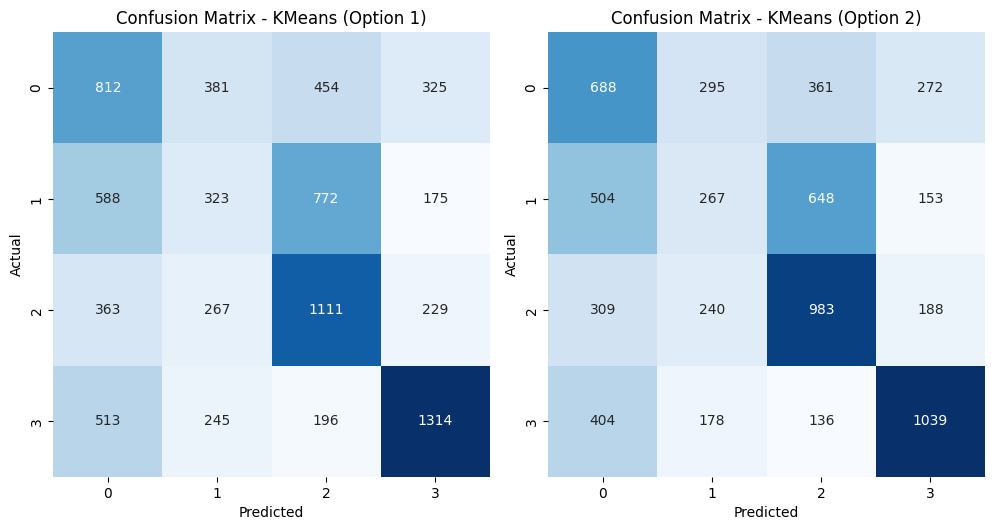

In [220]:
conf_matrix_kmeans_1 = confusion_matrix(clustering_copy_1["Segmentation"], clustering_copy_1['Predicted'])
conf_matrix_kmeans_2 = confusion_matrix(clustering_copy_2["Segmentation"], clustering_copy_2['Predicted'])

plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.heatmap(conf_matrix_kmeans_1, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title("Confusion Matrix - KMeans (Option 1)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(2, 3, 2)
sns.heatmap(conf_matrix_kmeans_2, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title("Confusion Matrix - KMeans (Option 2)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()

In [221]:
scaler_1 = MinMaxScaler()
scaler_2 = StandardScaler()

scaler_1.fit(train_option_1.drop(['ID', "Segmentation"], axis=1))
scaler_2.fit(train_option_2.drop(['ID', "Segmentation"], axis=1))

test_km_predictions_1 = scaler_1.transform(test_data.drop(['ID'], axis=1))
test_km_predictions_2 = scaler_2.transform(test_data.drop(['ID'], axis=1))

test_km_predictions_1 = km_model_1.predict(test_km_predictions_1)
test_km_predictions_2 = km_model_2.predict(test_km_predictions_2)

km_predictions_df_1 = pd.DataFrame({
    'ID': test_data['ID'],
    'Segmentation': test_km_predictions_1
})

km_predictions_df_2 = pd.DataFrame({
    'ID': test_data['ID'],
    'Segmentation': test_km_predictions_2
})

km_predictions_df_1['Segmentation'] = km_predictions_df_1['Segmentation'].map({
    0: 'A',
    1: 'B',
    2: 'C',
    3: 'D'
})

km_predictions_df_2['Segmentation'] = km_predictions_df_2['Segmentation'].map({
    0: 'A',
    1: 'B',
    2: 'C',
    3: 'D'
})

km_predictions_df_1.to_csv('kmeans_predictions_1_optimized.csv', index=False)
km_predictions_df_2.to_csv('kmeans_predictions_2_optimized.csv', index=False)

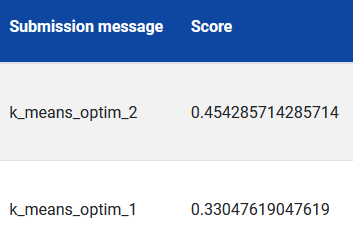

Not quite the optimization results we were hoping for! After running our optimized models with the tuned hyper-parameters, we can see we only have a roughly 2% improvement for both training sets. By observing our confusion matracies, we can see that they are very similar to our base models', with major issues identifying segment 'B'. And finally, when we look to our testing scores, we can see that we actually performed worse for option 1 with a 33.05% accuracy. However, we did marginally improve our option 2 accuracy to 45.43%.

## Discussion and Conclusion
<br>
This problem set was much trickier than I anticipated! The goal for this project was to create an unsupervised model in order to conduct customer segmentation. While we did accomplish this, I am admittedly disappointed in the results. I was hoping to obtain results in the realm of 80% prediction accuracy, but we fell short by nearly 25 points. I believe that are many factors that contributed to this result as well as several more things we could do in order to improve our results. <br><br>
Let's first discuss the different cleaning methods (option 1 and option 2). I thought that there would be a more significant difference, but the results ended up being mixed. For our alternative models, this did not affect our models in a significant way, with all the results being within 1% of eachother and option 1 being slightly higher. However, for our k-means model, there was more a difference. In the case of our unsupervised model, option 2 yielded the greatest performance increase, with the greatest difference of ~12% occuring in our optimized model. Remember, option 2 was the cleaning method that simply removed any row in our training data that had a null value. It's possible that our k-means model performed better in this scenario because the data was more "correct", and our unsupervised model is more sensative to dummy values than our alternative models. <br><br>
In order to improve our model, there are some other methods that could have been explored as well as explanations for our final performance. One explanation for the performance is that the data quality was too noisy for our model. Further preprocessing may have been required such as removing noisy features. It's also possible that a k-means approach may not have been the best model for our dataset. K-means assigns clusters based on similarity, so it is sensitive to clusters of unequal variance and outliers. One method that could have been explored is feature engineering. This is where we generate new features based on existing ones, in order to create more relevant information for our models. Additionally, we could have combined different techniques together in what are known as "ensemble methods". <br><br>
Overall, I found this project to valuable and illuminating. And while I did not achieve the results I was hoping for, learned quite a bit about the importance of data cleaning, the unassuming complexity of some datasets, and the functionality of unsupervised machine learning models.

## References

https://www.nltk.org/ <br>
https://www.analyticsvidhya.com/blog/2021/07/nltk-a-beginners-hands-on-guide-to-natural-language-processing/ <br>
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html <br>
https://datahack.analyticsvidhya.com/contest/janatahack-customer-segmentation/#ProblemStatement <br>
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html <br>
https://kprototypes.readthedocs.io/en/latest/api.html <br>
https://towardsdatascience.com/kmeans-hyper-parameters-explained-with-examples-c93505820cd3